
Thanks for:
* https://www.kaggle.com/sishihara/moa-lgbm-benchmark#Preprocessing

* https://www.kaggle.com/ttahara/osic-baseline-lgbm-with-custom-metric

* https://zenn.dev/fkubota/articles/2b8d46b11c178ac2fa2d

* https://qiita.com/ryouta0506/items/619d9ac0d80f8c0aed92

* https://github.com/nejumi/tools_for_kaggle/blob/master/semi_supervised_learner.py

* https://upura.hatenablog.com/entry/2019/03/03/233534

* https://pompom168.hatenablog.com/entry/2019/07/22/113433

* https://www.kaggle.com/c/lish-moa/discussion/193878

* https://tsumit.hatenablog.com/entry/2020/06/20/044835

* https://www.kaggle.com/kushal1506/moa-pytorch-feature-engineering-0-01846

* https://www.kaggle.com/c/lish-moa/discussion/195195

* https://www.kaggle.com/gogo827jz/self-stacking-groupcv-xgboost

* https://www.kaggle.com/c/lish-moa/discussion/197158


In [1]:
# Version = "v1" # starter model
# Version = "v2" # Compare treat Vs. ctrl and minor modifications, StratifiedKFold
# Version = "v3" # Add debug mode and minor modifications
# Version = "v4" # Clipping a control with an outlier(25-75)
# Version = "v5" # Clipping a control with an outlier(20-80)
# Version = "v6" # under sampling 500 → oversamplling 500, lipping a control with an outlier(10-90)
# Version = "v7" # Use anotated data, under sampling 500 → oversamplling 500, clipping a control with an outlier(10-90)
# Version = "v8" # pseudo labeling (thresholds:0.5), timeout
# Version = "v9" # pseudo labeling (thresholds:0.6), timeout
# Version = "v10" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP
# Version = "v11" # pseudo labeling (thresholds:0.6), ReduceCol: Kolmogorov-Smirnov, PCA(whiten)&UMAP, lgbm parames adjust
# Version = "v12" # Feature engineering based on feature importance
# Version = "v13" # Calibration, SMOTE(k_neighbors=5→1)
# Version = "v14" # Removed the Calibration, SMOTE(k_neighbors=1), pseudo labeling (thresholds:0.7)
# Version = "v15" # Updata anotated data
# Version = "v16" # Remove noisy label(confidence: 0.5)
# Version = "v17" # Modifications with remove noisy label func, Calibration, confidence = y_prob.probability.max()*0.3
# Version = "v18" # SMOTE(k_neighbors=1→2), confidence = y_prob.probability.max()*0.2
# Version = "v19" # SMOTE(k_neighbors=2→3),
# Version = "v20" # Modifications with confidence, Removed the Calibration, SMOTE(k_neighbors=2), 
# Version = "v21" # DEBUG = False
# Version = "v22" # minor modifications
# Version = "v23" # TOP100→PCA→UMAP(n_components=3)
# Version = "v24" # TOP100→PCA→UMAP(n_components=10), UMAP(n_components=2→3)
# Version = "v25" # Feature engineering based on Feature importance
# Version = "v26" # Modify pseudo labeling func to exclude low confidence pseudo labels in the TEST data.
# Version = "v27" # LGBMClassifie:clf.predict→clf.predict_proba
# Version = "v28" # Calibration (No calbration:CV:0.06542)
# Version = "v29" # Remove Calibration, is_unbalance': True, SMOTE(k_neighbors=2→3), Modify pseudo labeling func to include low confidence pseudo labels in the TEST data, target_rate *= 1.2
# Version = "v30" # drop_duplicates(keep="last")
# Version = "v31" # target_rate *= 1.1, if Threshold <= 0.2: break, if sum(p_label)*1.5 >= check: break, if sum(p_label) <= check*1.5: break
# Version = "v32" # y_prob.probability.quantile(0.3), if Threshold >= 0.95: break
# Version = "v33" # RankGauss, Scaled by category, SMOTE(k_neighbors=2),
# Version = "v34" # RankGauss apply c-columns, remove TOP100, Add f_diff = lambda x: x - med, Create features
# Version = "v35" # f_div = lambda x: ((x+d)*10 / (abs(med)+d))**2, f_diff = lambda x: ((x-med)*10)**2, select features
# Version = "v36" # Add feature importance func
# Version = "v37" # Remove RankGauss for gene expression, fix feature importance func
# Version = "v38" # Add MultiLabel Stratification func, fix index of data before split with "data = data.sort_index(axis='index')""
# Version = "v39" # fix pseudo labeling func
# Version = "v40" # fix pseudo labeling func, create importance_cols_df with all columns
# Version = "v41" # Feature engineering based on Feature importance with v39 notebook
# Version = "v42" # Feature engineering based on Feature importance with v40 notebook
# Version = "v40.2" # Select, update fe_stats func based on v40 note book
# Version = "v42.1" # Remove Kolmogorov-Smirnov test and VarianceThreshold for inference, Threshold = np.quantile(y_prob, q=0.99)
# Version = "v43" # Inference, modify pseudo labeling func: lower, upper, change param 3→2.1
# Version = "v44.1" # Select,
# Version = "v44.2" # inference used v40.2 note book(updated fe_stats func), DEBUG=False, modify  eature_Engineering func, check*(3.5-len(str(int(check))))
# Version = "v45" # inference used v40.2, DEBUG=False, Add create_features func,  learning_rate(pseudo labeling): 0.01→0.02
# Version = "v46" # Select, Add 'g_d_g', 'c_d_c', 'g_df_g', 'c_df_c', 'd_g_df_g', 'd_c_df_c' to the kind_list, VarianceThreshold(0.91) 
# Version = "v47" # Select, Add detect_neg func but time over 9 hours
# Version = "v48" # inference used v46, DEBUG=False, modify Feature_Engineering func
# Version = "v49" # inference used v46, DEBUG=False, create_features(func="mean")
# Version = "v50" # Select, QuantileTransformer(n_quantiles=100), select_importance_cols(num=50)
# Version = "v51" # Select, QuantileTransformer(n_quantiles=defalt), select_importance_cols(num=100)
# Version = "v52" # inference used v46, adjust params in pseudo_labeling func
# Version = "v53" # Select, feature engining→VarianceThreshold(0.98), select_importance_cols(num=200)
# Version = "v54" # inference used v50, Not using create_cluster func 
# Version = "v55" # inference used v51, Not using create_cluster func
# Version = "v56" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':0.2,
# Version = "v57" # inference used v51, adjust lgbm params: 'subsample': 0.7,'subsample_freq': 3, 'lambda_l2':3,
# Version = "v58" # inference used v53, adjust lgbm params; 'lambda_l2':3,
# Version = "v59" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v60" # inference used v53, adjust lgbm params; 'lambda_l2':0.1,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v61" # inference used v53, adjust lgbm params; 'lambda_l2':3,'bagging_fraction': 0.7, 'bagging_freq': 1, 'learning_rate': 0.03,
# Version = "v62" # inference used v53, self-Stacking prediction values, Threshold += 0.05, 'learning_rate': 0.05, 'lambda_l2':3
# Version = "v63" # inference used v53, adjust lgbm params; 'lambda_l2':15,
# Version = "v64" # inference used v53, if iter_ == max_iter: X_test["pred_feat"] = y_prob.copy()
# Version = "v65" # inference used v53, Apply RankGauss(df) to "pred_feat"
# Version = "v66" # inference used v53, Apply clipping & RankGauss(df) to "pred_feat"
# Version = "v67" # Select, VarianceThreshold(0.98), select_importance_cols(num=300)
# Version = "v68" # inference used v67, np.clip
# Version = "v69" # inference used v67, if _score > 0.02: np.clip
# Version = "v70" # inference used v67, adjust prediction
# Version = "v71" # inference used v67, (Threshold+0.03) >= 0.96
# Version = "v72" # inference used v67, remove "if (p_label_rate*1.5) < target_rate" from the Adj_threshold func
# Version = "v73" # inference used v67, exclusive_cols→Under_Sampling func
# Version = "v74" # inference used v67, feature engining for unpredictable_cols(create_features func 30)
# Version = "v75" # inference used v67, avoid overfit for unpredictable_cols
# Version = "v76" # inference used v67, adjust lgm params; 'feature_fraction':0.1, 'lambda_l2': 200,
# Version = "v77" # inference used v67, Add pca to create_features func 
# Version = "v78" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.05,'subsample': 0.7,'reg_lambda': 100,
# Version = "v79" # inference used v67, adjust lgbm params; 'lambda_l2': 300, 'bagging_fraction': 0.7,'colsample_bytree': 0.04,　'subsample': 0.7,'reg_lambda': 200,
# Version = "v80" # inference used v67, lgm params used v78, N_FOLD = 5
# Version = "v81" # inference used v67, lgm params used v78, N_FOLD = 5&Early_stopping_rounds=29, unpredictable_cols→ N_FOLD = 3 & Early_stopping_rounds=39
# Version = "v82" # Select, DEBUG = True, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v83" # inference used v67, lgm params used　v79, odds_gene_df["Log"] < 1.0→0.0
# Version = "v84" # Select, based on v83, DEBUG = False, 'feature_fraction':0.007, select_importance_cols(num=300),
# Version = "v85" # inference used v82, based on v83,
Version = "v86" # inference used v82, based on v85, unpredictable_cols=()

In [2]:
#DEBUG = True
DEBUG = False

# Library

In [3]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

import imblearn
from imblearn.over_sampling import SMOTE
from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import random

from sklearn import preprocessing
from sklearn.metrics import log_loss, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold

from tqdm.notebook import tqdm
import torch

import warnings
warnings.filterwarnings("ignore")

print("lightgbm Version: ", lgb.__version__)
print("imblearn Version: ", imblearn.__version__)
print("numpy Version: ", np.__version__)
print("pandas Version: ", pd.__version__)

lightgbm Version:  2.3.1
imblearn Version:  0.7.0
numpy Version:  1.18.5
pandas Version:  1.1.3


# Utils

In [4]:
def get_logger(filename='log'):
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.{Version}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

logger = get_logger()

def seed_everything(seed=777):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

# Config

In [5]:
if DEBUG:
    N_FOLD = 2
    Num_boost_round=1000
    Early_stopping_rounds=10
else:
    N_FOLD = 4
    Num_boost_round=10000
    Early_stopping_rounds=30

SEED = 42
seed_everything(seed=SEED)

Max_depth = 7

# Data Loading

In [6]:
train = pd.read_csv("../input/lish-moa/train_features.csv")
test = pd.read_csv("../input/lish-moa/test_features.csv")
train_targets_scored = pd.read_csv("../input/lish-moa/train_targets_scored.csv")
train_targets_nonscored = pd.read_csv("../input/lish-moa/train_targets_nonscored.csv")
sub = pd.read_csv("../input/lish-moa/sample_submission.csv")

# New data file available from 3rd November
drug = pd.read_csv('../input/lish-moa/train_drug.csv')

In [7]:
Targets = train_targets_scored.columns[1:]
Scored = train_targets_scored.merge(drug, on='sig_id', how='left')
Scored

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0      id_000644bb2                            0                       0   
1      id_000779bfc                            0                       0   
2      id_000a6266a                            0                       0   
3      id_0015fd391                            0                       0   
4      id_001626bd3                            0                       0   
...             ...                          ...                     ...   
23809  id_fffb1ceed                            0                       0   
23810  id_fffb70c0c                            0                       0   
23811  id_fffc1c3f4                            0                       0   
23812  id_fffcb9e7c                            0                       0   
23813  id_ffffdd77b                            0                       0   

       acat_inhibitor  acetylcholine_receptor_agonist  \
0                   0                               0   
1                   0                               0   
2                   0                               0   
3                   0                               0   
4                   0                               0   
...               ...                             ...   
23809               0                               0   
23810               0                               0   
23811               0                               0   
23812               0                               0   
23813               0                               0   

       acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                      0                               0   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               0   
...                                  ...                             ...   
23809                                  0                               0   
23810                                  0                               0   
23811                                  0                               0   
23812                                  0                               0   
23813                                  0                               0   

       adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   
...                           ...                            ...   
23809                           0                              0   
23810                           0                              0   
23811                           0                              0   
23812                           0                              0   
23813                           0                              0   

       adenylyl_cyclase_activator  ...  trpv_agonist  trpv_antagonist  \
0                               0  ...             0                0   
1                               0  ...             0                0   
2                               0  ...             0                0   
3                               0  ...             0                0   
4                               0  ...             0                0   
...                           ...  ...           ...              ...   
23809                           0  ...             0                0   
23810                           0  ...             0                0   
23811                       

In [8]:
def label_encoding(train: pd.DataFrame, test: pd.DataFrame, encode_cols):
    n_train = len(train)
    train = pd.concat([train, test], sort=False).reset_index(drop=True)
    
    for f in encode_cols:
        try:
            lbl = preprocessing.LabelEncoder()
            train[f] = lbl.fit_transform(list(train[f].values))
        except:
            print(f)
    test = train[n_train:].reset_index(drop=True)
    train = train[:n_train]
    
    return train, test

In [9]:
# Manually self annotation with domain knowledge
annot = pd.read_csv("../input/moa-annot-data/20201024_moa_sig_list.v2.csv")
annot

sig_id  \
0                   adenylyl_cyclase_activator   
1             aldehyde_dehydrogenase_inhibitor   
2                               antiarrhythmic   
3                               anticonvulsant   
4                                   antifungal   
5                                antihistamine   
6   atp-sensitive_potassium_channel_antagonist   
7       bacterial_membrane_integrity_inhibitor   
8                        calcineurin_inhibitor   
9       catechol_o_methyltransferase_inhibitor   
10                               cdk_inhibitor   
11                coagulation_factor_inhibitor   
12                          elastase_inhibitor   
13                             erbb2_inhibitor   
14                  nicotinic_receptor_agonist   
15           nitric_oxide_production_inhibitor   
16               protein_phosphatase_inhibitor   
17                sphingosine_receptor_agonist   
18                                     steroid   
19       ubiquitin_specific_protease_inhibitor   

                                   nonscored1  \
0                  adenylyl_cyclase_inhibitor   
1             alcohol_dehydrogenase_inhibitor   
2                       na_k-atpase_inhibitor   
3         gaba_gated_chloride_channel_blocker   
4                 fungal_ergosterol_inhibitor   
5                 histamine_release_inhibitor   
6   atp-sensitive_potassium_channel_inhibitor   
7       bacterial_protein_synthesis_inhibitor   
8                            t_cell_inhibitor   
9                   dopamine_release_enhancer   
10                         cyclin_d_inhibitor   
11                       vitamin_k_antagonist   
12               leukocyte_elastase_inhibitor   
13          protein_tyrosine_kinase_inhibitor   
14             acetylcholine_release_enhancer   
15                                vasodilator   
16             tyrosine_phosphatase_inhibitor   
17   sphingosine_1_phosphate_receptor_agonist   
18                          anti-inflammatory   
19     ubiquitin-conjugating_enzyme_inhibitor   

                                 nonscored2  
0                                       NaN  
1                                       NaN  
2                 potassium_channel_blocker  
3                                       NaN  
4   fungal_lanosterol_demethylase_inhibitor  
5                                       NaN  
6                                       NaN  
7                                       NaN  
8                                       NaN  
9                                       NaN  
10                                      NaN  
11                                      NaN  
12                                      NaN  
13                                      NaN  
14                                      NaN  
15                                      NaN  
16                                      NaN  
17                                      NaN  
18                                      NaN  
19                                      NaN

In [10]:
annot_sig = []
annot_sig = annot.sig_id.tolist()
print(annot_sig)

['adenylyl_cyclase_activator', 'aldehyde_dehydrogenase_inhibitor', 'antiarrhythmic', 'anticonvulsant', 'antifungal', 'antihistamine', 'atp-sensitive_potassium_channel_antagonist', 'bacterial_membrane_integrity_inhibitor', 'calcineurin_inhibitor', 'catechol_o_methyltransferase_inhibitor', 'cdk_inhibitor', 'coagulation_factor_inhibitor', 'elastase_inhibitor', 'erbb2_inhibitor', 'nicotinic_receptor_agonist', 'nitric_oxide_production_inhibitor', 'protein_phosphatase_inhibitor', 'sphingosine_receptor_agonist', 'steroid', 'ubiquitin_specific_protease_inhibitor']


In [11]:
train_target = pd.concat([train_targets_scored, train_targets_nonscored], axis=1)
train_target.head() 

sig_id  5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
0  id_000644bb2                            0                       0   
1  id_000779bfc                            0                       0   
2  id_000a6266a                            0                       0   
3  id_0015fd391                            0                       0   
4  id_001626bd3                            0                       0   

   acat_inhibitor  acetylcholine_receptor_agonist  \
0               0                               0   
1               0                               0   
2               0                               0   
3               0                               0   
4               0                               0   

   acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
0                                  0                               0   
1                                  0                               0   
2                                  0                               0   
3                                  0                               0   
4                                  0                               0   

   adenosine_receptor_agonist  adenosine_receptor_antagonist  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

   adenylyl_cyclase_activator  ...  ve-cadherin_antagonist  \
0                           0  ...                       0   
1                           0  ...                       0   
2                           0  ...                       0   
3                           0  ...                       0   
4                           0  ...                       0   

   vesicular_monoamine_transporter_inhibitor  vitamin_k_antagonist  \
0                                          0                     0   
1                                          0                     0   
2                                          0                     0   
3                                          0                     0   
4                                          0                     0   

   voltage-gated_calcium_channel_ligand  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   voltage-gated_potassium_channel_activator  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   voltage-gated_sodium_channel_blocker  wdr5_mll_interaction_inhibitor  \
0                                     0                               0   
1                                     0                               0   
2                                     0                               0   
3                                     0                               0   
4                                     0                               0   

   wnt_agonist  xanthine_oxidase_inhibitor  xiap_inhibitor  
0            0                           0               0  
1            0                           0               0  
2            0                           0               0  
3            0                           0               0  
4            0                           0               0  

[5 rows x 610 columns]

In [12]:
# For feature fngineering based on featrue importance with lgbm 
importance_cols = pd.read_csv("../input/moa-annot-data/importance_cols_df.v82.csv")
importance_cols

5-alpha_reductase_inhibitor 11-beta-hsd1_inhibitor acat_inhibitor  \
0                   cut_d_g-679           cut_df_g-235    cut_d_g-583   
1                  c_max_kurt_p               df_g-309    cut_d_g-658   
2                       d_g-266                d_g-362      cut_g-446   
3                  cut_df_g-186            cut_d_g-566    cut_d_g-327   
4               c_all_max_sum_d                  g-404    cut_df_g-35   
..                          ...                    ...            ...   
495                 cut_d_g-478           cut_df_g-184       df_g-606   
496                     d_g-678                d_g-323       df_g-379   
497                     d_g-635            cut_df_c-61   cut_df_g-497   
498                 cut_d_g-539              cut_g-421        d_g-544   
499                 cut_d_g-398           cut_df_g-507           g-61   

    acetylcholine_receptor_agonist acetylcholine_receptor_antagonist  \
0                     cut_df_g-122                       cut_d_g-369   
1                      cut_d_g-297                       cut_d_g-247   
2                            g-144                      cut_df_g-310   
3                          df_g-27                          df_c_min   
4                      cut_d_g-525                          df_g-387   
..                             ...                               ...   
495                       df_g-733                       cut_d_g-715   
496                   cut_df_g-724                       cut_d_g-366   
497                          g-576                             g-412   
498                          g-575                           d_g-746   
499                     cut_d_c-58                       cut_d_g-332   

    acetylcholinesterase_inhibitor adenosine_receptor_agonist  \
0                         df_g-460                   df_g-386   
1                      cut_d_g-369                cut_d_g-724   
2                      cut_df_g-16                    d_g-331   
3                            g-575               cut_df_g-503   
4                      cut_df_c-29                cut_d_g-332   
..                             ...                        ...   
495                          g-333                      g-246   
496                    cut_d_g-418           g_d_g_min_skew_p   
497                   cut_df_g-159                    d_g-151   
498                        df_g-69                    d_g-253   
499                          g-701                       g-24   

    adenosine_receptor_antagonist adenylyl_cyclase_activator  \
0                    cut_df_g-186                    cut_c-7   
1                  df_g_max_sum_p                    cut_c-4   
2                    cut_df_g-316                   df_g-174   
3                    c_max_kurt_p                cut_df_g-77   
4                     cut_d_g-563                cut_d_g-500   
..                            ...                        ...   
495                       df_c-72                cut_d_g-463   
496                   cut_d_g-462                cut_df_g-47   
497                     cut_g-276         d_c_df_c_max_std_p   
498                       df_c-99                   df_g-721   
499                      df_g-201                cut_df_g-50   

    adrenergic_receptor_agonist  ... tropomyosin_receptor_kinase_inhibitor  \
0                      df_c_min  ...                               d_g-254   
1                   cut_d_g-614  ...                              df_g-131   
2                        df_g-7  ...                                 g-529   
3                  cut_df_g-186  ...                          cut_df_g-340   
4                      df_g-387  ...                              df_g-266   
..                          ...  ...                                   ...   
495                 cut_d_g-747  ...                              df_g-693   
496                cut_df_g-732  ...                                  c-73   
497       

In [13]:
log_odds = pd.read_csv("../input/moa-annot-data/20201121_train_targets_scored.matrix_odds_results.csv")
log_odds

Gene1                                  Gene2  \
0      X5-alpha_reductase_inhibitor           X5-alpha_reductase_inhibitor   
1      X5-alpha_reductase_inhibitor                X11-beta-hsd1_inhibitor   
2      X5-alpha_reductase_inhibitor                         acat_inhibitor   
3      X5-alpha_reductase_inhibitor         acetylcholine_receptor_agonist   
4      X5-alpha_reductase_inhibitor      acetylcholine_receptor_antagonist   
...                             ...                                    ...   
42431                 wnt_inhibitor  ubiquitin_specific_protease_inhibitor   
42432                 wnt_inhibitor                        vegfr_inhibitor   
42433                 wnt_inhibitor                              vitamin_b   
42434                 wnt_inhibitor             vitamin_d_receptor_agonist   
42435                 wnt_inhibitor                          wnt_inhibitor   

            odds       Log        SD  Lower95CL    Upper95CL   p.value  \
0       1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   
1      33.843243  3.521739  1.453012   1.961852   583.818219  0.015361   
2      25.548105  3.240563  1.448449   1.494296   436.798171  0.025269   
3       3.260817  1.181978  1.436119   0.195389    54.419345  0.410487   
4       2.049799  0.717742  1.435446   0.122986    34.163726  0.617066   
...          ...       ...       ...        ...          ...       ...   
42431  55.264817  4.012136  1.478742   3.046078  1002.666332  0.006664   
42432   2.091101  0.737691  1.427830   0.127352    34.335710  0.605399   
42433  13.543149  2.605881  1.438947   0.807023   227.275980  0.070146   
42434   9.080515  2.206131  1.434625   0.545702   151.100368  0.124104   
42435   1.000000  0.000000  2.000000   0.019843    50.396815  1.000000   

        q.value  
0      0.522100  
1      0.057533  
2      0.073394  
3      0.311654  
4      0.396877  
...         ...  
42431  0.040493  
42432  0.392840  
42433  0.116678  
42434  0.159335  
42435  0.522100  

[42436 rows x 9 columns]

In [14]:
exclusive_cols = (
    "acetylcholine_receptor_agonist", 
    "acetylcholine_receptor_antagonist", 
    "adrenergic_receptor_agonist",
    "adrenergic_receptor_antagonist",
    "bacterial_cell_wall_synthesis_inhibitor",
    "bacterial_dna_inhibitor",
    "calcium_channel_blocker",
    "cdk_inhibitor",
    "dna_inhibitor",
    "dopamine_receptor_agonist",
    "dopamine_receptor_antagonist",
    "egfr_inhibitor",
    "estrogen_receptor_agonist",
    "flt3_inhibitor",
    "gaba_receptor_antagonist",
    "glucocorticoid_receptor_agonist",
    "glutamate_receptor_antagonist",
    "histamine_receptor_antagonist",
    "hmgcr_inhibitor",
    "kit_inhibitor",
    "mtor_inhibitor",
    "nfkb_inhibitor",
    "pdgfr_inhibitor",
    "phosphodiesterase_inhibitor",
    "pi3k_inhibitor",
    "proteasome_inhibitor",
    "serotonin_receptor_agonist",
    "serotonin_receptor_antagonist",
    "sodium_channel_inhibitor",
    "tubulin_inhibitor",
    "vegfr_inhibitor"
)
       

In [15]:
odds_gene2_df = pd.DataFrame()

for col in exclusive_cols:
    odds_gene_df = log_odds[log_odds["Gene1"]==col]
    odds_gene2 = odds_gene_df[(odds_gene_df["p.value"] <= 0.3) & (odds_gene_df["Log"] < 0.0)]["Gene2"]

    odds_gene2 = pd.DataFrame(odds_gene2)
    odds_gene2 = odds_gene2.rename(columns={"Gene2": col}).reset_index(drop=True)
    odds_gene2_df = pd.concat([odds_gene2_df, odds_gene2], axis=1)


odds_gene2_df

acetylcholine_receptor_agonist  \
0   acetylcholine_receptor_antagonist   
1         adrenergic_receptor_agonist   
2      adrenergic_receptor_antagonist   
3             calcium_channel_blocker   
4                       cdk_inhibitor   
..                                ...   
67                                NaN   
68                                NaN   
69                                NaN   
70                                NaN   
71                                NaN   

          acetylcholine_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1               adrenergic_receptor_agonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

                adrenergic_receptor_agonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2            adrenergic_receptor_antagonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

             adrenergic_receptor_antagonist  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3   bacterial_cell_wall_synthesis_inhibitor   
4                   calcium_channel_blocker   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

   bacterial_cell_wall_synthesis_inhibitor        bacterial_dna_inhibitor  \
0        acetylcholine_receptor_antagonist       cyclooxygenase_inhibitor   
1              adrenergic_receptor_agonist   dopamine_receptor_antagonist   
2           adrenergic_receptor_antagonist                 nfkb_inhibitor   
3                  calcium_channel_blocker           proteasome_inhibitor   
4                            cdk_inhibitor  serotonin_receptor_antagonist   
..                                     ...                            ...   
67                                     NaN                            NaN   
68                                     NaN                            NaN   
69                                     NaN                            NaN   
70                                     NaN                            NaN   
71                                     NaN                            NaN   

                    calcium_channel_blocker  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   
67                                      NaN   
68                                      NaN   
69                                      NaN   
70                                      NaN   
71                                      NaN   

                              cdk_inhibitor  \
0            acetylcholine_receptor_agonist   
1         acetylcholine_receptor_antagonist   
2               adrenergic_receptor_agonist   
3            adrenergic_receptor_antagonist   
4   bacterial_cell_wall_synthesis_inhibitor   
..                                      ...   


In [16]:
unpredictable_cols = ()

# Training Utils

In [17]:
#===========================================================
# training & inference model
#===========================================================

def run_lgbm(target_col: str):
    target = get_target(target_col, annot_sig)
    target_rate = target.sum() / len(target)
    
    # estimate test target distribution
    Adj_target_rate = (2*target_rate)/(target.sum()**0.15)
    
    trt = train[target==1].copy().reset_index(drop=True)
    trt["target"] = 1
    trt = trt.drop("sig_id", axis=1)
    
    # under sampling
    othr =  Under_Sampling(train, target_col, target)
    
    logger.info(f"{target_col}, len(trt): {len(trt)}, len(othr): {len(othr)}")
    logger.info(f"target_rate: {target_rate:.7f} → Adj_target_rate: {Adj_target_rate:.7f}")
    
    # Create train_data
    X_train = pd.concat([trt, othr], axis=0, sort=False, ignore_index=True)   
    y_train = X_train["target"]
    X_train = X_train.drop("target", axis=1)
    
    # over sampling with SMOTE
    if len(trt) < len(othr)*0.2:
        sm = SMOTE(0.2, k_neighbors=3, random_state=SEED)
        X_train, y_train = sm.fit_sample(X_train, y_train)
        pos_neg_ratio = 0.8
        
    else:
        pos_neg_ratio = 1-(len(trt)/len(othr))
     
    X_test = test.drop("sig_id", axis=1)
    
    # pseudo_labeling
    train_X, train_y, test_X = pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio)
    
    # fold_lgbm
    y_preds_, train_y_, oof_train_ = fold_lgbm(train_X, train_y,test_X, target_col)
       
    return sum(y_preds_) / len(y_preds_), train_y_, oof_train_

In [18]:
# Merge self annotated target func

def get_target(target_col, annot_sig):
    if target_col in annot_sig:
        t_cols = []
        for t_col in list(annot[annot.sig_id == target_col].iloc[0]):
            if t_col is not np.nan:
                t_cols.append(t_col)
                target = train_target[t_cols]
                target = target.sum(axis=1)
                #1 or more, replace it with 1.
                target = target.where(target < 1, 1)
    else:
        target = train_targets_scored[target_col]
    
    return target

In [19]:
# Under sampling func 

def Under_Sampling(input_df, target_col, target):
    
    _df = input_df.copy()
    
    # under sampling with mutually exclusive columns
    if target_col in exclusive_cols:
        print(f"mutually exclusive columns: {target_col}")
        target_exclusive = odds_gene2_df[target_col].dropna()
        target_ex = train_targets_scored[list(target_exclusive)]
        
        # 1 or more, replace it with 1.
        target_ex = target_ex.sum(axis=1)
        target_ex = target_ex.where(target_ex < 1, 1)
        
        _df = _df[target_ex == 1].copy().reset_index(drop=True)
        _df = _df.drop("sig_id", axis=1)
    
    # under sampling with drug anotation(New data file)
    else:
        sig_id_lst = [list(Scored.sig_id[Scored.drug_id == id_].sample())[0] for id_ in Scored.drug_id.unique()]
    
        # Remove sig_id wih target 
        del_idx = train[target >= 1].sig_id.unique()
        select_idx = [i for i in sig_id_lst if i not in del_idx]
        
        # Select negative target wiht multi_Stratification
        _df = _df.set_index('sig_id')
        _df = _df.loc[select_idx, :]
        _df = _df.reset_index(drop=True)
    
    _df["target"] = 0
    print(f"selected negative label: {len(_df)}")
    
    return _df

In [20]:
# lgbm with training & inference model


def fold_lgbm(train_X_, train_y_, test_X_, target_col):
    
    y_preds = []
    oof_train = np.zeros((len(train_X_),))
    score = 0
    
    _train_X, _train_y, _test_X = train_X_.copy(), train_y_.copy(), test_X_.copy()
    
    for fold_, (train_index, valid_index) in enumerate(cv.split(_train_X, _train_y)):
        logger.info(f'len(train_index) : {len(train_index)}')
        logger.info(f'len(valid_index) : {len(valid_index)}')
        
        X_tr, X_val = _train_X.loc[train_index, :], _train_X.loc[valid_index, :]
        y_tr, y_val = _train_y[train_index], _train_y[valid_index]

        lgb_train = lgb.Dataset(X_tr, y_tr, categorical_feature=categorical_cols)
        lgb_eval = lgb.Dataset(X_val,y_val, reference=lgb_train,categorical_feature=categorical_cols)
        
        if target_col in unpredictable_cols:
            
            params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.1, 
                'lambda_l1': 0.1,
                'lambda_l2': 300,
                'bagging_fraction': 0.7,
                'bagging_freq': 1,
            }
            
        else:
             params = {
                'objective': 'binary',
                'metric': 'binary_logloss',
                'learning_rate': 0.1,
                'num_threads': 4,
                'verbose': -1,
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'feature_fraction':0.4, 
                'lambda_l1': 0.1,
                'lambda_l2': 3,
                'bagging_fraction': 0.8,
                'bagging_freq': 1,
            }
            
            
            
        
        logger.info(f"================================= fold {fold_+1}/{cv.get_n_splits()} {target_col}=================================")
        
        model = lgb.train(params,
                          lgb_train,
                          valid_sets=[lgb_train, lgb_eval],
                          verbose_eval=1000,
                          num_boost_round=Num_boost_round,
                          early_stopping_rounds=Early_stopping_rounds)
        
        oof_train[valid_index] = model.predict(X_val, num_iteration=model.best_iteration)

        y_pred = model.predict(_test_X, num_iteration=model.best_iteration)
        y_preds.append(y_pred)
     
    return y_preds, _train_y, oof_train 

In [21]:
#===========================================================
# pseudo_labeling func
#===========================================================

def pseudo_labeling(X_train, y_train, X_test, target_rate, target_col, pos_neg_ratio, max_iter=3):
    
    X, y, X_test = select_data(target_col, X_train, y_train, X_test)    
    feature_importance_df = pd.DataFrame()
    
    for iter_ in range(1, max_iter+1):
    
        logger.info(f"================= Pseudo labeling {iter_} / {max_iter} =================")
        
        y_preds = np.zeros((X.shape[0], 2))
        y_preds[:, 0] = y.copy()
        y_prob = np.zeros((X_test.shape[0]))
        X_conf, y_conf, _importance_df= pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
        _importance_df["Feature"] = X.columns
        
        y_preds, y_prob, feature_importance_df = fold_lgbmclassifier(X, y, X_test, y_preds, y_prob, _importance_df, feature_importance_df, target_col)
        
        auc_score = roc_auc_score(y_preds[:, 0], y_preds[:, 1])
        pr_score = average_precision_score(y_preds[:, 0], y_preds[:, 1])
         
        logger.info(f"{iter_} / {max_iter}, AUC score:{auc_score:.3f}, PR-AUC:{pr_score:.3f}") 
        y_preds = pd.DataFrame(y_preds, index=X.index, columns=[["Labels", "Preds"]])
        
        if iter_ == 1:
            quantile = pos_neg_ratio
            Threshold = np.quantile(y_prob, q=0.99)
        else:
            quantile = 1.0 - y_label_rate
        
        y_Threshold = y_preds.iloc[:, 1].quantile(quantile)
        logger.info(f"y_Threshold: {y_Threshold:.7f}, Threshold: {Threshold:.7f}, pos_neg_ratio: {pos_neg_ratio:.7f}")
            
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] < y_Threshold, 1).copy()
        y_preds.iloc[:,1] = y_preds.iloc[:,1].where(y_preds.iloc[:,1] >= y_Threshold, 0).copy()
        y_preds = y_preds.sum(axis=1)
                
        corect_idx = y_preds[y_preds != 1].index.values
        
        X_corect, y_corect = X[X.index.isin(corect_idx)], y[y.index.isin(corect_idx)]
        
        logger.info(f"Remove_noisy_data: {len(y)-len(y_corect)} → Positive_corect_labels: {sum(y_corect)}/{len(y_corect)}")
            
        # Remove low confidence labels
        y_prob = pd.DataFrame(y_prob, index=X_test.index, columns=["probability"])
        
        lower = (0.1*iter_) + 0.6
        upper = 2.0 - lower
        
        high_conf_0, high_conf_1 = min(Threshold*lower, 0.79), min(Threshold*upper, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold)
        
        p_label_rate = sum(p_label)/len(p_label)        
        logger.info(f"p_label_rate: {p_label_rate:.7f} Vs.target_rate: {target_rate:.5f}")
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {(len(y_prob)*target_rate):.1f}, Threshold: {Threshold:.7f}, conf_0:{high_conf_0:.5f}, conf_1:{high_conf_1:.5f}")
        
        # set the threshold based on train labels distribution (target_rate)
        if p_label_rate > target_rate:
            p_label, conf_idx, high_conf_0, high_conf_1, Threshold = Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold, target_rate, y_prob, lower, upper)
        
        # select data with confidence            
        X_conf = X_test[X_test.index.isin(conf_idx)].copy()
        X, y = pd.concat([X_corect, X_conf], axis=0, ignore_index=True), pd.concat([y_corect, p_label], axis=0, ignore_index=True)
        
        logger.info(f"threshold: {Threshold:.7f}, positive_p_label: {sum(p_label)}/{len(p_label)}, p_label_rate: {sum(p_label)/len(p_label):.7f}")
        
        # updated train data
        X = X.drop_duplicates(keep="last").reset_index(drop=True)
        y = y[X.index.values].reset_index(drop=True)
        
        y_label_rate = sum(y)/len(y)
        logger.info(f"positive_y_label: {sum(y)}/{len(y)}, y_label_rate: {y_label_rate:.7f}")
        
    show_feature_importance(feature_importance_df, target_col, num=10)
        
    return X, y, X_test

In [22]:
# lgbm with pseudo_labeling

def fold_lgbmclassifier(X_, y_, X_test_, _y_preds, _y_prob, _importance_df, feature_importance_df_, target_col):
    
    _X, _y, _X_test = X_.copy(), y_.copy(), X_test_.copy()
    
    for fold_, (train_idx, valid_idx) in enumerate(cv.split(_X, _y)):
        
        X_tr, X_val = _X.loc[train_idx, :], _X.loc[valid_idx, :]
        y_tr, y_val = _y[train_idx], _y[valid_idx]
        
        if target_col in unpredictable_cols:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.1,
                'objective': "binary",
                'colsample_bytree': 0.1,
                'subsample': 0.7,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 200,
                'random_state': SEED,
                'n_jobs': 4
            }
            
        else:
            classifier_params = {
                'max_depth': Max_depth,
                'num_leaves': int((Max_depth**2)*0.7),
                'n_estimators': Num_boost_round,
                'learning_rate': 0.03,
                'objective': "binary",
                'colsample_bytree': 0.4,
                'subsample': 0.8,
                'subsample_freq': 1,
                'reg_alpha': 0.1,
                'reg_lambda': 0.1,
                'random_state': SEED,
                'n_jobs': 4
            }
            
            
        clf = LGBMClassifier(**classifier_params)
            
        clf.fit(X_tr, y_tr,
                eval_set=[(X_tr, y_tr), (X_val, y_val)],
                eval_metric='logloss',
                verbose=1000,
                early_stopping_rounds=Early_stopping_rounds)
            
        _y_preds[valid_idx, 1] = clf.predict_proba(X_val, num_iteration=clf.best_iteration_)[:, 1]
        _y_prob += clf.predict_proba(_X_test, num_iteration=clf.best_iteration_)[:, 1] / N_FOLD
            
        # feature importance with target col
        _importance_df["importance"] = clf.feature_importances_
        feature_importance_df_ = pd.concat([feature_importance_df_, _importance_df], axis=0)
        
    return _y_preds, _y_prob, feature_importance_df_
    

In [23]:
# select important features with pseudo_labeling

def select_data(target_col, X_train_, y_train_, X_test_):
    
    selected_cols = importance_cols[target_col]
    _X, _y, _X_test = X_train_.copy(), y_train_.copy(), X_test_.copy()
    _X, _X_test = _X[selected_cols], _X_test[selected_cols]
    
    X_, X_test_ = create_features(_X, _X_test)
    
    logger.info(f'N_features:{len(X_.columns)}')

    return X_, _y, X_test_

In [24]:
# create features with pseudo_labeling

def create_features(df_trt, df_tst):
    
    from sklearn.decomposition import PCA
    
    df_trt['WHERE'], df_tst['WHERE'] = 'trt', 'tst'
    _df = df_trt.append(df_tst)
    _df = _df.reset_index(drop=True)
    _Splitdata = _df["WHERE"]
    _df = _df.drop('WHERE', axis=1)
    
    pca_transformer = PCA(n_components=0.9, whiten=True, random_state=SEED)
    _pca = pca_transformer.fit_transform(_df)
    _pca_df = pd.DataFrame(_pca)
    pca_cols = [f"pca_{i+1}" for i in range(_pca_df.shape[1])]
    _pca_df.columns = pca_cols
    
    _df = pd.concat([_df, _pca_df], axis=1)
    
    _df['WHERE'] = _Splitdata
    trt_ = _df[_df['WHERE']=="trt"].drop('WHERE', axis=1).reset_index(drop=True)
    tst_ = _df[_df['WHERE']=="tst"].drop('WHERE', axis=1).reset_index(drop=True)
    
    return trt_, tst_

In [25]:
# convert labels with pseudo_labeling

def convert_label(input_df, conf_0, conf_1, threshold=0.5):
    
    _df = input_df.copy()
    Probability = _df.iloc[:, 0]
    
    # Remove low confidence labels
    conf_index = _df[(Probability <= conf_0) & (conf_1 <= Probability)].index.values
    
    Probability = Probability.where(Probability < threshold, 1).copy()
    p_label = Probability.where(Probability >= threshold, 0).copy()
    
    return p_label, conf_index

In [26]:
# adj threshold with pseudo_labeling

def Adj_threshold(p_label, conf_idx, high_conf_0, high_conf_1, Threshold_, target_rate, y_prob, lower_, upper_):
    
    check = len(y_prob)*target_rate
        
    for i in range(10):
        if (sum(p_label) <= check*(3.5-len(str(int(check))))) or (Threshold_ >= 0.96): break
            
        Threshold_ += 0.03
        high_conf_0, high_conf_1 = min(Threshold_*lower_, 0.79), min(Threshold_*upper_, 0.97)
        p_label, conf_idx = convert_label(y_prob, high_conf_0, high_conf_1, Threshold_)
        logger.info(f"Num_p_label: {sum(p_label)}, Expected: {check:.1f}, Adj_threshold_{i+1}: {Threshold_:.7f}")
            
    return p_label, conf_idx, high_conf_0, high_conf_1, Threshold_

In [27]:
# check importance features with pseudo_labeling

def show_feature_importance(feature_importance_df, title="all", num=100):
    cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:num].index)
    
    best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]
    
    hight = int(num//3.3)
    plt.figure(figsize=(8, hight))
    sns.barplot(x="importance", 
                y="Feature", 
                data=best_features.sort_values(by="importance", ascending=False))
    plt.title(f'{title}_Features importance (averaged)')
    plt.tight_layout()
    plt.savefig(f"./{title}_feature_importance_{Version}.png")
    plt.show()

# Preprocessing

We have to convert some categorical features into numbers in train and test. We can identify categorical features by `pd.DataFrame.select_dtypes`.

In [28]:
train.head()

sig_id cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_000644bb2  trt_cp       24      D1  1.0620  0.5577 -0.2479 -0.6208   
1  id_000779bfc  trt_cp       72      D1  0.0743  0.4087  0.2991  0.0604   
2  id_000a6266a  trt_cp       48      D1  0.6280  0.5817  1.5540 -0.0764   
3  id_0015fd391  trt_cp       48      D1 -0.5138 -0.2491 -0.2656  0.5288   
4  id_001626bd3  trt_cp       72      D2 -0.3254 -0.4009  0.9700  0.6919   

      g-4     g-5  ...    c-90    c-91    c-92    c-93    c-94    c-95  \
0 -0.1944 -1.0120  ...  0.2862  0.2584  0.8076  0.5523 -0.1912  0.6584   
1  1.0190  0.5207  ... -0.4265  0.7543  0.4708  0.0230  0.2957  0.4899   
2 -0.0323  1.2390  ... -0.7250 -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3  4.0620 -0.8095  ... -2.0990 -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4  1.4180 -0.8244  ...  0.0042  0.0048  0.6670  1.0690  0.5523 -0.3031   

     c-96    c-97    c-98    c-99  
0 -0.3981  0.2139  0.3801  0.4176  
1  0.1522  0.1241  0.6077  0.7371  
2 -0.6417 -0.2187 -1.4080  0.6931  
3 -1.6210 -0.8784 -0.3876 -0.8154  
4  0.1094  0.2885 -0.3786  0.7125  

[5 rows x 876 columns]

In [29]:
train.select_dtypes(include=['object']).columns

Index(['sig_id', 'cp_type', 'cp_dose'], dtype='object')

In [30]:
train, test = label_encoding(train, test, ['cp_type', 'cp_time', 'cp_dose'])

In [31]:
train['WHERE'] = 'train'
test['WHERE'] = 'test'

data = train.append(test)
data = data.reset_index(drop=True)
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
1      id_000779bfc        1        2        0  0.0743  0.4087  0.2991   
2      id_000a6266a        1        1        0  0.6280  0.5817  1.5540   
3      id_0015fd391        1        1        0 -0.5138 -0.2491 -0.2656   
4      id_001626bd3        1        2        1 -0.3254 -0.4009  0.9700   
...             ...      ...      ...      ...     ...     ...     ...   
27791  id_ff7004b87        1        0        0  0.4571 -0.5743  3.3930   
27792  id_ff925dd0d        1        0        0 -0.5885 -0.2548  2.5850   
27793  id_ffb710450        1        2        0 -0.3985 -0.1554  0.2677   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   
27795  id_ffd5800b6        1        2        0 -0.5174  0.2953  0.3286   

          g-3     g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95  \
0     -0.6208 -0.1944 -1.0120  ...  0.2584  0.8076  0.5523 -0.1912  0.6584   
1      0.0604  1.0190  0.5207  ...  0.7543  0.4708  0.0230  0.2957  0.4899   
2     -0.0764 -0.0323  1.2390  ... -0.6297  0.6103  0.0223 -1.3240 -0.3174   
3      0.5288  4.0620 -0.8095  ... -0.6441 -5.6300 -1.3780 -0.8632 -1.2880   
4      0.6919  1.4180 -0.8244  ...  0.0048  0.6670  1.0690  0.5523 -0.3031   
...       ...     ...     ...  ...     ...     ...     ...     ...     ...   
27791 -0.6202  0.8557  1.6240  ... -0.6422 -0.4367  0.0159 -0.6539 -0.4791   
27792  0.3456  0.4401  0.3107  ...  0.5780 -0.5888  0.8057  0.9312  1.2730   
27793 -0.6813  0.0152  0.4791  ...  0.9153 -0.1862  0.4049  0.9568  0.4666   
27794  1.0160 -1.3350 -0.2207  ... -0.4473 -0.8192  0.7785  0.3133  0.1286   
27795 -0.0428 -0.0800  0.8702  ...  0.1708  0.5939 -0.0507  0.2811 -0.4041   

         c-96    c-97    c-98    c-99  WHERE  
0     -0.3981  0.2139  0.3801  0.4176  train  
1      0.1522  0.1241  0.6077  0.7371  train  
2     -0.6417 -0.2187 -1.4080  0.6931  train  
3     -1.6210 -0.8784 -0.3876 -0.8154  train  
4      0.1094  0.2885 -0.3786  0.7125  train  
...       ...     ...     ...     ...    ...  
27791 -1.2680 -1.1280 -0.4167 -0.6600   test  
27792  0.2614 -0.2790 -0.0131 -0.0934   test  
27793  0.0461  0.5888 -0.4205 -0.1504   test  
27794 -0.2618  0.5074  0.7430 -0.0484   test  
27795 -0.4948  0.0757 -0.1356  0.5280   test  

[27796 rows x 877 columns]

In [32]:
# Select control data
ctl = train[(train.cp_type==0)].copy()
ctl = ctl.reset_index(drop=True)
ctl

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2     g-3  \
0     id_0054388ec        0        1        0 -0.6696 -0.2718 -1.2230 -0.6226   
1     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211  0.3054   
2     id_007bfbb91        0        0        1 -1.3200 -1.7340 -0.0741  1.5440   
3     id_008a986b7        0        1        1  0.4860  0.1430  0.5281 -0.0022   
4     id_009d8340f        0        0        1  0.4471 -0.0839 -0.3864  0.3196   
...            ...      ...      ...      ...     ...     ...     ...     ...   
1861  id_ff1f9e5fc        0        0        0  0.0465  0.6430 -0.2453  0.3521   
1862  id_ff469c482        0        2        0 -0.6204 -1.3800 -1.1880 -0.6573   
1863  id_ff89331ca        0        2        1 -0.1051  0.4335  0.3648 -0.0525   
1864  id_ffd26f361        0        1        1  0.6008  0.2781 -0.3319 -0.8782   
1865  id_fffc1c3f4        0        1        1  0.3942  0.3756  0.3109 -0.7389   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -1.1280  0.6041  ... -0.6828 -0.6594 -0.2043  0.3571 -0.1319  0.2187   
2    -1.8290 -0.0951  ...  1.0340  0.7393  1.1020  0.3786  0.2636 -0.5751   
3    -0.2334 -0.6607  ... -0.1866  0.7629  0.3288 -0.9915 -0.3694 -0.4979   
4     0.2584 -0.3156  ...  0.3939  0.7665  0.7932 -0.6804 -0.0435  0.0949   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  0.6195 -0.6659  ...  0.1621 -0.2065  0.8314 -0.1891 -0.0074  0.2131   
1862 -0.8408 -0.2447  ...  0.7366  0.5468  1.1450  0.5254  0.6224 -0.9630   
1863 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   
1864  0.9281  0.7535  ...  0.9569 -0.2065 -0.4918  0.7863  0.0504  0.8813   
1865  0.5505 -0.0159  ...  0.3755  0.7343  0.2807  0.4116  0.6422  0.2256   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.0737  0.6498 -1.4820  train  
2     0.3362  0.8543  0.9180  train  
3     0.5281 -0.9245 -0.9367  train  
4     0.2000 -0.4326  0.9364  train  
...      ...     ...     ...    ...  
1861 -0.1419 -0.2422  0.0457  train  
1862  0.8872 -0.0742 -0.6777  train  
1863 -0.8110 -0.1748 -0.3626  train  
1864  0.7757 -0.5272  0.7082  train  
1865  0.7592  0.6656  0.3808  train  

[1866 rows x 877 columns]

In [33]:
# clipping for control data

def outlier_clip(df):
    df = df.copy()
    clipping = df.columns[4:6]
    for col in clipping:
        lower, upper= np.percentile(df[col], [10, 90])
        df[col] = np.clip(df[col], lower, upper)
    
    return df

ctl_df = pd.DataFrame(columns=train.columns)
for i in ctl.cp_time.unique():
    for j in ctl.cp_dose.unique():
        print(len(ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]))
        tmp_ctl = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)]
        tmp_ctl = outlier_clip(tmp_ctl)
        ctl_df = pd.concat([ctl_df, tmp_ctl], axis=0).reset_index(drop=True)
ctl_df

343
305
301
305
307
305


sig_id cp_type cp_time cp_dose     g-0      g-1     g-2     g-3  \
0     id_0054388ec       0       1       0 -0.6696 -0.27180 -1.2230 -0.6226   
1     id_01b05de6c       0       1       0 -0.3176  0.48512 -0.3773  0.5555   
2     id_020ba48d9       0       1       0  0.8094 -0.33390  1.1130 -0.4192   
3     id_02c93b4a5       0       1       0 -0.0884 -1.54100  0.5562  0.4661   
4     id_03bc6d412       0       1       0  0.8431  0.09310 -0.0958 -0.4337   
...            ...     ...     ...     ...     ...      ...     ...     ...   
1861  id_fbb620181       0       2       1 -0.3490  0.72970 -4.1480 -1.0030   
1862  id_fbba92030       0       2       1 -0.8921  1.13520  0.4227  1.3270   
1863  id_fbc0849ad       0       2       1 -0.2948  0.21960 -0.3252 -0.2084   
1864  id_fd93fa37d       0       2       1 -0.2984 -0.47880 -2.3560 -0.6848   
1865  id_ff89331ca       0       2       1 -0.1051  0.43350  0.3648 -0.0525   

         g-4     g-5  ...    c-91    c-92    c-93    c-94    c-95    c-96  \
0    -0.7220  0.1588  ...  0.6405  0.5429  0.3562  1.3290  0.5573  0.8837   
1    -0.4877  0.3413  ... -0.6163  0.8001  0.3389  0.7437  0.7533  0.2406   
2     0.4545 -0.4771  ... -0.4414 -0.2442  0.0557 -0.6597 -0.3713 -0.6929   
3    -0.1683  0.9515  ...  0.4766  0.9697  0.4613  0.8957  0.8227  1.2300   
4     1.0690 -0.6440  ... -1.1510 -0.5010 -0.2736  0.1270  0.3511  0.1233   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
1861  2.4070 -0.9784  ... -1.4260 -0.8613 -0.0243 -0.6109  0.6377 -1.2590   
1862 -0.9839 -0.8469  ...  1.1340  0.7007  1.3320  0.6622  0.6167  0.9459   
1863 -0.6518  0.3542  ...  0.5014  0.6009  0.4560 -0.3360 -0.5091  0.6569   
1864  1.8700  1.0240  ... -0.4422 -0.6665 -0.8033 -1.0520  0.4103  0.4462   
1865 -0.3632 -0.3228  ...  0.4885  0.4963  0.9434 -0.4779  0.6951  0.9517   

        c-97    c-98    c-99  WHERE  
0     0.5534  0.8976  1.0050  train  
1     0.5057  0.8017  1.0280  train  
2    -0.3258  0.3602 -0.0595  train  
3     1.7180  0.6542  0.0580  train  
4    -0.8520  0.1767  0.1153  train  
...      ...     ...     ...    ...  
1861 -0.7238 -0.7734 -0.1274  train  
1862 -0.0344 -0.0186  0.5173  train  
1863  0.6203  0.6764  0.4504  train  
1864 -1.1580 -1.3060  0.1925  train  
1865 -0.8110 -0.1748 -0.3626  train  

[1866 rows x 877 columns]

In [34]:
col_list = list(data.columns)[:-1]
data_df = pd.DataFrame(columns=col_list)
Splitdata = []
d = 1e-6

for i in tqdm(data.cp_time.unique()):
    for j in data.cp_dose.unique():
        select = data[(data.cp_time==i) & (data.cp_dose==j)]
        print(len(select))
        
        for k in list(select['WHERE']): Splitdata.append(k)
        
        select = select.drop(columns='WHERE')
        med = ctl[(ctl.cp_time==i) & (ctl.cp_dose==j)].iloc[:, 4:].median()
        
        f_div = lambda x: ((10*x+d)/(med+d))**3
        select_div = select.iloc[:,4:].apply(f_div, axis=1).add_prefix('d_')
        tmp_data = pd.concat([select, select_div], axis=1, sort=False)
        
        
        f_diff = lambda x: ((x-med)*10)**2
        select_diff = select.iloc[:,4:].apply(f_diff, axis=1).add_prefix('df_')
        tmp_data = pd.concat([tmp_data, select_diff], axis=1, sort=False)
        
        data_df = pd.concat([data_df, tmp_data], axis=0)
        
data_df

4534
4538
4561
4536
5079
4548



sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [35]:
g_list = [col for col in data.columns[4:] if col.startswith("g-")]
c_list = [col for col in data.columns[4:] if col.startswith("c-")]

# clipping
clipping = data_df.columns[4+len(g_list):]
for col in tqdm(clipping):
    lower, upper = np.percentile(data_df[col], [1, 99])
    data_df[col] = np.clip(data_df[col], lower, upper)
data_df

sig_id cp_type cp_time cp_dose     g-0     g-1     g-2     g-3  \
0      id_000644bb2       1       0       0  1.0620  0.5577 -0.2479 -0.6208   
5      id_001762a82       1       0       0 -0.6111  0.2941 -0.9901  0.2277   
36     id_00762e877       1       0       0 -0.4026  0.1662 -0.6307 -0.4438   
38     id_0079af0fb       0       0       0 -0.1636 -1.8230 -0.5211  0.3054   
39     id_0079d45d3       1       0       0  1.6310 -2.1430 -0.0943 -1.1990   
...             ...     ...     ...     ...     ...     ...     ...     ...   
27754  id_fca887f42       1       1       1 -0.4157 -0.0461 -0.9751  0.7702   
27759  id_fce497048       1       1       1  0.7107 -0.3274 -0.0099 -1.4950   
27768  id_fd75349b2       1       1       1 -0.0776  0.4437 -0.1530  1.2300   
27784  id_fed0f2fe0       1       1       1 -1.0740  0.7350  0.3304 -0.6764   
27794  id_ffbb869f2       1       1       1 -1.0960 -1.7750 -0.3977  1.0160   

          g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38    -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39     0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...  ...          ...          ...          ...   
27754 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [36]:
data_df = data_df.replace([np.inf, -np.inf], np.nan)
data_df = data_df.dropna(how='any', axis=1)
data = data_df.copy()
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...      df_c-90      df_c-91      df_c-92  \
0     -0.6208 -0.1944 -1.0120  ...     0.099225     0.289444    38.626225   
5      0.2277  1.2810  0.5203  ...   231.435369    71.368704   143.544361   
36    -0.4438 -0.5992 -0.2523  ...    90.897156    22.667121     7.360369   
38     0.3054 -1.1280  0.6041  ...    49.801249    99.002500    71.487025   
39    -1.1990  0.4869 -0.0935  ...  1050.861889  3701.748964   450.330841   
...       ...     ...     ...  ...          ...          ...          ...   
27754  0.7702 -0.1861  0.3608  ...    18.974736    70.711281     1.157776   
27759 -1.4950  0.6673 -1.5380  ...   199.430884    72.539289  1238.336100   
27768  1.2300 -0.5804  0.0633  ...     0.722500     0.222784    20.007729   
27784 -0.6764  0.1435 -1.6810  ...   135.117376    64.192144     6.990736   
27794  1.0160 -1.3350 -0.2207  ...     1.530169    43.626025    72.454144   

           df_c-93      df_c-94     df_c-95     df_c-96     df_c-97  \
0         1.731856    43.046721   10.086976   59.861169    1.567504   
5       219.128809    92.563641    1.234321   69.956496    0.139876   
36        7.667361    20.848356   16.777216    2.762244   25.160256   
38       39.062500     1.162084   22.344529    2.461761    7.043716   
39     1093.426489  1045.164241  797.949504  947.162176  671.898241   
...            ...          ...         ...         ...         ...   
27754    24.830289    10.784656   35.640900    6.702921   49.942489   
27759   106.357969  3121.009956  194.435136  651.168324  170.485249   
27768    47.444544    46.090521  100.220121    3.101121    0.405769   
27784   124.478649    76.160529  290.838916  272.514064  151.659225   
27794    28.793956     0.157609    0.937024   16.777216    4.439449   

           df_c-98     df_c-99  
0         0.147456    0.216225  
5        19.633761  105.657841  
36        0.050176    1.223236  
38        9.492561  343.397961  
39     2680.857729  103.469584  
...            ...         ...  
27754     0.300304   60.497284  
27759   759.443364  248.755984  
27768   616.429584   43.086096  
27784   177.102864  207.994084  
27794    20.903184    6.533136  

[27796 rows x 2620 columns]

In [37]:
d_g_list = [col for col in data.columns[4:] if col.startswith("d_g-")]
d_c_list = [col for col in data.columns[4:] if col.startswith("d_c-")]
df_g_list = [col for col in data.columns[4:] if col.startswith("df_g-")]
df_c_list = [col for col in data.columns[4:] if col.startswith("df_c-")]

g_d_g_list = g_list + d_g_list 
c_d_c_list = c_list + d_c_list

g_df_g_list = g_list + df_g_list
c_df_c_list = c_list + df_c_list

d_g_df_g_list = d_g_list + df_g_list
d_c_df_c_list = d_c_list + df_c_list

g_all_list = g_list + d_g_list + df_g_list
c_all_list = c_list + d_c_list + df_c_list

In [38]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
    
# Z-score
# scaler = StandardScaler(with_mean=True, with_std=True)

# RankGauss
scaler = QuantileTransformer(output_distribution='normal', random_state=SEED)

# Without Z-scored gene expression data
for col in tqdm(data.columns[4+len(g_list):]):
    size = len(data[col].values)
    
    raw = data[col].values.reshape(size, 1)
    scaler.fit(raw)

    data[col] = scaler.transform(raw).reshape(1, size)[0]
    
data

sig_id  cp_type  cp_time  cp_dose     g-0     g-1     g-2  \
0      id_000644bb2        1        0        0  1.0620  0.5577 -0.2479   
5      id_001762a82        1        0        0 -0.6111  0.2941 -0.9901   
36     id_00762e877        1        0        0 -0.4026  0.1662 -0.6307   
38     id_0079af0fb        0        0        0 -0.1636 -1.8230 -0.5211   
39     id_0079d45d3        1        0        0  1.6310 -2.1430 -0.0943   
...             ...      ...      ...      ...     ...     ...     ...   
27754  id_fca887f42        1        1        1 -0.4157 -0.0461 -0.9751   
27759  id_fce497048        1        1        1  0.7107 -0.3274 -0.0099   
27768  id_fd75349b2        1        1        1 -0.0776  0.4437 -0.1530   
27784  id_fed0f2fe0        1        1        1 -1.0740  0.7350  0.3304   
27794  id_ffbb869f2        1        1        1 -1.0960 -1.7750 -0.3977   

          g-3     g-4     g-5  ...   df_c-90   df_c-91   df_c-92   df_c-93  \
0     -0.6208 -0.1944 -1.0120  ... -1.810818 -1.556684  0.248606 -1.083179   
5      0.2277  1.2810  0.5203  ...  1.204512  0.578443  1.006571  1.139912   
36    -0.4438 -0.5992 -0.2523  ...  0.722254 -0.057595 -0.552164 -0.559241   
38     0.3054 -1.1280  0.6041  ...  0.374101  0.776318  0.609079  0.186897   
39    -1.1990  0.4869 -0.0935  ...  1.545960  1.713131  1.361963  1.543328   
...       ...     ...     ...  ...       ...       ...       ...       ...   
27754  0.7702 -0.1861  0.3608  ... -0.147978  0.572841 -1.187832 -0.046089   
27759 -1.4950  0.6673 -1.5380  ...  1.145838  0.589930  1.501425  0.751316   
27768  1.2300 -0.5804  0.0633  ... -1.310017 -1.616881 -0.099856  0.290319   
27784 -0.6764  0.1435 -1.6810  ...  0.949547  0.513294 -0.572693  0.836947   
27794  1.0160 -1.3350 -0.2207  ... -1.093272  0.292672  0.617046  0.026101   

        df_c-94   df_c-95   df_c-96   df_c-97   df_c-98   df_c-99  
0      0.184056 -0.422826  0.452858 -1.087786 -1.717424 -1.652775  
5      0.620313 -1.168574  0.544603 -1.732771 -0.122754  0.767287  
36    -0.181398 -0.197771 -0.918947  0.003369 -1.947569 -1.204362  
38    -1.233969 -0.059989 -0.958117 -0.570161 -0.453190  1.387738  
39     1.492319  1.588429  1.517699  1.513423  1.721750  0.753663  
...         ...       ...       ...       ...       ...       ...  
27754 -0.472173  0.185676 -0.600581  0.372026 -1.536801  0.434025  
27759  1.638799  1.135045  1.459280  1.082334  1.356379  1.247627  
27768  0.222431  0.772244 -0.884043 -1.473699  1.308167  0.237404  
27784  0.502350  1.305647  1.236926  1.021927  0.945616  1.153026  
27794 -1.747524 -1.242866 -0.207664 -0.742805 -0.091712 -0.628309  

[27796 rows x 2620 columns]

In [39]:
#std_df = data.iloc[:, 4:].copy()

In [40]:
feature_list = (g_list, 
                c_list, 
                d_g_list, 
                d_c_list, 
                df_g_list,
                df_c_list, 
                g_d_g_list, 
                c_d_c_list, 
                g_df_g_list, 
                c_df_c_list, 
                d_g_df_g_list, 
                d_c_df_c_list,
                g_all_list, 
                c_all_list)


kind_list = ('g', 
             'c', 
             'd_g', 
             'd_c', 
             'df_g', 
             'df_c',  
             'g_d_g', 
             'c_d_c', 
             'g_df_g', 
             'c_df_c', 
             'd_g_df_g', 
             'd_c_df_c',
             'g_all', 
             'c_all')


In [41]:
std_df = data.iloc[:, 4:].copy()

In [42]:
N_bin = 7

for col_ in tqdm(std_df.columns):
    std_df[f"cut_{col_}"] = pd.cut(std_df[col_], N_bin, labels=False)

# Count bin_cnt types
for i in tqdm(range(N_bin-1, -1, -1)):
    std_df[f"bin_cnt_{i}"] = std_df.apply(lambda x: (x == i).sum(), axis=1)
std_df

g-0     g-1     g-2     g-3     g-4     g-5     g-6     g-7     g-8  \
0      1.0620  0.5577 -0.2479 -0.6208 -0.1944 -1.0120 -1.0220 -0.0326  0.5548   
5     -0.6111  0.2941 -0.9901  0.2277  1.2810  0.5203  0.0543 -0.2225 -0.1586   
36    -0.4026  0.1662 -0.6307 -0.4438 -0.5992 -0.2523 -1.3770 -0.7637 -1.4880   
38    -0.1636 -1.8230 -0.5211  0.3054 -1.1280  0.6041  0.3856 -0.1670 -0.5400   
39     1.6310 -2.1430 -0.0943 -1.1990  0.4869 -0.0935  1.2090 -3.8910 -1.5450   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27754 -0.4157 -0.0461 -0.9751  0.7702 -0.1861  0.3608  0.5174 -0.1344  0.9298   
27759  0.7107 -0.3274 -0.0099 -1.4950  0.6673 -1.5380 -0.5368 -5.0720  2.1020   
27768 -0.0776  0.4437 -0.1530  1.2300 -0.5804  0.0633  0.6952 -0.7427 -0.1058   
27784 -1.0740  0.7350  0.3304 -0.6764  0.1435 -1.6810 -1.1370 -0.0526 -0.4083   
27794 -1.0960 -1.7750 -0.3977  1.0160 -1.3350 -0.2207 -0.3611 -1.3020  1.0150   

          g-9  ...  cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  \
0     -0.0921  ...            2            2            2         14   
5      0.4289  ...            2            3            4         24   
36    -0.1970  ...            3            2            2         11   
38     0.2721  ...            3            3            4         12   
39    -2.2870  ...            4            4            4         69   
...       ...  ...          ...          ...          ...        ...   
27754 -0.1501  ...            3            2            3          5   
27759 -2.5410  ...            4            4            4         48   
27768  0.8812  ...            2            4            3         31   
27784  1.0340  ...            4            4            4         17   
27794  0.6747  ...            2            3            3         13   

       bin_cnt_5  bin_cnt_4  bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0             72        521       1347        580         62         21  
5             98        620       1268        524         67         18  
36            64        541       1313        579         82         29  
38            79        561       1323        552         65         25  
39            91        874        676        754        100         53  
...          ...        ...        ...        ...        ...        ...  
27754         78        512       1317        614         72         23  
27759        101        866        819        644         98         41  
27768         87        649       1178        571         69         34  
27784         62        573       1177        680         91         17  
27794         88        636       1246        535         79         22  

[27796 rows x 5239 columns]

In [43]:
n_clusters = 7

def create_cluster(data, features, n_clusters):
    
    from sklearn.cluster import KMeans
    
    _data = data[features].copy()
    kmeans = KMeans(n_clusters = n_clusters, random_state = SEED).fit(_data)
    cluster_label = kmeans.labels_[:_data.shape[0]]
 
    return cluster_label


def detect_cluster(data, feature_list, kind_list, n_clusters):
    
    _data = data.copy()
    
    for idx, feature in enumerate(tqdm(feature_list)):
        _data[f'clusters_{kind_list[idx]}'] = create_cluster(data, feature, n_clusters=n_clusters)
    
    _data = _data.iloc[:, -len(feature_list):].copy()
    
    return _data

In [44]:
clusters = detect_cluster(data, feature_list, kind_list, n_clusters)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  clusters_d_g_df_g  clusters_d_c_df_c  clusters_g_all  \
0                    4                  3                  3               0   
5                    3                  5                  1               0   
36                   1                  5                  3               0   
38                   5                  5                  3               6   
39                   0                  6                  2               4   
...                ...                ...                ...             ...   
27754                1                  3                  3               0   
27759                2                  6                  2               1   
27768                1                  3                  3               0   
27784                2                  0                  4               6   
27794                1                  0                  3               6   

       clusters_c_all  
0                   5  
5                   3  
36                  5  
38                  0  
39                  1  
...               ...  
27754               0  
27759               1  
27768               0  
27784               4  
27794               5  

[27796 rows x 14 columns]

In [45]:
# Count cluster types
for i in tqdm(range(n_clusters-1, -1, -1)):
    clusters[f"cnt_{i}"] = clusters.apply(lambda x: (x == i).sum(), axis=1)
clusters

clusters_g  clusters_c  clusters_d_g  clusters_d_c  clusters_df_g  \
0               5           2             0             0              1   
5               1           3             0             4              6   
36              1           2             1             0              6   
38              6           0             4             0              1   
39              3           5             2             2              2   
...           ...         ...           ...           ...            ...   
27754           5           0             0             0              1   
27759           0           5             2             2              0   
27768           5           0             4             0              3   
27784           6           4             1             5              3   
27794           6           2             4             0              3   

       clusters_df_c  clusters_g_d_g  clusters_c_d_c  clusters_g_df_g  \
0                  2               4               1                2   
5                  1               4               6                4   
36                 2               3               5                4   
38                 4               1               5                4   
39                 0               5               3                0   
...              ...             ...             ...              ...   
27754              4               4               5                2   
27759              0               5               3                3   
27768              4               1               5                2   
27784              1               3               2                6   
27794              2               1               5                6   

       clusters_c_df_c  ...  clusters_d_c_df_c  clusters_g_all  \
0                    4  ...                  3               0   
5                    3  ...                  1               0   
36                   1  ...                  3               0   
38                   5  ...                  3               6   
39                   0  ...                  2               4   
...                ...  ...                ...             ...   
27754                1  ...                  3               0   
27759                2  ...                  2               1   
27768                1  ...                  3               0   
27784                2  ...                  4               6   
27794                1  ...                  3               6   

       clusters_c_all  cnt_6  cnt_5  cnt_4  cnt_3  cnt_2  cnt_1  cnt_0  
0                   5      0      2      2      2      6      2      4  
5                   3      2      1      3      4      1      5      2  
36                  5      1      3      1      3      2      5      2  
38                  0      2      3      3      3      1      3      3  
39                  1      1      2      1      2      6      3      3  
...               ...    ...    ...    ...    ...    ...    ...    ...  
27754               0      0      2      2      2      4      2      6  
27759               1      1      2      0      2      6      3      4  
27768               0      0      2      2      3      3      2      5  
27784               4      3      1      3      4      2      3      1  
27794               5      3      2      1      3      3      3      2  

[27796 rows x 21 columns]

In [46]:
def fe_stats(df, features, kind):
    
    df_ = df.copy()
    d = 1e-6
    MAX = df_[features].max(axis = 1) 
    MIN = df_[features].min(axis = 1)
    Kurt = df_[features].kurtosis(axis = 1)
    Skew = df_[features].skew(axis = 1)
    SUM = df_[features].sum(axis = 1)
    MAD = df_[features].mad(axis = 1)
    STD = df_[features].std(axis = 1)
    
    df_[f'{kind}_max'] = MAX
    df_[f'{kind}_min'] = MIN
    df_[f'{kind}_max_min_p'] = MAX*MIN
    df_[f'{kind}_max_min_d'] = (MAX+d)/(MIN+d)
    
    df_[f'{kind}_kurt'] = Kurt
    df_[f'{kind}_max_kurt_p'] = MAX*Kurt
    df_[f'{kind}_min_kurt_p'] = MIN*Kurt
    df_[f'{kind}_max_kurt_d'] = (MAX+d)/(Kurt+d)
    df_[f'{kind}_min_kurt_d'] = (MIN+d)/(Kurt+d)
    
    df_[f'{kind}_skew'] = Skew
    df_[f'{kind}_max_skew_p'] = MAX*Skew
    df_[f'{kind}_min_skew_p'] = MIN*Skew
    df_[f'{kind}_max_skew_d'] = (MAX+d)/(Skew+d)
    df_[f'{kind}_min_skew_d'] = (MIN+d)/(Skew+d)
    
    df_[f'{kind}_kurt_skew_p'] = Kurt*Skew
    df_[f'{kind}_kurt_skew_d'] = (Kurt+d)/(Skew+d)
    
    df_[f'{kind}_sum'] = SUM
    df_[f'{kind}_max_sum_p'] = MAX*SUM
    df_[f'{kind}_min_sum_p'] = MIN*SUM
    df_[f'{kind}_max_sum_d'] = (MAX+d)/(SUM+d)
    df_[f'{kind}_min_sum_d'] = (MIN+d)/(SUM+d)
    
    df_[f'{kind}_mad'] = MAD
    df_[f'{kind}_max_mad_p'] = MAX*MAD
    df_[f'{kind}_min_mad_p'] = MIN*MAD
    df_[f'{kind}_max_mad_d'] = (MAX+d)/(MAD+d)
    df_[f'{kind}_min_mad_d'] = (MIN+d)/(MAD+d)
    
    df_[f'{kind}_std'] = STD
    df_[f'{kind}_max_std_p'] = MAX*STD
    df_[f'{kind}_min_std_p'] = MIN*STD
    df_[f'{kind}_max_std_d'] = (MAX+d)/(STD+d)
    df_[f'{kind}_min_std_d'] = (MIN+d)/(STD+d)
    
    df_[f'{kind}_mean'] = df_[features].mean(axis = 1)
    df_[f'{kind}_median'] = df_[features].median(axis = 1)

    return df_

def detect_stats(data, feature_list, kind_list):
    
    for idx, feature in enumerate(tqdm(feature_list)):
        data = fe_stats(data, feature, kind=kind_list[idx])

    stats = data.iloc[:, -33*len(feature_list):].copy()
    
    return stats

In [47]:
stats = detect_stats(data, feature_list, kind_list)
stats

g_max  g_min  g_max_min_p  g_max_min_d    g_kurt  g_max_kurt_p  \
0      3.394 -5.691   -19.315254    -0.596381  6.353564     21.563996   
5      4.198 -5.836   -24.499528    -0.719329  6.906291     28.992608   
36     4.969 -5.035   -25.018915    -0.986892  5.868527     29.160711   
38     3.004 -5.065   -15.215260    -0.593090  2.237752      6.722207   
39     5.890 -8.654   -50.972060    -0.680610  0.820988      4.835622   
...      ...    ...          ...          ...       ...           ...   
27754  3.707 -2.695    -9.990365    -1.375511  1.624540      6.022169   
27759  9.138 -6.632   -60.603216    -1.377865  1.948765     17.807811   
27768  6.016 -7.747   -46.605952    -0.776559  7.304903     43.946299   
27784  5.205 -2.912   -15.156960    -1.787432  4.880383     25.402395   
27794  3.005 -4.763   -14.312815    -0.630905  2.854291      8.577145   

       g_min_kurt_p  g_max_kurt_d  g_min_kurt_d    g_skew  ...  \
0        -36.158132      0.534188     -0.895717 -0.711197  ...   
5        -40.305112      0.607852     -0.845026 -0.660433  ...   
36       -29.548034      0.846720     -0.857966  0.052599  ...   
38       -11.334214      1.342418     -2.263431 -0.159638  ...   
39        -7.104834      7.174271    -10.540938 -0.452524  ...   
...             ...           ...           ...       ...  ...   
27754     -4.378134      2.281876     -1.658930  0.069345  ...   
27759    -12.924207      4.689123     -3.403179  0.138626  ...   
27768    -56.591087      0.823556     -1.060520  0.073817  ...   
27784    -14.211676      1.066515     -0.596674  0.950339  ...   
27794    -13.594989      1.052801     -1.668715 -0.851197  ...   

       c_all_min_mad_p  c_all_max_mad_d  c_all_min_mad_d  c_all_std  \
0            -3.432555         3.335679        -7.875495   0.932513   
5            -4.314500         6.265636        -6.265633   1.324752   
36           -3.258350         2.578556        -8.296549   0.879787   
38           -1.077932         3.577624        -4.178717   0.657636   
39           -2.434068         1.467836        -1.480812   1.383007   
...                ...              ...              ...        ...   
27754        -3.607899         2.997863        -7.492746   0.860453   
27759        -6.122717         2.026450        -4.415210   1.313018   
27768        -4.173510         2.842617        -6.477299   1.080523   
27784        -4.023208         2.716246        -6.719282   0.915916   
27794        -1.292640         2.903065        -3.865813   0.728651   

       c_all_max_std_p  c_all_min_std_p  c_all_max_std_d  c_all_min_std_d  \
0             2.053567        -4.848449         2.361560        -5.575614   
5             6.887830        -6.887830         3.924762        -3.924761   
36            1.421688        -4.574309         1.836746        -5.909762   
38            1.194964        -1.395737         2.763012        -3.227239   
39            2.602665        -2.625675         1.360722        -1.372750   
...                ...              ...              ...              ...   
27754         1.789970        -4.473785         2.417637        -6.042551   
27759         3.133307        -6.826824         1.817446        -3.959833   
27768         2.465506        -5.618003         2.111728        -4.811867   
27784         1.925084        -4.762158         2.294763        -5.676645   
27794         1.223192        -1.628843         2.303856        -3.067886   

       c_all_mean  c_all_median  
0        0.074947      0.189242  
5        0.963157      0.893578  
36      -0.029827      0.041742  
38      -0.113624     -0.096799  
39      -0.403157     -1.171244  
...           ...           ...  
27754   -0.127774     -0.081298  
27759   -0.416387     -1.035333  
27768   -0.079957     -0.026703  
27784   -0.309337     -0.623038  
27794   -0.017448     -0.012408  

[27796 rows x 462 columns]

In [48]:
# Add data with sig_id, cp_type, cp_time, and cp_dose
data = pd.concat([data.iloc[:, :4], clusters], axis=1)
data = pd.concat([data, stats], axis=1)
data = pd.concat([data, std_df], axis=1)
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0                2            2            2         14         72        521   
5                2            3            4         24         98        620   
36               3            2            2         11         64        541   
38               3            3            4         12         79        561   
39               4            4            4         69         91        874   
...            ...          ...          ...        ...        ...        ...   
27754            3            2            3          5         78        512   
27759            4            4            4         48        101        866   
27768            2            4            3         31         87        649   
27784            4            4            4         17         62        573   
27794            2            3            3         13         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        754        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [49]:
# clipping

clipping = data.columns[4:]

for col in tqdm(clipping):
    lower, upper = np.percentile(data[col], [1, 99])
    data[col] = np.clip(data[col], lower, upper)
    
data

sig_id  cp_type  cp_time  cp_dose  clusters_g  clusters_c  \
0      id_000644bb2        1        0        0           5           2   
5      id_001762a82        1        0        0           1           3   
36     id_00762e877        1        0        0           1           2   
38     id_0079af0fb        0        0        0           6           0   
39     id_0079d45d3        1        0        0           3           5   
...             ...      ...      ...      ...         ...         ...   
27754  id_fca887f42        1        1        1           5           0   
27759  id_fce497048        1        1        1           0           5   
27768  id_fd75349b2        1        1        1           5           0   
27784  id_fed0f2fe0        1        1        1           6           4   
27794  id_ffbb869f2        1        1        1           6           2   

       clusters_d_g  clusters_d_c  clusters_df_g  clusters_df_c  ...  \
0                 0             0              1              2  ...   
5                 0             4              6              1  ...   
36                1             0              6              2  ...   
38                4             0              1              4  ...   
39                2             2              2              0  ...   
...             ...           ...            ...            ...  ...   
27754             0             0              1              4  ...   
27759             2             2              0              0  ...   
27768             4             0              3              4  ...   
27784             1             5              3              1  ...   
27794             4             0              3              2  ...   

       cut_df_c-97  cut_df_c-98  cut_df_c-99  bin_cnt_6  bin_cnt_5  bin_cnt_4  \
0              2.0          2.0          2.0       14.0         72        521   
5              2.0          3.0          4.0       24.0         98        620   
36             3.0          2.0          2.0       11.0         64        541   
38             3.0          3.0          4.0       12.0         79        561   
39             4.0          4.0          4.0       69.0         91        874   
...            ...          ...          ...        ...        ...        ...   
27754          3.0          2.0          3.0        5.0         78        512   
27759          4.0          4.0          4.0       48.0        101        866   
27768          2.0          4.0          3.0       31.0         87        649   
27784          4.0          4.0          4.0       17.0         62        573   
27794          2.0          3.0          3.0       13.0         88        636   

       bin_cnt_3  bin_cnt_2  bin_cnt_1  bin_cnt_0  
0           1347        580         62         21  
5           1268        524         67         18  
36          1313        579         82         29  
38          1323        552         65         25  
39           676        713        100         53  
...          ...        ...        ...        ...  
27754       1317        614         72         23  
27759        819        644         98         41  
27768       1178        571         69         34  
27784       1177        680         91         17  
27794       1246        535         79         22  

[27796 rows x 5726 columns]

In [50]:
data['WHERE'] = Splitdata
train = data[data['WHERE']=="train"].drop('WHERE', axis=1).reset_index(drop=True)
test = data[data['WHERE']=="test"].drop('WHERE', axis=1).reset_index(drop=True)

# Modeling

In [51]:
cv = StratifiedKFold(n_splits=N_FOLD, shuffle=True, random_state=SEED)

In [52]:
categorical_cols = []

def RUN():
    
    scores = []
    unpredictable = []
    
    for target_col in tqdm(train_targets_scored.columns[1:]):
    #for target_col in ('acetylcholine_receptor_agonist','acetylcholine_receptor_antagonist',):
        
        _score = 0.0
        
        _preds, _train_y, _oof_train = run_lgbm(target_col)
        sub[target_col] = _preds
        
        _score = log_loss(_train_y, _oof_train)
        scores.append(_score)
        
        logger.info(f"=========================================================================================")
        logger.info(f"{target_col} logloss: {_score}")
        
        if _score > 0.03:
            unpredictable.append(target_col)
            logger.info(f"{target_col} is unpredictable(><)!")
        
        
        logger.info(f"=========================================================================================")
        logger.info(f"=========================================================================================")
        
    logger.info(f"=========================================================================================")
    
    sub.to_csv('submission.csv', index=False)
    logger.info(f"CV:{np.mean(scores)}")
        
    return unpredictable
    

5-alpha_reductase_inhibitor, len(trt): 17, len(othr): 3284
target_rate: 0.0007139 → Adj_target_rate: 0.0009334


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000341635	valid_1's binary_logloss: 0.0102495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000273591	valid_1's binary_logloss: 0.00430008
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000272109	valid_1's binary_logloss: 0.000334381
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000314573	valid_1's binary_logloss: 0.00807444


y_Threshold: 0.0010156, Threshold: 0.0022714, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00071
Num_p_label: 40.0, Expected: 2.8, Threshold: 0.0022714, conf_0:0.00159, conf_1:0.00295
Num_p_label: 0.0, Expected: 2.8, Adj_threshold_1: 0.0322714
threshold: 0.0322714, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000309625	valid_1's binary_logloss: 0.00985334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000259655	valid_1's binary_logloss: 0.00399933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000269967	valid_1's binary_logloss: 0.000328858
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163022, Threshold: 0.0322714, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0002511 Vs.target_rate: 0.00071
Num_p_label: 1.0, Expected: 2.8, Threshold: 0.0322714, conf_0:0.02582, conf_1:0.03873
threshold: 0.0322714, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000312209	valid_1's binary_logloss: 0.00728361


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000309625	valid_1's binary_logloss: 0.00985334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000259655	valid_1's binary_logloss: 0.00399933
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000269967	valid_1's binary_logloss: 0.000328858
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163022, Threshold: 0.0322714, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0002511 Vs.target_rate: 0.00071
Num_p_label: 1.0, Expected: 2.8, Threshold: 0.0322714, conf_0:0.02904, conf_1:0.03550
threshold: 0.0322714, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000312209	valid_1's binary_logloss: 0.00728361


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


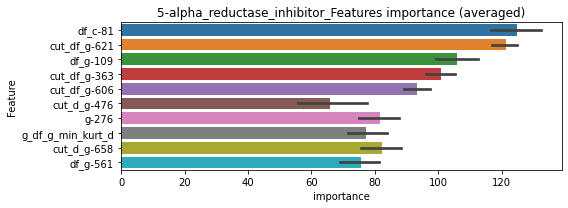

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000314653	valid_1's binary_logloss: 0.00782696
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 5-alpha_reductase_inhibitor=================================


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000279677	valid_1's binary_logloss: 0.00199539
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952


Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000283259	valid_1's binary_logloss: 0.000318669


================================= fold 4/4 5-alpha_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


5-alpha_reductase_inhibitor logloss: 0.003691468162762043


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000296112	valid_1's binary_logloss: 0.00462485


11-beta-hsd1_inhibitor, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000293568	valid_1's binary_logloss: 0.00780414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000277428	valid_1's binary_logloss: 0.0118147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000264154	valid_1's binary_logloss: 0.00301256
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009440, Threshold: 0.0024580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0024580, conf_0:0.00172, conf_1:0.00320
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0324580


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000285439	valid_1's binary_logloss: 0.00335261


threshold: 0.0324580, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000288871	valid_1's binary_logloss: 0.00900118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000287021	valid_1's binary_logloss: 0.00814756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000264936	valid_1's binary_logloss: 0.00251586
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0106705, Threshold: 0.0324580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0324580, conf_0:0.02597, conf_1:0.03895


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000265322	valid_1's binary_logloss: 0.00291201


threshold: 0.0324580, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000288871	valid_1's binary_logloss: 0.00900118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000287021	valid_1's binary_logloss: 0.00814756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000264936	valid_1's binary_logloss: 0.00251586
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0106705, Threshold: 0.0324580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0324580, conf_0:0.02921, conf_1:0.03570


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000265322	valid_1's binary_logloss: 0.00291201


threshold: 0.0324580, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


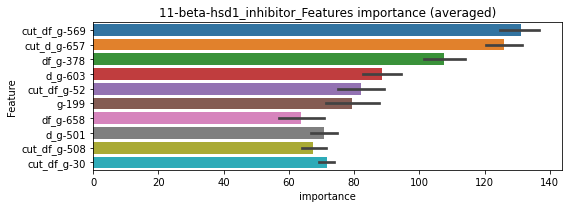

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 11-beta-hsd1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000280069	valid_1's binary_logloss: 0.00806935
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000292492	valid_1's binary_logloss: 0.00816247
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 11-beta-hsd1_inhibitor=================================


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000322133	valid_1's binary_logloss: 0.0018777
Training until validation scores don't improve for 30 rounds


11-beta-hsd1_inhibitor logloss: 0.005237931169247388


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000304302	valid_1's binary_logloss: 0.002835


acat_inhibitor, len(trt): 24, len(othr): 3282
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3282


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000469786	valid_1's binary_logloss: 0.0127041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000375375	valid_1's binary_logloss: 0.00906075
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000311709	valid_1's binary_logloss: 0.00271382
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015037, Threshold: 0.0022002, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0022002, conf_0:0.00154, conf_1:0.00286
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_1: 0.0322002
threshold: 0.0322002, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000653257	valid_1's binary_logloss: 0.0184638


positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000466856	valid_1's binary_logloss: 0.01022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000329732	valid_1's binary_logloss: 0.0081218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000339729	valid_1's binary_logloss: 0.00225132
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0083670, Threshold: 0.0322002, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0000000 Vs.target_rate: 0.00101
Num_p_label: 0.0, Expected: 4.0, Threshold: 0.0322002, conf_0:0.02576, conf_1:0.03864


Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000341895	valid_1's binary_logloss: 0.0186885


threshold: 0.0322002, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000376923	valid_1's binary_logloss: 0.0212637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000390059	valid_1's binary_logloss: 0.00545752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000360166	valid_1's binary_logloss: 0.00570443
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116927, Threshold: 0.0322002, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0000000 Vs.target_rate: 0.00101
Num_p_label: 0.0, Expected: 4.0, Threshold: 0.0322002, conf_0:0.02898, conf_1:0.03542


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000313447	valid_1's binary_logloss: 0.00404274


threshold: 0.0322002, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


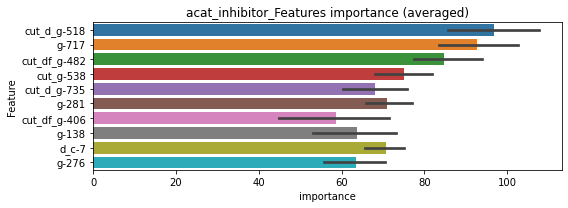

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 acat_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 acat_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000507673	valid_1's binary_logloss: 0.0189272
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 acat_inhibitor=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000371668	valid_1's binary_logloss: 0.00502699
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 acat_inhibitor=================================


Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000366624	valid_1's binary_logloss: 0.00417656
Training until validation scores don't improve for 30 rounds


acat_inhibitor logloss: 0.008201976331006815


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000364474	valid_1's binary_logloss: 0.00467717
mutually exclusive columns: acetylcholine_receptor_agonist


acetylcholine_receptor_agonist, len(trt): 190, len(othr): 6396
target_rate: 0.0079785 → Adj_target_rate: 0.0072634


selected negative label: 6396


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.0143386	valid_1's binary_logloss: 0.107565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00889523	valid_1's binary_logloss: 0.0864293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00668826	valid_1's binary_logloss: 0.0626972
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.989, PR-AUC:0.974
y_Threshold: 0.0216754, Threshold: 0.0309253, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0138904	valid_1's binary_logloss: 0.112011


Remove_noisy_data: 372 → Positive_corect_labels: 1221/7303
p_label_rate: 0.0100452 Vs.target_rate: 0.00798
Num_p_label: 40.0, Expected: 31.8, Threshold: 0.0309253, conf_0:0.02165, conf_1:0.04020
threshold: 0.0309253, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1221.0/7303, y_label_rate: 0.1671916
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00662938	valid_1's binary_logloss: 0.0665373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00839507	valid_1's binary_logloss: 0.0752472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.00731559	valid_1's binary_logloss: 0.0710444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00437324	valid_1's binary_logloss: 0.0472012


2 / 3, AUC score:0.997, PR-AUC:0.990
y_Threshold: 0.0285808, Threshold: 0.0309253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 100 → Positive_corect_labels: 1171.0/7203
p_label_rate: 0.0097941 Vs.target_rate: 0.00798
Num_p_label: 39.0, Expected: 31.8, Threshold: 0.0309253, conf_0:0.02474, conf_1:0.03711
threshold: 0.0309253, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1171.0/7203, y_label_rate: 0.1625712
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00202772	valid_1's binary_logloss: 0.0339284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00799845	valid_1's binary_logloss: 0.054996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00449011	valid_1's binary_logloss: 0.0505958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00200921	valid_1's binary_logloss: 0.0345564


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0229872, Threshold: 0.0309253, pos_neg_ratio: 0.8000000
Remove_noisy_data: 62 → Positive_corect_labels: 1140.0/7141
p_label_rate: 0.0045203 Vs.target_rate: 0.00798
Num_p_label: 18.0, Expected: 31.8, Threshold: 0.0309253, conf_0:0.02783, conf_1:0.03402
threshold: 0.0309253, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1140.0/7141, y_label_rate: 0.1596415


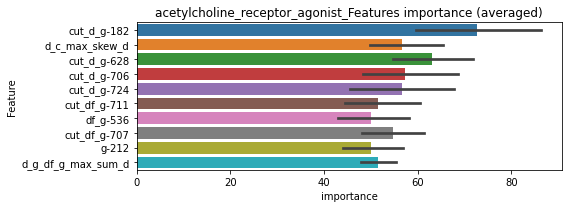

len(train_index) : 5355
len(valid_index) : 1786
================================= fold 1/4 acetylcholine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 2/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00242913	valid_1's binary_logloss: 0.0317368
Training until validation scores don't improve for 30 rounds


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 3/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00309867	valid_1's binary_logloss: 0.0252046
Training until validation scores don't improve for 30 rounds


len(train_index) : 5356
len(valid_index) : 1785
================================= fold 4/4 acetylcholine_receptor_agonist=================================


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.0031401	valid_1's binary_logloss: 0.0332932
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_agonist logloss: 0.028202067164517144


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00153141	valid_1's binary_logloss: 0.0225717
mutually exclusive columns: acetylcholine_receptor_antagonist


acetylcholine_receptor_antagonist, len(trt): 301, len(othr): 7534
target_rate: 0.0126396 → Adj_target_rate: 0.0107394


selected negative label: 7534


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.0273087	valid_1's binary_logloss: 0.129079
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.025651	valid_1's binary_logloss: 0.126124
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.0284169	valid_1's binary_logloss: 0.13548
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.962, PR-AUC:0.933
y_Threshold: 0.0390041, Threshold: 0.0528360, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.0219167	valid_1's binary_logloss: 0.128705


Remove_noisy_data: 614 → Positive_corect_labels: 1350/8426
p_label_rate: 0.0100452 Vs.target_rate: 0.01264
Num_p_label: 40.0, Expected: 50.3, Threshold: 0.0528360, conf_0:0.03699, conf_1:0.06869
threshold: 0.0528360, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1350.0/8426, y_label_rate: 0.1602184
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00944365	valid_1's binary_logloss: 0.0745008
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.00796747	valid_1's binary_logloss: 0.0764743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00699515	valid_1's binary_logloss: 0.0669077
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.987


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.007474	valid_1's binary_logloss: 0.0577917


y_Threshold: 0.0289300, Threshold: 0.0528360, pos_neg_ratio: 0.8000000
Remove_noisy_data: 128 → Positive_corect_labels: 1286.0/8298
p_label_rate: 0.0017579 Vs.target_rate: 0.01264
Num_p_label: 7.0, Expected: 50.3, Threshold: 0.0528360, conf_0:0.04227, conf_1:0.06340
threshold: 0.0528360, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 1286.0/8298, y_label_rate: 0.1549771
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00400571	valid_1's binary_logloss: 0.0455321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00399619	valid_1's binary_logloss: 0.044868
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.0043505	valid_1's binary_logloss: 0.0369336
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0214682, Threshold: 0.0528360, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00358913	valid_1's binary_logloss: 0.0331879


Remove_noisy_data: 54 → Positive_corect_labels: 1259.0/8244
p_label_rate: 0.0005023 Vs.target_rate: 0.01264
Num_p_label: 2.0, Expected: 50.3, Threshold: 0.0528360, conf_0:0.04755, conf_1:0.05812
threshold: 0.0528360, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 1259.0/8244, y_label_rate: 0.1527171


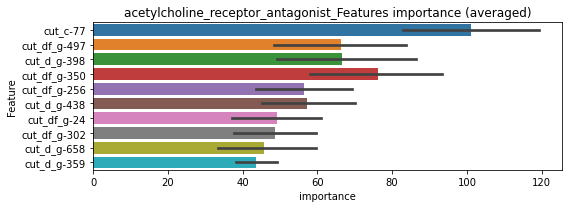

len(train_index) : 6183
len(valid_index) : 2061
================================= fold 1/4 acetylcholine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 6183
len(valid_index) : 2061
================================= fold 2/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00199669	valid_1's binary_logloss: 0.0293831
Training until validation scores don't improve for 30 rounds


len(train_index) : 6183
len(valid_index) : 2061
================================= fold 3/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00321454	valid_1's binary_logloss: 0.0366339
Training until validation scores don't improve for 30 rounds


len(train_index) : 6183
len(valid_index) : 2061
================================= fold 4/4 acetylcholine_receptor_antagonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00303447	valid_1's binary_logloss: 0.0285348
Training until validation scores don't improve for 30 rounds


acetylcholine_receptor_antagonist logloss: 0.030530486745546634
acetylcholine_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[199]	training's binary_logloss: 0.00205062	valid_1's binary_logloss: 0.0275702


acetylcholinesterase_inhibitor, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00222494	valid_1's binary_logloss: 0.0633752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00220098	valid_1's binary_logloss: 0.0559419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00249964	valid_1's binary_logloss: 0.0440722
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000961613	valid_1's binary_logloss: 0.048828


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0073176, Threshold: 0.0132668, pos_neg_ratio: 0.8000000
Remove_noisy_data: 141 → Positive_corect_labels: 650/3789
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0132668, conf_0:0.00929, conf_1:0.01725
Num_p_label: 6.0, Expected: 12.2, Adj_threshold_1: 0.0432668
threshold: 0.0432668, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 650.0/3789, y_label_rate: 0.1715492
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00153928	valid_1's binary_logloss: 0.0488759
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00121754	valid_1's binary_logloss: 0.0522999
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00143135	valid_1's binary_logloss: 0.0377964
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0171455, Threshold: 0.0432668, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0067805 Vs.target_rate: 0.00307
Num_p_label: 27.0, Expected: 12.2, Threshold: 0.0432668, conf_0:0.03461, conf_1:0.05192
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_1: 0.0732668
threshold: 0.0732668, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00156129	valid_1's binary_logloss: 0.0432742


positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00217692	valid_1's binary_logloss: 0.0535577
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00292885	valid_1's binary_logloss: 0.0610197
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.00225072	valid_1's binary_logloss: 0.0385719
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0232018, Threshold: 0.0732668, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 639.0/3767


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.0010946	valid_1's binary_logloss: 0.0241136


p_label_rate: 0.0057760 Vs.target_rate: 0.00307
Num_p_label: 23.0, Expected: 12.2, Threshold: 0.0732668, conf_0:0.06594, conf_1:0.08059
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_1: 0.1032668
threshold: 0.1032668, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 639.0/3767, y_label_rate: 0.1696310


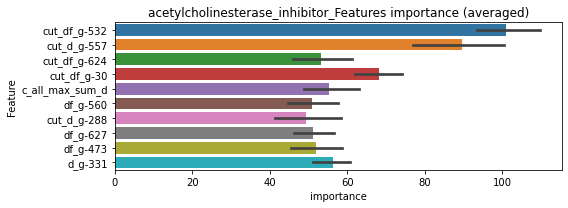

len(train_index) : 2825
len(valid_index) : 942
================================= fold 1/4 acetylcholinesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 942
================================= fold 2/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[207]	training's binary_logloss: 0.00215933	valid_1's binary_logloss: 0.0480212
Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 942
================================= fold 3/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[286]	training's binary_logloss: 0.0013475	valid_1's binary_logloss: 0.0402097
Training until validation scores don't improve for 30 rounds


len(train_index) : 2826
len(valid_index) : 941
================================= fold 4/4 acetylcholinesterase_inhibitor=================================


Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00309443	valid_1's binary_logloss: 0.0291559
Training until validation scores don't improve for 30 rounds


acetylcholinesterase_inhibitor logloss: 0.04176752570159975
acetylcholinesterase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[149]	training's binary_logloss: 0.00352195	valid_1's binary_logloss: 0.0496917


adenosine_receptor_agonist, len(trt): 54, len(othr): 3285
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000637237	valid_1's binary_logloss: 0.0370338
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00171262	valid_1's binary_logloss: 0.0562776
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000642768	valid_1's binary_logloss: 0.0149934
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00064823	valid_1's binary_logloss: 0.030555


y_Threshold: 0.0040323, Threshold: 0.0092562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0092562, conf_0:0.00648, conf_1:0.01203
Num_p_label: 1.0, Expected: 9.0, Adj_threshold_1: 0.0392562
threshold: 0.0392562, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.000981866	valid_1's binary_logloss: 0.0357243
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00114501	valid_1's binary_logloss: 0.0557469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000531604	valid_1's binary_logloss: 0.0143097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.00052243	valid_1's binary_logloss: 0.0295389


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0146378, Threshold: 0.0392562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00227
Num_p_label: 6.0, Expected: 9.0, Threshold: 0.0392562, conf_0:0.03140, conf_1:0.04711
threshold: 0.0392562, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00108554	valid_1's binary_logloss: 0.0381607
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000525921	valid_1's binary_logloss: 0.0182507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000509778	valid_1's binary_logloss: 0.0213978
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0127222, Threshold: 0.0392562, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0015068 Vs.target_rate: 0.00227
Num_p_label: 6.0, Expected: 9.0, Threshold: 0.0392562, conf_0:0.03533, conf_1:0.04318
threshold: 0.0392562, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00175434	valid_1's binary_logloss: 0.0503765


positive_y_label: 652.0/3800, y_label_rate: 0.1715789


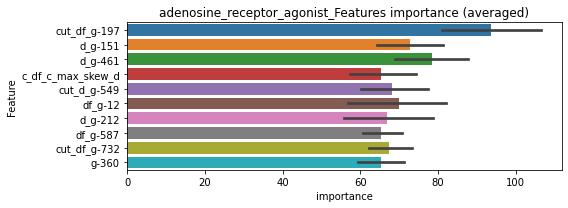

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 adenosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00131157	valid_1's binary_logloss: 0.0305156
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00133497	valid_1's binary_logloss: 0.0308748
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 adenosine_receptor_agonist=================================


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.000999337	valid_1's binary_logloss: 0.0187143
Training until validation scores don't improve for 30 rounds


adenosine_receptor_agonist logloss: 0.02853872737010008


Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00145747	valid_1's binary_logloss: 0.0340503


adenosine_receptor_antagonist, len(trt): 96, len(othr): 3271
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3271


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00419401	valid_1's binary_logloss: 0.0944372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00138692	valid_1's binary_logloss: 0.0527801
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00112011	valid_1's binary_logloss: 0.0441185
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0137418, Threshold: 0.0370323, pos_neg_ratio: 0.8000000
Remove_noisy_data: 161 → Positive_corect_labels: 639/3764
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0370323, conf_0:0.02592, conf_1:0.04814
Num_p_label: 13.0, Expected: 16.1, Adj_threshold_1: 0.0670323
threshold: 0.0670323, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00804504	valid_1's binary_logloss: 0.0857554


positive_y_label: 639.0/3764, y_label_rate: 0.1697662
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00186174	valid_1's binary_logloss: 0.0779473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0033193	valid_1's binary_logloss: 0.0671704
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000812472	valid_1's binary_logloss: 0.0284196
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00151199	valid_1's binary_logloss: 0.054441


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0223137, Threshold: 0.0670323, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 627.0/3740
p_label_rate: 0.0118031 Vs.target_rate: 0.00403
Num_p_label: 47.0, Expected: 16.1, Threshold: 0.0670323, conf_0:0.05363, conf_1:0.08044
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_1: 0.0970323
Num_p_label: 19.0, Expected: 16.1, Adj_threshold_2: 0.1270323
threshold: 0.1270323, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 627.0/3740, y_label_rate: 0.1676471
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000955073	valid_1's binary_logloss: 0.0487221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00149906	valid_1's binary_logloss: 0.0606782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[567]	training's binary_logloss: 0.000830234	valid_1's binary_logloss: 0.027551
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0197722, Threshold: 0.1270323, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 619.0/3724
p_label_rate: 0.0097941 Vs.target_rate: 0.00403
Num_p_label: 39.0, Expected: 16.1, Threshold: 0.1270323, conf_0:0.11433, conf_1:0.13974
Num_p_label: 31.0, Expected: 16.1, Adj_threshold_1: 0.1570323
Num_p_label: 27.0, Expected: 16.1, Adj_threshold_2: 0.1870323
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_3: 0.2170323


Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00200748	valid_1's binary_logloss: 0.0511961


threshold: 0.2170323, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 619.0/3724, y_label_rate: 0.1662191


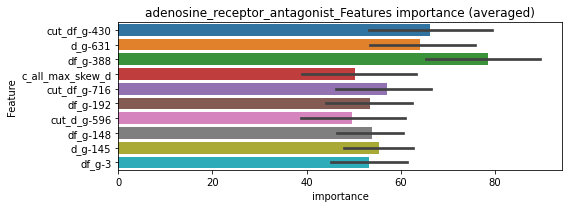

len(train_index) : 2793
len(valid_index) : 931
================================= fold 1/4 adenosine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2793
len(valid_index) : 931
================================= fold 2/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.00426259	valid_1's binary_logloss: 0.0510605
Training until validation scores don't improve for 30 rounds


len(train_index) : 2793
len(valid_index) : 931
================================= fold 3/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[182]	training's binary_logloss: 0.00327718	valid_1's binary_logloss: 0.0469856
Training until validation scores don't improve for 30 rounds


len(train_index) : 2793
len(valid_index) : 931
================================= fold 4/4 adenosine_receptor_antagonist=================================


Early stopping, best iteration is:
[223]	training's binary_logloss: 0.00241153	valid_1's binary_logloss: 0.0421479
Training until validation scores don't improve for 30 rounds


adenosine_receptor_antagonist logloss: 0.045232062258915774
adenosine_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.00438905	valid_1's binary_logloss: 0.0407342


adenylyl_cyclase_activator, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000293707	valid_1's binary_logloss: 0.00483205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000276664	valid_1's binary_logloss: 0.0142858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000288826	valid_1's binary_logloss: 0.00251186
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009501, Threshold: 0.0051761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0051761, conf_0:0.00362, conf_1:0.00673
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0351761
threshold: 0.0351761, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000305477	valid_1's binary_logloss: 0.0110759


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000294547	valid_1's binary_logloss: 0.00438836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000274055	valid_1's binary_logloss: 0.0128247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000273251	valid_1's binary_logloss: 0.00235239
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129802, Threshold: 0.0351761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0090407 Vs.target_rate: 0.00076
Num_p_label: 36.0, Expected: 3.0, Threshold: 0.0351761, conf_0:0.02814, conf_1:0.04221
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_1: 0.0651761
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_2: 0.0951761
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.1251761
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_4: 0.1551761
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_5: 0.1851761
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_6: 0.2151761
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_7: 0.2451761
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.2751761


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000300789	valid_1's binary_logloss: 0.008883


threshold: 0.2751761, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000294547	valid_1's binary_logloss: 0.00438836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000274055	valid_1's binary_logloss: 0.0128247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000273251	valid_1's binary_logloss: 0.00235239
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0129802, Threshold: 0.2751761, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.2751761, conf_0:0.24766, conf_1:0.30269
threshold: 0.2751761, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000300789	valid_1's binary_logloss: 0.008883


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


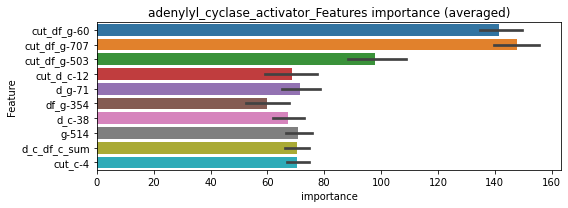

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 adenylyl_cyclase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000313691	valid_1's binary_logloss: 0.00330151
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[689]	training's binary_logloss: 0.000274666	valid_1's binary_logloss: 0.0112834
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 adenylyl_cyclase_activator=================================


Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000292027	valid_1's binary_logloss: 0.00259082
Training until validation scores don't improve for 30 rounds


adenylyl_cyclase_activator logloss: 0.0063464738879098195


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000443707	valid_1's binary_logloss: 0.00819899
mutually exclusive columns: adrenergic_receptor_agonist


adrenergic_receptor_agonist, len(trt): 270, len(othr): 6953
target_rate: 0.0113379 → Adj_target_rate: 0.0097917


selected negative label: 6953


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.0124748	valid_1's binary_logloss: 0.11513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0164522	valid_1's binary_logloss: 0.126484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0248536	valid_1's binary_logloss: 0.126464
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.974, PR-AUC:0.950
y_Threshold: 0.0334234, Threshold: 0.0452136, pos_neg_ratio: 0.8000000
Remove_noisy_data: 505 → Positive_corect_labels: 1277/7838
p_label_rate: 0.0100452 Vs.target_rate: 0.01134
Num_p_label: 40.0, Expected: 45.1, Threshold: 0.0452136, conf_0:0.03165, conf_1:0.05878
threshold: 0.0452136, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.0193473	valid_1's binary_logloss: 0.123887


positive_y_label: 1277.0/7838, y_label_rate: 0.1629242
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00649825	valid_1's binary_logloss: 0.0748464
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.0109732	valid_1's binary_logloss: 0.08919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00517659	valid_1's binary_logloss: 0.0505789
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0332591, Threshold: 0.0452136, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 1210.0/7704
p_label_rate: 0.0050226 Vs.target_rate: 0.01134
Num_p_label: 20.0, Expected: 45.1, Threshold: 0.0452136, conf_0:0.03617, conf_1:0.05426
threshold: 0.0452136, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[277]	training's binary_logloss: 0.0120532	valid_1's binary_logloss: 0.0897429


positive_y_label: 1210.0/7704, y_label_rate: 0.1570613
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00846917	valid_1's binary_logloss: 0.0575633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.0034326	valid_1's binary_logloss: 0.0491302
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00265695	valid_1's binary_logloss: 0.0417249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00237747	valid_1's binary_logloss: 0.0397632


3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0242058, Threshold: 0.0452136, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1171.0/7626
p_label_rate: 0.0052737 Vs.target_rate: 0.01134
Num_p_label: 21.0, Expected: 45.1, Threshold: 0.0452136, conf_0:0.04069, conf_1:0.04973
threshold: 0.0452136, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 1171.0/7626, y_label_rate: 0.1535536


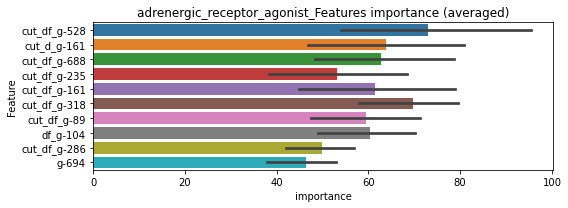

len(train_index) : 5719
len(valid_index) : 1907
================================= fold 1/4 adrenergic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5719
len(valid_index) : 1907
================================= fold 2/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00143901	valid_1's binary_logloss: 0.0233386
Training until validation scores don't improve for 30 rounds


len(train_index) : 5720
len(valid_index) : 1906
================================= fold 3/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[159]	training's binary_logloss: 0.00318619	valid_1's binary_logloss: 0.0327708
Training until validation scores don't improve for 30 rounds


len(train_index) : 5720
len(valid_index) : 1906
================================= fold 4/4 adrenergic_receptor_agonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00302508	valid_1's binary_logloss: 0.0344145
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_agonist logloss: 0.028671104595538524


Early stopping, best iteration is:
[236]	training's binary_logloss: 0.001648	valid_1's binary_logloss: 0.0241611
mutually exclusive columns: adrenergic_receptor_antagonist


adrenergic_receptor_antagonist, len(trt): 360, len(othr): 6628
target_rate: 0.0151172 → Adj_target_rate: 0.0125042


selected negative label: 6628


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.027659	valid_1's binary_logloss: 0.153976
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.0431136	valid_1's binary_logloss: 0.188592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0276567	valid_1's binary_logloss: 0.159042
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.939, PR-AUC:0.895
y_Threshold: 0.0531932, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 660 → Positive_corect_labels: 1128/7293
p_label_rate: 0.0100452 Vs.target_rate: 0.01512
Num_p_label: 40.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.06565, conf_1:0.12191
threshold: 0.0937789, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.0369145	valid_1's binary_logloss: 0.165856


positive_y_label: 1128.0/7293, y_label_rate: 0.1546689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00792264	valid_1's binary_logloss: 0.0761351
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0113764	valid_1's binary_logloss: 0.0995736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00817211	valid_1's binary_logloss: 0.077493
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.991, PR-AUC:0.974
y_Threshold: 0.0481532, Threshold: 0.0937789, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00882429	valid_1's binary_logloss: 0.0792224


Remove_noisy_data: 182 → Positive_corect_labels: 1037.0/7111
p_label_rate: 0.0215972 Vs.target_rate: 0.01512
Num_p_label: 86.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.07502, conf_1:0.11253
threshold: 0.0937789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1037.0/7111, y_label_rate: 0.1458304
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00347138	valid_1's binary_logloss: 0.0374791
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00224914	valid_1's binary_logloss: 0.0271869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.002524	valid_1's binary_logloss: 0.0468697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00131374	valid_1's binary_logloss: 0.0207719


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0481822, Threshold: 0.0937789, pos_neg_ratio: 0.8000000
Remove_noisy_data: 68 → Positive_corect_labels: 1003.0/7043
p_label_rate: 0.0298845 Vs.target_rate: 0.01512
Num_p_label: 119.0, Expected: 60.2, Threshold: 0.0937789, conf_0:0.08440, conf_1:0.10316
Num_p_label: 103.0, Expected: 60.2, Adj_threshold_1: 0.1237789
Num_p_label: 91.0, Expected: 60.2, Adj_threshold_2: 0.1537789
Num_p_label: 86.0, Expected: 60.2, Adj_threshold_3: 0.1837789
threshold: 0.1837789, positive_p_label: 86.0/3982, p_label_rate: 0.0215972
positive_y_label: 1003.0/7043, y_label_rate: 0.1424109


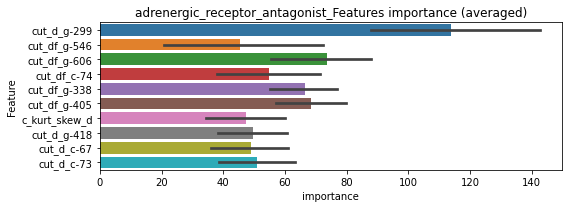

len(train_index) : 5282
len(valid_index) : 1761
================================= fold 1/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5282
len(valid_index) : 1761
================================= fold 2/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000735263	valid_1's binary_logloss: 0.0130259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.000425806	valid_1's binary_logloss: 0.00587168


len(train_index) : 5282
len(valid_index) : 1761
================================= fold 3/4 adrenergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5283
len(valid_index) : 1760
================================= fold 4/4 adrenergic_receptor_antagonist=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00111721	valid_1's binary_logloss: 0.0204171
Training until validation scores don't improve for 30 rounds


adrenergic_receptor_antagonist logloss: 0.013393182908759196


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00122649	valid_1's binary_logloss: 0.0142586


akt_inhibitor, len(trt): 66, len(othr): 3276
target_rate: 0.0027715 → Adj_target_rate: 0.0029567


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000923281	valid_1's binary_logloss: 0.041802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00115809	valid_1's binary_logloss: 0.0474391
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00177234	valid_1's binary_logloss: 0.0421981
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0058054, Threshold: 0.0222388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3797
p_label_rate: 0.0100452 Vs.target_rate: 0.00277
Num_p_label: 40.0, Expected: 11.0, Threshold: 0.0222388, conf_0:0.01557, conf_1:0.02891
Num_p_label: 17.0, Expected: 11.0, Adj_threshold_1: 0.0522388
Num_p_label: 9.0, Expected: 11.0, Adj_threshold_2: 0.0822388


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00183099	valid_1's binary_logloss: 0.052382


threshold: 0.0822388, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 654.0/3797, y_label_rate: 0.1722412
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000607927	valid_1's binary_logloss: 0.0387651
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00131292	valid_1's binary_logloss: 0.0422789
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000990731	valid_1's binary_logloss: 0.0389975
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0178852, Threshold: 0.0822388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 646.0/3781
p_label_rate: 0.0062783 Vs.target_rate: 0.00277
Num_p_label: 25.0, Expected: 11.0, Threshold: 0.0822388, conf_0:0.06579, conf_1:0.09869
Num_p_label: 15.0, Expected: 11.0, Adj_threshold_1: 0.1122388
threshold: 0.1122388, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[338]	training's binary_logloss: 0.00189165	valid_1's binary_logloss: 0.0540854


positive_y_label: 646.0/3781, y_label_rate: 0.1708543
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00120177	valid_1's binary_logloss: 0.052759
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000559225	valid_1's binary_logloss: 0.0321643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000640086	valid_1's binary_logloss: 0.0255052
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00056826	valid_1's binary_logloss: 0.0276778


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0128371, Threshold: 0.1122388, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 641.0/3771
p_label_rate: 0.0035158 Vs.target_rate: 0.00277
Num_p_label: 14.0, Expected: 11.0, Threshold: 0.1122388, conf_0:0.10101, conf_1:0.12346
threshold: 0.1122388, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 641.0/3771, y_label_rate: 0.1699814


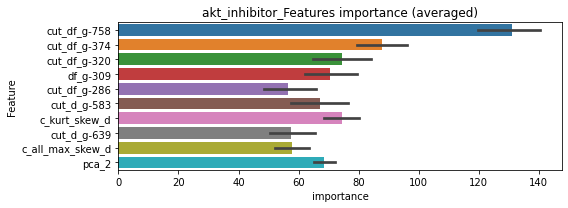

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 akt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 akt_inhibitor=================================


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.00311986	valid_1's binary_logloss: 0.0498544
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 akt_inhibitor=================================


Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00109794	valid_1's binary_logloss: 0.0353435
Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 akt_inhibitor=================================


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00076378	valid_1's binary_logloss: 0.0215414
Training until validation scores don't improve for 30 rounds


akt_inhibitor logloss: 0.03494529421682754
akt_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.0014045	valid_1's binary_logloss: 0.0330399


aldehyde_dehydrogenase_inhibitor, len(trt): 19, len(othr): 3289
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00029927	valid_1's binary_logloss: 0.00460881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000314439	valid_1's binary_logloss: 0.0165945
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000294701	valid_1's binary_logloss: 0.00397104
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010142, Threshold: 0.0030793, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0030793, conf_0:0.00216, conf_1:0.00400
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0330793
threshold: 0.0330793, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000390737	valid_1's binary_logloss: 0.00981119


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000285986	valid_1's binary_logloss: 0.00444822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000293887	valid_1's binary_logloss: 0.013653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000293917	valid_1's binary_logloss: 0.00353804
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000288127	valid_1's binary_logloss: 0.00959144


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0140511, Threshold: 0.0330793, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0330793, conf_0:0.02646, conf_1:0.03970
threshold: 0.0330793, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000285986	valid_1's binary_logloss: 0.00444822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000293887	valid_1's binary_logloss: 0.013653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000293917	valid_1's binary_logloss: 0.00353804
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0140511, Threshold: 0.0330793, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0330793, conf_0:0.02977, conf_1:0.03639
threshold: 0.0330793, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000288127	valid_1's binary_logloss: 0.00959144


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


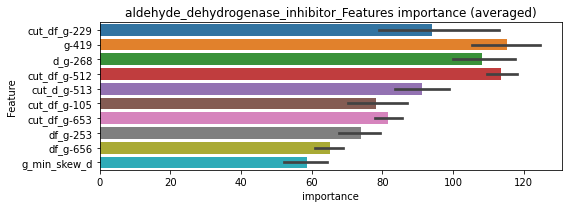

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 aldehyde_dehydrogenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.00032385	valid_1's binary_logloss: 0.00341159
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000320916	valid_1's binary_logloss: 0.0108822
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 aldehyde_dehydrogenase_inhibitor=================================


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000371022	valid_1's binary_logloss: 0.00328282
Training until validation scores don't improve for 30 rounds


aldehyde_dehydrogenase_inhibitor logloss: 0.006375241449608689


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000380534	valid_1's binary_logloss: 0.00792744


alk_inhibitor, len(trt): 42, len(othr): 3285
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00060574	valid_1's binary_logloss: 0.0293942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000589522	valid_1's binary_logloss: 0.0327669
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000458764	valid_1's binary_logloss: 0.00708734
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020316, Threshold: 0.0062859, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000534127	valid_1's binary_logloss: 0.0214698


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0062859, conf_0:0.00440, conf_1:0.00817
Num_p_label: 10.0, Expected: 7.0, Adj_threshold_1: 0.0362859
threshold: 0.0362859, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000605415	valid_1's binary_logloss: 0.0285202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000584372	valid_1's binary_logloss: 0.0338531
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000436157	valid_1's binary_logloss: 0.00541653
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097352, Threshold: 0.0362859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0050226 Vs.target_rate: 0.00176
Num_p_label: 20.0, Expected: 7.0, Threshold: 0.0362859, conf_0:0.02903, conf_1:0.04354
Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.0662859


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000642612	valid_1's binary_logloss: 0.0212706


threshold: 0.0662859, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00060421	valid_1's binary_logloss: 0.0303105
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000543771	valid_1's binary_logloss: 0.0202223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000501791	valid_1's binary_logloss: 0.00371916
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0147584, Threshold: 0.0662859, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0032647 Vs.target_rate: 0.00176
Num_p_label: 13.0, Expected: 7.0, Threshold: 0.0662859, conf_0:0.05966, conf_1:0.07291
threshold: 0.0662859, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00274674	valid_1's binary_logloss: 0.0377228


positive_y_label: 653.0/3802, y_label_rate: 0.1717517


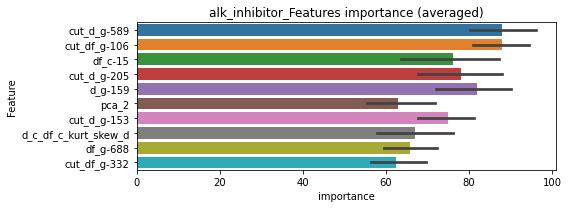

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 alk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 alk_inhibitor=================================


Early stopping, best iteration is:
[267]	training's binary_logloss: 0.00105737	valid_1's binary_logloss: 0.0410708
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 alk_inhibitor=================================


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.000901367	valid_1's binary_logloss: 0.0229918
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 alk_inhibitor=================================


Early stopping, best iteration is:
[303]	training's binary_logloss: 0.000928843	valid_1's binary_logloss: 0.0167576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000535265	valid_1's binary_logloss: 0.00616076


alk_inhibitor logloss: 0.02175063025702739
ampk_activator, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000303305	valid_1's binary_logloss: 0.00800346
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000238299	valid_1's binary_logloss: 0.00458284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.00020347	valid_1's binary_logloss: 0.000405148
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0007730, Threshold: 0.0037459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0037459, conf_0:0.00262, conf_1:0.00487
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_1: 0.0337459
threshold: 0.0337459, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000287333	valid_1's binary_logloss: 0.00396965


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00072539	valid_1's binary_logloss: 0.00767399
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000235693	valid_1's binary_logloss: 0.00336257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000198072	valid_1's binary_logloss: 0.000210718
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0066945, Threshold: 0.0337459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0045203 Vs.target_rate: 0.00050
Num_p_label: 18.0, Expected: 2.0, Threshold: 0.0337459, conf_0:0.02700, conf_1:0.04050
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.0637459
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_2: 0.0937459
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_3: 0.1237459
threshold: 0.1237459, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000301308	valid_1's binary_logloss: 0.00504623


positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000188306	valid_1's binary_logloss: 0.000744507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000263394	valid_1's binary_logloss: 0.0046128
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000193989	valid_1's binary_logloss: 0.000277115
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077389, Threshold: 0.1237459, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00050
Num_p_label: 5.0, Expected: 2.0, Threshold: 0.1237459, conf_0:0.11137, conf_1:0.13612
threshold: 0.1237459, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000215045	valid_1's binary_logloss: 0.00329453


positive_y_label: 656.0/3810, y_label_rate: 0.1721785


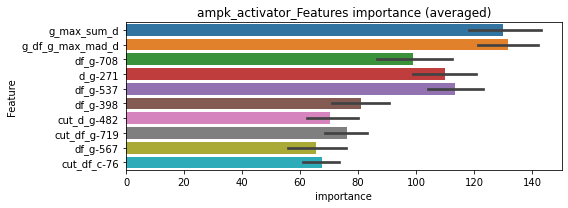

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 ampk_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 ampk_activator=================================


Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000209347	valid_1's binary_logloss: 0.00125052
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 ampk_activator=================================


Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000230048	valid_1's binary_logloss: 0.00390196
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 ampk_activator=================================


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000200037	valid_1's binary_logloss: 0.000236284
Training until validation scores don't improve for 30 rounds


ampk_activator logloss: 0.002071022306295543


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000311768	valid_1's binary_logloss: 0.00289426


analgesic, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000244171	valid_1's binary_logloss: 0.00410526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000238847	valid_1's binary_logloss: 0.00689522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000208743	valid_1's binary_logloss: 0.000230703
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0007903, Threshold: 0.0087618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0087618, conf_0:0.00613, conf_1:0.01139
Num_p_label: 30.0, Expected: 2.0, Adj_threshold_1: 0.0387618
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_2: 0.0687618
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_3: 0.0987618
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_4: 0.1287618


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000222702	valid_1's binary_logloss: 0.00301768


Num_p_label: 8.0, Expected: 2.0, Adj_threshold_5: 0.1587618
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_6: 0.1887618
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.2187618
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_8: 0.2487618
threshold: 0.2487618, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000217242	valid_1's binary_logloss: 0.00307007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000333588	valid_1's binary_logloss: 0.00611643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000203451	valid_1's binary_logloss: 0.000225785
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0175124, Threshold: 0.2487618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0057760 Vs.target_rate: 0.00050
Num_p_label: 23.0, Expected: 2.0, Threshold: 0.2487618, conf_0:0.19901, conf_1:0.29851
Num_p_label: 19.0, Expected: 2.0, Adj_threshold_1: 0.2787618
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_2: 0.3087618
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_3: 0.3387618


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000205566	valid_1's binary_logloss: 0.00318325


Num_p_label: 13.0, Expected: 2.0, Adj_threshold_4: 0.3687618
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_5: 0.3987618
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_6: 0.4287618
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_7: 0.4587618
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_8: 0.4887618
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_9: 0.5187618
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_10: 0.5487618
threshold: 0.5487618, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000217242	valid_1's binary_logloss: 0.00307007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000333588	valid_1's binary_logloss: 0.00611643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000203451	valid_1's binary_logloss: 0.000225785
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0175124, Threshold: 0.5487618, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00050
Num_p_label: 6.0, Expected: 2.0, Threshold: 0.5487618, conf_0:0.49389, conf_1:0.60364
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.5787618
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_2: 0.6087618
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_3: 0.6387618
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_4: 0.6687618


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000205566	valid_1's binary_logloss: 0.00318325


threshold: 0.6687618, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


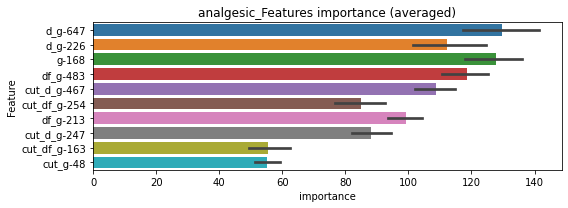

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 analgesic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 analgesic=================================


Early stopping, best iteration is:
[653]	training's binary_logloss: 0.000220802	valid_1's binary_logloss: 0.00272319
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 analgesic=================================


Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000279144	valid_1's binary_logloss: 0.00542835
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 analgesic=================================


Early stopping, best iteration is:
[801]	training's binary_logloss: 0.000207551	valid_1's binary_logloss: 0.000217099
Training until validation scores don't improve for 30 rounds


analgesic logloss: 0.0027020160386122083


Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000212259	valid_1's binary_logloss: 0.00243941


androgen_receptor_agonist, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00327813	valid_1's binary_logloss: 0.0573832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00162304	valid_1's binary_logloss: 0.0443648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000460384	valid_1's binary_logloss: 0.00276147
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0046775, Threshold: 0.0068856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0068856, conf_0:0.00482, conf_1:0.00895
Num_p_label: 0.0, Expected: 8.0, Adj_threshold_1: 0.0368856


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000963448	valid_1's binary_logloss: 0.0414705


threshold: 0.0368856, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000708713	valid_1's binary_logloss: 0.0384221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.00198069	valid_1's binary_logloss: 0.0424365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000643462	valid_1's binary_logloss: 0.0232154
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0106473, Threshold: 0.0368856, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000525711	valid_1's binary_logloss: 0.0144442


Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0000000 Vs.target_rate: 0.00202
Num_p_label: 0.0, Expected: 8.0, Threshold: 0.0368856, conf_0:0.02951, conf_1:0.04426
threshold: 0.0368856, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000744283	valid_1's binary_logloss: 0.032761
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000467204	valid_1's binary_logloss: 0.0365884
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000735306	valid_1's binary_logloss: 0.0111304
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000476779	valid_1's binary_logloss: 0.0219958


y_Threshold: 0.0087262, Threshold: 0.0368856, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 647.0/3787
p_label_rate: 0.0000000 Vs.target_rate: 0.00202
Num_p_label: 0.0, Expected: 8.0, Threshold: 0.0368856, conf_0:0.03320, conf_1:0.04057
threshold: 0.0368856, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 647.0/3787, y_label_rate: 0.1708476


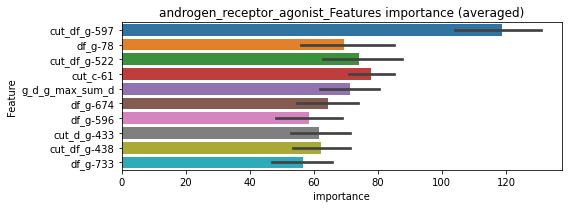

len(train_index) : 2840
len(valid_index) : 947
================================= fold 1/4 androgen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 947
================================= fold 2/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00087924	valid_1's binary_logloss: 0.0258428
Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 947
================================= fold 3/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.000955022	valid_1's binary_logloss: 0.0295398
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 946
================================= fold 4/4 androgen_receptor_agonist=================================


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.0010797	valid_1's binary_logloss: 0.0234266
Training until validation scores don't improve for 30 rounds


androgen_receptor_agonist logloss: 0.023936656155585847


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000825319	valid_1's binary_logloss: 0.0169301


androgen_receptor_antagonist, len(trt): 89, len(othr): 3274
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3274


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00502362	valid_1's binary_logloss: 0.0836531
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00314642	valid_1's binary_logloss: 0.0670265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.001504	valid_1's binary_logloss: 0.0462154
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00101644	valid_1's binary_logloss: 0.0501122


1 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0097826, Threshold: 0.0282132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 148 → Positive_corect_labels: 646/3780
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0282132, conf_0:0.01975, conf_1:0.03668
Num_p_label: 7.0, Expected: 14.9, Adj_threshold_1: 0.0582132
threshold: 0.0582132, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 646.0/3780, y_label_rate: 0.1708995
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00504462	valid_1's binary_logloss: 0.0841627
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00567864	valid_1's binary_logloss: 0.0783007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00209908	valid_1's binary_logloss: 0.0528155
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.996, PR-AUC:0.993
y_Threshold: 0.0282209, Threshold: 0.0582132, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00134903	valid_1's binary_logloss: 0.0418389


Remove_noisy_data: 38 → Positive_corect_labels: 627.0/3742
p_label_rate: 0.0087896 Vs.target_rate: 0.00374
Num_p_label: 35.0, Expected: 14.9, Threshold: 0.0582132, conf_0:0.04657, conf_1:0.06986
Num_p_label: 13.0, Expected: 14.9, Adj_threshold_1: 0.0882132
threshold: 0.0882132, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 627.0/3742, y_label_rate: 0.1675575
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00315776	valid_1's binary_logloss: 0.0518553
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00134706	valid_1's binary_logloss: 0.0478226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000658141	valid_1's binary_logloss: 0.0243741
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0319758, Threshold: 0.0882132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 620.0/3728
p_label_rate: 0.0057760 Vs.target_rate: 0.00374
Num_p_label: 23.0, Expected: 14.9, Threshold: 0.0882132, conf_0:0.07939, conf_1:0.09703
Num_p_label: 16.0, Expected: 14.9, Adj_threshold_1: 0.1182132
threshold: 0.1182132, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00249301	valid_1's binary_logloss: 0.0452732


positive_y_label: 620.0/3728, y_label_rate: 0.1663090


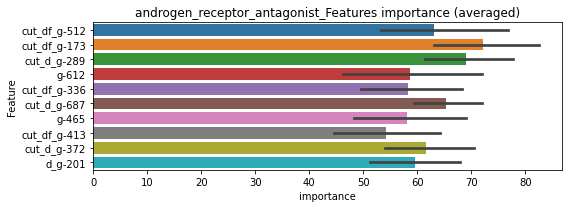

len(train_index) : 2796
len(valid_index) : 932
================================= fold 1/4 androgen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2796
len(valid_index) : 932
================================= fold 2/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00276501	valid_1's binary_logloss: 0.0414282
Training until validation scores don't improve for 30 rounds


len(train_index) : 2796
len(valid_index) : 932
================================= fold 3/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00145321	valid_1's binary_logloss: 0.0308422
Training until validation scores don't improve for 30 rounds


len(train_index) : 2796
len(valid_index) : 932
================================= fold 4/4 androgen_receptor_antagonist=================================


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00170618	valid_1's binary_logloss: 0.0355329
Training until validation scores don't improve for 30 rounds


androgen_receptor_antagonist logloss: 0.03599141027549419
androgen_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00290558	valid_1's binary_logloss: 0.0361623


anesthetic_-_local, len(trt): 80, len(othr): 3272
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3272


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[287]	training's binary_logloss: 0.00356751	valid_1's binary_logloss: 0.0637941
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00333757	valid_1's binary_logloss: 0.0601844
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00113467	valid_1's binary_logloss: 0.0464727
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0095621, Threshold: 0.0167600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0167600, conf_0:0.01173, conf_1:0.02179
Num_p_label: 2.0, Expected: 13.4, Adj_threshold_1: 0.0467600
threshold: 0.0467600, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00295119	valid_1's binary_logloss: 0.0682248


positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00310162	valid_1's binary_logloss: 0.0626057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000682656	valid_1's binary_logloss: 0.0483261
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0034399	valid_1's binary_logloss: 0.0577972
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0233082, Threshold: 0.0467600, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00107764	valid_1's binary_logloss: 0.0446222


Remove_noisy_data: 24 → Positive_corect_labels: 636.0/3758
p_label_rate: 0.0005023 Vs.target_rate: 0.00336
Num_p_label: 2.0, Expected: 13.4, Threshold: 0.0467600, conf_0:0.03741, conf_1:0.05611
threshold: 0.0467600, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 636.0/3758, y_label_rate: 0.1692390
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00148137	valid_1's binary_logloss: 0.0542025
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00361371	valid_1's binary_logloss: 0.0474171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00136459	valid_1's binary_logloss: 0.0352308
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0241682, Threshold: 0.0467600, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 625.0/3736
p_label_rate: 0.0015068 Vs.target_rate: 0.00336
Num_p_label: 6.0, Expected: 13.4, Threshold: 0.0467600, conf_0:0.04208, conf_1:0.05144


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00125409	valid_1's binary_logloss: 0.050377


threshold: 0.0467600, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 625.0/3736, y_label_rate: 0.1672912


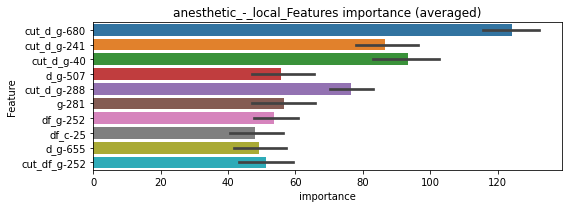

len(train_index) : 2802
len(valid_index) : 934
================================= fold 1/4 anesthetic_-_local=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2802
len(valid_index) : 934
================================= fold 2/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[187]	training's binary_logloss: 0.00245273	valid_1's binary_logloss: 0.0438376
Training until validation scores don't improve for 30 rounds


len(train_index) : 2802
len(valid_index) : 934
================================= fold 3/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00115998	valid_1's binary_logloss: 0.0329952
Training until validation scores don't improve for 30 rounds


len(train_index) : 2802
len(valid_index) : 934
================================= fold 4/4 anesthetic_-_local=================================


Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00237153	valid_1's binary_logloss: 0.0274324
Training until validation scores don't improve for 30 rounds


anesthetic_-_local logloss: 0.036694358953228846
anesthetic_-_local is unpredictable(><)!


Early stopping, best iteration is:
[159]	training's binary_logloss: 0.00316645	valid_1's binary_logloss: 0.0425123


angiogenesis_inhibitor, len(trt): 36, len(othr): 3280
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3280


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00129072	valid_1's binary_logloss: 0.039823
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000383458	valid_1's binary_logloss: 0.0161105
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000468187	valid_1's binary_logloss: 0.00628102
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027241, Threshold: 0.0090103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0090103, conf_0:0.00631, conf_1:0.01171


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000429376	valid_1's binary_logloss: 0.0150741


Num_p_label: 8.0, Expected: 6.0, Adj_threshold_1: 0.0390103
threshold: 0.0390103, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000621296	valid_1's binary_logloss: 0.0390783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000384419	valid_1's binary_logloss: 0.0137284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00041342	valid_1's binary_logloss: 0.00434219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000379587	valid_1's binary_logloss: 0.0154009


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0150041, Threshold: 0.0390103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0118031 Vs.target_rate: 0.00151
Num_p_label: 47.0, Expected: 6.0, Threshold: 0.0390103, conf_0:0.03121, conf_1:0.04681
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_1: 0.0690103
Num_p_label: 21.0, Expected: 6.0, Adj_threshold_2: 0.0990103
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1290103
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_4: 0.1590103
threshold: 0.1590103, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00171197	valid_1's binary_logloss: 0.0185646
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000466926	valid_1's binary_logloss: 0.0148278
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000364526	valid_1's binary_logloss: 0.00834532
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0254012, Threshold: 0.1590103, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0047715 Vs.target_rate: 0.00151
Num_p_label: 19.0, Expected: 6.0, Threshold: 0.1590103, conf_0:0.14311, conf_1:0.17491
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_1: 0.1890103


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000376798	valid_1's binary_logloss: 0.0155175


threshold: 0.1890103, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


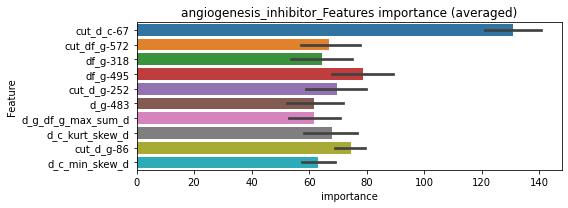

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000519705	valid_1's binary_logloss: 0.00822599
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 angiogenesis_inhibitor=================================


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000423369	valid_1's binary_logloss: 0.0120113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.000390713	valid_1's binary_logloss: 0.00800546


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 angiogenesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


angiogenesis_inhibitor logloss: 0.009537122693351822


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000521781	valid_1's binary_logloss: 0.00990449


angiotensin_receptor_antagonist, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000439489	valid_1's binary_logloss: 0.0259457
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000407841	valid_1's binary_logloss: 0.0256806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000458772	valid_1's binary_logloss: 0.00529557
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017565, Threshold: 0.0050485, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0050485, conf_0:0.00353, conf_1:0.00656
Num_p_label: 0.0, Expected: 6.2, Adj_threshold_1: 0.0350485


Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000557191	valid_1's binary_logloss: 0.0221567


threshold: 0.0350485, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000428577	valid_1's binary_logloss: 0.0239009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000422054	valid_1's binary_logloss: 0.0213176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000436296	valid_1's binary_logloss: 0.00554668
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0080139, Threshold: 0.0350485, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00155
Num_p_label: 5.0, Expected: 6.2, Threshold: 0.0350485, conf_0:0.02804, conf_1:0.04206


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000729737	valid_1's binary_logloss: 0.0203304


threshold: 0.0350485, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000428577	valid_1's binary_logloss: 0.0239009
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000422054	valid_1's binary_logloss: 0.0213176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000436296	valid_1's binary_logloss: 0.00554668
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0080139, Threshold: 0.0350485, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00155
Num_p_label: 5.0, Expected: 6.2, Threshold: 0.0350485, conf_0:0.03154, conf_1:0.03855


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000729737	valid_1's binary_logloss: 0.0203304


threshold: 0.0350485, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


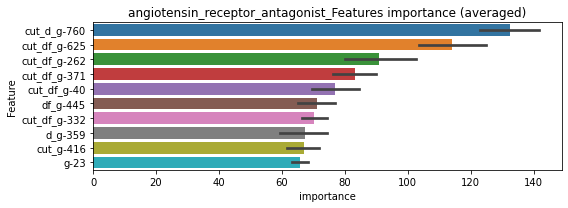

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 angiotensin_receptor_antagonist=================================


Early stopping, best iteration is:
[333]	training's binary_logloss: 0.000755753	valid_1's binary_logloss: 0.0218464
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 angiotensin_receptor_antagonist=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000464467	valid_1's binary_logloss: 0.0186756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[737]	training's binary_logloss: 0.00041283	valid_1's binary_logloss: 0.00503558


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 angiotensin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


angiotensin_receptor_antagonist logloss: 0.01666910312796949


Early stopping, best iteration is:
[279]	training's binary_logloss: 0.000929217	valid_1's binary_logloss: 0.0211018


anti-inflammatory, len(trt): 73, len(othr): 3275
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00178031	valid_1's binary_logloss: 0.0567625
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.00069705	valid_1's binary_logloss: 0.0308783
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00255848	valid_1's binary_logloss: 0.0487794
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0070002, Threshold: 0.1043484, pos_neg_ratio: 0.8000000
Remove_noisy_data: 139 → Positive_corect_labels: 651/3791
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.1043484, conf_0:0.07304, conf_1:0.13565
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_1: 0.1343484
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_2: 0.1643484


Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00169473	valid_1's binary_logloss: 0.0580528


Num_p_label: 16.0, Expected: 12.2, Adj_threshold_3: 0.1943484
threshold: 0.1943484, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 651.0/3791, y_label_rate: 0.1717225
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000931079	valid_1's binary_logloss: 0.036633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00322509	valid_1's binary_logloss: 0.0721592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000849018	valid_1's binary_logloss: 0.03423
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0197771, Threshold: 0.1943484, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00120081	valid_1's binary_logloss: 0.0454819


Remove_noisy_data: 28 → Positive_corect_labels: 637.0/3763
p_label_rate: 0.0200904 Vs.target_rate: 0.00307
Num_p_label: 80.0, Expected: 12.2, Threshold: 0.1943484, conf_0:0.15548, conf_1:0.23322
Num_p_label: 74.0, Expected: 12.2, Adj_threshold_1: 0.2243484
Num_p_label: 71.0, Expected: 12.2, Adj_threshold_2: 0.2543484
Num_p_label: 64.0, Expected: 12.2, Adj_threshold_3: 0.2843484
Num_p_label: 55.0, Expected: 12.2, Adj_threshold_4: 0.3143484
Num_p_label: 50.0, Expected: 12.2, Adj_threshold_5: 0.3443484
Num_p_label: 46.0, Expected: 12.2, Adj_threshold_6: 0.3743484
Num_p_label: 42.0, Expected: 12.2, Adj_threshold_7: 0.4043484
Num_p_label: 39.0, Expected: 12.2, Adj_threshold_8: 0.4343484
Num_p_label: 36.0, Expected: 12.2, Adj_threshold_9: 0.4643484
Num_p_label: 33.0, Expected: 12.2, Adj_threshold_10: 0.4943484
threshold: 0.4943484, positive_p_label: 33.0/3982, p_label_rate: 0.0082873
positive_y_label: 637.0/3763, y_label_rate: 0.1692798
================= Pseudo labeling 3 / 3 ===============

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00232269	valid_1's binary_logloss: 0.0381035
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00159527	valid_1's binary_logloss: 0.0298361
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00102625	valid_1's binary_logloss: 0.0426985
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0177509, Threshold: 0.4943484, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 629.0/3747
p_label_rate: 0.0125565 Vs.target_rate: 0.00307
Num_p_label: 50.0, Expected: 12.2, Threshold: 0.4943484, conf_0:0.44491, conf_1:0.54378
Num_p_label: 46.0, Expected: 12.2, Adj_threshold_1: 0.5243484


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000937936	valid_1's binary_logloss: 0.0348018


Num_p_label: 44.0, Expected: 12.2, Adj_threshold_2: 0.5543484
Num_p_label: 36.0, Expected: 12.2, Adj_threshold_3: 0.5843484
Num_p_label: 34.0, Expected: 12.2, Adj_threshold_4: 0.6143484
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_5: 0.6443484
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_6: 0.6743484
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_7: 0.7043484
Num_p_label: 24.0, Expected: 12.2, Adj_threshold_8: 0.7343484
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_9: 0.7643484
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_10: 0.7943484
threshold: 0.7943484, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 629.0/3747, y_label_rate: 0.1678676


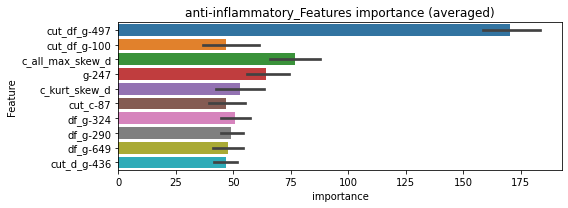

len(train_index) : 2810
len(valid_index) : 937
================================= fold 1/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2810
len(valid_index) : 937
================================= fold 2/4 anti-inflammatory=================================


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.0034479	valid_1's binary_logloss: 0.0452123
Training until validation scores don't improve for 30 rounds


len(train_index) : 2810
len(valid_index) : 937
================================= fold 3/4 anti-inflammatory=================================


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.0016638	valid_1's binary_logloss: 0.0264044
Training until validation scores don't improve for 30 rounds


len(train_index) : 2811
len(valid_index) : 936


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000721621	valid_1's binary_logloss: 0.0139533


================================= fold 4/4 anti-inflammatory=================================


Training until validation scores don't improve for 30 rounds


anti-inflammatory logloss: 0.033334471596474284
anti-inflammatory is unpredictable(><)!


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00169901	valid_1's binary_logloss: 0.0477834


antiarrhythmic, len(trt): 24, len(othr): 3283
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3283


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00034061	valid_1's binary_logloss: 0.0229311
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000363634	valid_1's binary_logloss: 0.0103205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000464116	valid_1's binary_logloss: 0.00644366
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012090, Threshold: 0.0025204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0025204, conf_0:0.00176, conf_1:0.00328
Num_p_label: 1.0, Expected: 4.0, Adj_threshold_1: 0.0325204


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000348062	valid_1's binary_logloss: 0.0115536


threshold: 0.0325204, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000335947	valid_1's binary_logloss: 0.0233603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000467494	valid_1's binary_logloss: 0.0100422
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.000451055	valid_1's binary_logloss: 0.00632327
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0044425, Threshold: 0.0325204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0325204, conf_0:0.02602, conf_1:0.03902
threshold: 0.0325204, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000444635	valid_1's binary_logloss: 0.0105396


positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.000444593	valid_1's binary_logloss: 0.0248528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000361125	valid_1's binary_logloss: 0.00905289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000326434	valid_1's binary_logloss: 0.0047594
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0054427, Threshold: 0.0325204, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3801
p_label_rate: 0.0010045 Vs.target_rate: 0.00101
Num_p_label: 4.0, Expected: 4.0, Threshold: 0.0325204, conf_0:0.02927, conf_1:0.03577


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000320696	valid_1's binary_logloss: 0.0116881


threshold: 0.0325204, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 653.0/3801, y_label_rate: 0.1717969


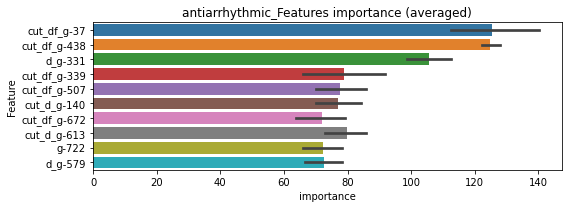

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 antiarrhythmic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 antiarrhythmic=================================


Early stopping, best iteration is:
[218]	training's binary_logloss: 0.000855869	valid_1's binary_logloss: 0.0146707
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 antiarrhythmic=================================


Early stopping, best iteration is:
[200]	training's binary_logloss: 0.000985645	valid_1's binary_logloss: 0.017539
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 4/4 antiarrhythmic=================================


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000422596	valid_1's binary_logloss: 0.00758899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000316549	valid_1's binary_logloss: 0.00127035


antiarrhythmic logloss: 0.010268410918442706
antibiotic, len(trt): 43, len(othr): 3284
target_rate: 0.0018057 → Adj_target_rate: 0.0020542


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.0005469	valid_1's binary_logloss: 0.0413538
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000493	valid_1's binary_logloss: 0.0158371
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000439073	valid_1's binary_logloss: 0.00191904
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021215, Threshold: 0.0288408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00181
Num_p_label: 40.0, Expected: 7.2, Threshold: 0.0288408, conf_0:0.02019, conf_1:0.03749
Num_p_label: 21.0, Expected: 7.2, Adj_threshold_1: 0.0588408


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000560351	valid_1's binary_logloss: 0.0335184


Num_p_label: 13.0, Expected: 7.2, Adj_threshold_2: 0.0888408
threshold: 0.0888408, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000551052	valid_1's binary_logloss: 0.0408688
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000551859	valid_1's binary_logloss: 0.0135741
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.00041939	valid_1's binary_logloss: 0.00172281
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000427266	valid_1's binary_logloss: 0.0306466


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092693, Threshold: 0.0888408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0080362 Vs.target_rate: 0.00181
Num_p_label: 32.0, Expected: 7.2, Threshold: 0.0888408, conf_0:0.07107, conf_1:0.10661
Num_p_label: 22.0, Expected: 7.2, Adj_threshold_1: 0.1188408
Num_p_label: 19.0, Expected: 7.2, Adj_threshold_2: 0.1488408
Num_p_label: 15.0, Expected: 7.2, Adj_threshold_3: 0.1788408
threshold: 0.1788408, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000455982	valid_1's binary_logloss: 0.0233232
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000530451	valid_1's binary_logloss: 0.014175
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000843901	valid_1's binary_logloss: 0.0187666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000452846	valid_1's binary_logloss: 0.0148252


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158106, Threshold: 0.1788408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0032647 Vs.target_rate: 0.00181
Num_p_label: 13.0, Expected: 7.2, Threshold: 0.1788408, conf_0:0.16096, conf_1:0.19672
threshold: 0.1788408, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


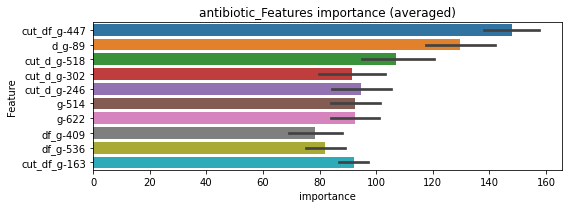

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 antibiotic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 antibiotic=================================


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.000948082	valid_1's binary_logloss: 0.0196478
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 antibiotic=================================


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000585558	valid_1's binary_logloss: 0.0142252
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 antibiotic=================================


Early stopping, best iteration is:
[289]	training's binary_logloss: 0.000950133	valid_1's binary_logloss: 0.0196739
Training until validation scores don't improve for 30 rounds


antibiotic logloss: 0.016934842333165875


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.00056137	valid_1's binary_logloss: 0.0141924


anticonvulsant, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000264351	valid_1's binary_logloss: 0.00384709
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000288111	valid_1's binary_logloss: 0.0110349
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00037987	valid_1's binary_logloss: 0.00430077
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008192, Threshold: 0.0022160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0022160, conf_0:0.00155, conf_1:0.00288
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0322160


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000285752	valid_1's binary_logloss: 0.00503051


threshold: 0.0322160, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000267934	valid_1's binary_logloss: 0.00351236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00026849	valid_1's binary_logloss: 0.00946465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000348101	valid_1's binary_logloss: 0.00377649
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0091723, Threshold: 0.0322160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0322160, conf_0:0.02577, conf_1:0.03866
threshold: 0.0322160, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000276668	valid_1's binary_logloss: 0.00461332


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000267934	valid_1's binary_logloss: 0.00351236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00026849	valid_1's binary_logloss: 0.00946465
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000348101	valid_1's binary_logloss: 0.00377649
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0091723, Threshold: 0.0322160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0322160, conf_0:0.02899, conf_1:0.03544
threshold: 0.0322160, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000276668	valid_1's binary_logloss: 0.00461332


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


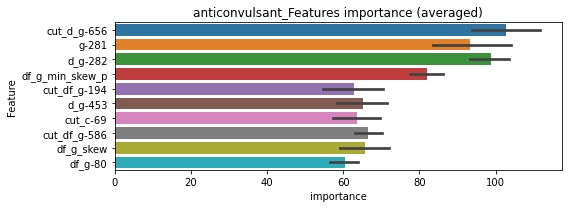

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000304791	valid_1's binary_logloss: 0.00350646


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 anticonvulsant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 anticonvulsant=================================


Early stopping, best iteration is:
[570]	training's binary_logloss: 0.000290746	valid_1's binary_logloss: 0.0071217
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 anticonvulsant=================================


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00053266	valid_1's binary_logloss: 0.00544153
Training until validation scores don't improve for 30 rounds


anticonvulsant logloss: 0.004892731007329557


Early stopping, best iteration is:
[718]	training's binary_logloss: 0.000264495	valid_1's binary_logloss: 0.00349989


antifungal, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000335566	valid_1's binary_logloss: 0.0137647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00058148	valid_1's binary_logloss: 0.00938468
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000515531	valid_1's binary_logloss: 0.00639378
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014893, Threshold: 0.0034895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0034895, conf_0:0.00244, conf_1:0.00454
Num_p_label: 0.0, Expected: 4.3, Adj_threshold_1: 0.0334895


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000353781	valid_1's binary_logloss: 0.0132431


threshold: 0.0334895, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00031755	valid_1's binary_logloss: 0.0142393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000523027	valid_1's binary_logloss: 0.00923181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000511635	valid_1's binary_logloss: 0.00668788
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0066370, Threshold: 0.0334895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0000000 Vs.target_rate: 0.00109
Num_p_label: 0.0, Expected: 4.3, Threshold: 0.0334895, conf_0:0.02679, conf_1:0.04019


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000363506	valid_1's binary_logloss: 0.0116014


threshold: 0.0334895, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00034563	valid_1's binary_logloss: 0.0171127
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000312627	valid_1's binary_logloss: 0.00363671
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000313001	valid_1's binary_logloss: 0.00548723
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0095830, Threshold: 0.0334895, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0000000 Vs.target_rate: 0.00109
Num_p_label: 0.0, Expected: 4.3, Threshold: 0.0334895, conf_0:0.03014, conf_1:0.03684


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000347716	valid_1's binary_logloss: 0.013791


threshold: 0.0334895, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


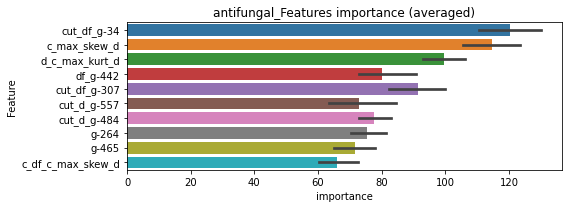

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 antifungal=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 antifungal=================================


Early stopping, best iteration is:
[245]	training's binary_logloss: 0.000797304	valid_1's binary_logloss: 0.0198373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000334817	valid_1's binary_logloss: 0.00277595


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 antifungal=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[754]	training's binary_logloss: 0.00032182	valid_1's binary_logloss: 0.00393571


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 antifungal=================================


Training until validation scores don't improve for 30 rounds


antifungal logloss: 0.009462321845709719


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00036018	valid_1's binary_logloss: 0.0112874


antihistamine, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000283645	valid_1's binary_logloss: 0.00149432
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.000971491	valid_1's binary_logloss: 0.018644
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000295789	valid_1's binary_logloss: 0.00203132
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015720, Threshold: 0.0311117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0311117, conf_0:0.02178, conf_1:0.04045
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_1: 0.0611117
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.0911117
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_3: 0.1211117
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.1511117
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.1811117
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.2111117
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_7: 0.2411117


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000292715	valid_1's binary_logloss: 0.0109721


threshold: 0.2411117, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000273047	valid_1's binary_logloss: 0.00136362
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00106736	valid_1's binary_logloss: 0.0177396
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000275262	valid_1's binary_logloss: 0.00131997
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0098009, Threshold: 0.2411117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0110497 Vs.target_rate: 0.00076
Num_p_label: 44.0, Expected: 3.0, Threshold: 0.2411117, conf_0:0.19289, conf_1:0.28933
Num_p_label: 44.0, Expected: 3.0, Adj_threshold_1: 0.2711117
Num_p_label: 43.0, Expected: 3.0, Adj_threshold_2: 0.3011117
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.3311117
Num_p_label: 40.0, Expected: 3.0, Adj_threshold_4: 0.3611117
Num_p_label: 38.0, Expected: 3.0, Adj_threshold_5: 0.3911117
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_6: 0.4211117
Num_p_label: 35.0, Expected: 3.0, Adj_threshold_7: 0.4511117
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_8: 0.4811117
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_9: 0.5111117
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_10: 0.5411117


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000295922	valid_1's binary_logloss: 0.0104748


threshold: 0.5411117, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000285695	valid_1's binary_logloss: 0.00971406
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000342939	valid_1's binary_logloss: 0.00208776
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000264525	valid_1's binary_logloss: 0.00337389
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0198386, Threshold: 0.5411117, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0085384 Vs.target_rate: 0.00076
Num_p_label: 34.0, Expected: 3.0, Threshold: 0.5411117, conf_0:0.48700, conf_1:0.59522
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_1: 0.5711117
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_2: 0.6011117
Num_p_label: 29.0, Expected: 3.0, Adj_threshold_3: 0.6311117
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_4: 0.6611117
Num_p_label: 28.0, Expected: 3.0, Adj_threshold_5: 0.6911117
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_6: 0.7211117


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000307718	valid_1's binary_logloss: 0.00373032


Num_p_label: 24.0, Expected: 3.0, Adj_threshold_7: 0.7511117
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_8: 0.7811117
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_9: 0.8111117
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_10: 0.8411117
threshold: 0.8411117, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


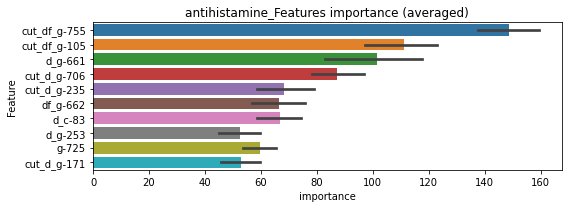

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 antihistamine=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 antihistamine=================================


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000281314	valid_1's binary_logloss: 0.00711537
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 antihistamine=================================


Early stopping, best iteration is:
[359]	training's binary_logloss: 0.000422346	valid_1's binary_logloss: 0.00302909
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 antihistamine=================================


Early stopping, best iteration is:
[691]	training's binary_logloss: 0.000277215	valid_1's binary_logloss: 0.0022843
Training until validation scores don't improve for 30 rounds


antihistamine logloss: 0.003938662838231686


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000302511	valid_1's binary_logloss: 0.00332255


antimalarial, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:518
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000337851	valid_1's binary_logloss: 0.00365711
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.0031231	valid_1's binary_logloss: 0.0273474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000276514	valid_1's binary_logloss: 0.000581964
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0033625, Threshold: 0.0067865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0067865, conf_0:0.00475, conf_1:0.00882
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0367865


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000362147	valid_1's binary_logloss: 0.00578065


threshold: 0.0367865, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000281298	valid_1's binary_logloss: 0.00224214
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00310596	valid_1's binary_logloss: 0.0253324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00026218	valid_1's binary_logloss: 0.000433836
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0293035, Threshold: 0.0367865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0097941 Vs.target_rate: 0.00076
Num_p_label: 39.0, Expected: 3.0, Threshold: 0.0367865, conf_0:0.02943, conf_1:0.04414
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_1: 0.0667865
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.0967865
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_3: 0.1267865
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_4: 0.1567865
threshold: 0.1567865, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000358863	valid_1's binary_logloss: 0.004767


positive_y_label: 654.0/3806, y_label_rate: 0.1718339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000270559	valid_1's binary_logloss: 0.011758
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000250336	valid_1's binary_logloss: 0.000455476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000250418	valid_1's binary_logloss: 0.00160979
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0098921, Threshold: 0.1567865, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3804
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.1567865, conf_0:0.14111, conf_1:0.17247
threshold: 0.1567865, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000317848	valid_1's binary_logloss: 0.00491143


positive_y_label: 653.0/3804, y_label_rate: 0.1716614


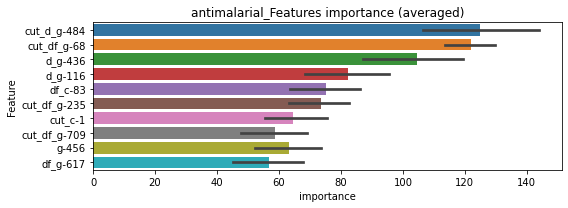

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 antimalarial=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 antimalarial=================================


Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000274193	valid_1's binary_logloss: 0.00411477
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 antimalarial=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000322314	valid_1's binary_logloss: 0.00604138
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 antimalarial=================================


Early stopping, best iteration is:
[607]	training's binary_logloss: 0.000266392	valid_1's binary_logloss: 0.00353756
Training until validation scores don't improve for 30 rounds


antimalarial logloss: 0.0035121762978395045


Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000259701	valid_1's binary_logloss: 0.000354993


antioxidant, len(trt): 73, len(othr): 3282
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00263132	valid_1's binary_logloss: 0.0662808
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00119733	valid_1's binary_logloss: 0.0461096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00126034	valid_1's binary_logloss: 0.0280804
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000761286	valid_1's binary_logloss: 0.0561409


1 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0059431, Threshold: 0.0258261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0258261, conf_0:0.01808, conf_1:0.03357
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_1: 0.0558261
threshold: 0.0558261, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 652.0/3798, y_label_rate: 0.1716693
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00201595	valid_1's binary_logloss: 0.0455198
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00138945	valid_1's binary_logloss: 0.0508237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00133629	valid_1's binary_logloss: 0.0387381
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0169980, Threshold: 0.0558261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 644.0/3782
p_label_rate: 0.0102963 Vs.target_rate: 0.00307
Num_p_label: 41.0, Expected: 12.2, Threshold: 0.0558261, conf_0:0.04466, conf_1:0.06699
Num_p_label: 32.0, Expected: 12.2, Adj_threshold_1: 0.0858261
Num_p_label: 21.0, Expected: 12.2, Adj_threshold_2: 0.1158261
Num_p_label: 17.0, Expected: 12.2, Adj_threshold_3: 0.1458261
threshold: 0.1458261, positive_p_label: 17.0/3982, p_label_rate: 0.0042692


Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00220185	valid_1's binary_logloss: 0.0503243


positive_y_label: 644.0/3782, y_label_rate: 0.1702803
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00261634	valid_1's binary_logloss: 0.0602454
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00105953	valid_1's binary_logloss: 0.0358084
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.00064578	valid_1's binary_logloss: 0.0214267
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0170871, Threshold: 0.1458261, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 636.0/3766
p_label_rate: 0.0037670 Vs.target_rate: 0.00307
Num_p_label: 15.0, Expected: 12.2, Threshold: 0.1458261, conf_0:0.13124, conf_1:0.16041
threshold: 0.1458261, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[329]	training's binary_logloss: 0.0021132	valid_1's binary_logloss: 0.0462089


positive_y_label: 636.0/3766, y_label_rate: 0.1688794


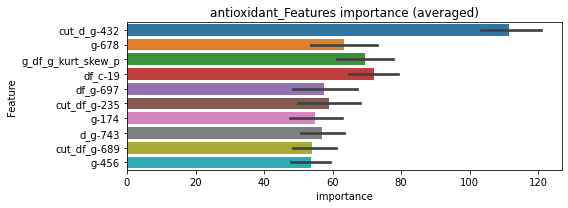

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 antioxidant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 antioxidant=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00102317	valid_1's binary_logloss: 0.0357367
Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 antioxidant=================================


Early stopping, best iteration is:
[278]	training's binary_logloss: 0.00142501	valid_1's binary_logloss: 0.0325545
Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 antioxidant=================================


Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00164069	valid_1's binary_logloss: 0.0328825
Training until validation scores don't improve for 30 rounds


antioxidant logloss: 0.03167668450463103
antioxidant is unpredictable(><)!


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00106146	valid_1's binary_logloss: 0.0255278


antiprotozoal, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000552089	valid_1's binary_logloss: 0.0258939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000629461	valid_1's binary_logloss: 0.0182193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000389595	valid_1's binary_logloss: 0.00347957
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0023915, Threshold: 0.0060267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0060267, conf_0:0.00422, conf_1:0.00783
Num_p_label: 2.0, Expected: 6.0, Adj_threshold_1: 0.0360267
threshold: 0.0360267, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[347]	training's binary_logloss: 0.000979569	valid_1's binary_logloss: 0.0281316


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000531624	valid_1's binary_logloss: 0.0210015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000392634	valid_1's binary_logloss: 0.015337
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[554]	training's binary_logloss: 0.000403643	valid_1's binary_logloss: 0.0031867
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0082217, Threshold: 0.0360267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0015068 Vs.target_rate: 0.00151
Num_p_label: 6.0, Expected: 6.0, Threshold: 0.0360267, conf_0:0.02882, conf_1:0.04323


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.000571946	valid_1's binary_logloss: 0.0297825


threshold: 0.0360267, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000452989	valid_1's binary_logloss: 0.0231966
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000446564	valid_1's binary_logloss: 0.011618
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000451035	valid_1's binary_logloss: 0.0134114
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0119698, Threshold: 0.0360267, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0017579 Vs.target_rate: 0.00151
Num_p_label: 7.0, Expected: 6.0, Threshold: 0.0360267, conf_0:0.03242, conf_1:0.03963
threshold: 0.0360267, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000610445	valid_1's binary_logloss: 0.0166165


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


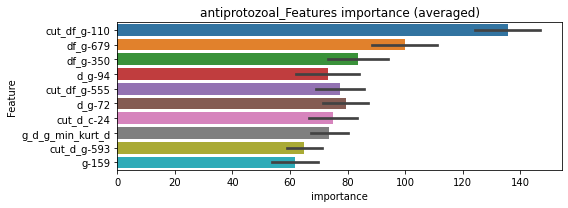

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiprotozoal=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiprotozoal=================================


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000563817	valid_1's binary_logloss: 0.022854
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiprotozoal=================================


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000491706	valid_1's binary_logloss: 0.0126353
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiprotozoal=================================


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000578293	valid_1's binary_logloss: 0.0140922
Training until validation scores don't improve for 30 rounds


antiprotozoal logloss: 0.017149855423927947


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00097617	valid_1's binary_logloss: 0.0190167


antiviral, len(trt): 23, len(othr): 3284
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.000568641	valid_1's binary_logloss: 0.0177109
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000292757	valid_1's binary_logloss: 0.00780103
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000300812	valid_1's binary_logloss: 0.00109438
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012177, Threshold: 0.0022364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0022364, conf_0:0.00157, conf_1:0.00291


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000293831	valid_1's binary_logloss: 0.00646168


Num_p_label: 0.0, Expected: 3.8, Adj_threshold_1: 0.0322364
threshold: 0.0322364, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000303475	valid_1's binary_logloss: 0.0159847
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000324158	valid_1's binary_logloss: 0.00614318
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000277674	valid_1's binary_logloss: 0.000858763
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000279823	valid_1's binary_logloss: 0.00484157


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113116, Threshold: 0.0322364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0002511 Vs.target_rate: 0.00097
Num_p_label: 1.0, Expected: 3.8, Threshold: 0.0322364, conf_0:0.02579, conf_1:0.03868
threshold: 0.0322364, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000325673	valid_1's binary_logloss: 0.012882
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000277494	valid_1's binary_logloss: 0.0013222
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000283821	valid_1's binary_logloss: 0.00310392
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138236, Threshold: 0.0322364, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0002511 Vs.target_rate: 0.00097
Num_p_label: 1.0, Expected: 3.8, Threshold: 0.0322364, conf_0:0.02901, conf_1:0.03546
threshold: 0.0322364, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000290235	valid_1's binary_logloss: 0.00612185


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


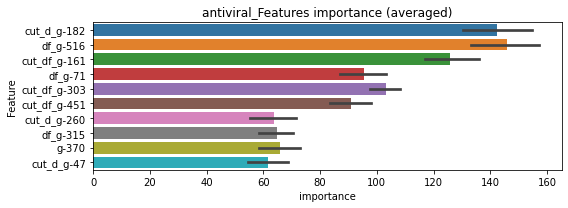

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 antiviral=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 antiviral=================================


Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000319457	valid_1's binary_logloss: 0.00995482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[785]	training's binary_logloss: 0.00028581	valid_1's binary_logloss: 0.00108179


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 antiviral=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 antiviral=================================


Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000299028	valid_1's binary_logloss: 0.00266063
Training until validation scores don't improve for 30 rounds


antiviral logloss: 0.004819846406781327


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000390608	valid_1's binary_logloss: 0.00558024


apoptosis_stimulant, len(trt): 49, len(othr): 3284
target_rate: 0.0020576 → Adj_target_rate: 0.0022954


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00250035	valid_1's binary_logloss: 0.0508411
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000690724	valid_1's binary_logloss: 0.0258015
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[646]	training's binary_logloss: 0.000446887	valid_1's binary_logloss: 0.00664738
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0042185, Threshold: 0.0231434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00206
Num_p_label: 40.0, Expected: 8.2, Threshold: 0.0231434, conf_0:0.01620, conf_1:0.03009
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_1: 0.0531434


Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000983983	valid_1's binary_logloss: 0.0404977


threshold: 0.0531434, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000862026	valid_1's binary_logloss: 0.0422722
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000603424	valid_1's binary_logloss: 0.026066
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000608338	valid_1's binary_logloss: 0.0197838
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0111549, Threshold: 0.0531434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0115520 Vs.target_rate: 0.00206
Num_p_label: 46.0, Expected: 8.2, Threshold: 0.0531434, conf_0:0.04251, conf_1:0.06377
Num_p_label: 37.0, Expected: 8.2, Adj_threshold_1: 0.0831434


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000776045	valid_1's binary_logloss: 0.0344294


Num_p_label: 29.0, Expected: 8.2, Adj_threshold_2: 0.1131434
Num_p_label: 26.0, Expected: 8.2, Adj_threshold_3: 0.1431434
Num_p_label: 21.0, Expected: 8.2, Adj_threshold_4: 0.1731434
Num_p_label: 20.0, Expected: 8.2, Adj_threshold_5: 0.2031434
threshold: 0.2031434, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000548379	valid_1's binary_logloss: 0.0298175
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00239022	valid_1's binary_logloss: 0.0358341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000558322	valid_1's binary_logloss: 0.0137101
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0227248, Threshold: 0.2031434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0045203 Vs.target_rate: 0.00206
Num_p_label: 18.0, Expected: 8.2, Threshold: 0.2031434, conf_0:0.18283, conf_1:0.22346
threshold: 0.2031434, positive_p_label: 18.0/3982, p_label_rate: 0.0045203


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000774459	valid_1's binary_logloss: 0.0220411


positive_y_label: 648.0/3792, y_label_rate: 0.1708861


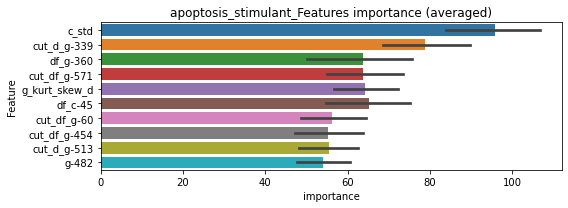

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 apoptosis_stimulant=================================


Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00123735	valid_1's binary_logloss: 0.0240601
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000793556	valid_1's binary_logloss: 0.0294413


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000537402	valid_1's binary_logloss: 0.0143245


================================= fold 4/4 apoptosis_stimulant=================================


Training until validation scores don't improve for 30 rounds


apoptosis_stimulant logloss: 0.020839340635727198


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000593024	valid_1's binary_logloss: 0.0155314


aromatase_inhibitor, len(trt): 47, len(othr): 3285
target_rate: 0.0019736 → Adj_target_rate: 0.0022155


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[316]	training's binary_logloss: 0.00147838	valid_1's binary_logloss: 0.0419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00123502	valid_1's binary_logloss: 0.0424724
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000544948	valid_1's binary_logloss: 0.0122934
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00048076	valid_1's binary_logloss: 0.0208994


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0033404, Threshold: 0.0065612, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00197
Num_p_label: 40.0, Expected: 7.9, Threshold: 0.0065612, conf_0:0.00459, conf_1:0.00853
Num_p_label: 1.0, Expected: 7.9, Adj_threshold_1: 0.0365612
threshold: 0.0365612, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000526257	valid_1's binary_logloss: 0.0298913
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000652796	valid_1's binary_logloss: 0.0255851
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000608029	valid_1's binary_logloss: 0.0208842
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000475837	valid_1's binary_logloss: 0.0203087


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0095012, Threshold: 0.0365612, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0002511 Vs.target_rate: 0.00197
Num_p_label: 1.0, Expected: 7.9, Threshold: 0.0365612, conf_0:0.02925, conf_1:0.04387
threshold: 0.0365612, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000508789	valid_1's binary_logloss: 0.0146564
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00123725	valid_1's binary_logloss: 0.0349028
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000832431	valid_1's binary_logloss: 0.0107425
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0096537, Threshold: 0.0365612, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 651.0/3798
p_label_rate: 0.0007534 Vs.target_rate: 0.00197
Num_p_label: 3.0, Expected: 7.9, Threshold: 0.0365612, conf_0:0.03291, conf_1:0.04022


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000524862	valid_1's binary_logloss: 0.0248038


threshold: 0.0365612, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 651.0/3798, y_label_rate: 0.1714060


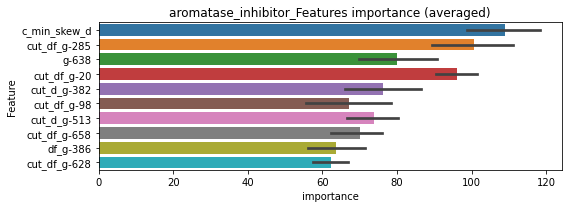

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000631583	valid_1's binary_logloss: 0.0248219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.000907693	valid_1's binary_logloss: 0.035048


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 aromatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 aromatase_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000641519	valid_1's binary_logloss: 0.00763403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000810505	valid_1's binary_logloss: 0.0130854


aromatase_inhibitor logloss: 0.0201525122629348
atm_kinase_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00013809	valid_1's binary_logloss: 0.000307122
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00051886	valid_1's binary_logloss: 0.00751035
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000140937	valid_1's binary_logloss: 0.000141042
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005842, Threshold: 0.0009855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0009855, conf_0:0.00069, conf_1:0.00128
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0309855
threshold: 0.0309855, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000139131	valid_1's binary_logloss: 0.000756804


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00013987	valid_1's binary_logloss: 0.000311434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.000537666	valid_1's binary_logloss: 0.0074476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000141166	valid_1's binary_logloss: 0.000131519
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0093008, Threshold: 0.0309855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0007534 Vs.target_rate: 0.00025
Num_p_label: 3.0, Expected: 1.0, Threshold: 0.0309855, conf_0:0.02479, conf_1:0.03718
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0609855
threshold: 0.0609855, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000159135	valid_1's binary_logloss: 0.000979548


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.00013987	valid_1's binary_logloss: 0.000311434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[245]	training's binary_logloss: 0.000537666	valid_1's binary_logloss: 0.0074476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000141166	valid_1's binary_logloss: 0.000131519
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0093008, Threshold: 0.0609855, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0609855, conf_0:0.05489, conf_1:0.06708


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000159135	valid_1's binary_logloss: 0.000979548


threshold: 0.0609855, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


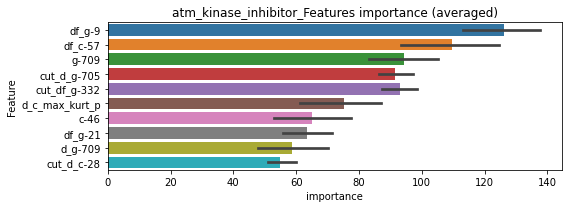

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000139307	valid_1's binary_logloss: 0.000379926


len(train_index) : 2859
len(valid_index) : 953


Early stopping, best iteration is:
[1065]	training's binary_logloss: 0.000138131	valid_1's binary_logloss: 0.00037869


================================= fold 2/4 atm_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[148]	training's binary_logloss: 0.000629924	valid_1's binary_logloss: 0.00668678
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000140371	valid_1's binary_logloss: 0.000128203


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atm_kinase_inhibitor=================================


Early stopping, best iteration is:
[1081]	training's binary_logloss: 0.000139179	valid_1's binary_logloss: 0.000126885
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000139356	valid_1's binary_logloss: 0.00044746


atm_kinase_inhibitor logloss: 0.0019097666994133886


Early stopping, best iteration is:
[1064]	training's binary_logloss: 0.000138165	valid_1's binary_logloss: 0.000446551


atp-sensitive_potassium_channel_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000159976	valid_1's binary_logloss: 0.00056633
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000159065	valid_1's binary_logloss: 0.00683811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000165185	valid_1's binary_logloss: 0.000194356
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005419, Threshold: 0.0023776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0023776, conf_0:0.00166, conf_1:0.00309
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0323776
threshold: 0.0323776, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000162094	valid_1's binary_logloss: 0.000495439


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000151692	valid_1's binary_logloss: 0.000193414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.000391598	valid_1's binary_logloss: 0.00536655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000152051	valid_1's binary_logloss: 0.000165731
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138043, Threshold: 0.0323776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0060271 Vs.target_rate: 0.00029
Num_p_label: 24.0, Expected: 1.2, Threshold: 0.0323776, conf_0:0.02590, conf_1:0.03885
Num_p_label: 15.0, Expected: 1.2, Adj_threshold_1: 0.0623776
Num_p_label: 9.0, Expected: 1.2, Adj_threshold_2: 0.0923776
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_3: 0.1223776
Num_p_label: 8.0, Expected: 1.2, Adj_threshold_4: 0.1523776
Num_p_label: 7.0, Expected: 1.2, Adj_threshold_5: 0.1823776
Num_p_label: 6.0, Expected: 1.2, Adj_threshold_6: 0.2123776
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_7: 0.2423776
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_8: 0.2723776
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_9: 0.3023776


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000150526	valid_1's binary_logloss: 0.000354476


threshold: 0.3023776, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000151692	valid_1's binary_logloss: 0.000193414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.000391598	valid_1's binary_logloss: 0.00536655
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000152051	valid_1's binary_logloss: 0.000165731
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0138043, Threshold: 0.3023776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.3023776, conf_0:0.27214, conf_1:0.33262
threshold: 0.3023776, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000150526	valid_1's binary_logloss: 0.000354476


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


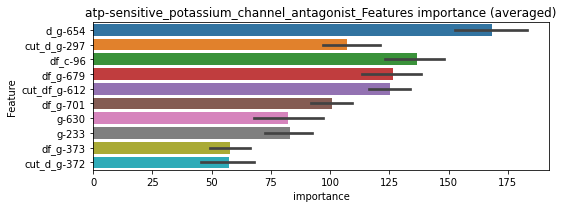

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[969]	training's binary_logloss: 0.000153685	valid_1's binary_logloss: 0.000207523


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 atp-sensitive_potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000164885	valid_1's binary_logloss: 0.00408269
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 atp-sensitive_potassium_channel_antagonist=================================


Early stopping, best iteration is:
[858]	training's binary_logloss: 0.000156805	valid_1's binary_logloss: 0.000163005
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000150897	valid_1's binary_logloss: 0.000438464
Early stopping, best iteration is:
[997]	training's binary_logloss: 0.000150897	valid_1's binary_logloss: 0.000438464


atp-sensitive_potassium_channel_antagonist logloss: 0.0012226550041767206
atp_synthase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.000279911	valid_1's binary_logloss: 0.00397111
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000228069	valid_1's binary_logloss: 0.00234374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000227718	valid_1's binary_logloss: 0.000349287
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008926, Threshold: 0.0093380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0093380, conf_0:0.00654, conf_1:0.01214
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_1: 0.0393380
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0693380
threshold: 0.0693380, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000240851	valid_1's binary_logloss: 0.00939916


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.00299961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000215679	valid_1's binary_logloss: 0.00137405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000222583	valid_1's binary_logloss: 0.000247927
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0131543, Threshold: 0.0693380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0062783 Vs.target_rate: 0.00050
Num_p_label: 25.0, Expected: 2.0, Threshold: 0.0693380, conf_0:0.05547, conf_1:0.08321
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_1: 0.0993380
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_2: 0.1293380
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_3: 0.1593380
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_4: 0.1893380
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_5: 0.2193380
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_6: 0.2493380


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000219748	valid_1's binary_logloss: 0.00750493


Num_p_label: 11.0, Expected: 2.0, Adj_threshold_7: 0.2793380
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_8: 0.3093380
Num_p_label: 9.0, Expected: 2.0, Adj_threshold_9: 0.3393380
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_10: 0.3693380
threshold: 0.3693380, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000236462	valid_1's binary_logloss: 0.00299961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000215679	valid_1's binary_logloss: 0.00137405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000222583	valid_1's binary_logloss: 0.000247927
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0131543, Threshold: 0.3693380, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00050
Num_p_label: 7.0, Expected: 2.0, Threshold: 0.3693380, conf_0:0.33240, conf_1:0.40627
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.3993380
Num_p_label: 3.0, Expected: 2.0, Adj_threshold_2: 0.4293380


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000219748	valid_1's binary_logloss: 0.00750493


threshold: 0.4293380, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


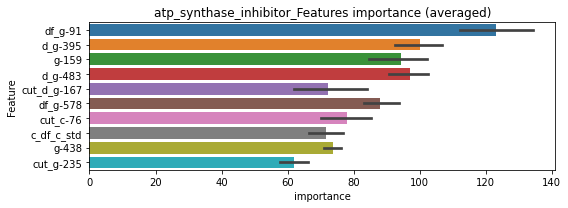

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 atp_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[690]	training's binary_logloss: 0.000229537	valid_1's binary_logloss: 0.00197913
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000226121	valid_1's binary_logloss: 0.00114054
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 atp_synthase_inhibitor=================================


Early stopping, best iteration is:
[699]	training's binary_logloss: 0.000232816	valid_1's binary_logloss: 0.000263193
Training until validation scores don't improve for 30 rounds


atp_synthase_inhibitor logloss: 0.002388835406343892


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000269586	valid_1's binary_logloss: 0.0061693


atpase_inhibitor, len(trt): 97, len(othr): 3274
target_rate: 0.0040732 → Adj_target_rate: 0.0041016


selected negative label: 3274


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00382021	valid_1's binary_logloss: 0.100369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00306144	valid_1's binary_logloss: 0.0768166
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.00134277	valid_1's binary_logloss: 0.0534842
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00141668	valid_1's binary_logloss: 0.0640335


1 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0086134, Threshold: 0.0222434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 647/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00407
Num_p_label: 40.0, Expected: 16.2, Threshold: 0.0222434, conf_0:0.01557, conf_1:0.02892
Num_p_label: 6.0, Expected: 16.2, Adj_threshold_1: 0.0522434
threshold: 0.0522434, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 647.0/3782, y_label_rate: 0.1710735
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00213054	valid_1's binary_logloss: 0.0710712
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00337474	valid_1's binary_logloss: 0.0745535
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00434554	valid_1's binary_logloss: 0.0692111
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00102456	valid_1's binary_logloss: 0.0503063


2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0220461, Threshold: 0.0522434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 633.0/3754
p_label_rate: 0.0010045 Vs.target_rate: 0.00407
Num_p_label: 4.0, Expected: 16.2, Threshold: 0.0522434, conf_0:0.04179, conf_1:0.06269
threshold: 0.0522434, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 633.0/3754, y_label_rate: 0.1686201
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00552671	valid_1's binary_logloss: 0.0712024
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00212227	valid_1's binary_logloss: 0.0593217
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00195726	valid_1's binary_logloss: 0.0557956
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00122988	valid_1's binary_logloss: 0.0532955


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0203532, Threshold: 0.0522434, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 622.0/3732
p_label_rate: 0.0030136 Vs.target_rate: 0.00407
Num_p_label: 12.0, Expected: 16.2, Threshold: 0.0522434, conf_0:0.04702, conf_1:0.05747
threshold: 0.0522434, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 622.0/3732, y_label_rate: 0.1666667


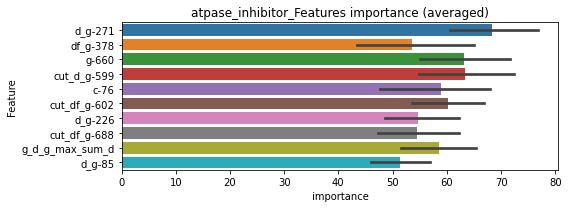

len(train_index) : 2799
len(valid_index) : 933
================================= fold 1/4 atpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2799
len(valid_index) : 933
================================= fold 2/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00341459	valid_1's binary_logloss: 0.0624718
Training until validation scores don't improve for 30 rounds


len(train_index) : 2799
len(valid_index) : 933
================================= fold 3/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[148]	training's binary_logloss: 0.0047562	valid_1's binary_logloss: 0.063746
Training until validation scores don't improve for 30 rounds


len(train_index) : 2799
len(valid_index) : 933
================================= fold 4/4 atpase_inhibitor=================================


Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00188194	valid_1's binary_logloss: 0.0371664
Training until validation scores don't improve for 30 rounds


atpase_inhibitor logloss: 0.05536926846617084
atpase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00239259	valid_1's binary_logloss: 0.0580929


atr_kinase_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000329948	valid_1's binary_logloss: 0.0102372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000411416	valid_1's binary_logloss: 0.0184179
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000286061	valid_1's binary_logloss: 0.000495778
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008976, Threshold: 0.0023732, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0023732, conf_0:0.00166, conf_1:0.00309
Num_p_label: 3.0, Expected: 3.2, Adj_threshold_1: 0.0323732


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000308504	valid_1's binary_logloss: 0.00975454


threshold: 0.0323732, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000324655	valid_1's binary_logloss: 0.00889834
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00041037	valid_1's binary_logloss: 0.0169048
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000288539	valid_1's binary_logloss: 0.000432614
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077646, Threshold: 0.0323732, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0052737 Vs.target_rate: 0.00080
Num_p_label: 21.0, Expected: 3.2, Threshold: 0.0323732, conf_0:0.02590, conf_1:0.03885
Num_p_label: 13.0, Expected: 3.2, Adj_threshold_1: 0.0623732
Num_p_label: 12.0, Expected: 3.2, Adj_threshold_2: 0.0923732
Num_p_label: 7.0, Expected: 3.2, Adj_threshold_3: 0.1223732


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000323801	valid_1's binary_logloss: 0.00854675


threshold: 0.1223732, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.00028081	valid_1's binary_logloss: 0.00884577
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000279465	valid_1's binary_logloss: 0.00901262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000288592	valid_1's binary_logloss: 0.000325818
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077661, Threshold: 0.1223732, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00080
Num_p_label: 10.0, Expected: 3.2, Threshold: 0.1223732, conf_0:0.11014, conf_1:0.13461
Num_p_label: 8.0, Expected: 3.2, Adj_threshold_1: 0.1523732
Num_p_label: 6.0, Expected: 3.2, Adj_threshold_2: 0.1823732
threshold: 0.1823732, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[301]	training's binary_logloss: 0.000648321	valid_1's binary_logloss: 0.0131744


positive_y_label: 655.0/3807, y_label_rate: 0.1720515


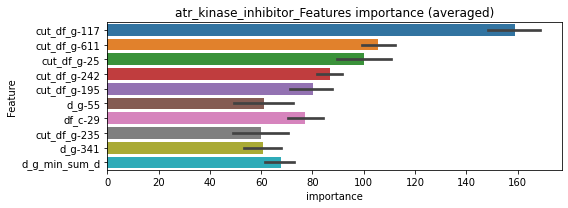

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855


Early stopping, best iteration is:
[614]	training's binary_logloss: 0.000292654	valid_1's binary_logloss: 0.0104598


len(valid_index) : 952
================================= fold 2/4 atr_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[664]	training's binary_logloss: 0.0002963	valid_1's binary_logloss: 0.00176938
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 atr_kinase_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000376827	valid_1's binary_logloss: 0.00552831
Training until validation scores don't improve for 30 rounds


atr_kinase_inhibitor logloss: 0.00501447238029738


Early stopping, best iteration is:
[658]	training's binary_logloss: 0.000300261	valid_1's binary_logloss: 0.00229758


aurora_kinase_inhibitor, len(trt): 96, len(othr): 3276
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00386433	valid_1's binary_logloss: 0.0872884
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.00168642	valid_1's binary_logloss: 0.0588219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00310373	valid_1's binary_logloss: 0.0558861
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.996, PR-AUC:0.991
y_Threshold: 0.0123432, Threshold: 0.0791280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 644/3777
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0791280, conf_0:0.05539, conf_1:0.10287
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_1: 0.1091280
Num_p_label: 15.0, Expected: 16.1, Adj_threshold_2: 0.1391280


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00493114	valid_1's binary_logloss: 0.0701304


threshold: 0.1391280, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3777, y_label_rate: 0.1705057
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00180453	valid_1's binary_logloss: 0.0582229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00304136	valid_1's binary_logloss: 0.0692956
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[650]	training's binary_logloss: 0.000747579	valid_1's binary_logloss: 0.0404493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00116508	valid_1's binary_logloss: 0.0474526


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0259921, Threshold: 0.1391280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 632.0/3753
p_label_rate: 0.0153189 Vs.target_rate: 0.00403
Num_p_label: 61.0, Expected: 16.1, Threshold: 0.1391280, conf_0:0.11130, conf_1:0.16695
Num_p_label: 50.0, Expected: 16.1, Adj_threshold_1: 0.1691280
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_2: 0.1991280
Num_p_label: 42.0, Expected: 16.1, Adj_threshold_3: 0.2291280
Num_p_label: 34.0, Expected: 16.1, Adj_threshold_4: 0.2591280
Num_p_label: 29.0, Expected: 16.1, Adj_threshold_5: 0.2891280
Num_p_label: 24.0, Expected: 16.1, Adj_threshold_6: 0.3191280
threshold: 0.3191280, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 632.0/3753, y_label_rate: 0.1683986
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00252266	valid_1's binary_logloss: 0.0676675
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00137047	valid_1's binary_logloss: 0.043921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000717736	valid_1's binary_logloss: 0.0303815
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0276215, Threshold: 0.3191280, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 625.0/3739
p_label_rate: 0.0050226 Vs.target_rate: 0.00403
Num_p_label: 20.0, Expected: 16.1, Threshold: 0.3191280, conf_0:0.28722, conf_1:0.35104
threshold: 0.3191280, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00288184	valid_1's binary_logloss: 0.0560899


positive_y_label: 625.0/3739, y_label_rate: 0.1671570


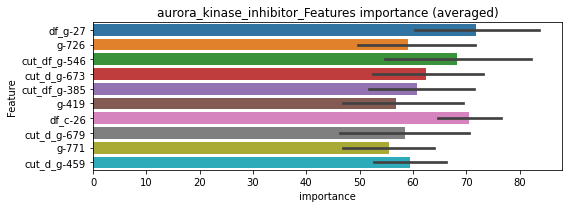

len(train_index) : 2804
len(valid_index) : 935
================================= fold 1/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 935


Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00138699	valid_1's binary_logloss: 0.0518309


================================= fold 2/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2804
len(valid_index) : 935
================================= fold 3/4 aurora_kinase_inhibitor=================================


Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00227334	valid_1's binary_logloss: 0.0528367
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000943139	valid_1's binary_logloss: 0.0258601


len(train_index) : 2805
len(valid_index) : 934
================================= fold 4/4 aurora_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


aurora_kinase_inhibitor logloss: 0.04893204513795281
aurora_kinase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00234511	valid_1's binary_logloss: 0.0652179


autotaxin_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000142899	valid_1's binary_logloss: 0.000746271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000139848	valid_1's binary_logloss: 0.000397164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000140053	valid_1's binary_logloss: 0.000287196
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003880, Threshold: 0.0022016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0022016, conf_0:0.00154, conf_1:0.00286
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0322016
threshold: 0.0322016, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000173307	valid_1's binary_logloss: 0.00210244


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000131392	valid_1's binary_logloss: 0.000889559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000130467	valid_1's binary_logloss: 0.000447253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000134069	valid_1's binary_logloss: 0.000145543
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0338092, Threshold: 0.0322016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00025
Num_p_label: 15.0, Expected: 1.0, Threshold: 0.0322016, conf_0:0.02576, conf_1:0.03864
Num_p_label: 10.0, Expected: 1.0, Adj_threshold_1: 0.0622016
Num_p_label: 7.0, Expected: 1.0, Adj_threshold_2: 0.0922016
Num_p_label: 5.0, Expected: 1.0, Adj_threshold_3: 0.1222016
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_4: 0.1522016
threshold: 0.1522016, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000131625	valid_1's binary_logloss: 0.00193555


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000131392	valid_1's binary_logloss: 0.000889559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000130467	valid_1's binary_logloss: 0.000447253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000134069	valid_1's binary_logloss: 0.000145543
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0338092, Threshold: 0.1522016, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.1522016, conf_0:0.13698, conf_1:0.16742
threshold: 0.1522016, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000131625	valid_1's binary_logloss: 0.00193555


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


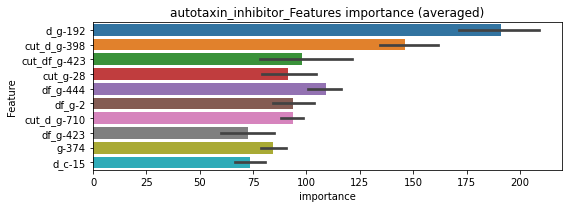

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000136371	valid_1's binary_logloss: 0.000576991


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 autotaxin_inhibitor=================================


Early stopping, best iteration is:
[1137]	training's binary_logloss: 0.000134402	valid_1's binary_logloss: 0.000575107
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000135547	valid_1's binary_logloss: 0.000299665
Early stopping, best iteration is:
[1189]	training's binary_logloss: 0.000132817	valid_1's binary_logloss: 0.000297016


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000138629	valid_1's binary_logloss: 0.000150435
Early stopping, best iteration is:
[1048]	training's binary_logloss: 0.000138174	valid_1's binary_logloss: 0.000149928


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 autotaxin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


autotaxin_inhibitor logloss: 0.0007731508350404216


Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000155814	valid_1's binary_logloss: 0.00207075


bacterial_30s_ribosomal_subunit_inhibitor, len(trt): 60, len(othr): 3282
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3282


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[271]	training's binary_logloss: 0.00287833	valid_1's binary_logloss: 0.0633393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00097482	valid_1's binary_logloss: 0.0460292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[683]	training's binary_logloss: 0.00049433	valid_1's binary_logloss: 0.00428891
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.00105471	valid_1's binary_logloss: 0.0408766


y_Threshold: 0.0053951, Threshold: 0.0116986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0116986, conf_0:0.00819, conf_1:0.01521
Num_p_label: 1.0, Expected: 10.0, Adj_threshold_1: 0.0416986
threshold: 0.0416986, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000965646	valid_1's binary_logloss: 0.0345714
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000800756	valid_1's binary_logloss: 0.0336763
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000874251	valid_1's binary_logloss: 0.0441168
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000615879	valid_1's binary_logloss: 0.0206936


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0159931, Threshold: 0.0416986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0045203 Vs.target_rate: 0.00252
Num_p_label: 18.0, Expected: 10.0, Threshold: 0.0416986, conf_0:0.03336, conf_1:0.05004
Num_p_label: 5.0, Expected: 10.0, Adj_threshold_1: 0.0716986
threshold: 0.0716986, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000724099	valid_1's binary_logloss: 0.0349766
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000526406	valid_1's binary_logloss: 0.027918
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000795007	valid_1's binary_logloss: 0.0191501
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0185102, Threshold: 0.0716986, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0007534 Vs.target_rate: 0.00252
Num_p_label: 3.0, Expected: 10.0, Threshold: 0.0716986, conf_0:0.06453, conf_1:0.07887
threshold: 0.0716986, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[387]	training's binary_logloss: 0.00103534	valid_1's binary_logloss: 0.0352512


positive_y_label: 646.0/3786, y_label_rate: 0.1706286


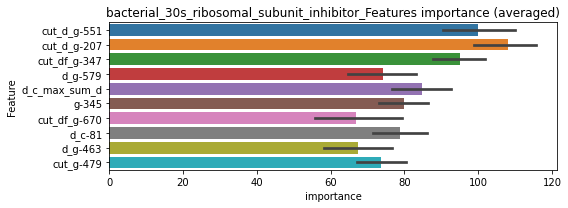

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00123798	valid_1's binary_logloss: 0.0309461
Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000734722	valid_1's binary_logloss: 0.02812
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000951842	valid_1's binary_logloss: 0.0257718


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 bacterial_30s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_30s_ribosomal_subunit_inhibitor logloss: 0.02570235823206029


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000745997	valid_1's binary_logloss: 0.0179634


bacterial_50s_ribosomal_subunit_inhibitor, len(trt): 80, len(othr): 3282
target_rate: 0.0033594 → Adj_target_rate: 0.0034820


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00292159	valid_1's binary_logloss: 0.0729513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00104532	valid_1's binary_logloss: 0.0489094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.00135747	valid_1's binary_logloss: 0.0382167
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.995
y_Threshold: 0.0077503, Threshold: 0.0131798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 650/3794
p_label_rate: 0.0100452 Vs.target_rate: 0.00336
Num_p_label: 40.0, Expected: 13.4, Threshold: 0.0131798, conf_0:0.00923, conf_1:0.01713
Num_p_label: 0.0, Expected: 13.4, Adj_threshold_1: 0.0431798
threshold: 0.0431798, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00203283	valid_1's binary_logloss: 0.0668719


positive_y_label: 650.0/3794, y_label_rate: 0.1713231
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000837316	valid_1's binary_logloss: 0.0440558
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000709907	valid_1's binary_logloss: 0.0461724
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00257695	valid_1's binary_logloss: 0.0541172
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000931792	valid_1's binary_logloss: 0.0471713


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0162485, Threshold: 0.0431798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 644.0/3782
p_label_rate: 0.0010045 Vs.target_rate: 0.00336
Num_p_label: 4.0, Expected: 13.4, Threshold: 0.0431798, conf_0:0.03454, conf_1:0.05182
threshold: 0.0431798, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 644.0/3782, y_label_rate: 0.1702803
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.0014677	valid_1's binary_logloss: 0.0516596
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00127255	valid_1's binary_logloss: 0.0418635
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00128307	valid_1's binary_logloss: 0.0389375
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0224860, Threshold: 0.0431798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 636.0/3766
p_label_rate: 0.0012557 Vs.target_rate: 0.00336
Num_p_label: 5.0, Expected: 13.4, Threshold: 0.0431798, conf_0:0.03886, conf_1:0.04750


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00156979	valid_1's binary_logloss: 0.0380907


threshold: 0.0431798, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 636.0/3766, y_label_rate: 0.1688794


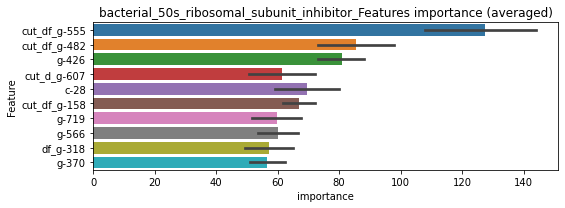

len(train_index) : 2824
len(valid_index) : 942
================================= fold 1/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2824
len(valid_index) : 942
================================= fold 2/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[195]	training's binary_logloss: 0.00250527	valid_1's binary_logloss: 0.0549197
Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 941
================================= fold 3/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00174702	valid_1's binary_logloss: 0.0391392
Training until validation scores don't improve for 30 rounds


len(train_index) : 2825
len(valid_index) : 941
================================= fold 4/4 bacterial_50s_ribosomal_subunit_inhibitor=================================


Early stopping, best iteration is:
[342]	training's binary_logloss: 0.00121529	valid_1's binary_logloss: 0.037536
Training until validation scores don't improve for 30 rounds


bacterial_50s_ribosomal_subunit_inhibitor logloss: 0.0438516271010375
bacterial_50s_ribosomal_subunit_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00178094	valid_1's binary_logloss: 0.0438049


bacterial_antifolate, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000491386	valid_1's binary_logloss: 0.0208857
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000486052	valid_1's binary_logloss: 0.0384131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000385528	valid_1's binary_logloss: 0.0046158
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015996, Threshold: 0.0126213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000507974	valid_1's binary_logloss: 0.0170607


Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0126213, conf_0:0.00883, conf_1:0.01641
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_1: 0.0426213
threshold: 0.0426213, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000425916	valid_1's binary_logloss: 0.0189747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000505219	valid_1's binary_logloss: 0.0382135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[582]	training's binary_logloss: 0.00038938	valid_1's binary_logloss: 0.00435447
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0174997, Threshold: 0.0426213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 653.0/3803


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000515821	valid_1's binary_logloss: 0.0157168


p_label_rate: 0.0220994 Vs.target_rate: 0.00151
Num_p_label: 88.0, Expected: 6.0, Threshold: 0.0426213, conf_0:0.03410, conf_1:0.05115
Num_p_label: 71.0, Expected: 6.0, Adj_threshold_1: 0.0726213
Num_p_label: 64.0, Expected: 6.0, Adj_threshold_2: 0.1026213
Num_p_label: 58.0, Expected: 6.0, Adj_threshold_3: 0.1326213
Num_p_label: 53.0, Expected: 6.0, Adj_threshold_4: 0.1626213
Num_p_label: 47.0, Expected: 6.0, Adj_threshold_5: 0.1926213
Num_p_label: 44.0, Expected: 6.0, Adj_threshold_6: 0.2226213
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_7: 0.2526213
Num_p_label: 36.0, Expected: 6.0, Adj_threshold_8: 0.2826213
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_9: 0.3126213
Num_p_label: 31.0, Expected: 6.0, Adj_threshold_10: 0.3426213
threshold: 0.3426213, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 653.0/3803, y_label_rate: 0.1717065
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000457778	valid_1's binary_logloss: 0.0095685
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.000945014	valid_1's binary_logloss: 0.0310928
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000825603	valid_1's binary_logloss: 0.0285917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000373034	valid_1's binary_logloss: 0.00515683


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162753, Threshold: 0.3426213, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3797
p_label_rate: 0.0107986 Vs.target_rate: 0.00151
Num_p_label: 43.0, Expected: 6.0, Threshold: 0.3426213, conf_0:0.30836, conf_1:0.37688
Num_p_label: 39.0, Expected: 6.0, Adj_threshold_1: 0.3726213
Num_p_label: 34.0, Expected: 6.0, Adj_threshold_2: 0.4026213
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_3: 0.4326213
Num_p_label: 32.0, Expected: 6.0, Adj_threshold_4: 0.4626213
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_5: 0.4926213
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_6: 0.5226213
Num_p_label: 26.0, Expected: 6.0, Adj_threshold_7: 0.5526213
Num_p_label: 24.0, Expected: 6.0, Adj_threshold_8: 0.5826213
Num_p_label: 23.0, Expected: 6.0, Adj_threshold_9: 0.6126213
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_10: 0.6426213
threshold: 0.6426213, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_la

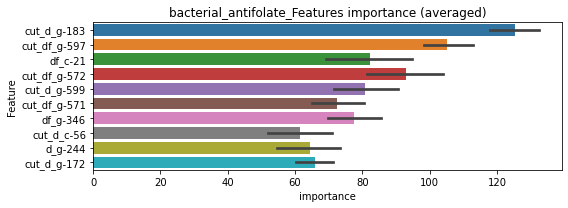

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.0004059	valid_1's binary_logloss: 0.00927075


len(valid_index) : 949
================================= fold 2/4 bacterial_antifolate=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 bacterial_antifolate=================================


Early stopping, best iteration is:
[333]	training's binary_logloss: 0.000687625	valid_1's binary_logloss: 0.0176929
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 bacterial_antifolate=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.000679748	valid_1's binary_logloss: 0.0118619
Training until validation scores don't improve for 30 rounds


bacterial_antifolate logloss: 0.014123205239677186


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000684558	valid_1's binary_logloss: 0.0176724
mutually exclusive columns: bacterial_cell_wall_synthesis_inhibitor


bacterial_cell_wall_synthesis_inhibitor, len(trt): 192, len(othr): 5973
target_rate: 0.0080625 → Adj_target_rate: 0.0073283


selected negative label: 5973


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.0155655	valid_1's binary_logloss: 0.100441
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.0143771	valid_1's binary_logloss: 0.110923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00979837	valid_1's binary_logloss: 0.0939151
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.984, PR-AUC:0.967
y_Threshold: 0.0261515, Threshold: 0.0370879, pos_neg_ratio: 0.8000000
Remove_noisy_data: 368 → Positive_corect_labels: 1130/6799
p_label_rate: 0.0100452 Vs.target_rate: 0.00806
Num_p_label: 40.0, Expected: 32.1, Threshold: 0.0370879, conf_0:0.02596, conf_1:0.04821


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0131529	valid_1's binary_logloss: 0.0914167


threshold: 0.0370879, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1130.0/6799, y_label_rate: 0.1662009
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.00662887	valid_1's binary_logloss: 0.0664299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00604102	valid_1's binary_logloss: 0.0706719
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00604699	valid_1's binary_logloss: 0.0598683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.00356111	valid_1's binary_logloss: 0.067892


2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0266211, Threshold: 0.0370879, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1079.0/6697
p_label_rate: 0.0097941 Vs.target_rate: 0.00806
Num_p_label: 39.0, Expected: 32.1, Threshold: 0.0370879, conf_0:0.02967, conf_1:0.04451
threshold: 0.0370879, positive_p_label: 39.0/3982, p_label_rate: 0.0097941
positive_y_label: 1079.0/6697, y_label_rate: 0.1611169
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.00127391	valid_1's binary_logloss: 0.0257204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00278654	valid_1's binary_logloss: 0.0377019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00441882	valid_1's binary_logloss: 0.058055
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.995
y_Threshold: 0.0246201, Threshold: 0.0370879, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 1051.0/6641
p_label_rate: 0.0090407 Vs.target_rate: 0.00806
Num_p_label: 36.0, Expected: 32.1, Threshold: 0.0370879, conf_0:0.03338, conf_1:0.04080
threshold: 0.0370879, positive_p_label: 36.0/3982, p_label_rate: 0.0090407


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00503772	valid_1's binary_logloss: 0.0504467


positive_y_label: 1051.0/6641, y_label_rate: 0.1582593


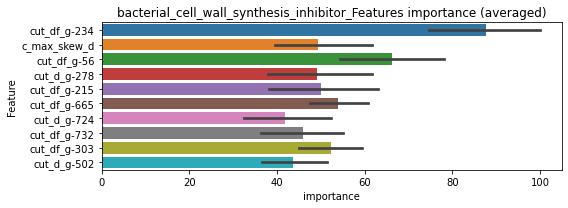

len(train_index) : 4980
len(valid_index) : 1661
================================= fold 1/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 4981
len(valid_index) : 1660


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00243901	valid_1's binary_logloss: 0.0307049


================================= fold 2/4 bacterial_cell_wall_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 4981
len(valid_index) : 1660
================================= fold 3/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[142]	training's binary_logloss: 0.00350666	valid_1's binary_logloss: 0.0333883
Training until validation scores don't improve for 30 rounds


len(train_index) : 4981
len(valid_index) : 1660
================================= fold 4/4 bacterial_cell_wall_synthesis_inhibitor=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00146288	valid_1's binary_logloss: 0.0248695
Training until validation scores don't improve for 30 rounds


bacterial_cell_wall_synthesis_inhibitor logloss: 0.027016938097671125


Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00127109	valid_1's binary_logloss: 0.0191028


bacterial_dna_gyrase_inhibitor, len(trt): 89, len(othr): 3275
target_rate: 0.0037373 → Adj_target_rate: 0.0038122


selected negative label: 3275


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00202438	valid_1's binary_logloss: 0.0706839
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00455004	valid_1's binary_logloss: 0.0883453
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00202015	valid_1's binary_logloss: 0.0507951
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0120382, Threshold: 0.0267966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 157 → Positive_corect_labels: 642/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00374
Num_p_label: 40.0, Expected: 14.9, Threshold: 0.0267966, conf_0:0.01876, conf_1:0.03484
Num_p_label: 6.0, Expected: 14.9, Adj_threshold_1: 0.0567966


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00386041	valid_1's binary_logloss: 0.0630963


threshold: 0.0567966, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 642.0/3773, y_label_rate: 0.1701564
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00196205	valid_1's binary_logloss: 0.0628955
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00216017	valid_1's binary_logloss: 0.0711043
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00102919	valid_1's binary_logloss: 0.0348253
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00103609	valid_1's binary_logloss: 0.0482033


2 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0209087, Threshold: 0.0567966, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 631.0/3751
p_label_rate: 0.0045203 Vs.target_rate: 0.00374
Num_p_label: 18.0, Expected: 14.9, Threshold: 0.0567966, conf_0:0.04544, conf_1:0.06816
threshold: 0.0567966, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 631.0/3751, y_label_rate: 0.1682218
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00295714	valid_1's binary_logloss: 0.0492556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00138882	valid_1's binary_logloss: 0.0535284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000751813	valid_1's binary_logloss: 0.0354364
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0244715, Threshold: 0.0567966, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00093481	valid_1's binary_logloss: 0.0382642


Remove_noisy_data: 14 → Positive_corect_labels: 624.0/3737
p_label_rate: 0.0062783 Vs.target_rate: 0.00374
Num_p_label: 25.0, Expected: 14.9, Threshold: 0.0567966, conf_0:0.05112, conf_1:0.06248
Num_p_label: 14.0, Expected: 14.9, Adj_threshold_1: 0.0867966
threshold: 0.0867966, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 624.0/3737, y_label_rate: 0.1669789


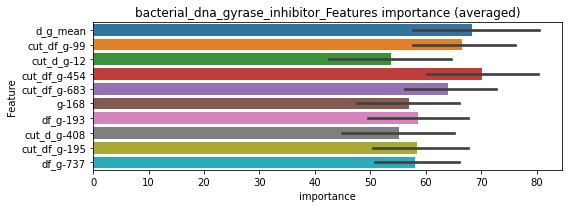

len(train_index) : 2802
len(valid_index) : 935
================================= fold 1/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2803
len(valid_index) : 934
================================= fold 2/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00368374	valid_1's binary_logloss: 0.0510158
Training until validation scores don't improve for 30 rounds


len(train_index) : 2803
len(valid_index) : 934
================================= fold 3/4 bacterial_dna_gyrase_inhibitor=================================


Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00163981	valid_1's binary_logloss: 0.041221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00135589	valid_1's binary_logloss: 0.0297581


len(train_index) : 2803
len(valid_index) : 934
================================= fold 4/4 bacterial_dna_gyrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bacterial_dna_gyrase_inhibitor logloss: 0.04160915817357075
bacterial_dna_gyrase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[194]	training's binary_logloss: 0.00271232	valid_1's binary_logloss: 0.0444317


bacterial_dna_inhibitor, len(trt): 115, len(othr): 2020
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


mutually exclusive columns: bacterial_dna_inhibitor
selected negative label: 2020


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[237]	training's binary_logloss: 0.0145073	valid_1's binary_logloss: 0.168291
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00504892	valid_1's binary_logloss: 0.121916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00528114	valid_1's binary_logloss: 0.112791
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.975, PR-AUC:0.950
y_Threshold: 0.0317768, Threshold: 0.0502931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 145 → Positive_corect_labels: 372/2279
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.0502931, conf_0:0.03521, conf_1:0.06538
Num_p_label: 9.0, Expected: 19.2, Adj_threshold_1: 0.0802931
threshold: 0.0802931, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.0150118	valid_1's binary_logloss: 0.165295


positive_y_label: 372.0/2279, y_label_rate: 0.1632295
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.0061137	valid_1's binary_logloss: 0.142092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00311489	valid_1's binary_logloss: 0.0859313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00956003	valid_1's binary_logloss: 0.11825
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.990, PR-AUC:0.976
y_Threshold: 0.0393639, Threshold: 0.0802931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 46 → Positive_corect_labels: 349.0/2233
p_label_rate: 0.0020090 Vs.target_rate: 0.00483
Num_p_label: 8.0, Expected: 19.2, Threshold: 0.0802931, conf_0:0.06423, conf_1:0.09635
threshold: 0.0802931, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.0038582	valid_1's binary_logloss: 0.113018


positive_y_label: 349.0/2233, y_label_rate: 0.1562920
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00505708	valid_1's binary_logloss: 0.086713
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.00199694	valid_1's binary_logloss: 0.0571342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00441	valid_1's binary_logloss: 0.0726848
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0427091, Threshold: 0.0802931, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 338.0/2211
p_label_rate: 0.0030136 Vs.target_rate: 0.00483
Num_p_label: 12.0, Expected: 19.2, Threshold: 0.0802931, conf_0:0.07226, conf_1:0.08832
threshold: 0.0802931, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00638428	valid_1's binary_logloss: 0.100421


positive_y_label: 338.0/2211, y_label_rate: 0.1528720


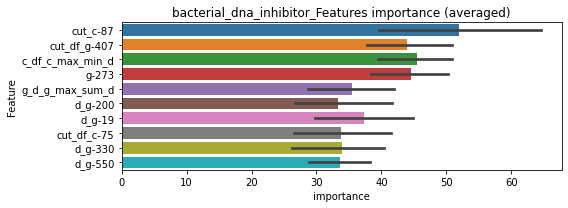

len(train_index) : 1658
len(valid_index) : 553
================================= fold 1/4 bacterial_dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1658
len(valid_index) : 553
================================= fold 2/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00501291	valid_1's binary_logloss: 0.0868013
Training until validation scores don't improve for 30 rounds


len(train_index) : 1658
len(valid_index) : 553
================================= fold 3/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00311431	valid_1's binary_logloss: 0.0739486
Training until validation scores don't improve for 30 rounds


len(train_index) : 1659
len(valid_index) : 552
================================= fold 4/4 bacterial_dna_inhibitor=================================


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00221319	valid_1's binary_logloss: 0.0642787
Training until validation scores don't improve for 30 rounds


bacterial_dna_inhibitor logloss: 0.0684555256375744
bacterial_dna_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0022241	valid_1's binary_logloss: 0.0487578


bacterial_membrane_integrity_inhibitor, len(trt): 19, len(othr): 3286
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000281957	valid_1's binary_logloss: 0.0080461
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000294231	valid_1's binary_logloss: 0.0178905
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000284574	valid_1's binary_logloss: 0.00413201
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009813, Threshold: 0.0017669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0017669, conf_0:0.00124, conf_1:0.00230
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0317669
threshold: 0.0317669, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000355029	valid_1's binary_logloss: 0.00494732


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.0002872	valid_1's binary_logloss: 0.00824169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000292051	valid_1's binary_logloss: 0.0167528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000337	valid_1's binary_logloss: 0.00451812
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0071935, Threshold: 0.0317669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00080
Num_p_label: 0.0, Expected: 3.2, Threshold: 0.0317669, conf_0:0.02541, conf_1:0.03812


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000288624	valid_1's binary_logloss: 0.00386603


threshold: 0.0317669, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.0002872	valid_1's binary_logloss: 0.00824169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000292051	valid_1's binary_logloss: 0.0167528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000337	valid_1's binary_logloss: 0.00451812
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0071935, Threshold: 0.0317669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00080
Num_p_label: 0.0, Expected: 3.2, Threshold: 0.0317669, conf_0:0.02859, conf_1:0.03494


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000288624	valid_1's binary_logloss: 0.00386603


threshold: 0.0317669, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


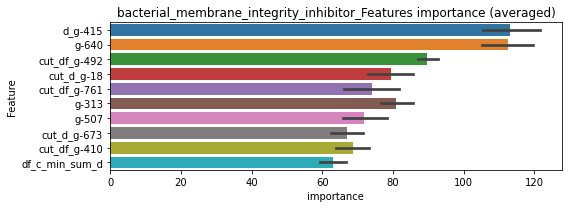

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 bacterial_membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000292769	valid_1's binary_logloss: 0.00653118
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.000429565	valid_1's binary_logloss: 0.0154004
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 bacterial_membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000323135	valid_1's binary_logloss: 0.00291769
Training until validation scores don't improve for 30 rounds


bacterial_membrane_integrity_inhibitor logloss: 0.007308049540236989


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.00031812	valid_1's binary_logloss: 0.00437813


bcl_inhibitor, len(trt): 31, len(othr): 3286
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00039339	valid_1's binary_logloss: 0.00904822
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000446459	valid_1's binary_logloss: 0.0353583
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000366712	valid_1's binary_logloss: 0.00232265
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0016492, Threshold: 0.0058122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0058122, conf_0:0.00407, conf_1:0.00756
Num_p_label: 2.0, Expected: 5.2, Adj_threshold_1: 0.0358122


Early stopping, best iteration is:
[428]	training's binary_logloss: 0.000505782	valid_1's binary_logloss: 0.020798


threshold: 0.0358122, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00047411	valid_1's binary_logloss: 0.0207683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000470726	valid_1's binary_logloss: 0.0180184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000364895	valid_1's binary_logloss: 0.00201855
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0085750, Threshold: 0.0358122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0047715 Vs.target_rate: 0.00130
Num_p_label: 19.0, Expected: 5.2, Threshold: 0.0358122, conf_0:0.02865, conf_1:0.04297
Num_p_label: 11.0, Expected: 5.2, Adj_threshold_1: 0.0658122


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000442912	valid_1's binary_logloss: 0.0216586


threshold: 0.0658122, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.00047411	valid_1's binary_logloss: 0.0207683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000470726	valid_1's binary_logloss: 0.0180184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000364895	valid_1's binary_logloss: 0.00201855
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0085750, Threshold: 0.0658122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0027624 Vs.target_rate: 0.00130
Num_p_label: 11.0, Expected: 5.2, Threshold: 0.0658122, conf_0:0.05923, conf_1:0.07239


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000442912	valid_1's binary_logloss: 0.0216586


threshold: 0.0658122, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


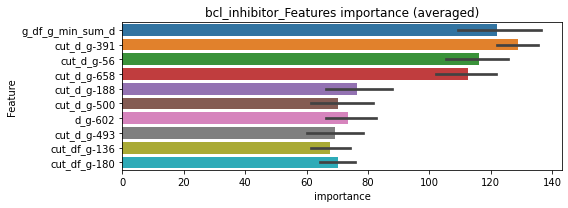

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 bcl_inhibitor=================================


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.000717046	valid_1's binary_logloss: 0.018616
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 bcl_inhibitor=================================


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000512306	valid_1's binary_logloss: 0.013202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[681]	training's binary_logloss: 0.000390244	valid_1's binary_logloss: 0.00169574


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 bcl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


bcl_inhibitor logloss: 0.012991652893724786


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000694835	valid_1's binary_logloss: 0.0184448


bcr-abl_inhibitor, len(trt): 38, len(othr): 3281
target_rate: 0.0015957 → Adj_target_rate: 0.0018493


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00167868	valid_1's binary_logloss: 0.0447603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000526239	valid_1's binary_logloss: 0.0214997
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.0003927	valid_1's binary_logloss: 0.00162417
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0031654, Threshold: 0.0437368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00160
Num_p_label: 40.0, Expected: 6.4, Threshold: 0.0437368, conf_0:0.03062, conf_1:0.05686
Num_p_label: 24.0, Expected: 6.4, Adj_threshold_1: 0.0737368
Num_p_label: 18.0, Expected: 6.4, Adj_threshold_2: 0.1037368
Num_p_label: 9.0, Expected: 6.4, Adj_threshold_3: 0.1337368


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00065611	valid_1's binary_logloss: 0.0204758


threshold: 0.1337368, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000643435	valid_1's binary_logloss: 0.0311284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000399519	valid_1's binary_logloss: 0.0105252
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000450754	valid_1's binary_logloss: 0.0119016
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0198096, Threshold: 0.1337368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0158212 Vs.target_rate: 0.00160
Num_p_label: 63.0, Expected: 6.4, Threshold: 0.1337368, conf_0:0.10699, conf_1:0.16048
Num_p_label: 60.0, Expected: 6.4, Adj_threshold_1: 0.1637368


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000496941	valid_1's binary_logloss: 0.0137371


Num_p_label: 57.0, Expected: 6.4, Adj_threshold_2: 0.1937368
Num_p_label: 54.0, Expected: 6.4, Adj_threshold_3: 0.2237368
Num_p_label: 48.0, Expected: 6.4, Adj_threshold_4: 0.2537368
Num_p_label: 45.0, Expected: 6.4, Adj_threshold_5: 0.2837368
Num_p_label: 41.0, Expected: 6.4, Adj_threshold_6: 0.3137368
Num_p_label: 35.0, Expected: 6.4, Adj_threshold_7: 0.3437368
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_8: 0.3737368
Num_p_label: 32.0, Expected: 6.4, Adj_threshold_9: 0.4037368
Num_p_label: 26.0, Expected: 6.4, Adj_threshold_10: 0.4337368
threshold: 0.4337368, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 652.0/3797, y_label_rate: 0.1717145
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000552367	valid_1's binary_logloss: 0.0227909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.00041044	valid_1's binary_logloss: 0.0142474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000493878	valid_1's binary_logloss: 0.00753538
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0200356, Threshold: 0.4337368, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0072828 Vs.target_rate: 0.00160
Num_p_label: 29.0, Expected: 6.4, Threshold: 0.4337368, conf_0:0.39036, conf_1:0.47711
Num_p_label: 29.0, Expected: 6.4, Adj_threshold_1: 0.4637368
Num_p_label: 27.0, Expected: 6.4, Adj_threshold_2: 0.4937368
Num_p_label: 27.0, Expected: 6.4, Adj_threshold_3: 0.5237368
Num_p_label: 25.0, Expected: 6.4, Adj_threshold_4: 0.5537368
Num_p_label: 20.0, Expected: 6.4, Adj_threshold_5: 0.5837368
Num_p_label: 18.0, Expected: 6.4, Adj_threshold_6: 0.6137368


Early stopping, best iteration is:
[382]	training's binary_logloss: 0.000615614	valid_1's binary_logloss: 0.0194794


Num_p_label: 16.0, Expected: 6.4, Adj_threshold_7: 0.6437368
Num_p_label: 11.0, Expected: 6.4, Adj_threshold_8: 0.6737368
threshold: 0.6737368, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 650.0/3793, y_label_rate: 0.1713683


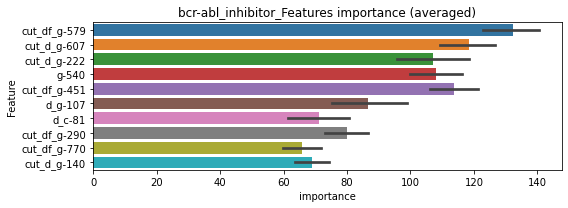

len(train_index) : 2844
len(valid_index) : 949
================================= fold 1/4 bcr-abl_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 2/4 bcr-abl_inhibitor=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000444866	valid_1's binary_logloss: 0.0114415
Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 3/4 bcr-abl_inhibitor=================================


Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000684411	valid_1's binary_logloss: 0.0142984
Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 948
================================= fold 4/4 bcr-abl_inhibitor=================================


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000501563	valid_1's binary_logloss: 0.00923412
Training until validation scores don't improve for 30 rounds


bcr-abl_inhibitor logloss: 0.014377969970058416


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000637863	valid_1's binary_logloss: 0.0225409


benzodiazepine_receptor_agonist, len(trt): 67, len(othr): 3278
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[249]	training's binary_logloss: 0.00481643	valid_1's binary_logloss: 0.0624886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00144465	valid_1's binary_logloss: 0.0450113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00107585	valid_1's binary_logloss: 0.0268454
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00103137	valid_1's binary_logloss: 0.0478271


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0069850, Threshold: 0.0099473, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 651/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0099473, conf_0:0.00696, conf_1:0.01293
Num_p_label: 0.0, Expected: 11.2, Adj_threshold_1: 0.0399473
threshold: 0.0399473, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 651.0/3793, y_label_rate: 0.1716320
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00132502	valid_1's binary_logloss: 0.0493153
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00202541	valid_1's binary_logloss: 0.0575876
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000684017	valid_1's binary_logloss: 0.0320275
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000733683	valid_1's binary_logloss: 0.028715


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0165098, Threshold: 0.0399473, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 645.0/3781
p_label_rate: 0.0000000 Vs.target_rate: 0.00281
Num_p_label: 0.0, Expected: 11.2, Threshold: 0.0399473, conf_0:0.03196, conf_1:0.04794
threshold: 0.0399473, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 645.0/3781, y_label_rate: 0.1705898
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00177091	valid_1's binary_logloss: 0.0434459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000615161	valid_1's binary_logloss: 0.0390129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000805284	valid_1's binary_logloss: 0.0311407
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000743447	valid_1's binary_logloss: 0.0447776


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0131304, Threshold: 0.0399473, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 640.0/3771
p_label_rate: 0.0002511 Vs.target_rate: 0.00281
Num_p_label: 1.0, Expected: 11.2, Threshold: 0.0399473, conf_0:0.03595, conf_1:0.04394
threshold: 0.0399473, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 640.0/3771, y_label_rate: 0.1697163


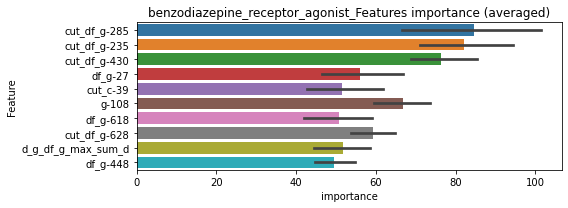

len(train_index) : 2828
len(valid_index) : 943
================================= fold 1/4 benzodiazepine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943
================================= fold 2/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00264248	valid_1's binary_logloss: 0.0467056
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 943
================================= fold 3/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00128955	valid_1's binary_logloss: 0.0410573
Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 942
================================= fold 4/4 benzodiazepine_receptor_agonist=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00158076	valid_1's binary_logloss: 0.0257762
Training until validation scores don't improve for 30 rounds


benzodiazepine_receptor_agonist logloss: 0.03546122694040956
benzodiazepine_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00101568	valid_1's binary_logloss: 0.0282982


beta_amyloid_inhibitor, len(trt): 24, len(othr): 3287
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000374197	valid_1's binary_logloss: 0.012226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000371282	valid_1's binary_logloss: 0.0230417
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000439471	valid_1's binary_logloss: 0.00390731
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013513, Threshold: 0.0056091, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0056091, conf_0:0.00393, conf_1:0.00729
Num_p_label: 3.0, Expected: 4.0, Adj_threshold_1: 0.0356091
threshold: 0.0356091, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[326]	training's binary_logloss: 0.000646435	valid_1's binary_logloss: 0.0138914


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000401626	valid_1's binary_logloss: 0.0120849
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000377511	valid_1's binary_logloss: 0.0221797
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000415038	valid_1's binary_logloss: 0.00342749
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0065218, Threshold: 0.0356091, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0032647 Vs.target_rate: 0.00101
Num_p_label: 13.0, Expected: 4.0, Threshold: 0.0356091, conf_0:0.02849, conf_1:0.04273
Num_p_label: 5.0, Expected: 4.0, Adj_threshold_1: 0.0656091
threshold: 0.0656091, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000401861	valid_1's binary_logloss: 0.0122673


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000401626	valid_1's binary_logloss: 0.0120849
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000377511	valid_1's binary_logloss: 0.0221797
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000415038	valid_1's binary_logloss: 0.00342749
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0065218, Threshold: 0.0656091, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0656091, conf_0:0.05905, conf_1:0.07217


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000401861	valid_1's binary_logloss: 0.0122673


threshold: 0.0656091, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


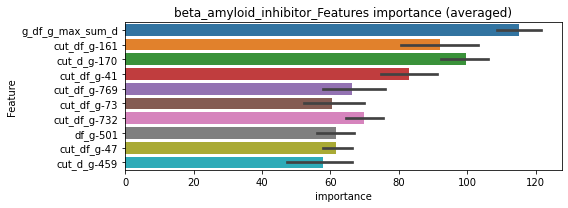

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 beta_amyloid_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000397666	valid_1's binary_logloss: 0.00977015
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00053796	valid_1's binary_logloss: 0.0164202
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 beta_amyloid_inhibitor=================================


Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000349655	valid_1's binary_logloss: 0.00361985
Training until validation scores don't improve for 30 rounds


beta_amyloid_inhibitor logloss: 0.010682562445061874


Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00069489	valid_1's binary_logloss: 0.01292


bromodomain_inhibitor, len(trt): 68, len(othr): 3280
target_rate: 0.0028555 → Adj_target_rate: 0.0030327


selected negative label: 3280


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00216661	valid_1's binary_logloss: 0.0707541
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00182806	valid_1's binary_logloss: 0.0494883
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[630]	training's binary_logloss: 0.00060443	valid_1's binary_logloss: 0.0210903
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.998


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00103865	valid_1's binary_logloss: 0.0388086


y_Threshold: 0.0057741, Threshold: 0.0097648, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00286
Num_p_label: 40.0, Expected: 11.4, Threshold: 0.0097648, conf_0:0.00684, conf_1:0.01269
Num_p_label: 1.0, Expected: 11.4, Adj_threshold_1: 0.0397648
threshold: 0.0397648, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00205042	valid_1's binary_logloss: 0.0573136
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00173704	valid_1's binary_logloss: 0.0430926
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[525]	training's binary_logloss: 0.000721071	valid_1's binary_logloss: 0.0417985
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000638286	valid_1's binary_logloss: 0.0221355


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0186482, Threshold: 0.0397648, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0010045 Vs.target_rate: 0.00286
Num_p_label: 4.0, Expected: 11.4, Threshold: 0.0397648, conf_0:0.03181, conf_1:0.04772
threshold: 0.0397648, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000662823	valid_1's binary_logloss: 0.0380224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000583841	valid_1's binary_logloss: 0.0375859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00139212	valid_1's binary_logloss: 0.0395092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.0007226	valid_1's binary_logloss: 0.0200224


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0192377, Threshold: 0.0397648, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 643.0/3778
p_label_rate: 0.0005023 Vs.target_rate: 0.00286
Num_p_label: 2.0, Expected: 11.4, Threshold: 0.0397648, conf_0:0.03579, conf_1:0.04374
threshold: 0.0397648, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 643.0/3778, y_label_rate: 0.1701959


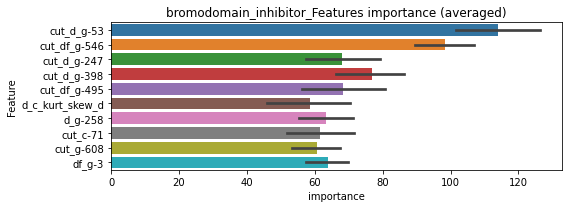

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 bromodomain_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00173251	valid_1's binary_logloss: 0.0398337
Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00167944	valid_1's binary_logloss: 0.0381813
Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 944
================================= fold 4/4 bromodomain_inhibitor=================================


Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000944278	valid_1's binary_logloss: 0.023341
Training until validation scores don't improve for 30 rounds


bromodomain_inhibitor logloss: 0.035195030916145856
bromodomain_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.00364187	valid_1's binary_logloss: 0.0394161


btk_inhibitor, len(trt): 29, len(othr): 3284
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00070919	valid_1's binary_logloss: 0.0284873
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000374487	valid_1's binary_logloss: 0.0146397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000345282	valid_1's binary_logloss: 0.00183717
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016117, Threshold: 0.0057097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0057097, conf_0:0.00400, conf_1:0.00742
Num_p_label: 2.0, Expected: 4.8, Adj_threshold_1: 0.0357097


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000407541	valid_1's binary_logloss: 0.0133729


threshold: 0.0357097, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000663497	valid_1's binary_logloss: 0.0270207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000367391	valid_1's binary_logloss: 0.0140132
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000350427	valid_1's binary_logloss: 0.00121029
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0086981, Threshold: 0.0357097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0040181 Vs.target_rate: 0.00122
Num_p_label: 16.0, Expected: 4.8, Threshold: 0.0357097, conf_0:0.02857, conf_1:0.04285
Num_p_label: 8.0, Expected: 4.8, Adj_threshold_1: 0.0657097
threshold: 0.0657097, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000382634	valid_1's binary_logloss: 0.0123285


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000663497	valid_1's binary_logloss: 0.0270207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000367391	valid_1's binary_logloss: 0.0140132
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000350427	valid_1's binary_logloss: 0.00121029
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0086981, Threshold: 0.0657097, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0020090 Vs.target_rate: 0.00122
Num_p_label: 8.0, Expected: 4.8, Threshold: 0.0657097, conf_0:0.05914, conf_1:0.07228
threshold: 0.0657097, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000382634	valid_1's binary_logloss: 0.0123285


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


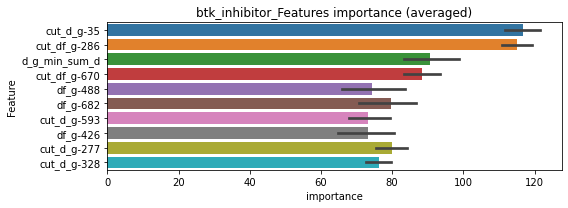

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 btk_inhibitor=================================


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.000686475	valid_1's binary_logloss: 0.0235945
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 btk_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000478773	valid_1's binary_logloss: 0.0123177
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[814]	training's binary_logloss: 0.000351805	valid_1's binary_logloss: 0.00112362


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 btk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


btk_inhibitor logloss: 0.012209365158085742


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000406992	valid_1's binary_logloss: 0.0118016


calcineurin_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00023847	valid_1's binary_logloss: 0.00343587
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.000379102	valid_1's binary_logloss: 0.00692615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000213713	valid_1's binary_logloss: 0.000393171
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010151, Threshold: 0.0060390, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0060390, conf_0:0.00423, conf_1:0.00785
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_1: 0.0360390
Num_p_label: 4.0, Expected: 2.0, Adj_threshold_2: 0.0660390
threshold: 0.0660390, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000222845	valid_1's binary_logloss: 0.00459207


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000216136	valid_1's binary_logloss: 0.00315615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000262376	valid_1's binary_logloss: 0.00545488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000207775	valid_1's binary_logloss: 0.0002288
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0142450, Threshold: 0.0660390, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0075339 Vs.target_rate: 0.00050
Num_p_label: 30.0, Expected: 2.0, Threshold: 0.0660390, conf_0:0.05283, conf_1:0.07925
Num_p_label: 23.0, Expected: 2.0, Adj_threshold_1: 0.0960390
Num_p_label: 22.0, Expected: 2.0, Adj_threshold_2: 0.1260390
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_3: 0.1560390
Num_p_label: 18.0, Expected: 2.0, Adj_threshold_4: 0.1860390
Num_p_label: 16.0, Expected: 2.0, Adj_threshold_5: 0.2160390
Num_p_label: 15.0, Expected: 2.0, Adj_threshold_6: 0.2460390
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_7: 0.2760390
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_8: 0.3060390
Num_p_label: 13.0, Expected: 2.0, Adj_threshold_9: 0.3360390
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_10: 0.3660390


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000214688	valid_1's binary_logloss: 0.00498846


threshold: 0.3660390, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000216136	valid_1's binary_logloss: 0.00315615
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000262376	valid_1's binary_logloss: 0.00545488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000207775	valid_1's binary_logloss: 0.0002288
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0142450, Threshold: 0.3660390, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00050
Num_p_label: 11.0, Expected: 2.0, Threshold: 0.3660390, conf_0:0.32944, conf_1:0.40264
Num_p_label: 10.0, Expected: 2.0, Adj_threshold_1: 0.3960390
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_2: 0.4260390
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_3: 0.4560390
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_4: 0.4860390
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.5160390
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.5460390
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_7: 0.5760390


Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000214688	valid_1's binary_logloss: 0.00498846


threshold: 0.5760390, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


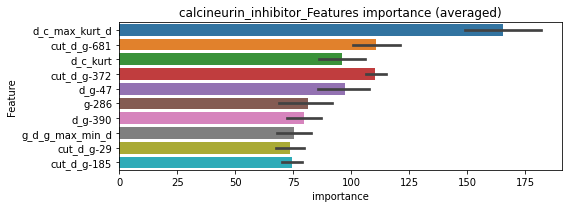

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 calcineurin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000227634	valid_1's binary_logloss: 0.00360594
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000238459	valid_1's binary_logloss: 0.00408564
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 calcineurin_inhibitor=================================


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000228386	valid_1's binary_logloss: 0.000244214
Training until validation scores don't improve for 30 rounds


calcineurin_inhibitor logloss: 0.0027756426336381997


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000239809	valid_1's binary_logloss: 0.00316677
mutually exclusive columns: calcium_channel_blocker


calcium_channel_blocker, len(trt): 281, len(othr): 6395
target_rate: 0.0117998 → Adj_target_rate: 0.0101297


selected negative label: 6395


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0219421	valid_1's binary_logloss: 0.141452
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.0250436	valid_1's binary_logloss: 0.143937
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0222688	valid_1's binary_logloss: 0.124924
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.959, PR-AUC:0.928
y_Threshold: 0.0423705, Threshold: 0.0576669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 542 → Positive_corect_labels: 1136/7132
p_label_rate: 0.0100452 Vs.target_rate: 0.01180
Num_p_label: 40.0, Expected: 47.0, Threshold: 0.0576669, conf_0:0.04037, conf_1:0.07497
threshold: 0.0576669, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.0294947	valid_1's binary_logloss: 0.145054


positive_y_label: 1136.0/7132, y_label_rate: 0.1592821
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00517687	valid_1's binary_logloss: 0.0618671
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.0173162	valid_1's binary_logloss: 0.103102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00290599	valid_1's binary_logloss: 0.05145
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0414322, Threshold: 0.0576669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 1077.0/7014
p_label_rate: 0.0037670 Vs.target_rate: 0.01180
Num_p_label: 15.0, Expected: 47.0, Threshold: 0.0576669, conf_0:0.04613, conf_1:0.06920
threshold: 0.0576669, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.0101901	valid_1's binary_logloss: 0.0672938


positive_y_label: 1077.0/7014, y_label_rate: 0.1535500
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00314683	valid_1's binary_logloss: 0.0324405
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00394661	valid_1's binary_logloss: 0.0386763
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0043285	valid_1's binary_logloss: 0.0476016
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0268904, Threshold: 0.0576669, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1048.0/6956
p_label_rate: 0.0012557 Vs.target_rate: 0.01180
Num_p_label: 5.0, Expected: 47.0, Threshold: 0.0576669, conf_0:0.05190, conf_1:0.06343
threshold: 0.0576669, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00390827	valid_1's binary_logloss: 0.0529453


positive_y_label: 1048.0/6956, y_label_rate: 0.1506613


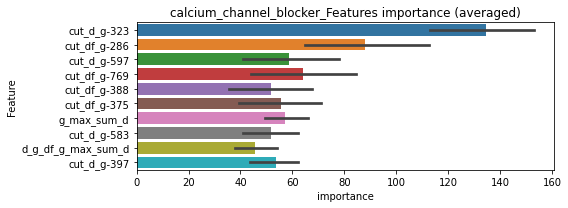

len(train_index) : 5217
len(valid_index) : 1739
================================= fold 1/4 calcium_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5217
len(valid_index) : 1739
================================= fold 2/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00282509	valid_1's binary_logloss: 0.0291224
Training until validation scores don't improve for 30 rounds


len(train_index) : 5217
len(valid_index) : 1739
================================= fold 3/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.00385301	valid_1's binary_logloss: 0.0333532
Training until validation scores don't improve for 30 rounds


len(train_index) : 5217
len(valid_index) : 1739
================================= fold 4/4 calcium_channel_blocker=================================


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00286824	valid_1's binary_logloss: 0.0292839
Training until validation scores don't improve for 30 rounds


calcium_channel_blocker logloss: 0.030136494868806485
calcium_channel_blocker is unpredictable(><)!


Early stopping, best iteration is:
[198]	training's binary_logloss: 0.00230026	valid_1's binary_logloss: 0.0287866


cannabinoid_receptor_agonist, len(trt): 42, len(othr): 3284
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00205699	valid_1's binary_logloss: 0.0507103
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000632464	valid_1's binary_logloss: 0.0155827
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000516316	valid_1's binary_logloss: 0.00527097
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000593414	valid_1's binary_logloss: 0.0251854


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0039249, Threshold: 0.0113540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0113540, conf_0:0.00795, conf_1:0.01476
Num_p_label: 5.0, Expected: 7.0, Adj_threshold_1: 0.0413540
threshold: 0.0413540, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0020082	valid_1's binary_logloss: 0.0505889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000507446	valid_1's binary_logloss: 0.0150135
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000427494	valid_1's binary_logloss: 0.00380206
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170647, Threshold: 0.0413540, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000548576	valid_1's binary_logloss: 0.0246373


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0052737 Vs.target_rate: 0.00176
Num_p_label: 21.0, Expected: 7.0, Threshold: 0.0413540, conf_0:0.03308, conf_1:0.04962
Num_p_label: 8.0, Expected: 7.0, Adj_threshold_1: 0.0713540
threshold: 0.0713540, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00062401	valid_1's binary_logloss: 0.0327893
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.00046332	valid_1's binary_logloss: 0.0140559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000546499	valid_1's binary_logloss: 0.0100522
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0146536, Threshold: 0.0713540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0022602 Vs.target_rate: 0.00176
Num_p_label: 9.0, Expected: 7.0, Threshold: 0.0713540, conf_0:0.06422, conf_1:0.07849
threshold: 0.0713540, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000876752	valid_1's binary_logloss: 0.0287014


positive_y_label: 652.0/3800, y_label_rate: 0.1715789


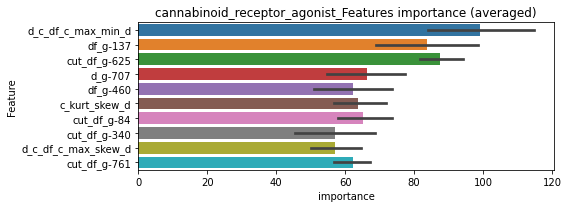

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 cannabinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 cannabinoid_receptor_agonist=================================


Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000625167	valid_1's binary_logloss: 0.0156736
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 cannabinoid_receptor_agonist=================================


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.000830452	valid_1's binary_logloss: 0.0228225
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 cannabinoid_receptor_agonist=================================


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000683835	valid_1's binary_logloss: 0.0149452
Training until validation scores don't improve for 30 rounds


cannabinoid_receptor_agonist logloss: 0.020684282601819613


Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00131541	valid_1's binary_logloss: 0.0292959


cannabinoid_receptor_antagonist, len(trt): 55, len(othr): 3284
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00151023	valid_1's binary_logloss: 0.0545713
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.00062679	valid_1's binary_logloss: 0.0395563
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000780894	valid_1's binary_logloss: 0.00812623
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0034999, Threshold: 0.0101182, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000839786	valid_1's binary_logloss: 0.0386663


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0101182, conf_0:0.00708, conf_1:0.01315
Num_p_label: 5.0, Expected: 9.2, Adj_threshold_1: 0.0401182
threshold: 0.0401182, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000948121	valid_1's binary_logloss: 0.0528668
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000796677	valid_1's binary_logloss: 0.0415448
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000513548	valid_1's binary_logloss: 0.00792136
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000640236	valid_1's binary_logloss: 0.0382671


y_Threshold: 0.0083260, Threshold: 0.0401182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0037670 Vs.target_rate: 0.00231
Num_p_label: 15.0, Expected: 9.2, Threshold: 0.0401182, conf_0:0.03209, conf_1:0.04814
threshold: 0.0401182, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000541963	valid_1's binary_logloss: 0.0346541
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000851907	valid_1's binary_logloss: 0.0211739
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00104837	valid_1's binary_logloss: 0.0317694
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000551452	valid_1's binary_logloss: 0.0308397


y_Threshold: 0.0164208, Threshold: 0.0401182, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0035158 Vs.target_rate: 0.00231
Num_p_label: 14.0, Expected: 9.2, Threshold: 0.0401182, conf_0:0.03611, conf_1:0.04413
threshold: 0.0401182, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


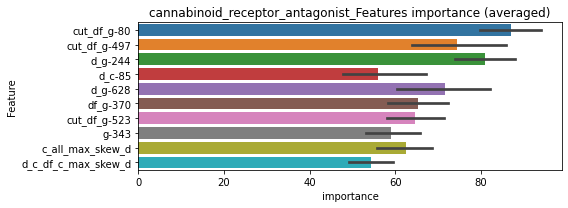

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 cannabinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[343]	training's binary_logloss: 0.000977089	valid_1's binary_logloss: 0.0431599
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00113235	valid_1's binary_logloss: 0.0320572
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 cannabinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.00102057	valid_1's binary_logloss: 0.0263567
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00076271	valid_1's binary_logloss: 0.0207814


cannabinoid_receptor_antagonist logloss: 0.03059249302194253
cannabinoid_receptor_antagonist is unpredictable(><)!
carbonic_anhydrase_inhibitor, len(trt): 36, len(othr): 3284
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000394454	valid_1's binary_logloss: 0.0254158
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000459761	valid_1's binary_logloss: 0.013397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000410397	valid_1's binary_logloss: 0.00360654
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0020748, Threshold: 0.0112999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0112999, conf_0:0.00791, conf_1:0.01469
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_1: 0.0412999


Early stopping, best iteration is:
[353]	training's binary_logloss: 0.000881613	valid_1's binary_logloss: 0.0278738


threshold: 0.0412999, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000495696	valid_1's binary_logloss: 0.0260057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000435659	valid_1's binary_logloss: 0.013666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000455437	valid_1's binary_logloss: 0.00317608
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0145677, Threshold: 0.0412999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0102963 Vs.target_rate: 0.00151
Num_p_label: 41.0, Expected: 6.0, Threshold: 0.0412999, conf_0:0.03304, conf_1:0.04956
Num_p_label: 30.0, Expected: 6.0, Adj_threshold_1: 0.0712999
Num_p_label: 20.0, Expected: 6.0, Adj_threshold_2: 0.1012999
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_3: 0.1312999
Num_p_label: 14.0, Expected: 6.0, Adj_threshold_4: 0.1612999


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000516431	valid_1's binary_logloss: 0.0274851


threshold: 0.1612999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000495696	valid_1's binary_logloss: 0.0260057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000435659	valid_1's binary_logloss: 0.013666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000455437	valid_1's binary_logloss: 0.00317608
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0145677, Threshold: 0.1612999, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.1612999, conf_0:0.14517, conf_1:0.17743


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000516431	valid_1's binary_logloss: 0.0274851


threshold: 0.1612999, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


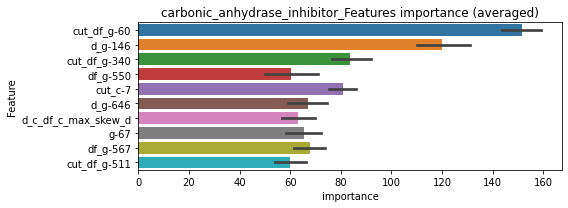

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000459056	valid_1's binary_logloss: 0.0244091


================================= fold 2/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952


Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000535803	valid_1's binary_logloss: 0.0118436


================================= fold 3/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000427029	valid_1's binary_logloss: 0.00342341


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 carbonic_anhydrase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


carbonic_anhydrase_inhibitor logloss: 0.016026201735827826


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000882715	valid_1's binary_logloss: 0.0244287


casein_kinase_inhibitor, len(trt): 36, len(othr): 3282
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3282


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000628372	valid_1's binary_logloss: 0.0364815
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000587311	valid_1's binary_logloss: 0.017584
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000397434	valid_1's binary_logloss: 0.00256718
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017086, Threshold: 0.0029374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000512678	valid_1's binary_logloss: 0.0266191


p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0029374, conf_0:0.00206, conf_1:0.00382
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0329374
threshold: 0.0329374, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00043076	valid_1's binary_logloss: 0.0345579
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000384616	valid_1's binary_logloss: 0.0158675
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000390574	valid_1's binary_logloss: 0.00268423
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0072261, Threshold: 0.0329374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, Expected: 6.0, Threshold: 0.0329374, conf_0:0.02635, conf_1:0.03952
threshold: 0.0329374, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000515061	valid_1's binary_logloss: 0.022922


positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000413633	valid_1's binary_logloss: 0.0237374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000516089	valid_1's binary_logloss: 0.00947011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000424896	valid_1's binary_logloss: 0.0135577
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0110762, Threshold: 0.0329374, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3804
p_label_rate: 0.0002511 Vs.target_rate: 0.00151
Num_p_label: 1.0, Expected: 6.0, Threshold: 0.0329374, conf_0:0.02964, conf_1:0.03623


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000462609	valid_1's binary_logloss: 0.022939


threshold: 0.0329374, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3804, y_label_rate: 0.1721872


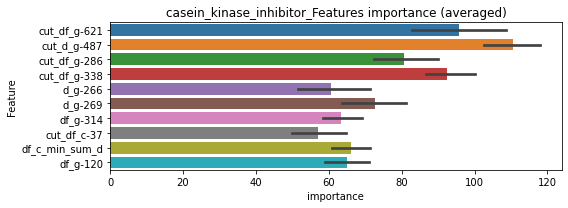

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 casein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000803248	valid_1's binary_logloss: 0.0216973
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000460833	valid_1's binary_logloss: 0.00931729
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 casein_kinase_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000558478	valid_1's binary_logloss: 0.0102969
Training until validation scores don't improve for 30 rounds


casein_kinase_inhibitor logloss: 0.01573755516148653


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000645133	valid_1's binary_logloss: 0.0216387


caspase_activator, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000366596	valid_1's binary_logloss: 0.0114085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000312309	valid_1's binary_logloss: 0.00976786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000272683	valid_1's binary_logloss: 0.00307171
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010858, Threshold: 0.0205641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0205641, conf_0:0.01439, conf_1:0.02673
Num_p_label: 25.0, Expected: 3.0, Adj_threshold_1: 0.0505641


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000272372	valid_1's binary_logloss: 0.00447374


Num_p_label: 19.0, Expected: 3.0, Adj_threshold_2: 0.0805641
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.1105641
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.1405641
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_5: 0.1705641
Num_p_label: 5.0, Expected: 3.0, Adj_threshold_6: 0.2005641
threshold: 0.2005641, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000702607	valid_1's binary_logloss: 0.0112666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000291503	valid_1's binary_logloss: 0.00822989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000273479	valid_1's binary_logloss: 0.0018567
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0109079, Threshold: 0.2005641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0120542 Vs.target_rate: 0.00076
Num_p_label: 48.0, Expected: 3.0, Threshold: 0.2005641, conf_0:0.16045, conf_1:0.24068
Num_p_label: 41.0, Expected: 3.0, Adj_threshold_1: 0.2305641
Num_p_label: 37.0, Expected: 3.0, Adj_threshold_2: 0.2605641
Num_p_label: 34.0, Expected: 3.0, Adj_threshold_3: 0.2905641
Num_p_label: 33.0, Expected: 3.0, Adj_threshold_4: 0.3205641
Num_p_label: 32.0, Expected: 3.0, Adj_threshold_5: 0.3505641


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000267465	valid_1's binary_logloss: 0.00326625


Num_p_label: 26.0, Expected: 3.0, Adj_threshold_6: 0.3805641
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_7: 0.4105641
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_8: 0.4405641
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_9: 0.4705641
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_10: 0.5005641
threshold: 0.5005641, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[288]	training's binary_logloss: 0.000702607	valid_1's binary_logloss: 0.0112666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000291503	valid_1's binary_logloss: 0.00822989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000273479	valid_1's binary_logloss: 0.0018567
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0109079, Threshold: 0.5005641, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0052737 Vs.target_rate: 0.00076
Num_p_label: 21.0, Expected: 3.0, Threshold: 0.5005641, conf_0:0.45051, conf_1:0.55062
Num_p_label: 19.0, Expected: 3.0, Adj_threshold_1: 0.5305641
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_2: 0.5605641
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_3: 0.5905641
Num_p_label: 16.0, Expected: 3.0, Adj_threshold_4: 0.6205641
Num_p_label: 14.0, Expected: 3.0, Adj_threshold_5: 0.6505641
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_6: 0.6805641
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_7: 0.7105641


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000267465	valid_1's binary_logloss: 0.00326625


Num_p_label: 6.0, Expected: 3.0, Adj_threshold_8: 0.7405641
threshold: 0.7405641, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


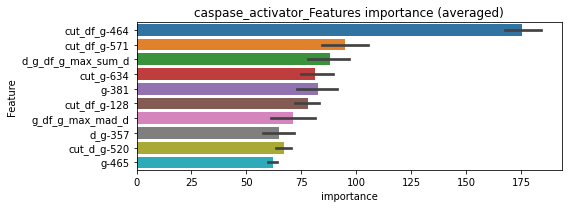

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 caspase_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 caspase_activator=================================


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000332091	valid_1's binary_logloss: 0.00837947
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 caspase_activator=================================


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000353175	valid_1's binary_logloss: 0.00811617
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 caspase_activator=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000284101	valid_1's binary_logloss: 0.00130706
Training until validation scores don't improve for 30 rounds


caspase_activator logloss: 0.005177290868750588


Early stopping, best iteration is:
[580]	training's binary_logloss: 0.00029494	valid_1's binary_logloss: 0.00289904


catechol_o_methyltransferase_inhibitor, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.000361531	valid_1's binary_logloss: 0.00947122
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0010814	valid_1's binary_logloss: 0.0115752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000277019	valid_1's binary_logloss: 0.000361499
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014567, Threshold: 0.0054700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0054700, conf_0:0.00383, conf_1:0.00711
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_1: 0.0354700
threshold: 0.0354700, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000363896	valid_1's binary_logloss: 0.0129017


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000275309	valid_1's binary_logloss: 0.0068014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00108627	valid_1's binary_logloss: 0.0110202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000270136	valid_1's binary_logloss: 0.000305813
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116758, Threshold: 0.0354700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808


Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000353809	valid_1's binary_logloss: 0.011275


p_label_rate: 0.0032647 Vs.target_rate: 0.00076
Num_p_label: 13.0, Expected: 3.0, Threshold: 0.0354700, conf_0:0.02838, conf_1:0.04256
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_1: 0.0654700
threshold: 0.0654700, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000275309	valid_1's binary_logloss: 0.0068014
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00108627	valid_1's binary_logloss: 0.0110202
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000270136	valid_1's binary_logloss: 0.000305813
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116758, Threshold: 0.0654700, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.0654700, conf_0:0.05892, conf_1:0.07202
threshold: 0.0654700, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000353809	valid_1's binary_logloss: 0.011275


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


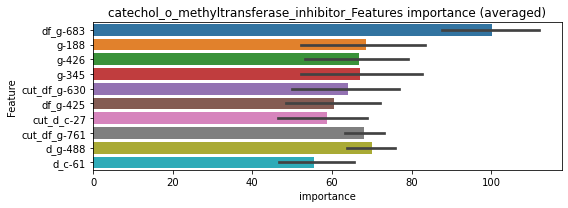

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 catechol_o_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000288417	valid_1's binary_logloss: 0.00579465
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000427361	valid_1's binary_logloss: 0.00936822
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 catechol_o_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000277883	valid_1's binary_logloss: 0.000315281
Training until validation scores don't improve for 30 rounds


catechol_o_methyltransferase_inhibitor logloss: 0.006333011350880781


Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000426625	valid_1's binary_logloss: 0.00985389


cc_chemokine_receptor_antagonist, len(trt): 102, len(othr): 3277
target_rate: 0.0042832 → Adj_target_rate: 0.0042806


selected negative label: 3277


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[209]	training's binary_logloss: 0.011836	valid_1's binary_logloss: 0.113229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00344943	valid_1's binary_logloss: 0.0801306
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00309802	valid_1's binary_logloss: 0.0595984
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0176489, Threshold: 0.0420440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 172 → Positive_corect_labels: 635/3760
p_label_rate: 0.0100452 Vs.target_rate: 0.00428
Num_p_label: 40.0, Expected: 17.1, Threshold: 0.0420440, conf_0:0.02943, conf_1:0.05466
Num_p_label: 7.0, Expected: 17.1, Adj_threshold_1: 0.0720440
threshold: 0.0720440, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00353236	valid_1's binary_logloss: 0.0728131


positive_y_label: 635.0/3760, y_label_rate: 0.1688830
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00284958	valid_1's binary_logloss: 0.0782984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00288821	valid_1's binary_logloss: 0.0546704
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00312426	valid_1's binary_logloss: 0.0587587
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0267757, Threshold: 0.0720440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 617.0/3724
p_label_rate: 0.0102963 Vs.target_rate: 0.00428
Num_p_label: 41.0, Expected: 17.1, Threshold: 0.0720440, conf_0:0.05764, conf_1:0.08645
Num_p_label: 21.0, Expected: 17.1, Adj_threshold_1: 0.1020440
threshold: 0.1020440, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00400218	valid_1's binary_logloss: 0.0691501


positive_y_label: 617.0/3724, y_label_rate: 0.1656821
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00271286	valid_1's binary_logloss: 0.0584369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00239686	valid_1's binary_logloss: 0.0407332
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000962328	valid_1's binary_logloss: 0.0286687
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0286520, Threshold: 0.1020440, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 609.0/3708
p_label_rate: 0.0072828 Vs.target_rate: 0.00428
Num_p_label: 29.0, Expected: 17.1, Threshold: 0.1020440, conf_0:0.09184, conf_1:0.11225
Num_p_label: 15.0, Expected: 17.1, Adj_threshold_1: 0.1320440


Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00135815	valid_1's binary_logloss: 0.0545106


threshold: 0.1320440, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 609.0/3708, y_label_rate: 0.1642395


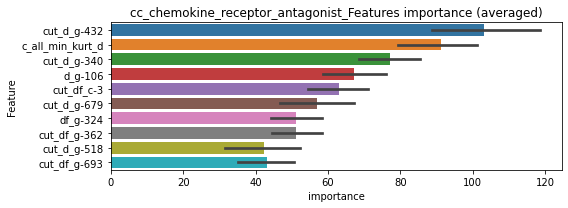

len(train_index) : 2781
len(valid_index) : 927
================================= fold 1/4 cc_chemokine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 2/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[146]	training's binary_logloss: 0.00409483	valid_1's binary_logloss: 0.0639103
Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 3/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00200928	valid_1's binary_logloss: 0.0417087
Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 4/4 cc_chemokine_receptor_antagonist=================================


Early stopping, best iteration is:
[214]	training's binary_logloss: 0.00244576	valid_1's binary_logloss: 0.0276498
Training until validation scores don't improve for 30 rounds


cc_chemokine_receptor_antagonist logloss: 0.04166233639292115
cc_chemokine_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[271]	training's binary_logloss: 0.00175371	valid_1's binary_logloss: 0.0333804


cck_receptor_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000293533	valid_1's binary_logloss: 0.00539989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000289687	valid_1's binary_logloss: 0.0146641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000285944	valid_1's binary_logloss: 0.000684449
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0010925, Threshold: 0.0017675, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0017675, conf_0:0.00124, conf_1:0.00230
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0317675
threshold: 0.0317675, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000600593	valid_1's binary_logloss: 0.0100556


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000287907	valid_1's binary_logloss: 0.00504116
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00028766	valid_1's binary_logloss: 0.0131082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000284809	valid_1's binary_logloss: 0.000959792
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084587, Threshold: 0.0317675, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0317675, conf_0:0.02541, conf_1:0.03812
threshold: 0.0317675, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000603576	valid_1's binary_logloss: 0.00974676


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000287907	valid_1's binary_logloss: 0.00504116
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00028766	valid_1's binary_logloss: 0.0131082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000284809	valid_1's binary_logloss: 0.000959792
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084587, Threshold: 0.0317675, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0317675, conf_0:0.02859, conf_1:0.03494
threshold: 0.0317675, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.000603576	valid_1's binary_logloss: 0.00974676


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


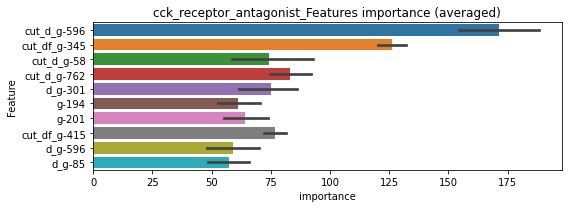

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000333529	valid_1's binary_logloss: 0.00491588
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 cck_receptor_antagonist=================================


Early stopping, best iteration is:
[562]	training's binary_logloss: 0.000310971	valid_1's binary_logloss: 0.0108923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[680]	training's binary_logloss: 0.000299497	valid_1's binary_logloss: 0.00104085


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 cck_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


cck_receptor_antagonist logloss: 0.006207073628113122


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00037043	valid_1's binary_logloss: 0.00797473
mutually exclusive columns: cdk_inhibitor


cdk_inhibitor, len(trt): 352, len(othr): 7583
target_rate: 0.0147812 → Adj_target_rate: 0.0122676


selected negative label: 7583


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.0224934	valid_1's binary_logloss: 0.138341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.0158639	valid_1's binary_logloss: 0.13248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.0173987	valid_1's binary_logloss: 0.141291
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.964, PR-AUC:0.934
y_Threshold: 0.0414128, Threshold: 0.0588798, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0245295	valid_1's binary_logloss: 0.146884


Remove_noisy_data: 620 → Positive_corect_labels: 1358/8479
p_label_rate: 0.0100452 Vs.target_rate: 0.01478
Num_p_label: 40.0, Expected: 58.9, Threshold: 0.0588798, conf_0:0.04122, conf_1:0.07654
threshold: 0.0588798, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1358.0/8479, y_label_rate: 0.1601604
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00698076	valid_1's binary_logloss: 0.0782604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00713723	valid_1's binary_logloss: 0.081442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00619199	valid_1's binary_logloss: 0.0742652
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00623151	valid_1's binary_logloss: 0.0808613


2 / 3, AUC score:0.994, PR-AUC:0.985
y_Threshold: 0.0361790, Threshold: 0.0588798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 1282.0/8327
p_label_rate: 0.0055249 Vs.target_rate: 0.01478
Num_p_label: 22.0, Expected: 58.9, Threshold: 0.0588798, conf_0:0.04710, conf_1:0.07066
threshold: 0.0588798, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 1282.0/8327, y_label_rate: 0.1539570
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00453085	valid_1's binary_logloss: 0.0611776
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00532288	valid_1's binary_logloss: 0.0497872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.00163855	valid_1's binary_logloss: 0.0363986
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00474696	valid_1's binary_logloss: 0.0523011


3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0310620, Threshold: 0.0588798, pos_neg_ratio: 0.8000000
Remove_noisy_data: 72 → Positive_corect_labels: 1246.0/8255
p_label_rate: 0.0042692 Vs.target_rate: 0.01478
Num_p_label: 17.0, Expected: 58.9, Threshold: 0.0588798, conf_0:0.05299, conf_1:0.06477
threshold: 0.0588798, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 1246.0/8255, y_label_rate: 0.1509388


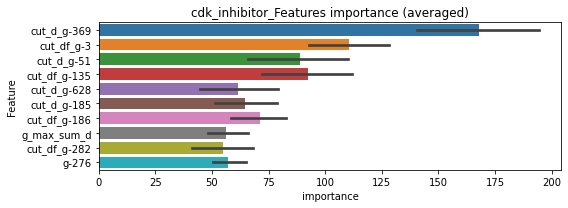

len(train_index) : 6191
len(valid_index) : 2064
================================= fold 1/4 cdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 6191
len(valid_index) : 2064
================================= fold 2/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00509681	valid_1's binary_logloss: 0.0383073
Training until validation scores don't improve for 30 rounds


len(train_index) : 6191
len(valid_index) : 2064
================================= fold 3/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00228478	valid_1's binary_logloss: 0.0394726
Training until validation scores don't improve for 30 rounds


len(train_index) : 6192
len(valid_index) : 2063
================================= fold 4/4 cdk_inhibitor=================================


Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00129673	valid_1's binary_logloss: 0.0235482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00281254	valid_1's binary_logloss: 0.0518607


cdk_inhibitor logloss: 0.03829556047108469
cdk_inhibitor is unpredictable(><)!
chelating_agent, len(trt): 54, len(othr): 3280
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3280


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00367905	valid_1's binary_logloss: 0.0691107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000578007	valid_1's binary_logloss: 0.0278361
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00057936	valid_1's binary_logloss: 0.00906146
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0063916, Threshold: 0.0164327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 140 → Positive_corect_labels: 652/3796
p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0164327, conf_0:0.01150, conf_1:0.02136
Num_p_label: 20.0, Expected: 9.0, Adj_threshold_1: 0.0464327
threshold: 0.0464327, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00182298	valid_1's binary_logloss: 0.0441265


positive_y_label: 652.0/3796, y_label_rate: 0.1717597
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00106463	valid_1's binary_logloss: 0.0301841
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00147701	valid_1's binary_logloss: 0.0445431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000624266	valid_1's binary_logloss: 0.0171596
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0224489, Threshold: 0.0464327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0070316 Vs.target_rate: 0.00227
Num_p_label: 28.0, Expected: 9.0, Threshold: 0.0464327, conf_0:0.03715, conf_1:0.05572
Num_p_label: 24.0, Expected: 9.0, Adj_threshold_1: 0.0764327
Num_p_label: 19.0, Expected: 9.0, Adj_threshold_2: 0.1064327
threshold: 0.1064327, positive_p_label: 19.0/3982, p_label_rate: 0.0047715


Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00107786	valid_1's binary_logloss: 0.0348852


positive_y_label: 645.0/3782, y_label_rate: 0.1705447
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00101648	valid_1's binary_logloss: 0.0332168
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00100789	valid_1's binary_logloss: 0.0292488
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000841113	valid_1's binary_logloss: 0.023684
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0228977, Threshold: 0.1064327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 639.0/3770
p_label_rate: 0.0052737 Vs.target_rate: 0.00227
Num_p_label: 21.0, Expected: 9.0, Threshold: 0.1064327, conf_0:0.09579, conf_1:0.11708
threshold: 0.1064327, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000794627	valid_1's binary_logloss: 0.0293611


positive_y_label: 639.0/3770, y_label_rate: 0.1694960


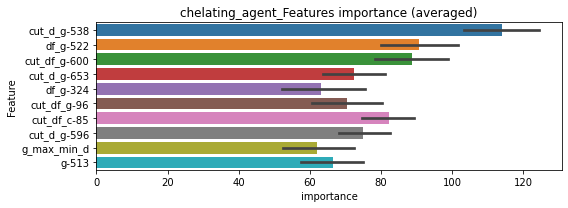

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 chelating_agent=================================


Early stopping, best iteration is:
[303]	training's binary_logloss: 0.00101678	valid_1's binary_logloss: 0.0206281
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 chelating_agent=================================


Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00126731	valid_1's binary_logloss: 0.0218549
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000566815	valid_1's binary_logloss: 0.00979389


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 chelating_agent=================================


Training until validation scores don't improve for 30 rounds


chelating_agent logloss: 0.02222580631969126


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00109145	valid_1's binary_logloss: 0.0366284


chk_inhibitor, len(trt): 24, len(othr): 3288
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000307137	valid_1's binary_logloss: 0.00545908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000343926	valid_1's binary_logloss: 0.0213119
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000311245	valid_1's binary_logloss: 0.00252553
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013886, Threshold: 0.0313444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0313444, conf_0:0.02194, conf_1:0.04075
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_1: 0.0613444
Num_p_label: 24.0, Expected: 4.0, Adj_threshold_2: 0.0913444
Num_p_label: 16.0, Expected: 4.0, Adj_threshold_3: 0.1213444
Num_p_label: 13.0, Expected: 4.0, Adj_threshold_4: 0.1513444


Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000306356	valid_1's binary_logloss: 0.00429354


Num_p_label: 11.0, Expected: 4.0, Adj_threshold_5: 0.1813444
Num_p_label: 4.0, Expected: 4.0, Adj_threshold_6: 0.2113444
threshold: 0.2113444, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000303826	valid_1's binary_logloss: 0.00401798
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000324474	valid_1's binary_logloss: 0.0203101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000304076	valid_1's binary_logloss: 0.00295523
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0398060, Threshold: 0.2113444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0110497 Vs.target_rate: 0.00101
Num_p_label: 44.0, Expected: 4.0, Threshold: 0.2113444, conf_0:0.16908, conf_1:0.25361
Num_p_label: 43.0, Expected: 4.0, Adj_threshold_1: 0.2413444
Num_p_label: 39.0, Expected: 4.0, Adj_threshold_2: 0.2713444


Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000300508	valid_1's binary_logloss: 0.00326692


Num_p_label: 39.0, Expected: 4.0, Adj_threshold_3: 0.3013444
Num_p_label: 38.0, Expected: 4.0, Adj_threshold_4: 0.3313444
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_5: 0.3613444
Num_p_label: 37.0, Expected: 4.0, Adj_threshold_6: 0.3913444
Num_p_label: 34.0, Expected: 4.0, Adj_threshold_7: 0.4213444
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_8: 0.4513444
Num_p_label: 32.0, Expected: 4.0, Adj_threshold_9: 0.4813444
Num_p_label: 27.0, Expected: 4.0, Adj_threshold_10: 0.5113444
threshold: 0.5113444, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 655.0/3809, y_label_rate: 0.1719611
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000396712	valid_1's binary_logloss: 0.0120493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000300163	valid_1's binary_logloss: 0.00567851
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000298671	valid_1's binary_logloss: 0.000731324
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0404954, Threshold: 0.5113444, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0085384 Vs.target_rate: 0.00101
Num_p_label: 34.0, Expected: 4.0, Threshold: 0.5113444, conf_0:0.46021, conf_1:0.56248
Num_p_label: 33.0, Expected: 4.0, Adj_threshold_1: 0.5413444
Num_p_label: 31.0, Expected: 4.0, Adj_threshold_2: 0.5713444
Num_p_label: 28.0, Expected: 4.0, Adj_threshold_3: 0.6013444


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00031135	valid_1's binary_logloss: 0.00941433


Num_p_label: 21.0, Expected: 4.0, Adj_threshold_4: 0.6313444
Num_p_label: 15.0, Expected: 4.0, Adj_threshold_5: 0.6613444
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_6: 0.6913444
Num_p_label: 9.0, Expected: 4.0, Adj_threshold_7: 0.7213444
threshold: 0.7213444, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 655.0/3809, y_label_rate: 0.1719611


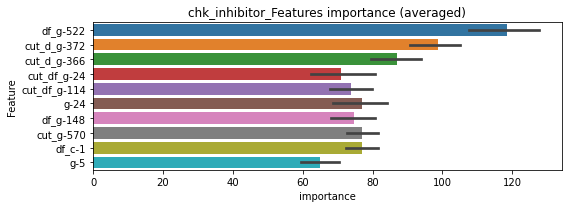

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 chk_inhibitor=================================


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000371888	valid_1's binary_logloss: 0.00971571
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 chk_inhibitor=================================


Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000307646	valid_1's binary_logloss: 0.00433503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000313316	valid_1's binary_logloss: 0.00097751


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 chk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


chk_inhibitor logloss: 0.005692101223017346


Early stopping, best iteration is:
[686]	training's binary_logloss: 0.000312804	valid_1's binary_logloss: 0.00773527


chloride_channel_blocker, len(trt): 42, len(othr): 3279
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3279


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000494624	valid_1's binary_logloss: 0.0285322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000453342	valid_1's binary_logloss: 0.0175037
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000459115	valid_1's binary_logloss: 0.0162587
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025656, Threshold: 0.0167692, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0167692, conf_0:0.01174, conf_1:0.02180


Early stopping, best iteration is:
[338]	training's binary_logloss: 0.00114209	valid_1's binary_logloss: 0.0278959


Num_p_label: 12.0, Expected: 7.0, Adj_threshold_1: 0.0467692
threshold: 0.0467692, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.00047811	valid_1's binary_logloss: 0.0274594
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000580839	valid_1's binary_logloss: 0.0137173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000487638	valid_1's binary_logloss: 0.0164122
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219200, Threshold: 0.0467692, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3800
p_label_rate: 0.0203415 Vs.target_rate: 0.00176
Num_p_label: 81.0, Expected: 7.0, Threshold: 0.0467692, conf_0:0.03742, conf_1:0.05612
Num_p_label: 54.0, Expected: 7.0, Adj_threshold_1: 0.0767692
Num_p_label: 44.0, Expected: 7.0, Adj_threshold_2: 0.1067692
Num_p_label: 36.0, Expected: 7.0, Adj_threshold_3: 0.1367692
Num_p_label: 28.0, Expected: 7.0, Adj_threshold_4: 0.1667692
Num_p_label: 20.0, Expected: 7.0, Adj_threshold_5: 0.1967692
Num_p_label: 16.0, Expected: 7.0, Adj_threshold_6: 0.2267692


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000815797	valid_1's binary_logloss: 0.0290669


threshold: 0.2267692, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00043604	valid_1's binary_logloss: 0.0238061
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000602842	valid_1's binary_logloss: 0.0163118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000439108	valid_1's binary_logloss: 0.0107815
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0170605, Threshold: 0.2267692, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0052737 Vs.target_rate: 0.00176
Num_p_label: 21.0, Expected: 7.0, Threshold: 0.2267692, conf_0:0.20409, conf_1:0.24945
Num_p_label: 18.0, Expected: 7.0, Adj_threshold_1: 0.2567692
Num_p_label: 15.0, Expected: 7.0, Adj_threshold_2: 0.2867692


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000730782	valid_1's binary_logloss: 0.0284718


threshold: 0.2867692, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 653.0/3798, y_label_rate: 0.1719326


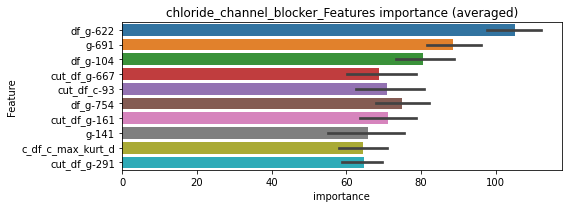

len(train_index) : 2848
len(valid_index) : 950
================================= fold 1/4 chloride_channel_blocker=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 950
================================= fold 2/4 chloride_channel_blocker=================================


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.000900728	valid_1's binary_logloss: 0.0237475
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 3/4 chloride_channel_blocker=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00076914	valid_1's binary_logloss: 0.022849
Training until validation scores don't improve for 30 rounds


len(train_index) : 2849
len(valid_index) : 949
================================= fold 4/4 chloride_channel_blocker=================================


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00085006	valid_1's binary_logloss: 0.0239565
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000521271	valid_1's binary_logloss: 0.00639796


chloride_channel_blocker logloss: 0.019239864151960342
cholesterol_inhibitor, len(trt): 48, len(othr): 3286
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00236153	valid_1's binary_logloss: 0.0442393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00101804	valid_1's binary_logloss: 0.0339503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[632]	training's binary_logloss: 0.000450834	valid_1's binary_logloss: 0.00853414
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000515394	valid_1's binary_logloss: 0.0303364


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0041762, Threshold: 0.0075430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0075430, conf_0:0.00528, conf_1:0.00981
Num_p_label: 1.0, Expected: 8.0, Adj_threshold_1: 0.0375430
threshold: 0.0375430, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000939041	valid_1's binary_logloss: 0.0403836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000502577	valid_1's binary_logloss: 0.031608
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000463551	valid_1's binary_logloss: 0.00819278
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000511026	valid_1's binary_logloss: 0.0277028


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0121425, Threshold: 0.0375430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0010045 Vs.target_rate: 0.00202
Num_p_label: 4.0, Expected: 8.0, Threshold: 0.0375430, conf_0:0.03003, conf_1:0.04505
threshold: 0.0375430, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000490249	valid_1's binary_logloss: 0.030673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000454971	valid_1's binary_logloss: 0.0197904
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000588961	valid_1's binary_logloss: 0.0178149
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0123051, Threshold: 0.0375430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0010045 Vs.target_rate: 0.00202
Num_p_label: 4.0, Expected: 8.0, Threshold: 0.0375430, conf_0:0.03379, conf_1:0.04130
threshold: 0.0375430, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00170276	valid_1's binary_logloss: 0.0401047


positive_y_label: 652.0/3801, y_label_rate: 0.1715338


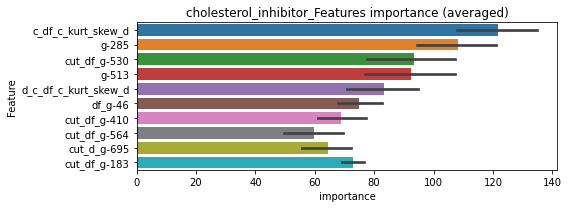

len(train_index) : 2850
len(valid_index) : 951
================================= fold 1/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 2/4 cholesterol_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000836819	valid_1's binary_logloss: 0.0252895
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950
================================= fold 3/4 cholesterol_inhibitor=================================


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.000952907	valid_1's binary_logloss: 0.029389
Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 950


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000586961	valid_1's binary_logloss: 0.0115934


================================= fold 4/4 cholesterol_inhibitor=================================


Training until validation scores don't improve for 30 rounds


cholesterol_inhibitor logloss: 0.022607845711779057


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00064585	valid_1's binary_logloss: 0.0241567


cholinergic_receptor_antagonist, len(trt): 54, len(othr): 3286
target_rate: 0.0022676 → Adj_target_rate: 0.0024931


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000493145	valid_1's binary_logloss: 0.0332436
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00223473	valid_1's binary_logloss: 0.0508395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[535]	training's binary_logloss: 0.000596705	valid_1's binary_logloss: 0.0169702
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0043543, Threshold: 0.0085498, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000924542	valid_1's binary_logloss: 0.0317609


p_label_rate: 0.0100452 Vs.target_rate: 0.00227
Num_p_label: 40.0, Expected: 9.0, Threshold: 0.0085498, conf_0:0.00598, conf_1:0.01111
Num_p_label: 1.0, Expected: 9.0, Adj_threshold_1: 0.0385498
threshold: 0.0385498, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000827503	valid_1's binary_logloss: 0.0301266
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00112398	valid_1's binary_logloss: 0.0480325
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000526997	valid_1's binary_logloss: 0.0159134
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000766995	valid_1's binary_logloss: 0.0307266


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0119546, Threshold: 0.0385498, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0005023 Vs.target_rate: 0.00227
Num_p_label: 2.0, Expected: 9.0, Threshold: 0.0385498, conf_0:0.03084, conf_1:0.04626
threshold: 0.0385498, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 654.0/3805, y_label_rate: 0.1718791
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00073383	valid_1's binary_logloss: 0.0348503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000833235	valid_1's binary_logloss: 0.0268578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000784852	valid_1's binary_logloss: 0.0276981
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0111446, Threshold: 0.0385498, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3803


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000762399	valid_1's binary_logloss: 0.0292766


p_label_rate: 0.0010045 Vs.target_rate: 0.00227
Num_p_label: 4.0, Expected: 9.0, Threshold: 0.0385498, conf_0:0.03469, conf_1:0.04240
threshold: 0.0385498, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 653.0/3803, y_label_rate: 0.1717065


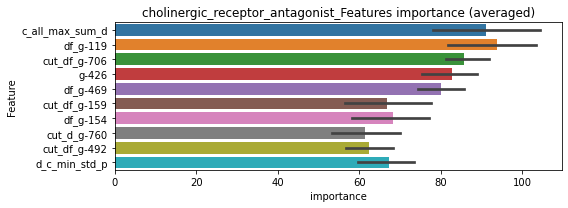

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 cholinergic_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 cholinergic_receptor_antagonist=================================


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.0013887	valid_1's binary_logloss: 0.0422537
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 cholinergic_receptor_antagonist=================================


Early stopping, best iteration is:
[279]	training's binary_logloss: 0.00125121	valid_1's binary_logloss: 0.028401
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 cholinergic_receptor_antagonist=================================


Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00126068	valid_1's binary_logloss: 0.0269644
Training until validation scores don't improve for 30 rounds


cholinergic_receptor_antagonist logloss: 0.030928638782171048
cholinergic_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00100588	valid_1's binary_logloss: 0.0260904


coagulation_factor_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000384137	valid_1's binary_logloss: 0.00788342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000353002	valid_1's binary_logloss: 0.0135886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000320914	valid_1's binary_logloss: 0.00373422
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012275, Threshold: 0.0030737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0030737, conf_0:0.00215, conf_1:0.00400
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_1: 0.0330737


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000394041	valid_1's binary_logloss: 0.0118062


threshold: 0.0330737, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000371037	valid_1's binary_logloss: 0.00801554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000320905	valid_1's binary_logloss: 0.0120656
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000314893	valid_1's binary_logloss: 0.00309285
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0061850, Threshold: 0.0330737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0042692 Vs.target_rate: 0.00101
Num_p_label: 17.0, Expected: 4.0, Threshold: 0.0330737, conf_0:0.02646, conf_1:0.03969
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0630737


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000362916	valid_1's binary_logloss: 0.013535


Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0930737
threshold: 0.0930737, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000371037	valid_1's binary_logloss: 0.00801554
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000320905	valid_1's binary_logloss: 0.0120656
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[523]	training's binary_logloss: 0.000314893	valid_1's binary_logloss: 0.00309285
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0061850, Threshold: 0.0930737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00101
Num_p_label: 6.0, Expected: 4.0, Threshold: 0.0930737, conf_0:0.08377, conf_1:0.10238
threshold: 0.0930737, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000362916	valid_1's binary_logloss: 0.013535


positive_y_label: 657.0/3810, y_label_rate: 0.1724409


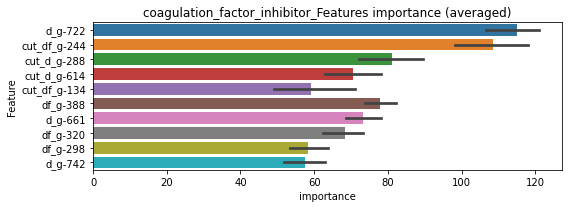

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 coagulation_factor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 coagulation_factor_inhibitor=================================


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000370107	valid_1's binary_logloss: 0.00642682
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 coagulation_factor_inhibitor=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000384153	valid_1's binary_logloss: 0.0118759
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 coagulation_factor_inhibitor=================================


Early stopping, best iteration is:
[623]	training's binary_logloss: 0.00034288	valid_1's binary_logloss: 0.00344366
Training until validation scores don't improve for 30 rounds


coagulation_factor_inhibitor logloss: 0.007868602371803647


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000526609	valid_1's binary_logloss: 0.00972538


corticosteroid_agonist, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000449323	valid_1's binary_logloss: 0.0212215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.000749905	valid_1's binary_logloss: 0.034872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000389285	valid_1's binary_logloss: 0.0046875
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018230, Threshold: 0.0039399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0039399, conf_0:0.00276, conf_1:0.00512
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0339399


Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000452038	valid_1's binary_logloss: 0.0228022


threshold: 0.0339399, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00049475	valid_1's binary_logloss: 0.0194552
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000556725	valid_1's binary_logloss: 0.0360795
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000398088	valid_1's binary_logloss: 0.00436688
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0068934, Threshold: 0.0339399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00151
Num_p_label: 0.0, Expected: 6.0, Threshold: 0.0339399, conf_0:0.02715, conf_1:0.04073
threshold: 0.0339399, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000536708	valid_1's binary_logloss: 0.0212595


positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000549221	valid_1's binary_logloss: 0.0281832
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000482127	valid_1's binary_logloss: 0.0153033
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000396174	valid_1's binary_logloss: 0.00542186
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0098098, Threshold: 0.0339399, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00151
Num_p_label: 0.0, Expected: 6.0, Threshold: 0.0339399, conf_0:0.03055, conf_1:0.03733
threshold: 0.0339399, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000532999	valid_1's binary_logloss: 0.0218405


positive_y_label: 656.0/3809, y_label_rate: 0.1722237


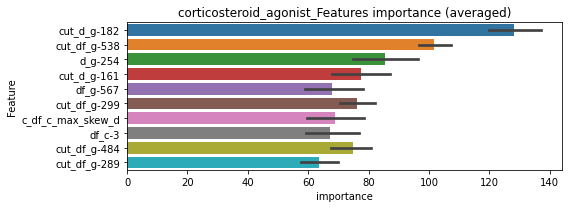

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 corticosteroid_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 corticosteroid_agonist=================================


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000550725	valid_1's binary_logloss: 0.0248439
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 corticosteroid_agonist=================================


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000597931	valid_1's binary_logloss: 0.014964
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 corticosteroid_agonist=================================


Early stopping, best iteration is:
[296]	training's binary_logloss: 0.000915241	valid_1's binary_logloss: 0.00545669
Training until validation scores don't improve for 30 rounds


corticosteroid_agonist logloss: 0.016365982392677714


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000502056	valid_1's binary_logloss: 0.0201904


cyclooxygenase_inhibitor, len(trt): 435, len(othr): 3230
target_rate: 0.0182666 → Adj_target_rate: 0.0146863


selected negative label: 3230


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[160]	training's binary_logloss: 0.118797	valid_1's binary_logloss: 0.374671
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[173]	training's binary_logloss: 0.105898	valid_1's binary_logloss: 0.369847
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[208]	training's binary_logloss: 0.0824625	valid_1's binary_logloss: 0.345824
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.736, PR-AUC:0.605
y_Threshold: 0.1330539, Threshold: 0.4690846, pos_neg_ratio: 0.8000000
Remove_noisy_data: 722 → Positive_corect_labels: 350/3154
p_label_rate: 0.0100452 Vs.target_rate: 0.01827
Num_p_label: 40.0, Expected: 72.7, Threshold: 0.4690846, conf_0:0.32836, conf_1:0.60981
threshold: 0.4690846, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[182]	training's binary_logloss: 0.0934547	valid_1's binary_logloss: 0.357188


positive_y_label: 350.0/3154, y_label_rate: 0.1109702
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.020874	valid_1's binary_logloss: 0.168189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[214]	training's binary_logloss: 0.0226049	valid_1's binary_logloss: 0.161435
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[213]	training's binary_logloss: 0.0208225	valid_1's binary_logloss: 0.173599
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.960, PR-AUC:0.885
y_Threshold: 0.0721683, Threshold: 0.4690846, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 284.0/3022
p_label_rate: 0.0256153 Vs.target_rate: 0.01827
Num_p_label: 102.0, Expected: 72.7, Threshold: 0.4690846, conf_0:0.37527, conf_1:0.56290
threshold: 0.4690846, positive_p_label: 102.0/3982, p_label_rate: 0.0256153


Early stopping, best iteration is:
[234]	training's binary_logloss: 0.0180026	valid_1's binary_logloss: 0.143738


positive_y_label: 284.0/3022, y_label_rate: 0.0939775
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[233]	training's binary_logloss: 0.0111134	valid_1's binary_logloss: 0.112181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00581678	valid_1's binary_logloss: 0.0973431
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00539662	valid_1's binary_logloss: 0.0964492
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.990, PR-AUC:0.963
y_Threshold: 0.0476444, Threshold: 0.4690846, pos_neg_ratio: 0.8000000
Remove_noisy_data: 52 → Positive_corect_labels: 258.0/2970
p_label_rate: 0.0336514 Vs.target_rate: 0.01827
Num_p_label: 134.0, Expected: 72.7, Threshold: 0.4690846, conf_0:0.42218, conf_1:0.51599
Num_p_label: 132.0, Expected: 72.7, Adj_threshold_1: 0.4990846
Num_p_label: 126.0, Expected: 72.7, Adj_threshold_2: 0.5290846
Num_p_label: 122.0, Expected: 72.7, Adj_threshold_3: 0.5590846
Num_p_label: 117.0, Expected: 72.7, Adj_threshold_4: 0.5890846
Num_p_label: 115.0, Expected: 72.7, Adj_threshold_5: 0.6190846
Num_p_label: 109.0, Expected: 72.7, Adj_threshold_6: 0.6490846
threshold: 0.6490846, positive_p_label: 109.0/3982, p_label_rate: 0.0273732


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.0043905	valid_1's binary_logloss: 0.0930007


positive_y_label: 258.0/2970, y_label_rate: 0.0868687


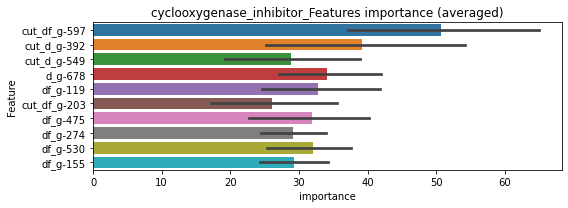

len(train_index) : 2227
len(valid_index) : 743
================================= fold 1/4 cyclooxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2227
len(valid_index) : 743
================================= fold 2/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[134]	training's binary_logloss: 0.00707536	valid_1's binary_logloss: 0.0895807
Training until validation scores don't improve for 30 rounds


len(train_index) : 2228
len(valid_index) : 742
================================= fold 3/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[157]	training's binary_logloss: 0.00525935	valid_1's binary_logloss: 0.0956663
Training until validation scores don't improve for 30 rounds


len(train_index) : 2228
len(valid_index) : 742
================================= fold 4/4 cyclooxygenase_inhibitor=================================


Early stopping, best iteration is:
[154]	training's binary_logloss: 0.00558709	valid_1's binary_logloss: 0.081396
Training until validation scores don't improve for 30 rounds


cyclooxygenase_inhibitor logloss: 0.08725090516710436
cyclooxygenase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[145]	training's binary_logloss: 0.00626613	valid_1's binary_logloss: 0.0823461


cytochrome_p450_inhibitor, len(trt): 104, len(othr): 3271
target_rate: 0.0043672 → Adj_target_rate: 0.0043519


selected negative label: 3271


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.00679488	valid_1's binary_logloss: 0.0988111
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00450021	valid_1's binary_logloss: 0.0939357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00238254	valid_1's binary_logloss: 0.0479414
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.993, PR-AUC:0.987
y_Threshold: 0.0134178, Threshold: 0.0418408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 159 → Positive_corect_labels: 640/3766
p_label_rate: 0.0100452 Vs.target_rate: 0.00437
Num_p_label: 40.0, Expected: 17.4, Threshold: 0.0418408, conf_0:0.02929, conf_1:0.05439


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00368646	valid_1's binary_logloss: 0.0689314


Num_p_label: 18.0, Expected: 17.4, Adj_threshold_1: 0.0718408
threshold: 0.0718408, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 640.0/3766, y_label_rate: 0.1699416
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00682328	valid_1's binary_logloss: 0.0943388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00246834	valid_1's binary_logloss: 0.0622677
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00119039	valid_1's binary_logloss: 0.0479802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.00138478	valid_1's binary_logloss: 0.0594435


2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0254948, Threshold: 0.0718408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 622.0/3730
p_label_rate: 0.0097941 Vs.target_rate: 0.00437
Num_p_label: 39.0, Expected: 17.4, Threshold: 0.0718408, conf_0:0.05747, conf_1:0.08621
Num_p_label: 28.0, Expected: 17.4, Adj_threshold_1: 0.1018408
Num_p_label: 19.0, Expected: 17.4, Adj_threshold_2: 0.1318408
threshold: 0.1318408, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 622.0/3730, y_label_rate: 0.1667560
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[320]	training's binary_logloss: 0.00324499	valid_1's binary_logloss: 0.065444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00149393	valid_1's binary_logloss: 0.0565107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00176597	valid_1's binary_logloss: 0.0369792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00169113	valid_1's binary_logloss: 0.0511321


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0202161, Threshold: 0.1318408, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 611.0/3708
p_label_rate: 0.0042692 Vs.target_rate: 0.00437
Num_p_label: 17.0, Expected: 17.4, Threshold: 0.1318408, conf_0:0.11866, conf_1:0.14502
threshold: 0.1318408, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 611.0/3708, y_label_rate: 0.1647789


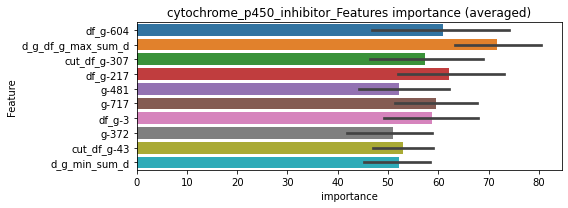

len(train_index) : 2781
len(valid_index) : 927
================================= fold 1/4 cytochrome_p450_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 2/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00281833	valid_1's binary_logloss: 0.0477189
Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 3/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[149]	training's binary_logloss: 0.00429887	valid_1's binary_logloss: 0.0673905
Training until validation scores don't improve for 30 rounds


len(train_index) : 2781
len(valid_index) : 927
================================= fold 4/4 cytochrome_p450_inhibitor=================================


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0020123	valid_1's binary_logloss: 0.0320537
Training until validation scores don't improve for 30 rounds


cytochrome_p450_inhibitor logloss: 0.04735609357171639
cytochrome_p450_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[163]	training's binary_logloss: 0.00406469	valid_1's binary_logloss: 0.0422613


dihydrofolate_reductase_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000478085	valid_1's binary_logloss: 0.0187846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00041956	valid_1's binary_logloss: 0.027507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000417274	valid_1's binary_logloss: 0.00639047
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017540, Threshold: 0.0052469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0052469, conf_0:0.00367, conf_1:0.00682
Num_p_label: 4.0, Expected: 6.0, Adj_threshold_1: 0.0352469


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000562353	valid_1's binary_logloss: 0.0175113


threshold: 0.0352469, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[568]	training's binary_logloss: 0.000371552	valid_1's binary_logloss: 0.0183443
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000435527	valid_1's binary_logloss: 0.0240495
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000460542	valid_1's binary_logloss: 0.00747417
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084502, Threshold: 0.0352469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0352469, conf_0:0.02820, conf_1:0.04230


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000575675	valid_1's binary_logloss: 0.0156348


threshold: 0.0352469, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.000934451	valid_1's binary_logloss: 0.0395647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000386067	valid_1's binary_logloss: 0.0118042
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000426048	valid_1's binary_logloss: 0.00224274
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097332, Threshold: 0.0352469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0032647 Vs.target_rate: 0.00151


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000454734	valid_1's binary_logloss: 0.0172751


Num_p_label: 13.0, Expected: 6.0, Threshold: 0.0352469, conf_0:0.03172, conf_1:0.03877
threshold: 0.0352469, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


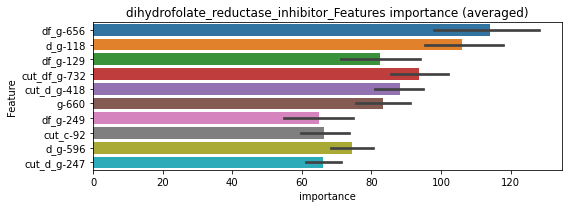

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 dihydrofolate_reductase_inhibitor=================================


Early stopping, best iteration is:
[164]	training's binary_logloss: 0.00167947	valid_1's binary_logloss: 0.0352431
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 dihydrofolate_reductase_inhibitor=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000662684	valid_1's binary_logloss: 0.0107458
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[771]	training's binary_logloss: 0.000394225	valid_1's binary_logloss: 0.00166932


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 dihydrofolate_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


dihydrofolate_reductase_inhibitor logloss: 0.015431014403925407


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000529451	valid_1's binary_logloss: 0.0140649


dipeptidyl_peptidase_inhibitor, len(trt): 25, len(othr): 3284
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000335276	valid_1's binary_logloss: 0.018171
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000381044	valid_1's binary_logloss: 0.012117
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000330794	valid_1's binary_logloss: 0.00649053
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011819, Threshold: 0.0027407, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0027407, conf_0:0.00192, conf_1:0.00356
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0327407


Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000325654	valid_1's binary_logloss: 0.0119668


threshold: 0.0327407, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000343605	valid_1's binary_logloss: 0.0151539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000325533	valid_1's binary_logloss: 0.0131228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000321877	valid_1's binary_logloss: 0.00697516
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0076903, Threshold: 0.0327407, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0007534 Vs.target_rate: 0.00105
Num_p_label: 3.0, Expected: 4.2, Threshold: 0.0327407, conf_0:0.02619, conf_1:0.03929
threshold: 0.0327407, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000376748	valid_1's binary_logloss: 0.00898111


positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00039588	valid_1's binary_logloss: 0.0240938
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000319283	valid_1's binary_logloss: 0.00426579
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000311962	valid_1's binary_logloss: 0.00329518
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0091762, Threshold: 0.0327407, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0005023 Vs.target_rate: 0.00105
Num_p_label: 2.0, Expected: 4.2, Threshold: 0.0327407, conf_0:0.02947, conf_1:0.03601
threshold: 0.0327407, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000350052	valid_1's binary_logloss: 0.00632442


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


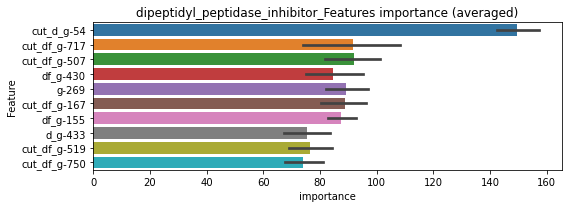

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00052458	valid_1's binary_logloss: 0.021142


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[682]	training's binary_logloss: 0.000335129	valid_1's binary_logloss: 0.00430983


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 dipeptidyl_peptidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 dipeptidyl_peptidase_inhibitor=================================


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000351155	valid_1's binary_logloss: 0.00415823
Training until validation scores don't improve for 30 rounds


dipeptidyl_peptidase_inhibitor logloss: 0.009162087758026388


Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000359906	valid_1's binary_logloss: 0.00703083


diuretic, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000154616	valid_1's binary_logloss: 0.00134691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00034635	valid_1's binary_logloss: 0.00610511
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000152323	valid_1's binary_logloss: 0.000147429
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005617, Threshold: 0.0017504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0017504, conf_0:0.00123, conf_1:0.00228
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0317504
threshold: 0.0317504, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00014881	valid_1's binary_logloss: 0.00058583


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000148434	valid_1's binary_logloss: 0.000677757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.000220373	valid_1's binary_logloss: 0.00611087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000151519	valid_1's binary_logloss: 0.00013318
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0227849, Threshold: 0.0317504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0317504, conf_0:0.02540, conf_1:0.03810
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0617504
threshold: 0.0617504, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00014701	valid_1's binary_logloss: 0.000145284


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000148434	valid_1's binary_logloss: 0.000677757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.000220373	valid_1's binary_logloss: 0.00611087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000151519	valid_1's binary_logloss: 0.00013318
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0227849, Threshold: 0.0617504, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0617504, conf_0:0.05558, conf_1:0.06793
threshold: 0.0617504, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00014701	valid_1's binary_logloss: 0.000145284


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


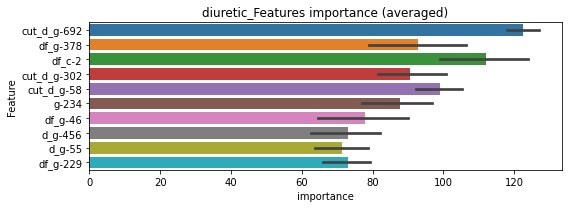

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 diuretic=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 diuretic=================================


Early stopping, best iteration is:
[680]	training's binary_logloss: 0.0001587	valid_1's binary_logloss: 0.00113011
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 diuretic=================================


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.000314562	valid_1's binary_logloss: 0.00532078
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 diuretic=================================


Early stopping, best iteration is:
[804]	training's binary_logloss: 0.000153205	valid_1's binary_logloss: 0.000132058
Training until validation scores don't improve for 30 rounds


diuretic logloss: 0.0016818685531860911


Early stopping, best iteration is:
[843]	training's binary_logloss: 0.000150864	valid_1's binary_logloss: 0.000145105


dna_alkylating_agent, len(trt): 48, len(othr): 3285
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.00176348	valid_1's binary_logloss: 0.0471078
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000623197	valid_1's binary_logloss: 0.0326661
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000480543	valid_1's binary_logloss: 0.010781
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000543354	valid_1's binary_logloss: 0.0281284


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0038920, Threshold: 0.0296615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0296615, conf_0:0.02076, conf_1:0.03856
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_1: 0.0596615
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_2: 0.0896615
threshold: 0.0896615, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.0008395	valid_1's binary_logloss: 0.046658
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000584616	valid_1's binary_logloss: 0.0299792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000533783	valid_1's binary_logloss: 0.00881919
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0180599, Threshold: 0.0896615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0140633 Vs.target_rate: 0.00202
Num_p_label: 56.0, Expected: 8.0, Threshold: 0.0896615, conf_0:0.07173, conf_1:0.10759
Num_p_label: 43.0, Expected: 8.0, Adj_threshold_1: 0.1196615
Num_p_label: 37.0, Expected: 8.0, Adj_threshold_2: 0.1496615
Num_p_label: 28.0, Expected: 8.0, Adj_threshold_3: 0.1796615
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_4: 0.2096615


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000687075	valid_1's binary_logloss: 0.0276829


Num_p_label: 22.0, Expected: 8.0, Adj_threshold_5: 0.2396615
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_6: 0.2696615
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_7: 0.2996615
threshold: 0.2996615, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 652.0/3800, y_label_rate: 0.1715789
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000723655	valid_1's binary_logloss: 0.028474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000553399	valid_1's binary_logloss: 0.0362866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000457509	valid_1's binary_logloss: 0.0101004
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0200298, Threshold: 0.2996615, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0075339 Vs.target_rate: 0.00202
Num_p_label: 30.0, Expected: 8.0, Threshold: 0.2996615, conf_0:0.26970, conf_1:0.32963
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_1: 0.3296615
Num_p_label: 22.0, Expected: 8.0, Adj_threshold_2: 0.3596615
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_3: 0.3896615


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000624917	valid_1's binary_logloss: 0.0247655


threshold: 0.3896615, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


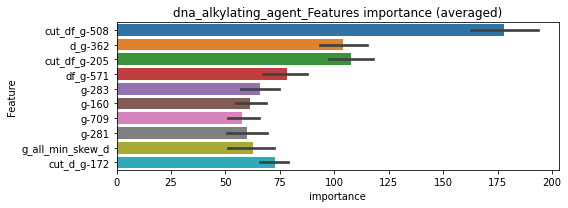

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 dna_alkylating_agent=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000781658	valid_1's binary_logloss: 0.0178181
Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00114966	valid_1's binary_logloss: 0.0293658


================================= fold 3/4 dna_alkylating_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 dna_alkylating_agent=================================


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.000749111	valid_1's binary_logloss: 0.0201952
Training until validation scores don't improve for 30 rounds


dna_alkylating_agent logloss: 0.02108273685669723


Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00106669	valid_1's binary_logloss: 0.0169518
mutually exclusive columns: dna_inhibitor


dna_inhibitor, len(trt): 402, len(othr): 7073
target_rate: 0.0168808 → Adj_target_rate: 0.0137338


selected negative label: 7073


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.0237452	valid_1's binary_logloss: 0.163073
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[300]	training's binary_logloss: 0.0316291	valid_1's binary_logloss: 0.181865
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.031477	valid_1's binary_logloss: 0.165054
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.0291556	valid_1's binary_logloss: 0.16614


1 / 3, AUC score:0.942, PR-AUC:0.902
y_Threshold: 0.0507837, Threshold: 0.0799540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 684 → Positive_corect_labels: 1214/7803
p_label_rate: 0.0100452 Vs.target_rate: 0.01688
Num_p_label: 40.0, Expected: 67.2, Threshold: 0.0799540, conf_0:0.05597, conf_1:0.10394
threshold: 0.0799540, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1214.0/7803, y_label_rate: 0.1555812
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.0079529	valid_1's binary_logloss: 0.0937899
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00979101	valid_1's binary_logloss: 0.0989217
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00822457	valid_1's binary_logloss: 0.0929641
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.0106022	valid_1's binary_logloss: 0.0835296


2 / 3, AUC score:0.988, PR-AUC:0.972
y_Threshold: 0.0389157, Threshold: 0.0799540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 174 → Positive_corect_labels: 1127.0/7629
p_label_rate: 0.0077850 Vs.target_rate: 0.01688
Num_p_label: 31.0, Expected: 67.2, Threshold: 0.0799540, conf_0:0.06396, conf_1:0.09594
threshold: 0.0799540, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 1127.0/7629, y_label_rate: 0.1477258
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00336302	valid_1's binary_logloss: 0.0482342
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00538873	valid_1's binary_logloss: 0.0703889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00308601	valid_1's binary_logloss: 0.0508344
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.00227552	valid_1's binary_logloss: 0.0425886


3 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0285047, Threshold: 0.0799540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 1088.0/7551
p_label_rate: 0.0080362 Vs.target_rate: 0.01688
Num_p_label: 32.0, Expected: 67.2, Threshold: 0.0799540, conf_0:0.07196, conf_1:0.08795
threshold: 0.0799540, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 1088.0/7551, y_label_rate: 0.1440869


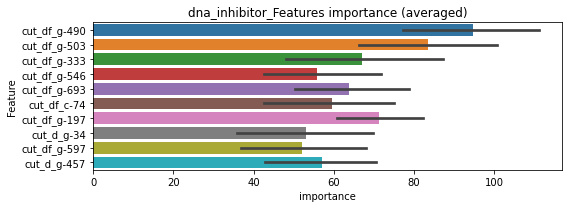

len(train_index) : 5663
len(valid_index) : 1888
================================= fold 1/4 dna_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5663
len(valid_index) : 1888
================================= fold 2/4 dna_inhibitor=================================


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00212781	valid_1's binary_logloss: 0.0325657
Training until validation scores don't improve for 30 rounds


len(train_index) : 5663
len(valid_index) : 1888
================================= fold 3/4 dna_inhibitor=================================


Early stopping, best iteration is:
[177]	training's binary_logloss: 0.00351091	valid_1's binary_logloss: 0.0344095
Training until validation scores don't improve for 30 rounds


len(train_index) : 5664
len(valid_index) : 1887
================================= fold 4/4 dna_inhibitor=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00435603	valid_1's binary_logloss: 0.0467855
Training until validation scores don't improve for 30 rounds


dna_inhibitor logloss: 0.03792506288545439
dna_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00213351	valid_1's binary_logloss: 0.0379396


dopamine_receptor_agonist, len(trt): 121, len(othr): 2089
target_rate: 0.0050810 → Adj_target_rate: 0.0049495


mutually exclusive columns: dopamine_receptor_agonist
selected negative label: 2089


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[225]	training's binary_logloss: 0.0162356	valid_1's binary_logloss: 0.207374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00426104	valid_1's binary_logloss: 0.104728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00845067	valid_1's binary_logloss: 0.119206
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.971, PR-AUC:0.942
y_Threshold: 0.0355702, Threshold: 0.0482960, pos_neg_ratio: 0.8000000
Remove_noisy_data: 163 → Positive_corect_labels: 378/2343
p_label_rate: 0.0100452 Vs.target_rate: 0.00508
Num_p_label: 40.0, Expected: 20.2, Threshold: 0.0482960, conf_0:0.03381, conf_1:0.06278
Num_p_label: 7.0, Expected: 20.2, Adj_threshold_1: 0.0782960
threshold: 0.0782960, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[217]	training's binary_logloss: 0.0200949	valid_1's binary_logloss: 0.174535


positive_y_label: 378.0/2343, y_label_rate: 0.1613316
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00671944	valid_1's binary_logloss: 0.128021
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00894934	valid_1's binary_logloss: 0.110878
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00821555	valid_1's binary_logloss: 0.0971353
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.989, PR-AUC:0.976
y_Threshold: 0.0403973, Threshold: 0.0782960, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 353.0/2293
p_label_rate: 0.0052737 Vs.target_rate: 0.00508
Num_p_label: 21.0, Expected: 20.2, Threshold: 0.0782960, conf_0:0.06264, conf_1:0.09396
threshold: 0.0782960, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00450805	valid_1's binary_logloss: 0.100895


positive_y_label: 353.0/2293, y_label_rate: 0.1539468
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00345312	valid_1's binary_logloss: 0.0880974
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00546458	valid_1's binary_logloss: 0.105782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00260336	valid_1's binary_logloss: 0.0540589
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0346805, Threshold: 0.0782960, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 341.0/2269
p_label_rate: 0.0032647 Vs.target_rate: 0.00508
Num_p_label: 13.0, Expected: 20.2, Threshold: 0.0782960, conf_0:0.07047, conf_1:0.08613
threshold: 0.0782960, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00207519	valid_1's binary_logloss: 0.060789


positive_y_label: 341.0/2269, y_label_rate: 0.1502865


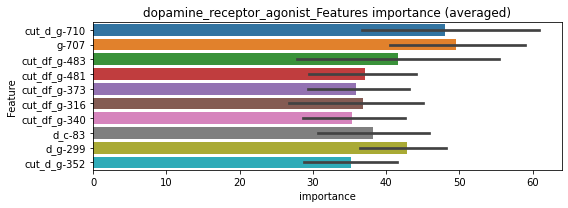

len(train_index) : 1701
len(valid_index) : 568
================================= fold 1/4 dopamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 1702
len(valid_index) : 567
================================= fold 2/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00473682	valid_1's binary_logloss: 0.0789388
Training until validation scores don't improve for 30 rounds


len(train_index) : 1702
len(valid_index) : 567
================================= fold 3/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[177]	training's binary_logloss: 0.00468378	valid_1's binary_logloss: 0.0823336
Training until validation scores don't improve for 30 rounds


len(train_index) : 1702
len(valid_index) : 567
================================= fold 4/4 dopamine_receptor_agonist=================================


Early stopping, best iteration is:
[254]	training's binary_logloss: 0.00283514	valid_1's binary_logloss: 0.0584258
Training until validation scores don't improve for 30 rounds


dopamine_receptor_agonist logloss: 0.07037860921312396
dopamine_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[148]	training's binary_logloss: 0.00650798	valid_1's binary_logloss: 0.0618011
mutually exclusive columns: dopamine_receptor_antagonist


dopamine_receptor_antagonist, len(trt): 424, len(othr): 7314
target_rate: 0.0178047 → Adj_target_rate: 0.0143701


selected negative label: 7314


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[284]	training's binary_logloss: 0.0389788	valid_1's binary_logloss: 0.182736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.0385724	valid_1's binary_logloss: 0.177092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0365889	valid_1's binary_logloss: 0.180398
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.930, PR-AUC:0.885
y_Threshold: 0.0583310, Threshold: 0.0795131, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.0347366	valid_1's binary_logloss: 0.174318


Remove_noisy_data: 790 → Positive_corect_labels: 1214/7986
p_label_rate: 0.0100452 Vs.target_rate: 0.01780
Num_p_label: 40.0, Expected: 70.9, Threshold: 0.0795131, conf_0:0.05566, conf_1:0.10337
threshold: 0.0795131, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1214.0/7986, y_label_rate: 0.1520160
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.00825752	valid_1's binary_logloss: 0.0901922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.0101969	valid_1's binary_logloss: 0.0964492
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00792913	valid_1's binary_logloss: 0.0868401
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00645193	valid_1's binary_logloss: 0.0755137


2 / 3, AUC score:0.990, PR-AUC:0.974
y_Threshold: 0.0357785, Threshold: 0.0795131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 182 → Positive_corect_labels: 1123.0/7804
p_label_rate: 0.0067805 Vs.target_rate: 0.01780
Num_p_label: 27.0, Expected: 70.9, Threshold: 0.0795131, conf_0:0.06361, conf_1:0.09542
threshold: 0.0795131, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 1123.0/7804, y_label_rate: 0.1439006
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00297385	valid_1's binary_logloss: 0.0458777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.0033152	valid_1's binary_logloss: 0.0497327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00280734	valid_1's binary_logloss: 0.0424341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.00235186	valid_1's binary_logloss: 0.046669


3 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0326837, Threshold: 0.0795131, pos_neg_ratio: 0.8000000
Remove_noisy_data: 88 → Positive_corect_labels: 1079.0/7716
p_label_rate: 0.0123054 Vs.target_rate: 0.01780
Num_p_label: 49.0, Expected: 70.9, Threshold: 0.0795131, conf_0:0.07156, conf_1:0.08746
threshold: 0.0795131, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1079.0/7716, y_label_rate: 0.1398393


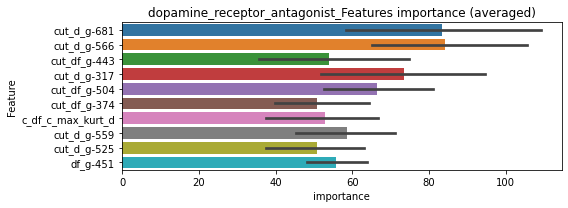

len(train_index) : 5787
len(valid_index) : 1929
================================= fold 1/4 dopamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 2/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.000995085	valid_1's binary_logloss: 0.0146921
Training until validation scores don't improve for 30 rounds


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 3/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00131474	valid_1's binary_logloss: 0.0238876
Training until validation scores don't improve for 30 rounds


len(train_index) : 5787
len(valid_index) : 1929
================================= fold 4/4 dopamine_receptor_antagonist=================================


Early stopping, best iteration is:
[222]	training's binary_logloss: 0.00168185	valid_1's binary_logloss: 0.0228494
Training until validation scores don't improve for 30 rounds


dopamine_receptor_antagonist logloss: 0.02079903284894295


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00146775	valid_1's binary_logloss: 0.0217671
mutually exclusive columns: egfr_inhibitor


egfr_inhibitor, len(trt): 336, len(othr): 7554
target_rate: 0.0141093 → Adj_target_rate: 0.0117920


selected negative label: 7554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.0158434	valid_1's binary_logloss: 0.122316
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.0169471	valid_1's binary_logloss: 0.129917
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.0178993	valid_1's binary_logloss: 0.137374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.018796	valid_1's binary_logloss: 0.139903


1 / 3, AUC score:0.967, PR-AUC:0.940
y_Threshold: 0.0391111, Threshold: 0.0726077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 589 → Positive_corect_labels: 1367/8475
p_label_rate: 0.0100452 Vs.target_rate: 0.01411
Num_p_label: 40.0, Expected: 56.2, Threshold: 0.0726077, conf_0:0.05083, conf_1:0.09439
threshold: 0.0726077, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1367.0/8475, y_label_rate: 0.1612979
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00508838	valid_1's binary_logloss: 0.060096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00493295	valid_1's binary_logloss: 0.0832728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00699091	valid_1's binary_logloss: 0.0762296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.00512829	valid_1's binary_logloss: 0.0797958


2 / 3, AUC score:0.994, PR-AUC:0.983
y_Threshold: 0.0348643, Threshold: 0.0726077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 156 → Positive_corect_labels: 1289.0/8319
p_label_rate: 0.0145655 Vs.target_rate: 0.01411
Num_p_label: 58.0, Expected: 56.2, Threshold: 0.0726077, conf_0:0.05809, conf_1:0.08713
threshold: 0.0726077, positive_p_label: 58.0/3982, p_label_rate: 0.0145655
positive_y_label: 1289.0/8319, y_label_rate: 0.1549465
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00332191	valid_1's binary_logloss: 0.0508742
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.00265175	valid_1's binary_logloss: 0.0473194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00221351	valid_1's binary_logloss: 0.037762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00286705	valid_1's binary_logloss: 0.0422257


3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0364374, Threshold: 0.0726077, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 1251.0/8243
p_label_rate: 0.0193370 Vs.target_rate: 0.01411
Num_p_label: 77.0, Expected: 56.2, Threshold: 0.0726077, conf_0:0.06535, conf_1:0.07987
threshold: 0.0726077, positive_p_label: 77.0/3982, p_label_rate: 0.0193370
positive_y_label: 1251.0/8243, y_label_rate: 0.1517651


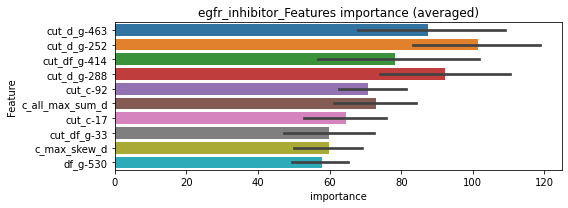

len(train_index) : 6182
len(valid_index) : 2061
================================= fold 1/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 6182
len(valid_index) : 2061


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00126858	valid_1's binary_logloss: 0.0270639


================================= fold 2/4 egfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 6182
len(valid_index) : 2061
================================= fold 3/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[216]	training's binary_logloss: 0.00240741	valid_1's binary_logloss: 0.0354563
Training until validation scores don't improve for 30 rounds


len(train_index) : 6183
len(valid_index) : 2060
================================= fold 4/4 egfr_inhibitor=================================


Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00151535	valid_1's binary_logloss: 0.027998
Training until validation scores don't improve for 30 rounds


egfr_inhibitor logloss: 0.031057398553519546
egfr_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00183413	valid_1's binary_logloss: 0.0337127


elastase_inhibitor, len(trt): 12, len(othr): 3287
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00021731	valid_1's binary_logloss: 0.00743131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000222571	valid_1's binary_logloss: 0.00271826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000208581	valid_1's binary_logloss: 0.000217773
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006912, Threshold: 0.0015813, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0015813, conf_0:0.00111, conf_1:0.00206
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0315813


Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000202326	valid_1's binary_logloss: 0.00216877


threshold: 0.0315813, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00020966	valid_1's binary_logloss: 0.00647402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000208228	valid_1's binary_logloss: 0.0023446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00020458	valid_1's binary_logloss: 0.000215224
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0076805, Threshold: 0.0315813, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, Expected: 2.0, Threshold: 0.0315813, conf_0:0.02527, conf_1:0.03790
threshold: 0.0315813, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000198115	valid_1's binary_logloss: 0.00215872


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00020966	valid_1's binary_logloss: 0.00647402
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000208228	valid_1's binary_logloss: 0.0023446
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00020458	valid_1's binary_logloss: 0.000215224
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0076805, Threshold: 0.0315813, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, Expected: 2.0, Threshold: 0.0315813, conf_0:0.02842, conf_1:0.03474


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000198115	valid_1's binary_logloss: 0.00215872


threshold: 0.0315813, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


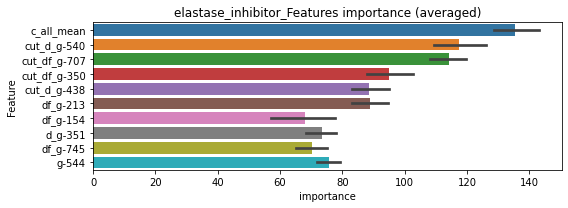

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 elastase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000261851	valid_1's binary_logloss: 0.00401967
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[755]	training's binary_logloss: 0.000210655	valid_1's binary_logloss: 0.00176177
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 elastase_inhibitor=================================


Early stopping, best iteration is:
[799]	training's binary_logloss: 0.000209838	valid_1's binary_logloss: 0.000220704
Training until validation scores don't improve for 30 rounds


elastase_inhibitor logloss: 0.0018236495582035794


Early stopping, best iteration is:
[745]	training's binary_logloss: 0.000211227	valid_1's binary_logloss: 0.00129246


erbb2_inhibitor, len(trt): 20, len(othr): 3286
target_rate: 0.0008398 → Adj_target_rate: 0.0010717


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[248]	training's binary_logloss: 0.00124385	valid_1's binary_logloss: 0.0180395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000285152	valid_1's binary_logloss: 0.0140802
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000285466	valid_1's binary_logloss: 0.001635
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016121, Threshold: 0.0023494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00084
Num_p_label: 40.0, Expected: 3.3, Threshold: 0.0023494, conf_0:0.00164, conf_1:0.00305
Num_p_label: 0.0, Expected: 3.3, Adj_threshold_1: 0.0323494


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000282861	valid_1's binary_logloss: 0.00507725


threshold: 0.0323494, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000319553	valid_1's binary_logloss: 0.0107799
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000280776	valid_1's binary_logloss: 0.00485533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000293828	valid_1's binary_logloss: 0.00419794
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0107039, Threshold: 0.0323494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00084
Num_p_label: 0.0, Expected: 3.3, Threshold: 0.0323494, conf_0:0.02588, conf_1:0.03882
threshold: 0.0323494, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000300429	valid_1's binary_logloss: 0.00423185


positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000319553	valid_1's binary_logloss: 0.0107799
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000280776	valid_1's binary_logloss: 0.00485533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000293828	valid_1's binary_logloss: 0.00419794
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0107039, Threshold: 0.0323494, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00084
Num_p_label: 0.0, Expected: 3.3, Threshold: 0.0323494, conf_0:0.02911, conf_1:0.03558
threshold: 0.0323494, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000300429	valid_1's binary_logloss: 0.00423185


positive_y_label: 656.0/3809, y_label_rate: 0.1722237


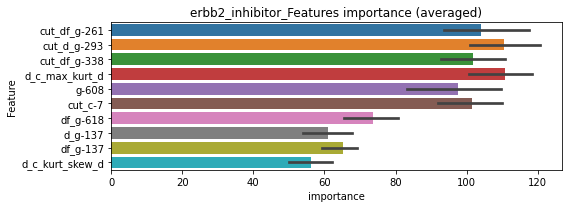

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 erbb2_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000314228	valid_1's binary_logloss: 0.00859177
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[703]	training's binary_logloss: 0.000288955	valid_1's binary_logloss: 0.00293093
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 erbb2_inhibitor=================================


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000394423	valid_1's binary_logloss: 0.00393481
Training until validation scores don't improve for 30 rounds


erbb2_inhibitor logloss: 0.005145592243003367


Early stopping, best iteration is:
[616]	training's binary_logloss: 0.00030434	valid_1's binary_logloss: 0.00511848
mutually exclusive columns: estrogen_receptor_agonist


estrogen_receptor_agonist, len(trt): 158, len(othr): 3996
target_rate: 0.0066348 → Adj_target_rate: 0.0062095


selected negative label: 3996


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.0070792	valid_1's binary_logloss: 0.100626
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00989085	valid_1's binary_logloss: 0.117106
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[311]	training's binary_logloss: 0.0094949	valid_1's binary_logloss: 0.104402
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.981, PR-AUC:0.964
y_Threshold: 0.0285481, Threshold: 0.0403452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 252 → Positive_corect_labels: 753/4543
p_label_rate: 0.0100452 Vs.target_rate: 0.00663
Num_p_label: 40.0, Expected: 26.4, Threshold: 0.0403452, conf_0:0.02824, conf_1:0.05245
Num_p_label: 7.0, Expected: 26.4, Adj_threshold_1: 0.0703452
threshold: 0.0703452, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[248]	training's binary_logloss: 0.0175308	valid_1's binary_logloss: 0.131673


positive_y_label: 753.0/4543, y_label_rate: 0.1657495
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00467603	valid_1's binary_logloss: 0.0815591
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.00655855	valid_1's binary_logloss: 0.0863989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00331781	valid_1's binary_logloss: 0.049872
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.997, PR-AUC:0.991
y_Threshold: 0.0367371, Threshold: 0.0703452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 721.0/4479
p_label_rate: 0.0045203 Vs.target_rate: 0.00663
Num_p_label: 18.0, Expected: 26.4, Threshold: 0.0703452, conf_0:0.05628, conf_1:0.08441
threshold: 0.0703452, positive_p_label: 18.0/3982, p_label_rate: 0.0045203


Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00663464	valid_1's binary_logloss: 0.0911794


positive_y_label: 721.0/4479, y_label_rate: 0.1609734
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00341942	valid_1's binary_logloss: 0.0583094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00319949	valid_1's binary_logloss: 0.0542645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00346457	valid_1's binary_logloss: 0.0491047
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00183684	valid_1's binary_logloss: 0.0563065


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0320562, Threshold: 0.0703452, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 703.0/4443
p_label_rate: 0.0062783 Vs.target_rate: 0.00663
Num_p_label: 25.0, Expected: 26.4, Threshold: 0.0703452, conf_0:0.06331, conf_1:0.07738
threshold: 0.0703452, positive_p_label: 25.0/3982, p_label_rate: 0.0062783
positive_y_label: 703.0/4443, y_label_rate: 0.1582264


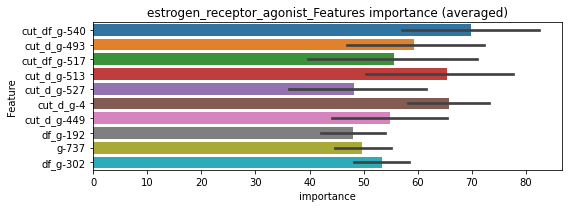

len(train_index) : 3332
len(valid_index) : 1111
================================= fold 1/4 estrogen_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 3332
len(valid_index) : 1111
================================= fold 2/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[282]	training's binary_logloss: 0.001785	valid_1's binary_logloss: 0.0398337
Training until validation scores don't improve for 30 rounds


len(train_index) : 3332
len(valid_index) : 1111
================================= fold 3/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[191]	training's binary_logloss: 0.00332058	valid_1's binary_logloss: 0.0385534
Training until validation scores don't improve for 30 rounds


len(train_index) : 3333
len(valid_index) : 1110
================================= fold 4/4 estrogen_receptor_agonist=================================


Early stopping, best iteration is:
[138]	training's binary_logloss: 0.00551608	valid_1's binary_logloss: 0.0520172
Training until validation scores don't improve for 30 rounds


estrogen_receptor_agonist logloss: 0.04825540722786355
estrogen_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00429949	valid_1's binary_logloss: 0.0626303


estrogen_receptor_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000522889	valid_1's binary_logloss: 0.0383203
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00140595	valid_1's binary_logloss: 0.0277012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000507956	valid_1's binary_logloss: 0.00455297
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0048569, Threshold: 0.0374580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0374580, conf_0:0.02622, conf_1:0.04870
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_1: 0.0674580
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.0974580
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.1274580
Num_p_label: 19.0, Expected: 8.0, Adj_threshold_4: 0.1574580
threshold: 0.1574580, positive_p_label: 19.0/3982, p_label_rate: 0.0047715


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00325852	valid_1's binary_logloss: 0.043791


positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000561358	valid_1's binary_logloss: 0.0233865
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000762779	valid_1's binary_logloss: 0.0264029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000592857	valid_1's binary_logloss: 0.0267707
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0113312, Threshold: 0.1574580, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000565426	valid_1's binary_logloss: 0.0134603


Remove_noisy_data: 10 → Positive_corect_labels: 648.0/3792
p_label_rate: 0.0075339 Vs.target_rate: 0.00202
Num_p_label: 30.0, Expected: 8.0, Threshold: 0.1574580, conf_0:0.12597, conf_1:0.18895
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_1: 0.1874580
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_2: 0.2174580
Num_p_label: 23.0, Expected: 8.0, Adj_threshold_3: 0.2474580
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_4: 0.2774580
threshold: 0.2774580, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 648.0/3792, y_label_rate: 0.1708861
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000590822	valid_1's binary_logloss: 0.0236587
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000576907	valid_1's binary_logloss: 0.022938
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000540876	valid_1's binary_logloss: 0.0161029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000439598	valid_1's binary_logloss: 0.0118612


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0121353, Threshold: 0.2774580, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 647.0/3790
p_label_rate: 0.0052737 Vs.target_rate: 0.00202
Num_p_label: 21.0, Expected: 8.0, Threshold: 0.2774580, conf_0:0.24971, conf_1:0.30520
Num_p_label: 17.0, Expected: 8.0, Adj_threshold_1: 0.3074580
threshold: 0.3074580, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 647.0/3790, y_label_rate: 0.1707124


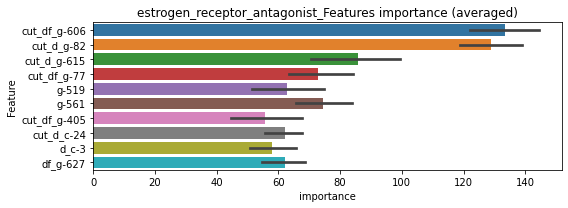

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 estrogen_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00056502	valid_1's binary_logloss: 0.0188453
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[352]	training's binary_logloss: 0.000779798	valid_1's binary_logloss: 0.0214575
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 estrogen_receptor_antagonist=================================


Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000556664	valid_1's binary_logloss: 0.0189784
Training until validation scores don't improve for 30 rounds


estrogen_receptor_antagonist logloss: 0.019301610135570173


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00106242	valid_1's binary_logloss: 0.0179234


faah_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00051893	valid_1's binary_logloss: 0.0259338
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000498815	valid_1's binary_logloss: 0.0339844
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000682083	valid_1's binary_logloss: 0.00994867
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017619, Threshold: 0.0041907, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000418985	valid_1's binary_logloss: 0.0156899


Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0041907, conf_0:0.00293, conf_1:0.00545
Num_p_label: 1.0, Expected: 6.0, Adj_threshold_1: 0.0341907
threshold: 0.0341907, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000495702	valid_1's binary_logloss: 0.0256299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000524677	valid_1's binary_logloss: 0.0343623
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000459533	valid_1's binary_logloss: 0.0104397
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0092868, Threshold: 0.0341907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, Expected: 6.0, Threshold: 0.0341907, conf_0:0.02735, conf_1:0.04103
threshold: 0.0341907, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000490746	valid_1's binary_logloss: 0.0148567


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000485134	valid_1's binary_logloss: 0.0349875
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000908415	valid_1's binary_logloss: 0.0244262
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000381669	valid_1's binary_logloss: 0.000911756
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0101616, Threshold: 0.0341907, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0005023 Vs.target_rate: 0.00151
Num_p_label: 2.0, Expected: 6.0, Threshold: 0.0341907, conf_0:0.03077, conf_1:0.03761


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000558555	valid_1's binary_logloss: 0.023922


threshold: 0.0341907, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


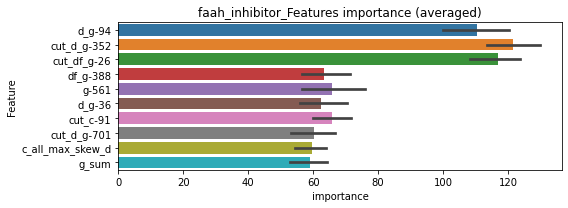

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 faah_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 faah_inhibitor=================================


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.000736237	valid_1's binary_logloss: 0.0245053
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 faah_inhibitor=================================


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.0007022	valid_1's binary_logloss: 0.0138603
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 faah_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000458856	valid_1's binary_logloss: 0.0123289
Training until validation scores don't improve for 30 rounds


faah_inhibitor logloss: 0.017805096069983154


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.00066438	valid_1's binary_logloss: 0.020523


farnesyltransferase_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000279207	valid_1's binary_logloss: 0.00468813
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000326364	valid_1's binary_logloss: 0.00894331
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000285494	valid_1's binary_logloss: 0.000378778
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0015661, Threshold: 0.0026844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0026844, conf_0:0.00188, conf_1:0.00349
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0326844


Early stopping, best iteration is:
[249]	training's binary_logloss: 0.00116289	valid_1's binary_logloss: 0.0182353


threshold: 0.0326844, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000283307	valid_1's binary_logloss: 0.00526394
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.000349503	valid_1's binary_logloss: 0.00807184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000285409	valid_1's binary_logloss: 0.000367423
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0085516, Threshold: 0.0326844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0326844, conf_0:0.02615, conf_1:0.03922
threshold: 0.0326844, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[245]	training's binary_logloss: 0.00123262	valid_1's binary_logloss: 0.0171671


positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000285791	valid_1's binary_logloss: 0.00826544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000283229	valid_1's binary_logloss: 0.00846074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000285348	valid_1's binary_logloss: 0.00035443
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0088018, Threshold: 0.0326844, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3809
p_label_rate: 0.0000000 Vs.target_rate: 0.00076
Num_p_label: 0.0, Expected: 3.0, Threshold: 0.0326844, conf_0:0.02942, conf_1:0.03595
threshold: 0.0326844, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000325879	valid_1's binary_logloss: 0.0101674


positive_y_label: 655.0/3809, y_label_rate: 0.1719611


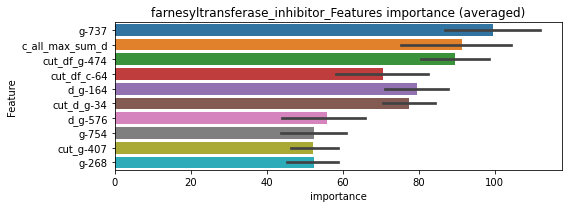

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 farnesyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000287473	valid_1's binary_logloss: 0.00569184
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000294494	valid_1's binary_logloss: 0.00139494
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 farnesyltransferase_inhibitor=================================


Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000334504	valid_1's binary_logloss: 0.00694024
Training until validation scores don't improve for 30 rounds


farnesyltransferase_inhibitor logloss: 0.004708080125749659


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000345772	valid_1's binary_logloss: 0.00480362


fatty_acid_receptor_agonist, len(trt): 25, len(othr): 3287
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000335463	valid_1's binary_logloss: 0.00924284
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.00039516	valid_1's binary_logloss: 0.0153627
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000334627	valid_1's binary_logloss: 0.00326135
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012794, Threshold: 0.0035314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0035314, conf_0:0.00247, conf_1:0.00459
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0335314


Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000327515	valid_1's binary_logloss: 0.00711483


threshold: 0.0335314, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000355058	valid_1's binary_logloss: 0.00920019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000319461	valid_1's binary_logloss: 0.0156988
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000362199	valid_1's binary_logloss: 0.00280078
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215827, Threshold: 0.0335314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0335314, conf_0:0.02683, conf_1:0.04024


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000325919	valid_1's binary_logloss: 0.00652069


threshold: 0.0335314, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000355058	valid_1's binary_logloss: 0.00920019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000319461	valid_1's binary_logloss: 0.0156988
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000362199	valid_1's binary_logloss: 0.00280078
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0215827, Threshold: 0.0335314, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0335314, conf_0:0.03018, conf_1:0.03688


Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000325919	valid_1's binary_logloss: 0.00652069


threshold: 0.0335314, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


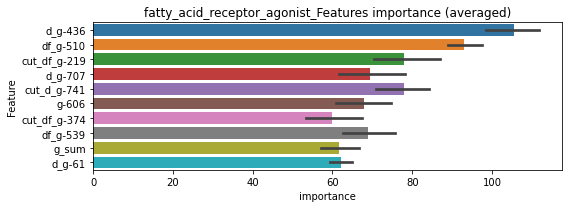

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 fatty_acid_receptor_agonist=================================


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000415877	valid_1's binary_logloss: 0.00880335
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 fatty_acid_receptor_agonist=================================


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000365935	valid_1's binary_logloss: 0.0121541
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000353	valid_1's binary_logloss: 0.00312232


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 fatty_acid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[714]	training's binary_logloss: 0.00032978	valid_1's binary_logloss: 0.00648109


fatty_acid_receptor_agonist logloss: 0.007641203365504829
fgfr_inhibitor, len(trt): 50, len(othr): 3287
target_rate: 0.0020996 → Adj_target_rate: 0.0023352


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000552169	valid_1's binary_logloss: 0.0323703
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00136782	valid_1's binary_logloss: 0.0490049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000702443	valid_1's binary_logloss: 0.0134916
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0038278, Threshold: 0.0124609, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000667733	valid_1's binary_logloss: 0.0227948


Remove_noisy_data: 134 → Positive_corect_labels: 656/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00210
Num_p_label: 40.0, Expected: 8.4, Threshold: 0.0124609, conf_0:0.00872, conf_1:0.01620
Num_p_label: 11.0, Expected: 8.4, Adj_threshold_1: 0.0424609
threshold: 0.0424609, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00171607	valid_1's binary_logloss: 0.0437209
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000568494	valid_1's binary_logloss: 0.0237555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000526168	valid_1's binary_logloss: 0.00545188
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0152926, Threshold: 0.0424609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3800
p_label_rate: 0.0030136 Vs.target_rate: 0.00210
Num_p_label: 12.0, Expected: 8.4, Threshold: 0.0424609, conf_0:0.03397, conf_1:0.05095
threshold: 0.0424609, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00126288	valid_1's binary_logloss: 0.0369431


positive_y_label: 651.0/3800, y_label_rate: 0.1713158
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000778927	valid_1's binary_logloss: 0.020895
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000777327	valid_1's binary_logloss: 0.0435118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000458175	valid_1's binary_logloss: 0.012037
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0157546, Threshold: 0.0424609, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3796
p_label_rate: 0.0025113 Vs.target_rate: 0.00210
Num_p_label: 10.0, Expected: 8.4, Threshold: 0.0424609, conf_0:0.03821, conf_1:0.04671
threshold: 0.0424609, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000930033	valid_1's binary_logloss: 0.020144


positive_y_label: 649.0/3796, y_label_rate: 0.1709694


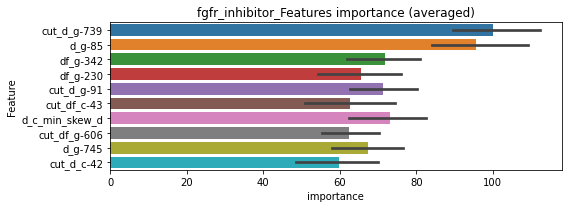

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00080065	valid_1's binary_logloss: 0.0217016


================================= fold 2/4 fgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 fgfr_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000789864	valid_1's binary_logloss: 0.0276354
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 fgfr_inhibitor=================================


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000818257	valid_1's binary_logloss: 0.0167752
Training until validation scores don't improve for 30 rounds


fgfr_inhibitor logloss: 0.021174389174933847


Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00105561	valid_1's binary_logloss: 0.0185853
mutually exclusive columns: flt3_inhibitor


flt3_inhibitor, len(trt): 279, len(othr): 6506
target_rate: 0.0117158 → Adj_target_rate: 0.0100684


selected negative label: 6506


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.0116334	valid_1's binary_logloss: 0.128434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.0141439	valid_1's binary_logloss: 0.129102
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00709682	valid_1's binary_logloss: 0.0971228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.0112898	valid_1's binary_logloss: 0.124084


1 / 3, AUC score:0.978, PR-AUC:0.958
y_Threshold: 0.0304782, Threshold: 0.0469266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 443 → Positive_corect_labels: 1210/7364
p_label_rate: 0.0100452 Vs.target_rate: 0.01172
Num_p_label: 40.0, Expected: 46.7, Threshold: 0.0469266, conf_0:0.03285, conf_1:0.06100
threshold: 0.0469266, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1210.0/7364, y_label_rate: 0.1643129
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00760687	valid_1's binary_logloss: 0.0878124
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00599984	valid_1's binary_logloss: 0.0844642
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.00517282	valid_1's binary_logloss: 0.079128
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00653938	valid_1's binary_logloss: 0.0736707


2 / 3, AUC score:0.996, PR-AUC:0.988
y_Threshold: 0.0354938, Threshold: 0.0469266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 114 → Positive_corect_labels: 1153.0/7250
p_label_rate: 0.0138122 Vs.target_rate: 0.01172
Num_p_label: 55.0, Expected: 46.7, Threshold: 0.0469266, conf_0:0.03754, conf_1:0.05631
threshold: 0.0469266, positive_p_label: 55.0/3982, p_label_rate: 0.0138122
positive_y_label: 1153.0/7250, y_label_rate: 0.1590345
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[460]	training's binary_logloss: 0.00287783	valid_1's binary_logloss: 0.049249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00580157	valid_1's binary_logloss: 0.0792357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00212968	valid_1's binary_logloss: 0.0467635
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.00425044	valid_1's binary_logloss: 0.0609091


3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0256692, Threshold: 0.0469266, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 1115.0/7174
p_label_rate: 0.0128076 Vs.target_rate: 0.01172
Num_p_label: 51.0, Expected: 46.7, Threshold: 0.0469266, conf_0:0.04223, conf_1:0.05162
threshold: 0.0469266, positive_p_label: 51.0/3982, p_label_rate: 0.0128076
positive_y_label: 1115.0/7174, y_label_rate: 0.1554224


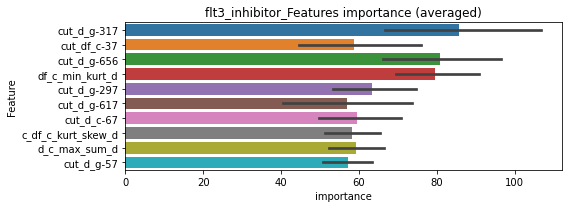

len(train_index) : 5380
len(valid_index) : 1794
================================= fold 1/4 flt3_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5380
len(valid_index) : 1794
================================= fold 2/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00265195	valid_1's binary_logloss: 0.0367965
Training until validation scores don't improve for 30 rounds


len(train_index) : 5381
len(valid_index) : 1793
================================= fold 3/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00396146	valid_1's binary_logloss: 0.0493176
Training until validation scores don't improve for 30 rounds


len(train_index) : 5381
len(valid_index) : 1793
================================= fold 4/4 flt3_inhibitor=================================


Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00210184	valid_1's binary_logloss: 0.0422924
Training until validation scores don't improve for 30 rounds


flt3_inhibitor logloss: 0.045156110441855614
flt3_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00437574	valid_1's binary_logloss: 0.0522203


focal_adhesion_kinase_inhibitor, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000271838	valid_1's binary_logloss: 0.00793293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000286545	valid_1's binary_logloss: 0.00988716
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000261631	valid_1's binary_logloss: 0.00116966
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014842, Threshold: 0.0042983, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0042983, conf_0:0.00301, conf_1:0.00559
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0342983
threshold: 0.0342983, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[264]	training's binary_logloss: 0.000941558	valid_1's binary_logloss: 0.0118282


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000295047	valid_1's binary_logloss: 0.0085466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000314474	valid_1's binary_logloss: 0.0087425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000265202	valid_1's binary_logloss: 0.000783798
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084021, Threshold: 0.0342983, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0342983, conf_0:0.02744, conf_1:0.04116


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000456029	valid_1's binary_logloss: 0.0103366


threshold: 0.0342983, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000295047	valid_1's binary_logloss: 0.0085466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000314474	valid_1's binary_logloss: 0.0087425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000265202	valid_1's binary_logloss: 0.000783798
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0084021, Threshold: 0.0342983, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0342983, conf_0:0.03087, conf_1:0.03773


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.000456029	valid_1's binary_logloss: 0.0103366


threshold: 0.0342983, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


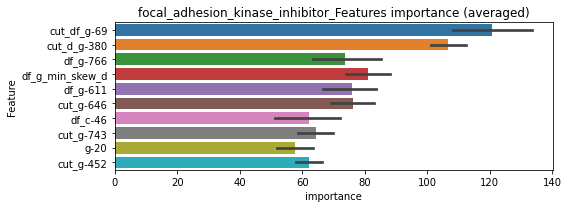

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 focal_adhesion_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.00035646	valid_1's binary_logloss: 0.00700287
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000325219	valid_1's binary_logloss: 0.00722652
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 focal_adhesion_kinase_inhibitor=================================


Early stopping, best iteration is:
[665]	training's binary_logloss: 0.000288536	valid_1's binary_logloss: 0.000865894
Training until validation scores don't improve for 30 rounds


focal_adhesion_kinase_inhibitor logloss: 0.006092832126561444


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000298586	valid_1's binary_logloss: 0.00927535


free_radical_scavenger, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000264936	valid_1's binary_logloss: 0.00316223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000271366	valid_1's binary_logloss: 0.0104068
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000264872	valid_1's binary_logloss: 0.000626039
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0008116, Threshold: 0.0027836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0027836, conf_0:0.00195, conf_1:0.00362
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0327836
threshold: 0.0327836, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000298777	valid_1's binary_logloss: 0.00521005


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000261831	valid_1's binary_logloss: 0.00292388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000302458	valid_1's binary_logloss: 0.0105129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.0002596	valid_1's binary_logloss: 0.000561966
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226803, Threshold: 0.0327836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0327836, conf_0:0.02623, conf_1:0.03934


Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000255386	valid_1's binary_logloss: 0.00346875


threshold: 0.0327836, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000261831	valid_1's binary_logloss: 0.00292388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000302458	valid_1's binary_logloss: 0.0105129
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.0002596	valid_1's binary_logloss: 0.000561966
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0226803, Threshold: 0.0327836, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.0327836, conf_0:0.02951, conf_1:0.03606
threshold: 0.0327836, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000255386	valid_1's binary_logloss: 0.00346875


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


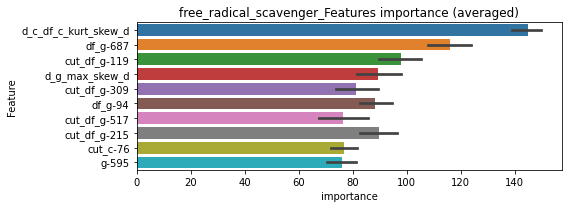

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 free_radical_scavenger=================================


Early stopping, best iteration is:
[722]	training's binary_logloss: 0.000266269	valid_1's binary_logloss: 0.00161177
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 free_radical_scavenger=================================


Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000262501	valid_1's binary_logloss: 0.00887456
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[836]	training's binary_logloss: 0.000260895	valid_1's binary_logloss: 0.000461861


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 free_radical_scavenger=================================


Training until validation scores don't improve for 30 rounds


free_radical_scavenger logloss: 0.003489649450150215


Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000265966	valid_1's binary_logloss: 0.00301002


fungal_squalene_epoxidase_inhibitor, len(trt): 23, len(othr): 3286
target_rate: 0.0009658 → Adj_target_rate: 0.0012069


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000369905	valid_1's binary_logloss: 0.00777557
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.000970176	valid_1's binary_logloss: 0.02991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000318815	valid_1's binary_logloss: 0.00136283
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017455, Threshold: 0.0064023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00097
Num_p_label: 40.0, Expected: 3.8, Threshold: 0.0064023, conf_0:0.00448, conf_1:0.00832
Num_p_label: 0.0, Expected: 3.8, Adj_threshold_1: 0.0364023
threshold: 0.0364023, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000337436	valid_1's binary_logloss: 0.00798199


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000359138	valid_1's binary_logloss: 0.00773897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00164429	valid_1's binary_logloss: 0.0292114
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[518]	training's binary_logloss: 0.000326406	valid_1's binary_logloss: 0.000763167
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0169783, Threshold: 0.0364023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0017579 Vs.target_rate: 0.00097
Num_p_label: 7.0, Expected: 3.8, Threshold: 0.0364023, conf_0:0.02912, conf_1:0.04368


Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000321517	valid_1's binary_logloss: 0.00665772


threshold: 0.0364023, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000327617	valid_1's binary_logloss: 0.0109695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000337156	valid_1's binary_logloss: 0.0133314
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000320603	valid_1's binary_logloss: 0.00295143
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000322378	valid_1's binary_logloss: 0.00652616


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0114570, Threshold: 0.0364023, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0010045 Vs.target_rate: 0.00097
Num_p_label: 4.0, Expected: 3.8, Threshold: 0.0364023, conf_0:0.03276, conf_1:0.04004
threshold: 0.0364023, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


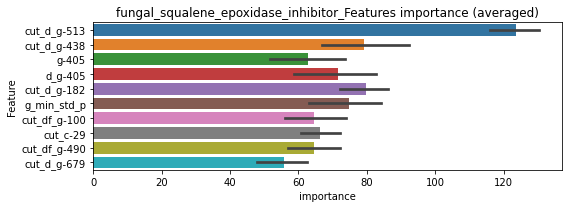

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 fungal_squalene_epoxidase_inhibitor=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000365434	valid_1's binary_logloss: 0.00883932
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 fungal_squalene_epoxidase_inhibitor=================================


Early stopping, best iteration is:
[621]	training's binary_logloss: 0.000339921	valid_1's binary_logloss: 0.0105082
Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952


Early stopping, best iteration is:
[688]	training's binary_logloss: 0.000337214	valid_1's binary_logloss: 0.00257446


================================= fold 4/4 fungal_squalene_epoxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


fungal_squalene_epoxidase_inhibitor logloss: 0.006759439571662763


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000432868	valid_1's binary_logloss: 0.00511336


gaba_receptor_agonist, len(trt): 106, len(othr): 3267
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3267


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00325815	valid_1's binary_logloss: 0.0983694
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00314632	valid_1's binary_logloss: 0.0814327
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00393527	valid_1's binary_logloss: 0.0766066
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0123638, Threshold: 0.0558119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 159 → Positive_corect_labels: 639/3761
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.0558119, conf_0:0.03907, conf_1:0.07256
Num_p_label: 20.0, Expected: 17.7, Adj_threshold_1: 0.0858119


Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00246252	valid_1's binary_logloss: 0.0621877


threshold: 0.0858119, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 639.0/3761, y_label_rate: 0.1699016
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[266]	training's binary_logloss: 0.00567233	valid_1's binary_logloss: 0.104697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.00482631	valid_1's binary_logloss: 0.0838779
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000938152	valid_1's binary_logloss: 0.0409489
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0264909, Threshold: 0.0858119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 615.0/3713
p_label_rate: 0.0145655 Vs.target_rate: 0.00445
Num_p_label: 58.0, Expected: 17.7, Threshold: 0.0858119, conf_0:0.06865, conf_1:0.10297
Num_p_label: 43.0, Expected: 17.7, Adj_threshold_1: 0.1158119
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_2: 0.1458119
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_3: 0.1758119
Num_p_label: 21.0, Expected: 17.7, Adj_threshold_4: 0.2058119


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00328097	valid_1's binary_logloss: 0.0523121


threshold: 0.2058119, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 615.0/3713, y_label_rate: 0.1656343
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.00171286	valid_1's binary_logloss: 0.0536432
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00236996	valid_1's binary_logloss: 0.0584442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00179117	valid_1's binary_logloss: 0.0496534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00160855	valid_1's binary_logloss: 0.0490268


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0244351, Threshold: 0.2058119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 603.0/3689
p_label_rate: 0.0107986 Vs.target_rate: 0.00445
Num_p_label: 43.0, Expected: 17.7, Threshold: 0.2058119, conf_0:0.18523, conf_1:0.22639
Num_p_label: 42.0, Expected: 17.7, Adj_threshold_1: 0.2358119
Num_p_label: 35.0, Expected: 17.7, Adj_threshold_2: 0.2658119
Num_p_label: 29.0, Expected: 17.7, Adj_threshold_3: 0.2958119
Num_p_label: 27.0, Expected: 17.7, Adj_threshold_4: 0.3258119
Num_p_label: 23.0, Expected: 17.7, Adj_threshold_5: 0.3558119
threshold: 0.3558119, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 603.0/3689, y_label_rate: 0.1634589


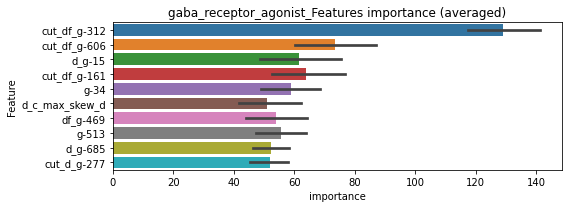

len(train_index) : 2766
len(valid_index) : 923
================================= fold 1/4 gaba_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2767
len(valid_index) : 922
================================= fold 2/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[145]	training's binary_logloss: 0.00398621	valid_1's binary_logloss: 0.0721943
Training until validation scores don't improve for 30 rounds


len(train_index) : 2767
len(valid_index) : 922
================================= fold 3/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00164203	valid_1's binary_logloss: 0.0380738
Training until validation scores don't improve for 30 rounds


len(train_index) : 2767
len(valid_index) : 922
================================= fold 4/4 gaba_receptor_agonist=================================


Early stopping, best iteration is:
[271]	training's binary_logloss: 0.00178513	valid_1's binary_logloss: 0.0236175
Training until validation scores don't improve for 30 rounds


gaba_receptor_agonist logloss: 0.04284309332969867
gaba_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00141625	valid_1's binary_logloss: 0.037455
mutually exclusive columns: gaba_receptor_antagonist


gaba_receptor_antagonist, len(trt): 165, len(othr): 4671
target_rate: 0.0069287 → Adj_target_rate: 0.0064426


selected negative label: 4671


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00584119	valid_1's binary_logloss: 0.0899964
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0116863	valid_1's binary_logloss: 0.112696
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00969029	valid_1's binary_logloss: 0.101283
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.985, PR-AUC:0.970
y_Threshold: 0.0221119, Threshold: 0.0323540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 287 → Positive_corect_labels: 884/5318
p_label_rate: 0.0100452 Vs.target_rate: 0.00693
Num_p_label: 40.0, Expected: 27.6, Threshold: 0.0323540, conf_0:0.02265, conf_1:0.04206
threshold: 0.0323540, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[311]	training's binary_logloss: 0.00943726	valid_1's binary_logloss: 0.105078


positive_y_label: 884.0/5318, y_label_rate: 0.1662279
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00528909	valid_1's binary_logloss: 0.0675459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00993004	valid_1's binary_logloss: 0.0847438
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[312]	training's binary_logloss: 0.00583837	valid_1's binary_logloss: 0.0781458
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.002758	valid_1's binary_logloss: 0.0613341


2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0336819, Threshold: 0.0323540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 78 → Positive_corect_labels: 845.0/5240
p_label_rate: 0.0138122 Vs.target_rate: 0.00693
Num_p_label: 55.0, Expected: 27.6, Threshold: 0.0323540, conf_0:0.02588, conf_1:0.03882
Num_p_label: 12.0, Expected: 27.6, Adj_threshold_1: 0.0623540
threshold: 0.0623540, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 845.0/5240, y_label_rate: 0.1612595
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.00226085	valid_1's binary_logloss: 0.0416564
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.0027362	valid_1's binary_logloss: 0.0569999
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.0023263	valid_1's binary_logloss: 0.0371595
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0255862, Threshold: 0.0623540, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 830.0/5210
p_label_rate: 0.0015068 Vs.target_rate: 0.00693
Num_p_label: 6.0, Expected: 27.6, Threshold: 0.0623540, conf_0:0.05612, conf_1:0.06859


Early stopping, best iteration is:
[355]	training's binary_logloss: 0.00270902	valid_1's binary_logloss: 0.0529761


threshold: 0.0623540, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 830.0/5210, y_label_rate: 0.1593090


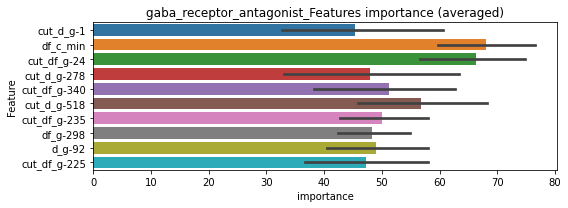

len(train_index) : 3907
len(valid_index) : 1303
================================= fold 1/4 gaba_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 3907
len(valid_index) : 1303
================================= fold 2/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[154]	training's binary_logloss: 0.00411786	valid_1's binary_logloss: 0.0360904
Training until validation scores don't improve for 30 rounds


len(train_index) : 3908
len(valid_index) : 1302
================================= fold 3/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[156]	training's binary_logloss: 0.00394505	valid_1's binary_logloss: 0.0447125
Training until validation scores don't improve for 30 rounds


len(train_index) : 3908
len(valid_index) : 1302
================================= fold 4/4 gaba_receptor_antagonist=================================


Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00296732	valid_1's binary_logloss: 0.047534
Training until validation scores don't improve for 30 rounds


gaba_receptor_antagonist logloss: 0.04412118838778349
gaba_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00357797	valid_1's binary_logloss: 0.0481535


gamma_secretase_inhibitor, len(trt): 56, len(othr): 3280
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3280


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[235]	training's binary_logloss: 0.00354902	valid_1's binary_logloss: 0.07082
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000486609	valid_1's binary_logloss: 0.0302702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[617]	training's binary_logloss: 0.000501517	valid_1's binary_logloss: 0.00891355
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0054797, Threshold: 0.0127653, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000719575	valid_1's binary_logloss: 0.0318417


Remove_noisy_data: 132 → Positive_corect_labels: 656/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0127653, conf_0:0.00894, conf_1:0.01659
Num_p_label: 5.0, Expected: 9.4, Adj_threshold_1: 0.0427653
threshold: 0.0427653, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3804, y_label_rate: 0.1724501
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00270518	valid_1's binary_logloss: 0.0684045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000610164	valid_1's binary_logloss: 0.0323432
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000541263	valid_1's binary_logloss: 0.00854315
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000581815	valid_1's binary_logloss: 0.0290429


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0165696, Threshold: 0.0427653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0060271 Vs.target_rate: 0.00235
Num_p_label: 24.0, Expected: 9.4, Threshold: 0.0427653, conf_0:0.03421, conf_1:0.05132
Num_p_label: 13.0, Expected: 9.4, Adj_threshold_1: 0.0727653
threshold: 0.0727653, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000604734	valid_1's binary_logloss: 0.0250886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000794843	valid_1's binary_logloss: 0.039346
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000524239	valid_1's binary_logloss: 0.0205588
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155630, Threshold: 0.0727653, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 648.0/3788
p_label_rate: 0.0030136 Vs.target_rate: 0.00235


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000723637	valid_1's binary_logloss: 0.0327646


Num_p_label: 12.0, Expected: 9.4, Threshold: 0.0727653, conf_0:0.06549, conf_1:0.08004
threshold: 0.0727653, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 648.0/3788, y_label_rate: 0.1710665


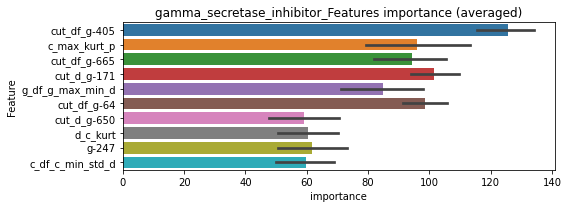

len(train_index) : 2841
len(valid_index) : 947
================================= fold 1/4 gamma_secretase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 2/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000886183	valid_1's binary_logloss: 0.024561
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 3/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.00114766	valid_1's binary_logloss: 0.0310616
Training until validation scores don't improve for 30 rounds


len(train_index) : 2841
len(valid_index) : 947
================================= fold 4/4 gamma_secretase_inhibitor=================================


Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000753583	valid_1's binary_logloss: 0.0245991
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000641294	valid_1's binary_logloss: 0.0260761


gamma_secretase_inhibitor logloss: 0.026574430866237505


mutually exclusive columns: glucocorticoid_receptor_agonist


glucocorticoid_receptor_agonist, len(trt): 266, len(othr): 7168
target_rate: 0.0111699 → Adj_target_rate: 0.0096682


selected negative label: 7168


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[340]	training's binary_logloss: 0.0130116	valid_1's binary_logloss: 0.118152
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.0127534	valid_1's binary_logloss: 0.116233
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00642738	valid_1's binary_logloss: 0.0984684
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00661483	valid_1's binary_logloss: 0.103183


1 / 3, AUC score:0.981, PR-AUC:0.965
y_Threshold: 0.0247209, Threshold: 0.0352059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 448 → Positive_corect_labels: 1353/8153
p_label_rate: 0.0100452 Vs.target_rate: 0.01117
Num_p_label: 40.0, Expected: 44.5, Threshold: 0.0352059, conf_0:0.02464, conf_1:0.04577
threshold: 0.0352059, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1353.0/8153, y_label_rate: 0.1659512
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00255209	valid_1's binary_logloss: 0.0672469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.00528405	valid_1's binary_logloss: 0.0851589
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00440537	valid_1's binary_logloss: 0.0731807
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00621504	valid_1's binary_logloss: 0.0685894


2 / 3, AUC score:0.996, PR-AUC:0.989
y_Threshold: 0.0306323, Threshold: 0.0352059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 118 → Positive_corect_labels: 1294.0/8035
p_label_rate: 0.0095429 Vs.target_rate: 0.01117
Num_p_label: 38.0, Expected: 44.5, Threshold: 0.0352059, conf_0:0.02816, conf_1:0.04225
threshold: 0.0352059, positive_p_label: 38.0/3982, p_label_rate: 0.0095429
positive_y_label: 1294.0/8035, y_label_rate: 0.1610454
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00294719	valid_1's binary_logloss: 0.053609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.00360646	valid_1's binary_logloss: 0.0508871
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00348461	valid_1's binary_logloss: 0.043066
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00320806	valid_1's binary_logloss: 0.0534985


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0257309, Threshold: 0.0352059, pos_neg_ratio: 0.8000000
Remove_noisy_data: 60 → Positive_corect_labels: 1264.0/7975
p_label_rate: 0.0045203 Vs.target_rate: 0.01117
Num_p_label: 18.0, Expected: 44.5, Threshold: 0.0352059, conf_0:0.03169, conf_1:0.03873
threshold: 0.0352059, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1264.0/7975, y_label_rate: 0.1584953


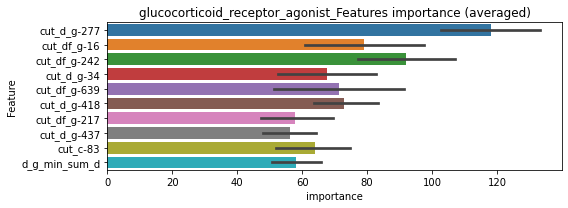

len(train_index) : 5981
len(valid_index) : 1994
================================= fold 1/4 glucocorticoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5981
len(valid_index) : 1994
================================= fold 2/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[179]	training's binary_logloss: 0.00356922	valid_1's binary_logloss: 0.0417001
Training until validation scores don't improve for 30 rounds


len(train_index) : 5981
len(valid_index) : 1994
================================= fold 3/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00442425	valid_1's binary_logloss: 0.0489039
Training until validation scores don't improve for 30 rounds


len(train_index) : 5982
len(valid_index) : 1993
================================= fold 4/4 glucocorticoid_receptor_agonist=================================


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00228551	valid_1's binary_logloss: 0.0289934
Training until validation scores don't improve for 30 rounds


glucocorticoid_receptor_agonist logloss: 0.04102350730525448
glucocorticoid_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00418781	valid_1's binary_logloss: 0.0444983


glutamate_inhibitor, len(trt): 13, len(othr): 3289
target_rate: 0.0005459 → Adj_target_rate: 0.0007431


selected negative label: 3289


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000238743	valid_1's binary_logloss: 0.00602119
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000231838	valid_1's binary_logloss: 0.00327715
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.00022895	valid_1's binary_logloss: 0.000237486
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006602, Threshold: 0.0012805, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00055
Num_p_label: 40.0, Expected: 2.2, Threshold: 0.0012805, conf_0:0.00090, conf_1:0.00166
Num_p_label: 0.0, Expected: 2.2, Adj_threshold_1: 0.0312805
threshold: 0.0312805, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000253979	valid_1's binary_logloss: 0.00530557


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000239902	valid_1's binary_logloss: 0.00604653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000230037	valid_1's binary_logloss: 0.00314786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000226285	valid_1's binary_logloss: 0.000244667
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0108952, Threshold: 0.0312805, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00055
Num_p_label: 2.0, Expected: 2.2, Threshold: 0.0312805, conf_0:0.02502, conf_1:0.03754
threshold: 0.0312805, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000247601	valid_1's binary_logloss: 0.00504582


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000239902	valid_1's binary_logloss: 0.00604653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000230037	valid_1's binary_logloss: 0.00314786
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000226285	valid_1's binary_logloss: 0.000244667
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0108952, Threshold: 0.0312805, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00055
Num_p_label: 2.0, Expected: 2.2, Threshold: 0.0312805, conf_0:0.02815, conf_1:0.03441


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000247601	valid_1's binary_logloss: 0.00504582


threshold: 0.0312805, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


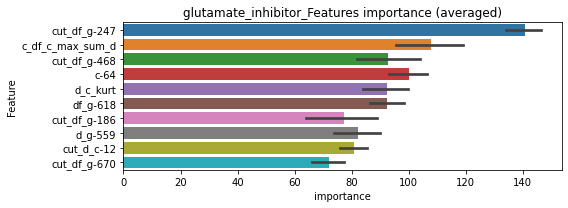

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 glutamate_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000252254	valid_1's binary_logloss: 0.00449144
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000235835	valid_1's binary_logloss: 0.00114834
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 glutamate_inhibitor=================================


Early stopping, best iteration is:
[786]	training's binary_logloss: 0.000233628	valid_1's binary_logloss: 0.000236996
Training until validation scores don't improve for 30 rounds


glutamate_inhibitor logloss: 0.002542084158024516


Early stopping, best iteration is:
[532]	training's binary_logloss: 0.000265963	valid_1's binary_logloss: 0.00428951


glutamate_receptor_agonist, len(trt): 74, len(othr): 3274
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3274


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00170229	valid_1's binary_logloss: 0.0520498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000818576	valid_1's binary_logloss: 0.0433782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.0013065	valid_1's binary_logloss: 0.0408217
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.00074662	valid_1's binary_logloss: 0.0436543


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0055811, Threshold: 0.1682288, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 652/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.1682288, conf_0:0.11776, conf_1:0.21870
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_1: 0.1982288
Num_p_label: 31.0, Expected: 12.4, Adj_threshold_2: 0.2282288
Num_p_label: 30.0, Expected: 12.4, Adj_threshold_3: 0.2582288
Num_p_label: 27.0, Expected: 12.4, Adj_threshold_4: 0.2882288
Num_p_label: 25.0, Expected: 12.4, Adj_threshold_5: 0.3182288
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_6: 0.3482288
Num_p_label: 17.0, Expected: 12.4, Adj_threshold_7: 0.3782288
threshold: 0.3782288, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 652.0/3792, y_label_rate: 0.1719409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.0020909	valid_1's binary_logloss: 0.0617092
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.00121613	valid_1's binary_logloss: 0.0391637
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[596]	training's binary_logloss: 0.000621676	valid_1's binary_logloss: 0.0180356
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0260845, Threshold: 0.3782288, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00107125	valid_1's binary_logloss: 0.0367354


Remove_noisy_data: 26 → Positive_corect_labels: 639.0/3766
p_label_rate: 0.0195881 Vs.target_rate: 0.00311
Num_p_label: 78.0, Expected: 12.4, Threshold: 0.3782288, conf_0:0.30258, conf_1:0.45387
Num_p_label: 77.0, Expected: 12.4, Adj_threshold_1: 0.4082288
Num_p_label: 72.0, Expected: 12.4, Adj_threshold_2: 0.4382288
Num_p_label: 71.0, Expected: 12.4, Adj_threshold_3: 0.4682288
Num_p_label: 64.0, Expected: 12.4, Adj_threshold_4: 0.4982288
Num_p_label: 60.0, Expected: 12.4, Adj_threshold_5: 0.5282288
Num_p_label: 55.0, Expected: 12.4, Adj_threshold_6: 0.5582288
Num_p_label: 54.0, Expected: 12.4, Adj_threshold_7: 0.5882288
Num_p_label: 49.0, Expected: 12.4, Adj_threshold_8: 0.6182288
Num_p_label: 47.0, Expected: 12.4, Adj_threshold_9: 0.6482288
Num_p_label: 44.0, Expected: 12.4, Adj_threshold_10: 0.6782288
threshold: 0.6782288, positive_p_label: 44.0/3982, p_label_rate: 0.0110497
positive_y_label: 639.0/3766, y_label_rate: 0.1696760
================= Pseudo labeling 3 / 3 ===============

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000783427	valid_1's binary_logloss: 0.0376522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.00059994	valid_1's binary_logloss: 0.0289415
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00119377	valid_1's binary_logloss: 0.0315053
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0308375, Threshold: 0.6782288, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 631.0/3750
p_label_rate: 0.0158212 Vs.target_rate: 0.00311
Num_p_label: 63.0, Expected: 12.4, Threshold: 0.6782288, conf_0:0.61041, conf_1:0.74605
Num_p_label: 60.0, Expected: 12.4, Adj_threshold_1: 0.7082288
Num_p_label: 57.0, Expected: 12.4, Adj_threshold_2: 0.7382288
Num_p_label: 52.0, Expected: 12.4, Adj_threshold_3: 0.7682288


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00125358	valid_1's binary_logloss: 0.037511


Num_p_label: 46.0, Expected: 12.4, Adj_threshold_4: 0.7982288
Num_p_label: 35.0, Expected: 12.4, Adj_threshold_5: 0.8282288
Num_p_label: 29.0, Expected: 12.4, Adj_threshold_6: 0.8582288
Num_p_label: 21.0, Expected: 12.4, Adj_threshold_7: 0.8882288
Num_p_label: 16.0, Expected: 12.4, Adj_threshold_8: 0.9182288
threshold: 0.9182288, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 631.0/3750, y_label_rate: 0.1682667


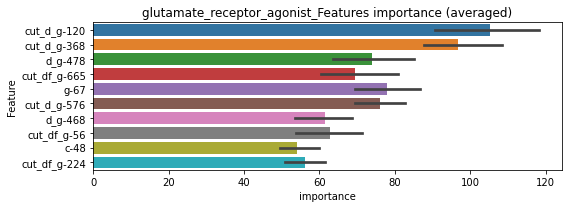

len(train_index) : 2812
len(valid_index) : 938
================================= fold 1/4 glutamate_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2812
len(valid_index) : 938
================================= fold 2/4 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00093141	valid_1's binary_logloss: 0.0338893
Training until validation scores don't improve for 30 rounds


len(train_index) : 2813
len(valid_index) : 937
================================= fold 3/4 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000787023	valid_1's binary_logloss: 0.0228527
Training until validation scores don't improve for 30 rounds


len(train_index) : 2813
len(valid_index) : 937
================================= fold 4/4 glutamate_receptor_agonist=================================


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0011433	valid_1's binary_logloss: 0.0238075
Training until validation scores don't improve for 30 rounds


glutamate_receptor_agonist logloss: 0.026202005550659685


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000973134	valid_1's binary_logloss: 0.0242539
mutually exclusive columns: glutamate_receptor_antagonist


glutamate_receptor_antagonist, len(trt): 367, len(othr): 7212
target_rate: 0.0154111 → Adj_target_rate: 0.0127105


selected negative label: 7212


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0262141	valid_1's binary_logloss: 0.146324
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.0420672	valid_1's binary_logloss: 0.164336
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0366326	valid_1's binary_logloss: 0.165344
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.941, PR-AUC:0.901
y_Threshold: 0.0529652, Threshold: 0.0724597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 703 → Positive_corect_labels: 1235/7951
p_label_rate: 0.0100452 Vs.target_rate: 0.01541
Num_p_label: 40.0, Expected: 61.4, Threshold: 0.0724597, conf_0:0.05072, conf_1:0.09420


Early stopping, best iteration is:
[278]	training's binary_logloss: 0.0341608	valid_1's binary_logloss: 0.158695


threshold: 0.0724597, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1235.0/7951, y_label_rate: 0.1553264
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.0150592	valid_1's binary_logloss: 0.0895653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00568907	valid_1's binary_logloss: 0.0675858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00555164	valid_1's binary_logloss: 0.066304
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.992, PR-AUC:0.978
y_Threshold: 0.0378085, Threshold: 0.0724597, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[301]	training's binary_logloss: 0.0101177	valid_1's binary_logloss: 0.0807115


Remove_noisy_data: 158 → Positive_corect_labels: 1156.0/7793
p_label_rate: 0.0040181 Vs.target_rate: 0.01541
Num_p_label: 16.0, Expected: 61.4, Threshold: 0.0724597, conf_0:0.05797, conf_1:0.08695
threshold: 0.0724597, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 1156.0/7793, y_label_rate: 0.1483383
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00192937	valid_1's binary_logloss: 0.0318108
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00380652	valid_1's binary_logloss: 0.0520352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00162784	valid_1's binary_logloss: 0.0241647
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0235025, Threshold: 0.0724597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 1119.0/7719
p_label_rate: 0.0030136 Vs.target_rate: 0.01541
Num_p_label: 12.0, Expected: 61.4, Threshold: 0.0724597, conf_0:0.06521, conf_1:0.07971


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00446201	valid_1's binary_logloss: 0.0527093


threshold: 0.0724597, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 1119.0/7719, y_label_rate: 0.1449670


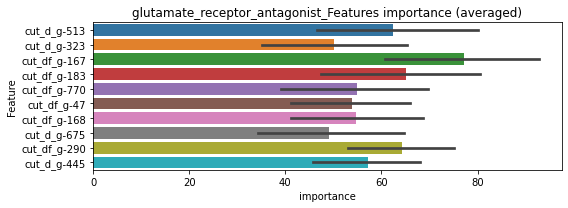

len(train_index) : 5789
len(valid_index) : 1930
================================= fold 1/4 glutamate_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5789
len(valid_index) : 1930
================================= fold 2/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[249]	training's binary_logloss: 0.0014549	valid_1's binary_logloss: 0.0219099
Training until validation scores don't improve for 30 rounds


len(train_index) : 5789
len(valid_index) : 1930
================================= fold 3/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[167]	training's binary_logloss: 0.00287074	valid_1's binary_logloss: 0.0281664
Training until validation scores don't improve for 30 rounds


len(train_index) : 5790
len(valid_index) : 1929
================================= fold 4/4 glutamate_receptor_antagonist=================================


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.00106654	valid_1's binary_logloss: 0.0168191
Training until validation scores don't improve for 30 rounds


glutamate_receptor_antagonist logloss: 0.022964018986127308


Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00178585	valid_1's binary_logloss: 0.0249617


gonadotropin_receptor_agonist, len(trt): 18, len(othr): 3287
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000292045	valid_1's binary_logloss: 0.00244321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[299]	training's binary_logloss: 0.000666176	valid_1's binary_logloss: 0.0131422
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00037046	valid_1's binary_logloss: 0.00244709
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013215, Threshold: 0.0056597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0056597, conf_0:0.00396, conf_1:0.00736
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_1: 0.0356597
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_2: 0.0656597
Num_p_label: 7.0, Expected: 3.0, Adj_threshold_3: 0.0956597


Early stopping, best iteration is:
[405]	training's binary_logloss: 0.000346606	valid_1's binary_logloss: 0.00784636


threshold: 0.0956597, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000281456	valid_1's binary_logloss: 0.00145924
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000374581	valid_1's binary_logloss: 0.0143603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000389444	valid_1's binary_logloss: 0.00195107
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0081927, Threshold: 0.0956597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0050226 Vs.target_rate: 0.00076
Num_p_label: 20.0, Expected: 3.0, Threshold: 0.0956597, conf_0:0.07653, conf_1:0.11479
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_1: 0.1256597
Num_p_label: 17.0, Expected: 3.0, Adj_threshold_2: 0.1556597
Num_p_label: 15.0, Expected: 3.0, Adj_threshold_3: 0.1856597
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_4: 0.2156597
Num_p_label: 11.0, Expected: 3.0, Adj_threshold_5: 0.2456597
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_6: 0.2756597
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_7: 0.3056597


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000312204	valid_1's binary_logloss: 0.00701345


Num_p_label: 7.0, Expected: 3.0, Adj_threshold_8: 0.3356597
threshold: 0.3356597, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000281456	valid_1's binary_logloss: 0.00145924
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000374581	valid_1's binary_logloss: 0.0143603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000389444	valid_1's binary_logloss: 0.00195107
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0081927, Threshold: 0.3356597, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0017579 Vs.target_rate: 0.00076
Num_p_label: 7.0, Expected: 3.0, Threshold: 0.3356597, conf_0:0.30209, conf_1:0.36923
threshold: 0.3356597, positive_p_label: 7.0/3982, p_label_rate: 0.0017579


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000312204	valid_1's binary_logloss: 0.00701345


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


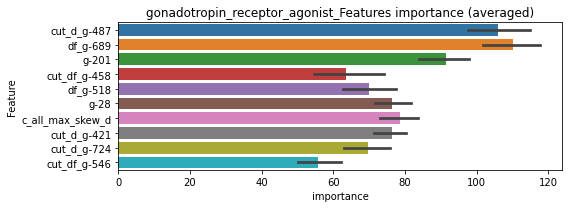

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 gonadotropin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[661]	training's binary_logloss: 0.000292761	valid_1's binary_logloss: 0.001294
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[183]	training's binary_logloss: 0.000972813	valid_1's binary_logloss: 0.0162167
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 gonadotropin_receptor_agonist=================================


Early stopping, best iteration is:
[586]	training's binary_logloss: 0.000311195	valid_1's binary_logloss: 0.00219108
Training until validation scores don't improve for 30 rounds


gonadotropin_receptor_agonist logloss: 0.006070689060700932


Early stopping, best iteration is:
[634]	training's binary_logloss: 0.000291845	valid_1's binary_logloss: 0.00458096


gsk_inhibitor, len(trt): 60, len(othr): 3284
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00148571	valid_1's binary_logloss: 0.0604087
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00083986	valid_1's binary_logloss: 0.0371548
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000716587	valid_1's binary_logloss: 0.00933317
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0045138, Threshold: 0.0168910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0168910, conf_0:0.01182, conf_1:0.02196
Num_p_label: 6.0, Expected: 10.0, Adj_threshold_1: 0.0468910


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00131402	valid_1's binary_logloss: 0.0429045


threshold: 0.0468910, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000640831	valid_1's binary_logloss: 0.035017
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.0020197	valid_1's binary_logloss: 0.0406026
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000605527	valid_1's binary_logloss: 0.0252088
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000712138	valid_1's binary_logloss: 0.0387489


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0181622, Threshold: 0.0468910, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 644.0/3784
p_label_rate: 0.0115520 Vs.target_rate: 0.00252
Num_p_label: 46.0, Expected: 10.0, Threshold: 0.0468910, conf_0:0.03751, conf_1:0.05627
Num_p_label: 33.0, Expected: 10.0, Adj_threshold_1: 0.0768910
Num_p_label: 19.0, Expected: 10.0, Adj_threshold_2: 0.1068910
Num_p_label: 11.0, Expected: 10.0, Adj_threshold_3: 0.1368910
threshold: 0.1368910, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 644.0/3784, y_label_rate: 0.1701903
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00124501	valid_1's binary_logloss: 0.0391139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000725375	valid_1's binary_logloss: 0.0312636
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00111231	valid_1's binary_logloss: 0.0229069
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0258697, Threshold: 0.1368910, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000654711	valid_1's binary_logloss: 0.0306038


Remove_noisy_data: 8 → Positive_corect_labels: 640.0/3776
p_label_rate: 0.0075339 Vs.target_rate: 0.00252
Num_p_label: 30.0, Expected: 10.0, Threshold: 0.1368910, conf_0:0.12320, conf_1:0.15058
Num_p_label: 21.0, Expected: 10.0, Adj_threshold_1: 0.1668910
Num_p_label: 15.0, Expected: 10.0, Adj_threshold_2: 0.1968910
threshold: 0.1968910, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 640.0/3776, y_label_rate: 0.1694915


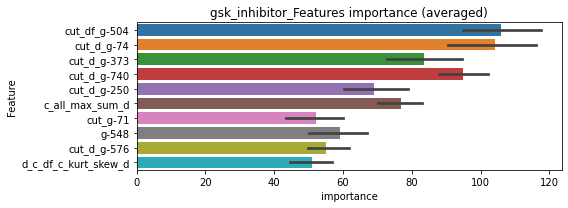

len(train_index) : 2832
len(valid_index) : 944
================================= fold 1/4 gsk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 2/4 gsk_inhibitor=================================


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000878211	valid_1's binary_logloss: 0.022475
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 3/4 gsk_inhibitor=================================


Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00124748	valid_1's binary_logloss: 0.0308285
Training until validation scores don't improve for 30 rounds


len(train_index) : 2832
len(valid_index) : 944
================================= fold 4/4 gsk_inhibitor=================================


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000982819	valid_1's binary_logloss: 0.0223168
Training until validation scores don't improve for 30 rounds


gsk_inhibitor logloss: 0.022681490903697907


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000722674	valid_1's binary_logloss: 0.0151056


hcv_inhibitor, len(trt): 72, len(othr): 3284
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00244027	valid_1's binary_logloss: 0.0636222
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[310]	training's binary_logloss: 0.00287112	valid_1's binary_logloss: 0.0547499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000721105	valid_1's binary_logloss: 0.0213608
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000808469	valid_1's binary_logloss: 0.0472336


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0075318, Threshold: 0.0153829, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 651/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0153829, conf_0:0.01077, conf_1:0.02000
Num_p_label: 6.0, Expected: 12.0, Adj_threshold_1: 0.0453829
threshold: 0.0453829, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 651.0/3798, y_label_rate: 0.1714060
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000648801	valid_1's binary_logloss: 0.0400403
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00157396	valid_1's binary_logloss: 0.0445019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.00123457	valid_1's binary_logloss: 0.0373701
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0205880, Threshold: 0.0453829, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 644.0/3784
p_label_rate: 0.0037670 Vs.target_rate: 0.00302
Num_p_label: 15.0, Expected: 12.0, Threshold: 0.0453829, conf_0:0.03631, conf_1:0.05446
threshold: 0.0453829, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.00205679	valid_1's binary_logloss: 0.0380972


positive_y_label: 644.0/3784, y_label_rate: 0.1701903
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00153047	valid_1's binary_logloss: 0.0426263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.00175705	valid_1's binary_logloss: 0.0394388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00108624	valid_1's binary_logloss: 0.0255795
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0237345, Threshold: 0.0453829, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 638.0/3772
p_label_rate: 0.0057760 Vs.target_rate: 0.00302
Num_p_label: 23.0, Expected: 12.0, Threshold: 0.0453829, conf_0:0.04084, conf_1:0.04992
Num_p_label: 6.0, Expected: 12.0, Adj_threshold_1: 0.0753829


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00171973	valid_1's binary_logloss: 0.0420553


threshold: 0.0753829, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 638.0/3772, y_label_rate: 0.1691410


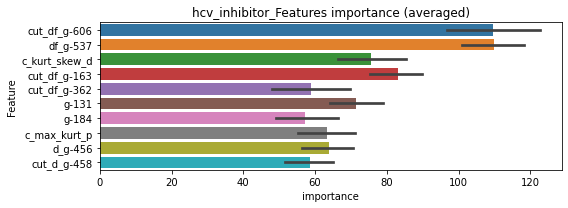

len(train_index) : 2829
len(valid_index) : 943
================================= fold 1/4 hcv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943
================================= fold 2/4 hcv_inhibitor=================================


Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00126443	valid_1's binary_logloss: 0.0328119
Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943
================================= fold 3/4 hcv_inhibitor=================================


Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00123048	valid_1's binary_logloss: 0.038787
Training until validation scores don't improve for 30 rounds


len(train_index) : 2829
len(valid_index) : 943
================================= fold 4/4 hcv_inhibitor=================================


Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000953694	valid_1's binary_logloss: 0.0151152
Training until validation scores don't improve for 30 rounds


hcv_inhibitor logloss: 0.032155187256663914
hcv_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[275]	training's binary_logloss: 0.001472	valid_1's binary_logloss: 0.0419066


hdac_inhibitor, len(trt): 106, len(othr): 3274
target_rate: 0.0044512 → Adj_target_rate: 0.0044229


selected negative label: 3274


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00390894	valid_1's binary_logloss: 0.101768
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00369744	valid_1's binary_logloss: 0.0837675
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.00252606	valid_1's binary_logloss: 0.0581726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.00178032	valid_1's binary_logloss: 0.056803


1 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0131827, Threshold: 0.0715560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 164 → Positive_corect_labels: 638/3764
p_label_rate: 0.0100452 Vs.target_rate: 0.00445
Num_p_label: 40.0, Expected: 17.7, Threshold: 0.0715560, conf_0:0.05009, conf_1:0.09302
Num_p_label: 26.0, Expected: 17.7, Adj_threshold_1: 0.1015560
threshold: 0.1015560, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 638.0/3764, y_label_rate: 0.1695005
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00217995	valid_1's binary_logloss: 0.0788756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.0026448	valid_1's binary_logloss: 0.0540765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00181273	valid_1's binary_logloss: 0.0494616
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0270231, Threshold: 0.1015560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 623.0/3734
p_label_rate: 0.0128076 Vs.target_rate: 0.00445
Num_p_label: 51.0, Expected: 17.7, Threshold: 0.1015560, conf_0:0.08124, conf_1:0.12187
Num_p_label: 30.0, Expected: 17.7, Adj_threshold_1: 0.1315560


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00262691	valid_1's binary_logloss: 0.0762186


Num_p_label: 23.0, Expected: 17.7, Adj_threshold_2: 0.1615560
threshold: 0.1615560, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 623.0/3734, y_label_rate: 0.1668452
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00166213	valid_1's binary_logloss: 0.0565872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00191137	valid_1's binary_logloss: 0.0603984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.00109719	valid_1's binary_logloss: 0.0267824
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0244144, Threshold: 0.1615560, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 611.0/3710
p_label_rate: 0.0057760 Vs.target_rate: 0.00445
Num_p_label: 23.0, Expected: 17.7, Threshold: 0.1615560, conf_0:0.14540, conf_1:0.17771


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00238274	valid_1's binary_logloss: 0.0637544


threshold: 0.1615560, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 611.0/3710, y_label_rate: 0.1646900


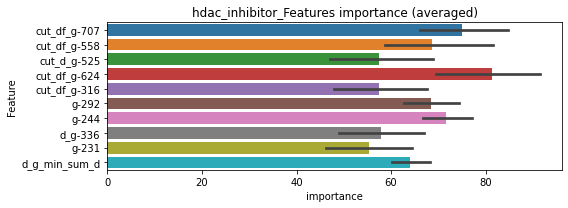

len(train_index) : 2782
len(valid_index) : 928
================================= fold 1/4 hdac_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2782
len(valid_index) : 928
================================= fold 2/4 hdac_inhibitor=================================


Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00212602	valid_1's binary_logloss: 0.0392253
Training until validation scores don't improve for 30 rounds


len(train_index) : 2783
len(valid_index) : 927
================================= fold 3/4 hdac_inhibitor=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00430965	valid_1's binary_logloss: 0.0666465
Training until validation scores don't improve for 30 rounds


len(train_index) : 2783
len(valid_index) : 927
================================= fold 4/4 hdac_inhibitor=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00139613	valid_1's binary_logloss: 0.028774
Training until validation scores don't improve for 30 rounds


hdac_inhibitor logloss: 0.046993274882804255
hdac_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00252013	valid_1's binary_logloss: 0.0533144


histamine_receptor_agonist, len(trt): 59, len(othr): 3282
target_rate: 0.0024775 → Adj_target_rate: 0.0026880


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00254285	valid_1's binary_logloss: 0.0599992
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00181191	valid_1's binary_logloss: 0.0501697
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000526739	valid_1's binary_logloss: 0.00799863
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0052826, Threshold: 0.0104662, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00132081	valid_1's binary_logloss: 0.0442778


Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00248
Num_p_label: 40.0, Expected: 9.9, Threshold: 0.0104662, conf_0:0.00733, conf_1:0.01361
Num_p_label: 1.0, Expected: 9.9, Adj_threshold_1: 0.0404662
threshold: 0.0404662, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00298374	valid_1's binary_logloss: 0.0507877
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000531289	valid_1's binary_logloss: 0.0286392
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00182055	valid_1's binary_logloss: 0.0347809
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0167758, Threshold: 0.0404662, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 649.0/3792
p_label_rate: 0.0005023 Vs.target_rate: 0.00248
Num_p_label: 2.0, Expected: 9.9, Threshold: 0.0404662, conf_0:0.03237, conf_1:0.04856


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000976817	valid_1's binary_logloss: 0.0321873


threshold: 0.0404662, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000935469	valid_1's binary_logloss: 0.0308862
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00223609	valid_1's binary_logloss: 0.0404611
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000789017	valid_1's binary_logloss: 0.0321908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000548088	valid_1's binary_logloss: 0.0257297


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0185348, Threshold: 0.0404662, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 646.0/3786
p_label_rate: 0.0010045 Vs.target_rate: 0.00248
Num_p_label: 4.0, Expected: 9.9, Threshold: 0.0404662, conf_0:0.03642, conf_1:0.04451
threshold: 0.0404662, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 646.0/3786, y_label_rate: 0.1706286


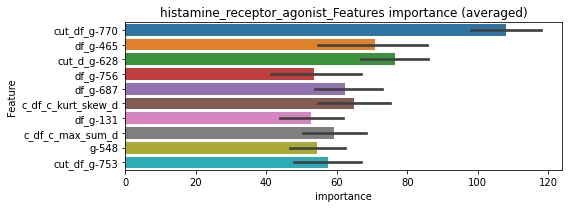

len(train_index) : 2839
len(valid_index) : 947
================================= fold 1/4 histamine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2839
len(valid_index) : 947
================================= fold 2/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00125828	valid_1's binary_logloss: 0.0374037
Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 946
================================= fold 3/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00244725	valid_1's binary_logloss: 0.0352387
Training until validation scores don't improve for 30 rounds


len(train_index) : 2840
len(valid_index) : 946
================================= fold 4/4 histamine_receptor_agonist=================================


Early stopping, best iteration is:
[250]	training's binary_logloss: 0.00144527	valid_1's binary_logloss: 0.0285967
Training until validation scores don't improve for 30 rounds


histamine_receptor_agonist logloss: 0.03139776720687169
histamine_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00123815	valid_1's binary_logloss: 0.0243416
mutually exclusive columns: histamine_receptor_antagonist


histamine_receptor_antagonist, len(trt): 241, len(othr): 6554
target_rate: 0.0101201 → Adj_target_rate: 0.0088902


selected negative label: 6554


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.0155574	valid_1's binary_logloss: 0.114737
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0207249	valid_1's binary_logloss: 0.123429
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.0123159	valid_1's binary_logloss: 0.104855
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.972, PR-AUC:0.950
y_Threshold: 0.0291272, Threshold: 0.0366783, pos_neg_ratio: 0.8000000
Remove_noisy_data: 481 → Positive_corect_labels: 1201/7383
p_label_rate: 0.0100452 Vs.target_rate: 0.01012
Num_p_label: 40.0, Expected: 40.3, Threshold: 0.0366783, conf_0:0.02567, conf_1:0.04768


Early stopping, best iteration is:
[297]	training's binary_logloss: 0.0153253	valid_1's binary_logloss: 0.127358


threshold: 0.0366783, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1201.0/7383, y_label_rate: 0.1626710
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00465499	valid_1's binary_logloss: 0.0605981
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[278]	training's binary_logloss: 0.0088713	valid_1's binary_logloss: 0.0986709
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00377879	valid_1's binary_logloss: 0.0491507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.0041937	valid_1's binary_logloss: 0.0465137


2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0270281, Threshold: 0.0366783, pos_neg_ratio: 0.8000000
Remove_noisy_data: 90 → Positive_corect_labels: 1156.0/7293
p_label_rate: 0.0030136 Vs.target_rate: 0.01012
Num_p_label: 12.0, Expected: 40.3, Threshold: 0.0366783, conf_0:0.02934, conf_1:0.04401
threshold: 0.0366783, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 1156.0/7293, y_label_rate: 0.1585082
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00376349	valid_1's binary_logloss: 0.0418424
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00345681	valid_1's binary_logloss: 0.0455478
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00309327	valid_1's binary_logloss: 0.0370165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.00315086	valid_1's binary_logloss: 0.0444768


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0259301, Threshold: 0.0366783, pos_neg_ratio: 0.8000000
Remove_noisy_data: 44 → Positive_corect_labels: 1134.0/7249
p_label_rate: 0.0020090 Vs.target_rate: 0.01012
Num_p_label: 8.0, Expected: 40.3, Threshold: 0.0366783, conf_0:0.03301, conf_1:0.04035
threshold: 0.0366783, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 1134.0/7249, y_label_rate: 0.1564354


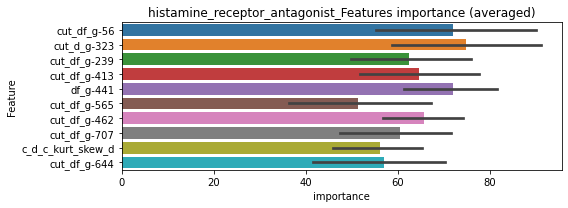

len(train_index) : 5436
len(valid_index) : 1813
================================= fold 1/4 histamine_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5437
len(valid_index) : 1812
================================= fold 2/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[159]	training's binary_logloss: 0.00361635	valid_1's binary_logloss: 0.0369145
Training until validation scores don't improve for 30 rounds


len(train_index) : 5437
len(valid_index) : 1812
================================= fold 3/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[147]	training's binary_logloss: 0.00432697	valid_1's binary_logloss: 0.0354367
Training until validation scores don't improve for 30 rounds


len(train_index) : 5437
len(valid_index) : 1812
================================= fold 4/4 histamine_receptor_antagonist=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00164819	valid_1's binary_logloss: 0.0262386
Training until validation scores don't improve for 30 rounds


histamine_receptor_antagonist logloss: 0.03449567962529882
histamine_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[142]	training's binary_logloss: 0.00446827	valid_1's binary_logloss: 0.0393916


histone_lysine_demethylase_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000406001	valid_1's binary_logloss: 0.0125303
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000365135	valid_1's binary_logloss: 0.0217089
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000382578	valid_1's binary_logloss: 0.00460309
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011097, Threshold: 0.0070275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0070275, conf_0:0.00492, conf_1:0.00914
Num_p_label: 11.0, Expected: 4.0, Adj_threshold_1: 0.0370275
Num_p_label: 6.0, Expected: 4.0, Adj_threshold_2: 0.0670275


Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000325551	valid_1's binary_logloss: 0.00878682


threshold: 0.0670275, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000358437	valid_1's binary_logloss: 0.0120958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000672092	valid_1's binary_logloss: 0.0208911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000378006	valid_1's binary_logloss: 0.00483619
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0093635, Threshold: 0.0670275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0060271 Vs.target_rate: 0.00101
Num_p_label: 24.0, Expected: 4.0, Threshold: 0.0670275, conf_0:0.05362, conf_1:0.08043
Num_p_label: 20.0, Expected: 4.0, Adj_threshold_1: 0.0970275
Num_p_label: 12.0, Expected: 4.0, Adj_threshold_2: 0.1270275
Num_p_label: 8.0, Expected: 4.0, Adj_threshold_3: 0.1570275


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000337708	valid_1's binary_logloss: 0.00833415


threshold: 0.1570275, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000358437	valid_1's binary_logloss: 0.0120958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.000672092	valid_1's binary_logloss: 0.0208911
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000378006	valid_1's binary_logloss: 0.00483619
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0093635, Threshold: 0.1570275, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0020090 Vs.target_rate: 0.00101
Num_p_label: 8.0, Expected: 4.0, Threshold: 0.1570275, conf_0:0.14132, conf_1:0.17273
threshold: 0.1570275, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000337708	valid_1's binary_logloss: 0.00833415


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


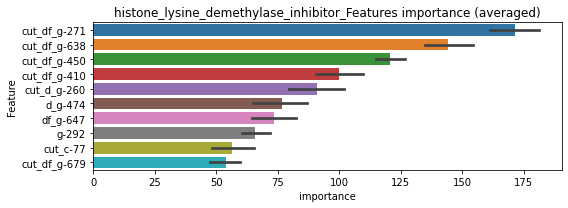

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 histone_lysine_demethylase_inhibitor=================================


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000527694	valid_1's binary_logloss: 0.0121117
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 histone_lysine_demethylase_inhibitor=================================


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000376974	valid_1's binary_logloss: 0.0142866
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952


Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000370815	valid_1's binary_logloss: 0.00347529


================================= fold 4/4 histone_lysine_demethylase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


histone_lysine_demethylase_inhibitor logloss: 0.008822165922790249


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000437549	valid_1's binary_logloss: 0.00541154


histone_lysine_methyltransferase_inhibitor, len(trt): 32, len(othr): 3282
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000523092	valid_1's binary_logloss: 0.0277076
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000481148	valid_1's binary_logloss: 0.0114334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000377057	valid_1's binary_logloss: 0.00263164
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0033396, Threshold: 0.0041897, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 655/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0041897, conf_0:0.00293, conf_1:0.00545
Num_p_label: 0.0, Expected: 5.4, Adj_threshold_1: 0.0341897
threshold: 0.0341897, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00201728	valid_1's binary_logloss: 0.0302189


positive_y_label: 655.0/3804, y_label_rate: 0.1721872
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000392829	valid_1's binary_logloss: 0.0225067
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000554938	valid_1's binary_logloss: 0.0105693
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000471649	valid_1's binary_logloss: 0.0127884
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0103470, Threshold: 0.0341897, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0000000 Vs.target_rate: 0.00134
Num_p_label: 0.0, Expected: 5.4, Threshold: 0.0341897, conf_0:0.02735, conf_1:0.04103
threshold: 0.0341897, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000594582	valid_1's binary_logloss: 0.0184452


positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000395738	valid_1's binary_logloss: 0.0207544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000395611	valid_1's binary_logloss: 0.0104317
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00044731	valid_1's binary_logloss: 0.0196043
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0087975, Threshold: 0.0341897, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0000000 Vs.target_rate: 0.00134
Num_p_label: 0.0, Expected: 5.4, Threshold: 0.0341897, conf_0:0.03077, conf_1:0.03761


Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000431697	valid_1's binary_logloss: 0.00812974


threshold: 0.0341897, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


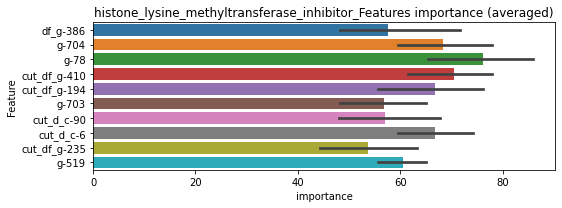

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 histone_lysine_methyltransferase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000511662	valid_1's binary_logloss: 0.0191952
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000510781	valid_1's binary_logloss: 0.00766442
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 histone_lysine_methyltransferase_inhibitor=================================


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000537106	valid_1's binary_logloss: 0.0200199
Training until validation scores don't improve for 30 rounds


histone_lysine_methyltransferase_inhibitor logloss: 0.013620062384792636


Early stopping, best iteration is:
[316]	training's binary_logloss: 0.000755878	valid_1's binary_logloss: 0.00760075


hiv_inhibitor, len(trt): 72, len(othr): 3281
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3281


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00282809	valid_1's binary_logloss: 0.0739552
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000638123	valid_1's binary_logloss: 0.0403609
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[633]	training's binary_logloss: 0.000595037	valid_1's binary_logloss: 0.015309
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0068341, Threshold: 0.0618240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 653/3799
p_label_rate: 0.0100452 Vs.target_rate: 0.00302


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00135737	valid_1's binary_logloss: 0.0445319


Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0618240, conf_0:0.04328, conf_1:0.08037
Num_p_label: 24.0, Expected: 12.0, Adj_threshold_1: 0.0918240
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_2: 0.1218240
threshold: 0.1218240, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 653.0/3799, y_label_rate: 0.1718873
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000714432	valid_1's binary_logloss: 0.0381474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000675068	valid_1's binary_logloss: 0.0321978
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.0006732	valid_1's binary_logloss: 0.0366096
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000737774	valid_1's binary_logloss: 0.0425567


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0224539, Threshold: 0.1218240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 643.0/3779
p_label_rate: 0.0123054 Vs.target_rate: 0.00302
Num_p_label: 49.0, Expected: 12.0, Threshold: 0.1218240, conf_0:0.09746, conf_1:0.14619
Num_p_label: 43.0, Expected: 12.0, Adj_threshold_1: 0.1518240
Num_p_label: 35.0, Expected: 12.0, Adj_threshold_2: 0.1818240
Num_p_label: 28.0, Expected: 12.0, Adj_threshold_3: 0.2118240
Num_p_label: 26.0, Expected: 12.0, Adj_threshold_4: 0.2418240
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_5: 0.2718240
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_6: 0.3018240
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_7: 0.3318240
threshold: 0.3318240, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 643.0/3779, y_label_rate: 0.1701508
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00069104	valid_1's binary_logloss: 0.0392852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00106097	valid_1's binary_logloss: 0.0441226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[573]	training's binary_logloss: 0.000584718	valid_1's binary_logloss: 0.0296194
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000574532	valid_1's binary_logloss: 0.0165225


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0269926, Threshold: 0.3318240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 638.0/3769
p_label_rate: 0.0072828 Vs.target_rate: 0.00302
Num_p_label: 29.0, Expected: 12.0, Threshold: 0.3318240, conf_0:0.29864, conf_1:0.36501
Num_p_label: 22.0, Expected: 12.0, Adj_threshold_1: 0.3618240
Num_p_label: 20.0, Expected: 12.0, Adj_threshold_2: 0.3918240
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_3: 0.4218240
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_4: 0.4518240
Num_p_label: 19.0, Expected: 12.0, Adj_threshold_5: 0.4818240
Num_p_label: 17.0, Expected: 12.0, Adj_threshold_6: 0.5118240
threshold: 0.5118240, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 638.0/3769, y_label_rate: 0.1692757


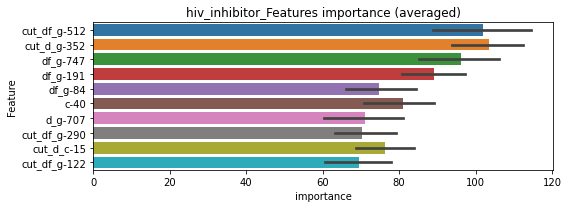

len(train_index) : 2826
len(valid_index) : 943
================================= fold 1/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 942
================================= fold 2/4 hiv_inhibitor=================================


Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00232739	valid_1's binary_logloss: 0.0376884
Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 942


Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000663969	valid_1's binary_logloss: 0.0220218


================================= fold 3/4 hiv_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 942
================================= fold 4/4 hiv_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00100933	valid_1's binary_logloss: 0.0226638
Training until validation scores don't improve for 30 rounds


hiv_inhibitor logloss: 0.030409260118726092
hiv_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0014747	valid_1's binary_logloss: 0.0392553
mutually exclusive columns: hmgcr_inhibitor


hmgcr_inhibitor, len(trt): 283, len(othr): 7400
target_rate: 0.0118838 → Adj_target_rate: 0.0101910


selected negative label: 7400


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00547042	valid_1's binary_logloss: 0.0965834
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00556283	valid_1's binary_logloss: 0.0930006
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.0150776	valid_1's binary_logloss: 0.12457
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00728319	valid_1's binary_logloss: 0.103577


1 / 3, AUC score:0.985, PR-AUC:0.970
y_Threshold: 0.0235178, Threshold: 0.0339845, pos_neg_ratio: 0.8000000
Remove_noisy_data: 436 → Positive_corect_labels: 1410/8444
p_label_rate: 0.0100452 Vs.target_rate: 0.01188
Num_p_label: 40.0, Expected: 47.3, Threshold: 0.0339845, conf_0:0.02379, conf_1:0.04418
threshold: 0.0339845, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1410.0/8444, y_label_rate: 0.1669825
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00650684	valid_1's binary_logloss: 0.084643
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00808523	valid_1's binary_logloss: 0.0890049
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.0043521	valid_1's binary_logloss: 0.0687647
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00560656	valid_1's binary_logloss: 0.0807836


2 / 3, AUC score:0.995, PR-AUC:0.989
y_Threshold: 0.0319510, Threshold: 0.0339845, pos_neg_ratio: 0.8000000
Remove_noisy_data: 120 → Positive_corect_labels: 1350.0/8324
p_label_rate: 0.0102963 Vs.target_rate: 0.01188
Num_p_label: 41.0, Expected: 47.3, Threshold: 0.0339845, conf_0:0.02719, conf_1:0.04078
threshold: 0.0339845, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 1350.0/8324, y_label_rate: 0.1621816
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.00299175	valid_1's binary_logloss: 0.0613835
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00325603	valid_1's binary_logloss: 0.0633051
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.00258864	valid_1's binary_logloss: 0.0514748
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.00286556	valid_1's binary_logloss: 0.0523376


3 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0246851, Threshold: 0.0339845, pos_neg_ratio: 0.8000000
Remove_noisy_data: 70 → Positive_corect_labels: 1315.0/8254
p_label_rate: 0.0037670 Vs.target_rate: 0.01188
Num_p_label: 15.0, Expected: 47.3, Threshold: 0.0339845, conf_0:0.03059, conf_1:0.03738
threshold: 0.0339845, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 1315.0/8254, y_label_rate: 0.1593167


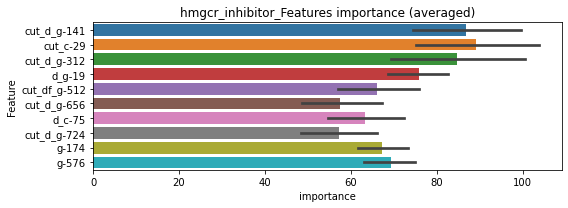

len(train_index) : 6190
len(valid_index) : 2064
================================= fold 1/4 hmgcr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 6190
len(valid_index) : 2064
================================= fold 2/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[211]	training's binary_logloss: 0.00325433	valid_1's binary_logloss: 0.0511728
Training until validation scores don't improve for 30 rounds


len(train_index) : 6191
len(valid_index) : 2063
================================= fold 3/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[199]	training's binary_logloss: 0.00352596	valid_1's binary_logloss: 0.0553417
Training until validation scores don't improve for 30 rounds


len(train_index) : 6191
len(valid_index) : 2063
================================= fold 4/4 hmgcr_inhibitor=================================


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00481274	valid_1's binary_logloss: 0.0506196
Training until validation scores don't improve for 30 rounds


hmgcr_inhibitor logloss: 0.05024751409446212
hmgcr_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[227]	training's binary_logloss: 0.00287622	valid_1's binary_logloss: 0.0438531


hsp_inhibitor, len(trt): 93, len(othr): 3273
target_rate: 0.0039053 → Adj_target_rate: 0.0039574


selected negative label: 3273


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00350651	valid_1's binary_logloss: 0.0825963
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.00123846	valid_1's binary_logloss: 0.0591121
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[574]	training's binary_logloss: 0.000988382	valid_1's binary_logloss: 0.0428093
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0105174, Threshold: 0.0879163, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[347]	training's binary_logloss: 0.00301728	valid_1's binary_logloss: 0.0637721


Remove_noisy_data: 144 → Positive_corect_labels: 648/3783
p_label_rate: 0.0100452 Vs.target_rate: 0.00391
Num_p_label: 40.0, Expected: 15.6, Threshold: 0.0879163, conf_0:0.06154, conf_1:0.11429
Num_p_label: 31.0, Expected: 15.6, Adj_threshold_1: 0.1179163
Num_p_label: 19.0, Expected: 15.6, Adj_threshold_2: 0.1479163
threshold: 0.1479163, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 648.0/3783, y_label_rate: 0.1712926
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00130095	valid_1's binary_logloss: 0.0534995
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00331541	valid_1's binary_logloss: 0.0660467
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00147813	valid_1's binary_logloss: 0.0532947
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.00131977	valid_1's binary_logloss: 0.0407833


2 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0348290, Threshold: 0.1479163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 36 → Positive_corect_labels: 630.0/3747
p_label_rate: 0.0248619 Vs.target_rate: 0.00391
Num_p_label: 99.0, Expected: 15.6, Threshold: 0.1479163, conf_0:0.11833, conf_1:0.17750
Num_p_label: 86.0, Expected: 15.6, Adj_threshold_1: 0.1779163
Num_p_label: 77.0, Expected: 15.6, Adj_threshold_2: 0.2079163
Num_p_label: 72.0, Expected: 15.6, Adj_threshold_3: 0.2379163
Num_p_label: 66.0, Expected: 15.6, Adj_threshold_4: 0.2679163
Num_p_label: 60.0, Expected: 15.6, Adj_threshold_5: 0.2979163
Num_p_label: 56.0, Expected: 15.6, Adj_threshold_6: 0.3279163
Num_p_label: 50.0, Expected: 15.6, Adj_threshold_7: 0.3579163
Num_p_label: 43.0, Expected: 15.6, Adj_threshold_8: 0.3879163
Num_p_label: 37.0, Expected: 15.6, Adj_threshold_9: 0.4179163
Num_p_label: 35.0, Expected: 15.6, Adj_threshold_10: 0.4479163
threshold: 0.4479163, positive_p_label: 35.0/3982, p_label_rate: 0.0087896
p

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.0009657	valid_1's binary_logloss: 0.0414184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000920791	valid_1's binary_logloss: 0.0504683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00069377	valid_1's binary_logloss: 0.0303917
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0411620, Threshold: 0.4479163, pos_neg_ratio: 0.8000000
Remove_noisy_data: 26 → Positive_corect_labels: 617.0/3721
p_label_rate: 0.0180814 Vs.target_rate: 0.00391


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00158519	valid_1's binary_logloss: 0.0468061


Num_p_label: 72.0, Expected: 15.6, Threshold: 0.4479163, conf_0:0.40312, conf_1:0.49271
Num_p_label: 68.0, Expected: 15.6, Adj_threshold_1: 0.4779163
Num_p_label: 62.0, Expected: 15.6, Adj_threshold_2: 0.5079163
Num_p_label: 54.0, Expected: 15.6, Adj_threshold_3: 0.5379163
Num_p_label: 46.0, Expected: 15.6, Adj_threshold_4: 0.5679163
Num_p_label: 43.0, Expected: 15.6, Adj_threshold_5: 0.5979163
Num_p_label: 37.0, Expected: 15.6, Adj_threshold_6: 0.6279163
Num_p_label: 36.0, Expected: 15.6, Adj_threshold_7: 0.6579163
Num_p_label: 30.0, Expected: 15.6, Adj_threshold_8: 0.6879163
Num_p_label: 27.0, Expected: 15.6, Adj_threshold_9: 0.7179163
Num_p_label: 24.0, Expected: 15.6, Adj_threshold_10: 0.7479163
threshold: 0.7479163, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 617.0/3721, y_label_rate: 0.1658156


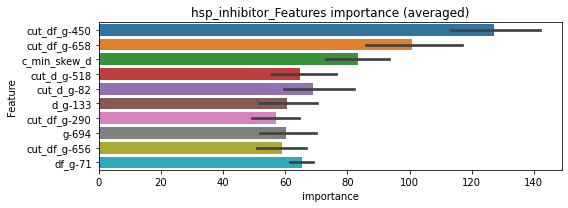

len(train_index) : 2790
len(valid_index) : 931
================================= fold 1/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2791
len(valid_index) : 930
================================= fold 2/4 hsp_inhibitor=================================


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00191775	valid_1's binary_logloss: 0.0445019
Training until validation scores don't improve for 30 rounds


len(train_index) : 2791
len(valid_index) : 930


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000961705	valid_1's binary_logloss: 0.0304683


================================= fold 3/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2791
len(valid_index) : 930


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000961936	valid_1's binary_logloss: 0.0263866


================================= fold 4/4 hsp_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000787285	valid_1's binary_logloss: 0.028198


hsp_inhibitor logloss: 0.032391939357658175
hsp_inhibitor is unpredictable(><)!
igf-1_inhibitor, len(trt): 37, len(othr): 3283
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3283


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[209]	training's binary_logloss: 0.00347476	valid_1's binary_logloss: 0.0602526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000454463	valid_1's binary_logloss: 0.0133679
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000550855	valid_1's binary_logloss: 0.00422288
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0042137, Threshold: 0.0159971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0159971, conf_0:0.01120, conf_1:0.02080


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000501154	valid_1's binary_logloss: 0.025256


Num_p_label: 5.0, Expected: 6.2, Adj_threshold_1: 0.0459971
threshold: 0.0459971, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[206]	training's binary_logloss: 0.00361459	valid_1's binary_logloss: 0.0645081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000452954	valid_1's binary_logloss: 0.0122257
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.000458163	valid_1's binary_logloss: 0.00355803
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0165106, Threshold: 0.0459971, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 652.0/3799
p_label_rate: 0.0090407 Vs.target_rate: 0.00155
Num_p_label: 36.0, Expected: 6.2, Threshold: 0.0459971, conf_0:0.03680, conf_1:0.05520
Num_p_label: 15.0, Expected: 6.2, Adj_threshold_1: 0.0759971


Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000505718	valid_1's binary_logloss: 0.0274875


threshold: 0.0759971, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3799, y_label_rate: 0.1716241
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000507631	valid_1's binary_logloss: 0.018909
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000582145	valid_1's binary_logloss: 0.0147184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00074618	valid_1's binary_logloss: 0.0174277
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0132069, Threshold: 0.0759971, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000472287	valid_1's binary_logloss: 0.0256096


Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3795
p_label_rate: 0.0047715 Vs.target_rate: 0.00155
Num_p_label: 19.0, Expected: 6.2, Threshold: 0.0759971, conf_0:0.06840, conf_1:0.08360
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_1: 0.1059971
threshold: 0.1059971, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 650.0/3795, y_label_rate: 0.1712780


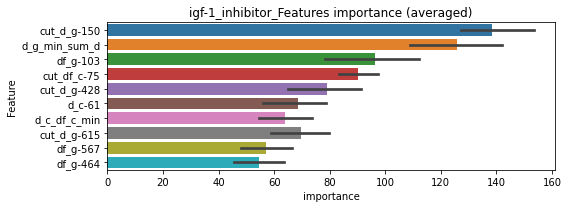

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 igf-1_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000570179	valid_1's binary_logloss: 0.0114643
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[315]	training's binary_logloss: 0.000795769	valid_1's binary_logloss: 0.0202131
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 igf-1_inhibitor=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000561686	valid_1's binary_logloss: 0.00941965
Training until validation scores don't improve for 30 rounds


igf-1_inhibitor logloss: 0.015980186699008546


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.00101924	valid_1's binary_logloss: 0.0228309


ikk_inhibitor, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00043915	valid_1's binary_logloss: 0.0217549
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000402972	valid_1's binary_logloss: 0.0229311
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000347485	valid_1's binary_logloss: 0.00137454
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017098, Threshold: 0.0048122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0048122, conf_0:0.00337, conf_1:0.00626
Num_p_label: 2.0, Expected: 5.0, Adj_threshold_1: 0.0348122


Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000511902	valid_1's binary_logloss: 0.0118572


threshold: 0.0348122, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000415094	valid_1's binary_logloss: 0.01879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000404063	valid_1's binary_logloss: 0.0224019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000341254	valid_1's binary_logloss: 0.00111806
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0134621, Threshold: 0.0348122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.0348122, conf_0:0.02785, conf_1:0.04177


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00037873	valid_1's binary_logloss: 0.0110734


threshold: 0.0348122, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000415094	valid_1's binary_logloss: 0.01879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000404063	valid_1's binary_logloss: 0.0224019
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000341254	valid_1's binary_logloss: 0.00111806
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0134621, Threshold: 0.0348122, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812


Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00037873	valid_1's binary_logloss: 0.0110734


p_label_rate: 0.0027624 Vs.target_rate: 0.00126
Num_p_label: 11.0, Expected: 5.0, Threshold: 0.0348122, conf_0:0.03133, conf_1:0.03829
threshold: 0.0348122, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


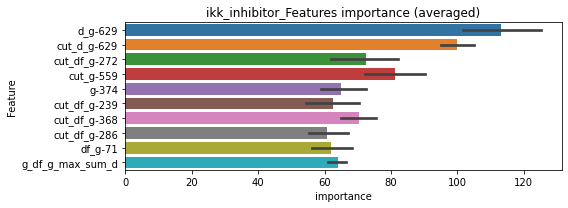

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 ikk_inhibitor=================================


Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000424956	valid_1's binary_logloss: 0.0172377
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 ikk_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000460723	valid_1's binary_logloss: 0.0180757
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000355535	valid_1's binary_logloss: 0.0015507


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 ikk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


ikk_inhibitor logloss: 0.011387743706640086


Early stopping, best iteration is:
[589]	training's binary_logloss: 0.000380223	valid_1's binary_logloss: 0.00868688


imidazoline_receptor_agonist, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000454822	valid_1's binary_logloss: 0.015638
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.000484305	valid_1's binary_logloss: 0.0344047
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000371305	valid_1's binary_logloss: 0.00557439
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016313, Threshold: 0.0070219, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0070219, conf_0:0.00492, conf_1:0.00913
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_1: 0.0370219
threshold: 0.0370219, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000413831	valid_1's binary_logloss: 0.0107021


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000427514	valid_1's binary_logloss: 0.0155714
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00053691	valid_1's binary_logloss: 0.0342811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000401134	valid_1's binary_logloss: 0.00526768
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0123293, Threshold: 0.0370219, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3808
p_label_rate: 0.0067805 Vs.target_rate: 0.00130
Num_p_label: 27.0, Expected: 5.2, Threshold: 0.0370219, conf_0:0.02962, conf_1:0.04443
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_1: 0.0670219
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_2: 0.0970219


Early stopping, best iteration is:
[464]	training's binary_logloss: 0.00040606	valid_1's binary_logloss: 0.00909584


threshold: 0.0970219, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 655.0/3808, y_label_rate: 0.1720063
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000379016	valid_1's binary_logloss: 0.0191526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000407325	valid_1's binary_logloss: 0.00586608
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[482]	training's binary_logloss: 0.000381927	valid_1's binary_logloss: 0.00676853
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0105731, Threshold: 0.0970219, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0032647 Vs.target_rate: 0.00130
Num_p_label: 13.0, Expected: 5.2, Threshold: 0.0970219, conf_0:0.08732, conf_1:0.10672
Num_p_label: 12.0, Expected: 5.2, Adj_threshold_1: 0.1270219


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000444171	valid_1's binary_logloss: 0.0204736


threshold: 0.1270219, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3806, y_label_rate: 0.1718339


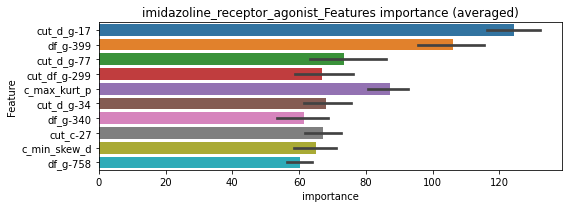

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 imidazoline_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 imidazoline_receptor_agonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000464757	valid_1's binary_logloss: 0.0147225
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 imidazoline_receptor_agonist=================================


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000469835	valid_1's binary_logloss: 0.00638359
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 imidazoline_receptor_agonist=================================


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00053666	valid_1's binary_logloss: 0.00702987
Training until validation scores don't improve for 30 rounds


imidazoline_receptor_agonist logloss: 0.011041589517713621


Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000487486	valid_1's binary_logloss: 0.0160314


immunosuppressant, len(trt): 73, len(othr): 3274
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3274


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00378059	valid_1's binary_logloss: 0.0621316
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00147994	valid_1's binary_logloss: 0.0523223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000787698	valid_1's binary_logloss: 0.0397523
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0080409, Threshold: 0.0195514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 649/3786
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0195514, conf_0:0.01369, conf_1:0.02542
Num_p_label: 13.0, Expected: 12.2, Adj_threshold_1: 0.0495514
threshold: 0.0495514, positive_p_label: 13.0/3982, p_label_rate: 0.0032647


Early stopping, best iteration is:
[305]	training's binary_logloss: 0.00326546	valid_1's binary_logloss: 0.0575921


positive_y_label: 649.0/3786, y_label_rate: 0.1714210
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00121718	valid_1's binary_logloss: 0.0479125
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000926691	valid_1's binary_logloss: 0.0434515
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00145686	valid_1's binary_logloss: 0.0427204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000800914	valid_1's binary_logloss: 0.031829


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0143545, Threshold: 0.0495514, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 644.0/3776
p_label_rate: 0.0037670 Vs.target_rate: 0.00307
Num_p_label: 15.0, Expected: 12.2, Threshold: 0.0495514, conf_0:0.03964, conf_1:0.05946
threshold: 0.0495514, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3776, y_label_rate: 0.1705508
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00260202	valid_1's binary_logloss: 0.0561913
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00119774	valid_1's binary_logloss: 0.0470444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[584]	training's binary_logloss: 0.000650923	valid_1's binary_logloss: 0.0240093
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0178968, Threshold: 0.0495514, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00140817	valid_1's binary_logloss: 0.0441409


Remove_noisy_data: 14 → Positive_corect_labels: 637.0/3762
p_label_rate: 0.0042692 Vs.target_rate: 0.00307
Num_p_label: 17.0, Expected: 12.2, Threshold: 0.0495514, conf_0:0.04460, conf_1:0.05451
threshold: 0.0495514, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 637.0/3762, y_label_rate: 0.1693248


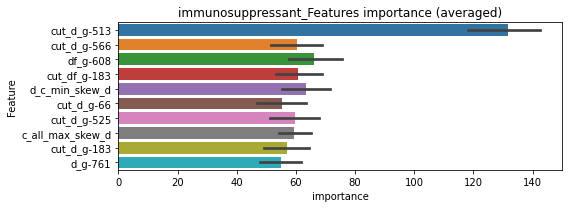

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 immunosuppressant=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 immunosuppressant=================================


Early stopping, best iteration is:
[163]	training's binary_logloss: 0.00341937	valid_1's binary_logloss: 0.0349101
Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 immunosuppressant=================================


Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00162601	valid_1's binary_logloss: 0.0394663
Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 immunosuppressant=================================


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00197611	valid_1's binary_logloss: 0.0338831
Training until validation scores don't improve for 30 rounds


immunosuppressant logloss: 0.03816888514024094
immunosuppressant is unpredictable(><)!


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.0016686	valid_1's binary_logloss: 0.0444181


insulin_secretagogue, len(trt): 30, len(othr): 3282
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3282


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000430497	valid_1's binary_logloss: 0.0254287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.00044493	valid_1's binary_logloss: 0.0147297
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000359762	valid_1's binary_logloss: 0.000693576
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016158, Threshold: 0.0070030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0070030, conf_0:0.00490, conf_1:0.00910
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_1: 0.0370030


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000429182	valid_1's binary_logloss: 0.0204669


threshold: 0.0370030, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000433111	valid_1's binary_logloss: 0.0242957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000594565	valid_1's binary_logloss: 0.0157114
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000358623	valid_1's binary_logloss: 0.000664479
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162509, Threshold: 0.0370030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3802
p_label_rate: 0.0085384 Vs.target_rate: 0.00126
Num_p_label: 34.0, Expected: 5.0, Threshold: 0.0370030, conf_0:0.02960, conf_1:0.04440
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_1: 0.0670030
Num_p_label: 19.0, Expected: 5.0, Adj_threshold_2: 0.0970030
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_3: 0.1270030
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_4: 0.1570030
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_5: 0.1870030
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_6: 0.2170030


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000421922	valid_1's binary_logloss: 0.0212018


threshold: 0.2170030, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3802, y_label_rate: 0.1720147
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000390063	valid_1's binary_logloss: 0.0185526
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000346247	valid_1's binary_logloss: 0.00526996
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000356728	valid_1's binary_logloss: 0.00881181
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0128406, Threshold: 0.2170030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0035158 Vs.target_rate: 0.00126
Num_p_label: 14.0, Expected: 5.0, Threshold: 0.2170030, conf_0:0.19530, conf_1:0.23870
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_1: 0.2470030
Num_p_label: 13.0, Expected: 5.0, Adj_threshold_2: 0.2770030
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.3070030


Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000350647	valid_1's binary_logloss: 0.0139788


threshold: 0.3070030, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 653.0/3800, y_label_rate: 0.1718421


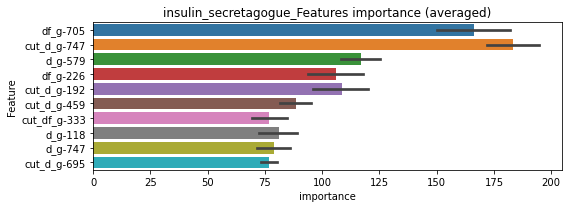

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 insulin_secretagogue=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[273]	training's binary_logloss: 0.000773041	valid_1's binary_logloss: 0.0203643
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000405804	valid_1's binary_logloss: 0.00648155
Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 insulin_secretagogue=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000437541	valid_1's binary_logloss: 0.00723785
Training until validation scores don't improve for 30 rounds


insulin_secretagogue logloss: 0.010597681736652698


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000493301	valid_1's binary_logloss: 0.00830701


insulin_sensitizer, len(trt): 51, len(othr): 3279
target_rate: 0.0021416 → Adj_target_rate: 0.0023748


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000835991	valid_1's binary_logloss: 0.0385323
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000713699	valid_1's binary_logloss: 0.0212434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000727298	valid_1's binary_logloss: 0.0290223
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0029800, Threshold: 0.0062052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 654/3800
p_label_rate: 0.0100452 Vs.target_rate: 0.00214
Num_p_label: 40.0, Expected: 8.5, Threshold: 0.0062052, conf_0:0.00434, conf_1:0.00807
Num_p_label: 0.0, Expected: 8.5, Adj_threshold_1: 0.0362052
threshold: 0.0362052, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.00101161	valid_1's binary_logloss: 0.0417968


positive_y_label: 654.0/3800, y_label_rate: 0.1721053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000921841	valid_1's binary_logloss: 0.0390945
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000504089	valid_1's binary_logloss: 0.0206484
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000685029	valid_1's binary_logloss: 0.0228231
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0074955, Threshold: 0.0362052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3794
p_label_rate: 0.0010045 Vs.target_rate: 0.00214
Num_p_label: 4.0, Expected: 8.5, Threshold: 0.0362052, conf_0:0.02896, conf_1:0.04345
threshold: 0.0362052, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000801112	valid_1's binary_logloss: 0.043252


positive_y_label: 651.0/3794, y_label_rate: 0.1715867
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000543843	valid_1's binary_logloss: 0.0274493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.000895851	valid_1's binary_logloss: 0.0464727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000670837	valid_1's binary_logloss: 0.0148292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000482339	valid_1's binary_logloss: 0.0222041


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0089458, Threshold: 0.0362052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3790
p_label_rate: 0.0005023 Vs.target_rate: 0.00214
Num_p_label: 2.0, Expected: 8.5, Threshold: 0.0362052, conf_0:0.03258, conf_1:0.03983
threshold: 0.0362052, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 649.0/3790, y_label_rate: 0.1712401


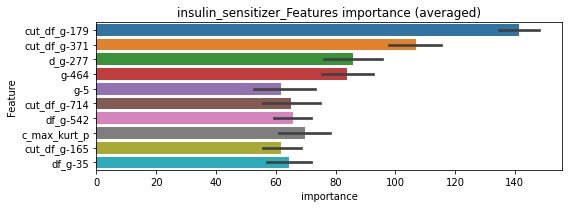

len(train_index) : 2842
len(valid_index) : 948
================================= fold 1/4 insulin_sensitizer=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2842
len(valid_index) : 948
================================= fold 2/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00131138	valid_1's binary_logloss: 0.0282362
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 3/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000805667	valid_1's binary_logloss: 0.0263747
Training until validation scores don't improve for 30 rounds


len(train_index) : 2843
len(valid_index) : 947
================================= fold 4/4 insulin_sensitizer=================================


Early stopping, best iteration is:
[335]	training's binary_logloss: 0.000903827	valid_1's binary_logloss: 0.0230103
Training until validation scores don't improve for 30 rounds


insulin_sensitizer logloss: 0.026625077956377245


Early stopping, best iteration is:
[250]	training's binary_logloss: 0.0013032	valid_1's binary_logloss: 0.0288776


integrin_inhibitor, len(trt): 42, len(othr): 3281
target_rate: 0.0017637 → Adj_target_rate: 0.0020135


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000739988	valid_1's binary_logloss: 0.0392499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000397663	valid_1's binary_logloss: 0.0139173
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000443741	valid_1's binary_logloss: 0.00458236
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022019, Threshold: 0.0046993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00176
Num_p_label: 40.0, Expected: 7.0, Threshold: 0.0046993, conf_0:0.00329, conf_1:0.00611
Num_p_label: 0.0, Expected: 7.0, Adj_threshold_1: 0.0346993
threshold: 0.0346993, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000633541	valid_1's binary_logloss: 0.0217956


positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000487283	valid_1's binary_logloss: 0.0400869
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[594]	training's binary_logloss: 0.000379244	valid_1's binary_logloss: 0.0117588
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000433321	valid_1's binary_logloss: 0.00443796
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0066447, Threshold: 0.0346993, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000468976	valid_1's binary_logloss: 0.0177287


Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0000000 Vs.target_rate: 0.00176
Num_p_label: 0.0, Expected: 7.0, Threshold: 0.0346993, conf_0:0.02776, conf_1:0.04164
threshold: 0.0346993, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000407298	valid_1's binary_logloss: 0.0186493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000438019	valid_1's binary_logloss: 0.0121422
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000396023	valid_1's binary_logloss: 0.0165164
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116484, Threshold: 0.0346993, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0000000 Vs.target_rate: 0.00176
Num_p_label: 0.0, Expected: 7.0, Threshold: 0.0346993, conf_0:0.03123, conf_1:0.03817


Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000600261	valid_1's binary_logloss: 0.0141634


threshold: 0.0346993, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


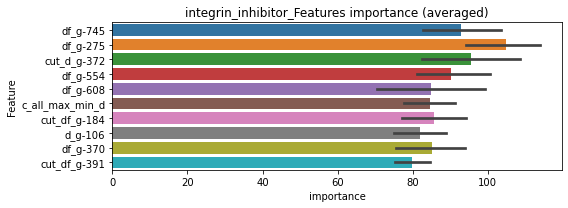

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 integrin_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000550863	valid_1's binary_logloss: 0.0157116
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 integrin_inhibitor=================================


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000692453	valid_1's binary_logloss: 0.0117177
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000458143	valid_1's binary_logloss: 0.0124636


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 integrin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


integrin_inhibitor logloss: 0.01308161237726577


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000680927	valid_1's binary_logloss: 0.0124328


jak_inhibitor, len(trt): 92, len(othr): 3277
target_rate: 0.0038633 → Adj_target_rate: 0.0039212


selected negative label: 3277


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00275371	valid_1's binary_logloss: 0.0862065
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.00848466	valid_1's binary_logloss: 0.0867889
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[521]	training's binary_logloss: 0.00110096	valid_1's binary_logloss: 0.0386553
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0131828, Threshold: 0.0867144, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00188279	valid_1's binary_logloss: 0.058309


Remove_noisy_data: 150 → Positive_corect_labels: 646/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00386
Num_p_label: 40.0, Expected: 15.4, Threshold: 0.0867144, conf_0:0.06070, conf_1:0.11273
Num_p_label: 34.0, Expected: 15.4, Adj_threshold_1: 0.1167144
Num_p_label: 29.0, Expected: 15.4, Adj_threshold_2: 0.1467144
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_3: 0.1767144
Num_p_label: 18.0, Expected: 15.4, Adj_threshold_4: 0.2067144
threshold: 0.2067144, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 646.0/3782, y_label_rate: 0.1708091
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.00618795	valid_1's binary_logloss: 0.0785184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00173243	valid_1's binary_logloss: 0.0680885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00259315	valid_1's binary_logloss: 0.0543779
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0282940, Threshold: 0.2067144, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.00194535	valid_1's binary_logloss: 0.0379797


Remove_noisy_data: 26 → Positive_corect_labels: 633.0/3756
p_label_rate: 0.0082873 Vs.target_rate: 0.00386
Num_p_label: 33.0, Expected: 15.4, Threshold: 0.2067144, conf_0:0.16537, conf_1:0.24806
Num_p_label: 27.0, Expected: 15.4, Adj_threshold_1: 0.2367144
Num_p_label: 24.0, Expected: 15.4, Adj_threshold_2: 0.2667144
Num_p_label: 21.0, Expected: 15.4, Adj_threshold_3: 0.2967144
threshold: 0.2967144, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 633.0/3756, y_label_rate: 0.1685304
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00180744	valid_1's binary_logloss: 0.0545773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00275025	valid_1's binary_logloss: 0.0545035
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00141373	valid_1's binary_logloss: 0.0405367
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0254093, Threshold: 0.2967144, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00165897	valid_1's binary_logloss: 0.0426721


Remove_noisy_data: 22 → Positive_corect_labels: 622.0/3734
p_label_rate: 0.0090407 Vs.target_rate: 0.00386
Num_p_label: 36.0, Expected: 15.4, Threshold: 0.2967144, conf_0:0.26704, conf_1:0.32639
Num_p_label: 33.0, Expected: 15.4, Adj_threshold_1: 0.3267144
Num_p_label: 26.0, Expected: 15.4, Adj_threshold_2: 0.3567144
Num_p_label: 23.0, Expected: 15.4, Adj_threshold_3: 0.3867144
threshold: 0.3867144, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 622.0/3734, y_label_rate: 0.1665774


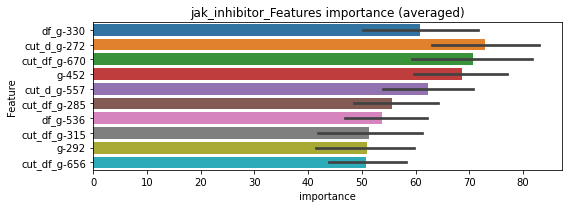

len(train_index) : 2800
len(valid_index) : 934
================================= fold 1/4 jak_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2800
len(valid_index) : 934
================================= fold 2/4 jak_inhibitor=================================


Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00190644	valid_1's binary_logloss: 0.0465484
Training until validation scores don't improve for 30 rounds


len(train_index) : 2801
len(valid_index) : 933
================================= fold 3/4 jak_inhibitor=================================


Early stopping, best iteration is:
[157]	training's binary_logloss: 0.00400166	valid_1's binary_logloss: 0.0523013
Training until validation scores don't improve for 30 rounds


len(train_index) : 2801
len(valid_index) : 933
================================= fold 4/4 jak_inhibitor=================================


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.00127067	valid_1's binary_logloss: 0.026741
Training until validation scores don't improve for 30 rounds


jak_inhibitor logloss: 0.0405030640015268
jak_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.00135794	valid_1's binary_logloss: 0.0364025
mutually exclusive columns: kit_inhibitor


kit_inhibitor, len(trt): 273, len(othr): 6846
target_rate: 0.0114638 → Adj_target_rate: 0.0098841


selected negative label: 6846


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.0110811	valid_1's binary_logloss: 0.116805
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0171908	valid_1's binary_logloss: 0.128502
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0127308	valid_1's binary_logloss: 0.109005
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.0101067	valid_1's binary_logloss: 0.110762


1 / 3, AUC score:0.978, PR-AUC:0.956
y_Threshold: 0.0308294, Threshold: 0.0486298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 478 → Positive_corect_labels: 1267/7737
p_label_rate: 0.0100452 Vs.target_rate: 0.01146
Num_p_label: 40.0, Expected: 45.6, Threshold: 0.0486298, conf_0:0.03404, conf_1:0.06322
threshold: 0.0486298, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1267.0/7737, y_label_rate: 0.1637586
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00722781	valid_1's binary_logloss: 0.0809809
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00722375	valid_1's binary_logloss: 0.0854218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00272114	valid_1's binary_logloss: 0.0548469
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00414272	valid_1's binary_logloss: 0.0805494


2 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0298570, Threshold: 0.0486298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 106 → Positive_corect_labels: 1214.0/7631
p_label_rate: 0.0045203 Vs.target_rate: 0.01146
Num_p_label: 18.0, Expected: 45.6, Threshold: 0.0486298, conf_0:0.03890, conf_1:0.05836
threshold: 0.0486298, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1214.0/7631, y_label_rate: 0.1590879
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00516818	valid_1's binary_logloss: 0.060612
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00275262	valid_1's binary_logloss: 0.0486057
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00510292	valid_1's binary_logloss: 0.0566383
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00240705	valid_1's binary_logloss: 0.0403787


3 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0291423, Threshold: 0.0486298, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1185.0/7573
p_label_rate: 0.0057760 Vs.target_rate: 0.01146
Num_p_label: 23.0, Expected: 45.6, Threshold: 0.0486298, conf_0:0.04377, conf_1:0.05349
threshold: 0.0486298, positive_p_label: 23.0/3982, p_label_rate: 0.0057760
positive_y_label: 1185.0/7573, y_label_rate: 0.1564770


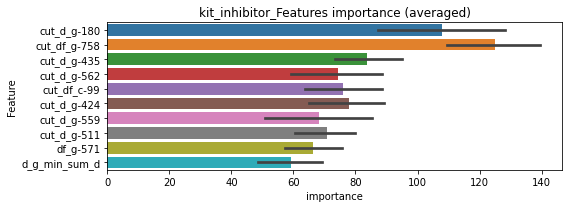

len(train_index) : 5679
len(valid_index) : 1894
================================= fold 1/4 kit_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5680
len(valid_index) : 1893
================================= fold 2/4 kit_inhibitor=================================


Early stopping, best iteration is:
[185]	training's binary_logloss: 0.00344518	valid_1's binary_logloss: 0.0513241
Training until validation scores don't improve for 30 rounds


len(train_index) : 5680
len(valid_index) : 1893
================================= fold 3/4 kit_inhibitor=================================


Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00400487	valid_1's binary_logloss: 0.0498293
Training until validation scores don't improve for 30 rounds


len(train_index) : 5680
len(valid_index) : 1893
================================= fold 4/4 kit_inhibitor=================================


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00237225	valid_1's binary_logloss: 0.0320494
Training until validation scores don't improve for 30 rounds


kit_inhibitor logloss: 0.04342943993253507
kit_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[192]	training's binary_logloss: 0.00334269	valid_1's binary_logloss: 0.0405108


laxative, len(trt): 6, len(othr): 3288
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000137265	valid_1's binary_logloss: 0.000246081
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[215]	training's binary_logloss: 0.000895033	valid_1's binary_logloss: 0.0111296
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000140602	valid_1's binary_logloss: 0.000144505
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009243, Threshold: 0.0013952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013952, conf_0:0.00098, conf_1:0.00181
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0313952
threshold: 0.0313952, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000142872	valid_1's binary_logloss: 0.000149971


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000138145	valid_1's binary_logloss: 0.000206011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00114612	valid_1's binary_logloss: 0.00980124
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00014016	valid_1's binary_logloss: 0.000134649
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0096906, Threshold: 0.0313952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, Expected: 1.0, Threshold: 0.0313952, conf_0:0.02512, conf_1:0.03767


Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000142441	valid_1's binary_logloss: 0.000136835


threshold: 0.0313952, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000136512	valid_1's binary_logloss: 0.000339723
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000154414	valid_1's binary_logloss: 0.00193107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000137149	valid_1's binary_logloss: 0.000131098
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0252490, Threshold: 0.0313952, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0313952, conf_0:0.02826, conf_1:0.03453
threshold: 0.0313952, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000153187	valid_1's binary_logloss: 0.00264065


positive_y_label: 656.0/3811, y_label_rate: 0.1721333


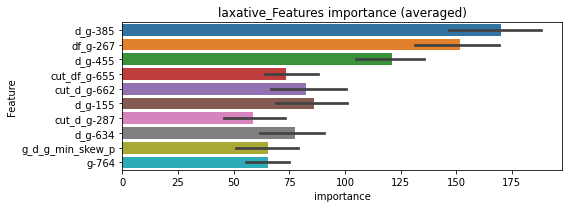

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 laxative=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000139846	valid_1's binary_logloss: 0.000233249


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 laxative=================================


Early stopping, best iteration is:
[1176]	training's binary_logloss: 0.000136481	valid_1's binary_logloss: 0.000229612
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 laxative=================================


Early stopping, best iteration is:
[763]	training's binary_logloss: 0.000150624	valid_1's binary_logloss: 0.00115362
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014033	valid_1's binary_logloss: 0.000136186


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 laxative=================================


Early stopping, best iteration is:
[1132]	training's binary_logloss: 0.000137897	valid_1's binary_logloss: 0.000133613
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000137503	valid_1's binary_logloss: 0.00249576
Early stopping, best iteration is:
[993]	training's binary_logloss: 0.00013777	valid_1's binary_logloss: 0.00249531


laxative logloss: 0.0010026489528362596
leukotriene_inhibitor, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:504
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000148541	valid_1's binary_logloss: 0.00254653
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000187779	valid_1's binary_logloss: 0.00535636
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000144182	valid_1's binary_logloss: 0.000186066
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003902, Threshold: 0.0009245, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000142638	valid_1's binary_logloss: 0.000173697


p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0009245, conf_0:0.00065, conf_1:0.00120
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0309245
threshold: 0.0309245, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000148743	valid_1's binary_logloss: 0.00234226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000160579	valid_1's binary_logloss: 0.00485322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000140961	valid_1's binary_logloss: 0.000138266
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0075712, Threshold: 0.0309245, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0015068 Vs.target_rate: 0.00025
Num_p_label: 6.0, Expected: 1.0, Threshold: 0.0309245, conf_0:0.02474, conf_1:0.03711
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0609245
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_2: 0.0909245
threshold: 0.0909245, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000140218	valid_1's binary_logloss: 0.000134002


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000148743	valid_1's binary_logloss: 0.00234226
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000160579	valid_1's binary_logloss: 0.00485322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000140961	valid_1's binary_logloss: 0.000138266
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0075712, Threshold: 0.0909245, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0000000 Vs.target_rate: 0.00025
Num_p_label: 0.0, Expected: 1.0, Threshold: 0.0909245, conf_0:0.08183, conf_1:0.10002
threshold: 0.0909245, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000140218	valid_1's binary_logloss: 0.000134002


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


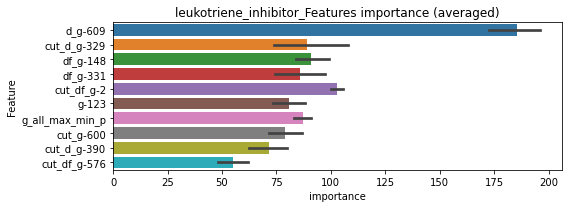

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000161923	valid_1's binary_logloss: 0.00148064
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 leukotriene_inhibitor=================================


Early stopping, best iteration is:
[609]	training's binary_logloss: 0.000165351	valid_1's binary_logloss: 0.00347634
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000140837	valid_1's binary_logloss: 0.000139272
Early stopping, best iteration is:
[1033]	training's binary_logloss: 0.000140345	valid_1's binary_logloss: 0.000138656


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 leukotriene_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000140789	valid_1's binary_logloss: 0.000136759
Early stopping, best iteration is:
[1030]	training's binary_logloss: 0.000140214	valid_1's binary_logloss: 0.000136135


leukotriene_inhibitor logloss: 0.00130794373928399
leukotriene_receptor_antagonist, len(trt): 62, len(othr): 3281
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3281


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.00318241	valid_1's binary_logloss: 0.0739977
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.00203748	valid_1's binary_logloss: 0.0573684
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[626]	training's binary_logloss: 0.000568411	valid_1's binary_logloss: 0.011467
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0060130, Threshold: 0.0111947, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.00117675	valid_1's binary_logloss: 0.0428949


Remove_noisy_data: 134 → Positive_corect_labels: 655/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0111947, conf_0:0.00784, conf_1:0.01455
Num_p_label: 0.0, Expected: 10.4, Adj_threshold_1: 0.0411947
threshold: 0.0411947, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00124716	valid_1's binary_logloss: 0.0496903
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000978249	valid_1's binary_logloss: 0.037782
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000758708	valid_1's binary_logloss: 0.0283512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000749835	valid_1's binary_logloss: 0.0421287


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0162791, Threshold: 0.0411947, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 650.0/3793
p_label_rate: 0.0007534 Vs.target_rate: 0.00260
Num_p_label: 3.0, Expected: 10.4, Threshold: 0.0411947, conf_0:0.03296, conf_1:0.04943
threshold: 0.0411947, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 650.0/3793, y_label_rate: 0.1713683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00108092	valid_1's binary_logloss: 0.0433642
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00456878	valid_1's binary_logloss: 0.0495418
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000906314	valid_1's binary_logloss: 0.0327193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000593789	valid_1's binary_logloss: 0.0330841


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0195249, Threshold: 0.0411947, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0007534 Vs.target_rate: 0.00260
Num_p_label: 3.0, Expected: 10.4, Threshold: 0.0411947, conf_0:0.03708, conf_1:0.04531
threshold: 0.0411947, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 642.0/3777, y_label_rate: 0.1699762


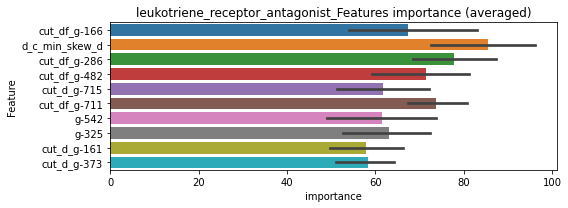

len(train_index) : 2832
len(valid_index) : 945
================================= fold 1/4 leukotriene_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 2/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00109603	valid_1's binary_logloss: 0.040878
Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 3/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00123512	valid_1's binary_logloss: 0.0475566
Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 944
================================= fold 4/4 leukotriene_receptor_antagonist=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000795485	valid_1's binary_logloss: 0.0130555
Training until validation scores don't improve for 30 rounds


leukotriene_receptor_antagonist logloss: 0.03300240238475269
leukotriene_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.00129769	valid_1's binary_logloss: 0.0305112


lipase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000250408	valid_1's binary_logloss: 0.00885695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000201873	valid_1's binary_logloss: 0.00146206
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000205009	valid_1's binary_logloss: 0.000193455
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006131, Threshold: 0.0011848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0011848, conf_0:0.00083, conf_1:0.00154
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0311848
threshold: 0.0311848, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000199266	valid_1's binary_logloss: 0.00965747


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000246149	valid_1's binary_logloss: 0.0105836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000201979	valid_1's binary_logloss: 0.000801052
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000202902	valid_1's binary_logloss: 0.00023309
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0070326, Threshold: 0.0311848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, Expected: 2.0, Threshold: 0.0311848, conf_0:0.02495, conf_1:0.03742
threshold: 0.0311848, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000197373	valid_1's binary_logloss: 0.00922307


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000246149	valid_1's binary_logloss: 0.0105836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000201979	valid_1's binary_logloss: 0.000801052
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000202902	valid_1's binary_logloss: 0.00023309
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0070326, Threshold: 0.0311848, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00050
Num_p_label: 1.0, Expected: 2.0, Threshold: 0.0311848, conf_0:0.02807, conf_1:0.03430
threshold: 0.0311848, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000197373	valid_1's binary_logloss: 0.00922307


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


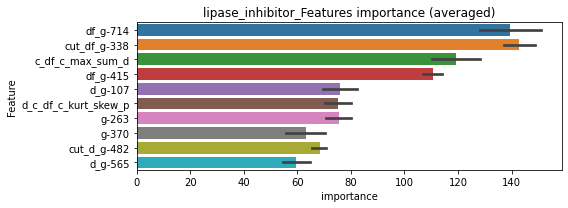

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000219221	valid_1's binary_logloss: 0.00728896


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 lipase_inhibitor=================================


Early stopping, best iteration is:
[829]	training's binary_logloss: 0.000202605	valid_1's binary_logloss: 0.000565249
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[802]	training's binary_logloss: 0.000205583	valid_1's binary_logloss: 0.000226213


================================= fold 4/4 lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


lipase_inhibitor logloss: 0.003709760554311335


Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000197552	valid_1's binary_logloss: 0.00675486


lipoxygenase_inhibitor, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00216493	valid_1's binary_logloss: 0.0503227
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000847022	valid_1's binary_logloss: 0.0303703
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00188485	valid_1's binary_logloss: 0.0305953
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0076830, Threshold: 0.0510195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0510195, conf_0:0.03571, conf_1:0.06633
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_1: 0.0810195
Num_p_label: 24.0, Expected: 10.2, Adj_threshold_2: 0.1110195
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_3: 0.1410195
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_4: 0.1710195
threshold: 0.1710195, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00361405	valid_1's binary_logloss: 0.0461115


positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00112298	valid_1's binary_logloss: 0.0430221
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00265273	valid_1's binary_logloss: 0.0426051
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000769181	valid_1's binary_logloss: 0.0381351
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.00065727	valid_1's binary_logloss: 0.0211808


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0198740, Threshold: 0.1710195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 645.0/3782
p_label_rate: 0.0082873 Vs.target_rate: 0.00256
Num_p_label: 33.0, Expected: 10.2, Threshold: 0.1710195, conf_0:0.13682, conf_1:0.20522
Num_p_label: 29.0, Expected: 10.2, Adj_threshold_1: 0.2010195
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_2: 0.2310195
Num_p_label: 25.0, Expected: 10.2, Adj_threshold_3: 0.2610195
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_4: 0.2910195
Num_p_label: 23.0, Expected: 10.2, Adj_threshold_5: 0.3210195
Num_p_label: 19.0, Expected: 10.2, Adj_threshold_6: 0.3510195
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_7: 0.3810195
Num_p_label: 14.0, Expected: 10.2, Adj_threshold_8: 0.4110195
threshold: 0.4110195, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 645.0/3782, y_label_rate: 0.1705447
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00074674	valid_1's binary_logloss: 0.0353473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000742115	valid_1's binary_logloss: 0.026529
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.00054509	valid_1's binary_logloss: 0.0193874
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0152978, Threshold: 0.4110195, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0035158 Vs.target_rate: 0.00256
Num_p_label: 14.0, Expected: 10.2, Threshold: 0.4110195, conf_0:0.36992, conf_1:0.45212
threshold: 0.4110195, positive_p_label: 14.0/3982, p_label_rate: 0.0035158


Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000987595	valid_1's binary_logloss: 0.0357642


positive_y_label: 641.0/3774, y_label_rate: 0.1698463


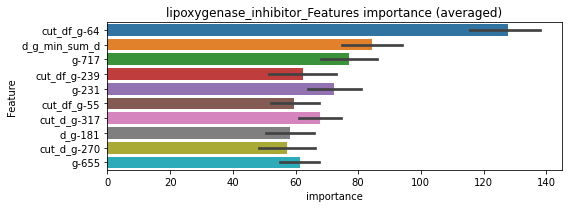

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 lipoxygenase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00112071	valid_1's binary_logloss: 0.0353216
Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[347]	training's binary_logloss: 0.000922923	valid_1's binary_logloss: 0.0275244
Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 lipoxygenase_inhibitor=================================


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000902626	valid_1's binary_logloss: 0.0228004
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[488]	training's binary_logloss: 0.000672763	valid_1's binary_logloss: 0.0159518


lipoxygenase_inhibitor logloss: 0.025402752754425068
lxr_agonist, len(trt): 6, len(othr): 3287
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3287


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000147477	valid_1's binary_logloss: 0.000377901
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.0001697	valid_1's binary_logloss: 0.00391471
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000154358	valid_1's binary_logloss: 0.000170105
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004111, Threshold: 0.0024438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0024438, conf_0:0.00171, conf_1:0.00318
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_1: 0.0324438
threshold: 0.0324438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000151304	valid_1's binary_logloss: 0.00426395


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000140177	valid_1's binary_logloss: 0.000172602
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000161381	valid_1's binary_logloss: 0.00271546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00014265	valid_1's binary_logloss: 0.000170315
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0063357, Threshold: 0.0324438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0022602 Vs.target_rate: 0.00025
Num_p_label: 9.0, Expected: 1.0, Threshold: 0.0324438, conf_0:0.02596, conf_1:0.03893
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_1: 0.0624438
Num_p_label: 9.0, Expected: 1.0, Adj_threshold_2: 0.0924438
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_3: 0.1224438
Num_p_label: 6.0, Expected: 1.0, Adj_threshold_4: 0.1524438
Num_p_label: 4.0, Expected: 1.0, Adj_threshold_5: 0.1824438
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_6: 0.2124438
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_7: 0.2424438


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000141268	valid_1's binary_logloss: 0.00411168


threshold: 0.2424438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000140177	valid_1's binary_logloss: 0.000172602
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000161381	valid_1's binary_logloss: 0.00271546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.00014265	valid_1's binary_logloss: 0.000170315
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0063357, Threshold: 0.2424438, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.2424438, conf_0:0.21820, conf_1:0.26669


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000141268	valid_1's binary_logloss: 0.00411168


threshold: 0.2424438, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3812, y_label_rate: 0.1723505


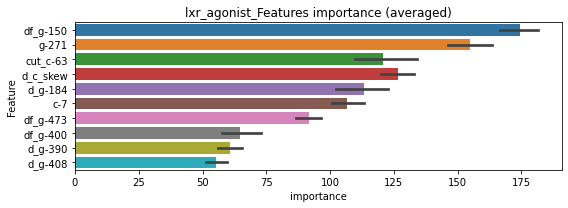

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000144214	valid_1's binary_logloss: 0.000217444
Early stopping, best iteration is:
[1036]	training's binary_logloss: 0.00014377	valid_1's binary_logloss: 0.000217048


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 lxr_agonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.00018087	valid_1's binary_logloss: 0.00245474
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000143975	valid_1's binary_logloss: 0.000186142
Early stopping, best iteration is:
[1039]	training's binary_logloss: 0.000143623	valid_1's binary_logloss: 0.000185662


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 lxr_agonist=================================


Training until validation scores don't improve for 30 rounds


lxr_agonist logloss: 0.0013318261061946801


Early stopping, best iteration is:
[847]	training's binary_logloss: 0.000147285	valid_1's binary_logloss: 0.00246986


mdm_inhibitor, len(trt): 31, len(othr): 3287
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00161584	valid_1's binary_logloss: 0.0207747
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[394]	training's binary_logloss: 0.000541868	valid_1's binary_logloss: 0.0182218
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000367225	valid_1's binary_logloss: 0.00161757
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0026452, Threshold: 0.0363479, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0363479, conf_0:0.02544, conf_1:0.04725
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_1: 0.0663479
Num_p_label: 25.0, Expected: 5.2, Adj_threshold_2: 0.0963479


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000685455	valid_1's binary_logloss: 0.0256198


Num_p_label: 18.0, Expected: 5.2, Adj_threshold_3: 0.1263479
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_4: 0.1563479
Num_p_label: 9.0, Expected: 5.2, Adj_threshold_5: 0.1863479
threshold: 0.1863479, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[240]	training's binary_logloss: 0.0018571	valid_1's binary_logloss: 0.0229942
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000715934	valid_1's binary_logloss: 0.0211555
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000356442	valid_1's binary_logloss: 0.000802524
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219614, Threshold: 0.1863479, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0123054 Vs.target_rate: 0.00130
Num_p_label: 49.0, Expected: 5.2, Threshold: 0.1863479, conf_0:0.14908, conf_1:0.22362
Num_p_label: 46.0, Expected: 5.2, Adj_threshold_1: 0.2163479
Num_p_label: 44.0, Expected: 5.2, Adj_threshold_2: 0.2463479
Num_p_label: 40.0, Expected: 5.2, Adj_threshold_3: 0.2763479
Num_p_label: 37.0, Expected: 5.2, Adj_threshold_4: 0.3063479


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000400734	valid_1's binary_logloss: 0.0144902


Num_p_label: 34.0, Expected: 5.2, Adj_threshold_5: 0.3363479
Num_p_label: 33.0, Expected: 5.2, Adj_threshold_6: 0.3663479
Num_p_label: 32.0, Expected: 5.2, Adj_threshold_7: 0.3963479
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_8: 0.4263479
Num_p_label: 30.0, Expected: 5.2, Adj_threshold_9: 0.4563479
Num_p_label: 28.0, Expected: 5.2, Adj_threshold_10: 0.4863479
threshold: 0.4863479, positive_p_label: 28.0/3982, p_label_rate: 0.0070316
positive_y_label: 654.0/3806, y_label_rate: 0.1718339
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.00034586	valid_1's binary_logloss: 0.0209913
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000454498	valid_1's binary_logloss: 0.00676984
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000462606	valid_1's binary_logloss: 0.00988189
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0146612, Threshold: 0.4863479, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3802
p_label_rate: 0.0067805 Vs.target_rate: 0.00130
Num_p_label: 27.0, Expected: 5.2, Threshold: 0.4863479, conf_0:0.43771, conf_1:0.53498
Num_p_label: 24.0, Expected: 5.2, Adj_threshold_1: 0.5163479
Num_p_label: 21.0, Expected: 5.2, Adj_threshold_2: 0.5463479


Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000461421	valid_1's binary_logloss: 0.0139652


Num_p_label: 17.0, Expected: 5.2, Adj_threshold_3: 0.5763479
Num_p_label: 17.0, Expected: 5.2, Adj_threshold_4: 0.6063479
Num_p_label: 14.0, Expected: 5.2, Adj_threshold_5: 0.6363479
Num_p_label: 10.0, Expected: 5.2, Adj_threshold_6: 0.6663479
threshold: 0.6663479, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 652.0/3802, y_label_rate: 0.1714887


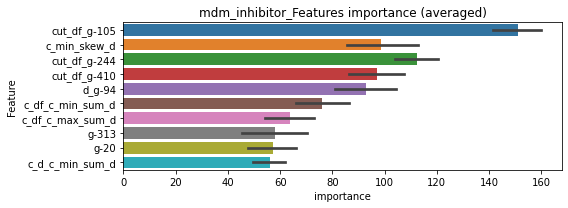

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 mdm_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 mdm_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000546733	valid_1's binary_logloss: 0.0131581
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 mdm_inhibitor=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.00039974	valid_1's binary_logloss: 0.00352533
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 mdm_inhibitor=================================


Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000441978	valid_1's binary_logloss: 0.00892009
Training until validation scores don't improve for 30 rounds


mdm_inhibitor logloss: 0.009492093267008988


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00056295	valid_1's binary_logloss: 0.0123673


mek_inhibitor, len(trt): 72, len(othr): 3273
target_rate: 0.0030234 → Adj_target_rate: 0.0031837


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00194863	valid_1's binary_logloss: 0.0586274
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000715773	valid_1's binary_logloss: 0.0401767
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00141607	valid_1's binary_logloss: 0.0399285
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0057088, Threshold: 0.0113964, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 652/3791


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00158609	valid_1's binary_logloss: 0.0499886


p_label_rate: 0.0100452 Vs.target_rate: 0.00302
Num_p_label: 40.0, Expected: 12.0, Threshold: 0.0113964, conf_0:0.00798, conf_1:0.01482
Num_p_label: 0.0, Expected: 12.0, Adj_threshold_1: 0.0413964
threshold: 0.0413964, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 652.0/3791, y_label_rate: 0.1719863
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00236816	valid_1's binary_logloss: 0.0486713
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00384192	valid_1's binary_logloss: 0.0573224
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00106082	valid_1's binary_logloss: 0.0334022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[571]	training's binary_logloss: 0.000658072	valid_1's binary_logloss: 0.0323086


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0192633, Threshold: 0.0413964, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 643.0/3773
p_label_rate: 0.0007534 Vs.target_rate: 0.00302
Num_p_label: 3.0, Expected: 12.0, Threshold: 0.0413964, conf_0:0.03312, conf_1:0.04968
threshold: 0.0413964, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 643.0/3773, y_label_rate: 0.1704214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.0010945	valid_1's binary_logloss: 0.0466855
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000986175	valid_1's binary_logloss: 0.0358319
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000754216	valid_1's binary_logloss: 0.0305902
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.000604619	valid_1's binary_logloss: 0.0283475


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0143843, Threshold: 0.0413964, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 639.0/3765
p_label_rate: 0.0000000 Vs.target_rate: 0.00302
Num_p_label: 0.0, Expected: 12.0, Threshold: 0.0413964, conf_0:0.03726, conf_1:0.04554
threshold: 0.0413964, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 639.0/3765, y_label_rate: 0.1697211


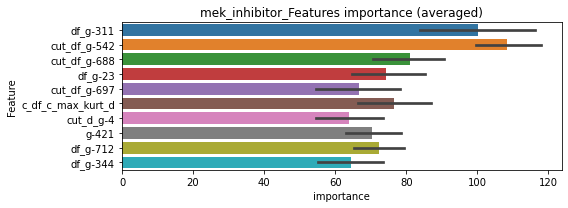

len(train_index) : 2823
len(valid_index) : 942
================================= fold 1/4 mek_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2824
len(valid_index) : 941
================================= fold 2/4 mek_inhibitor=================================


Early stopping, best iteration is:
[277]	training's binary_logloss: 0.00150746	valid_1's binary_logloss: 0.0381007
Training until validation scores don't improve for 30 rounds


len(train_index) : 2824
len(valid_index) : 941
================================= fold 3/4 mek_inhibitor=================================


Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00171762	valid_1's binary_logloss: 0.0428911
Training until validation scores don't improve for 30 rounds


len(train_index) : 2824
len(valid_index) : 941
================================= fold 4/4 mek_inhibitor=================================


Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00118359	valid_1's binary_logloss: 0.0217257
Training until validation scores don't improve for 30 rounds


mek_inhibitor logloss: 0.03792003161835355
mek_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00303415	valid_1's binary_logloss: 0.0489624


membrane_integrity_inhibitor, len(trt): 74, len(othr): 3279
target_rate: 0.0031074 → Adj_target_rate: 0.0032587


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00120169	valid_1's binary_logloss: 0.050972
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000966627	valid_1's binary_logloss: 0.0436385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000911527	valid_1's binary_logloss: 0.0422026
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0057623, Threshold: 0.0147149, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00311
Num_p_label: 40.0, Expected: 12.4, Threshold: 0.0147149, conf_0:0.01030, conf_1:0.01913
Num_p_label: 2.0, Expected: 12.4, Adj_threshold_1: 0.0447149
threshold: 0.0447149, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00198674	valid_1's binary_logloss: 0.0479551


positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00233382	valid_1's binary_logloss: 0.0420666
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00370446	valid_1's binary_logloss: 0.0459133
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[289]	training's binary_logloss: 0.00362462	valid_1's binary_logloss: 0.0509198
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000613281	valid_1's binary_logloss: 0.0274878


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0336986, Threshold: 0.0447149, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0032647 Vs.target_rate: 0.00311
Num_p_label: 13.0, Expected: 12.4, Threshold: 0.0447149, conf_0:0.03577, conf_1:0.05366
threshold: 0.0447149, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000743105	valid_1's binary_logloss: 0.0483199
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.00119152	valid_1's binary_logloss: 0.05428
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00121879	valid_1's binary_logloss: 0.0294256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000651353	valid_1's binary_logloss: 0.018231


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0158688, Threshold: 0.0447149, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 641.0/3774
p_label_rate: 0.0015068 Vs.target_rate: 0.00311
Num_p_label: 6.0, Expected: 12.4, Threshold: 0.0447149, conf_0:0.04024, conf_1:0.04919
threshold: 0.0447149, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 641.0/3774, y_label_rate: 0.1698463


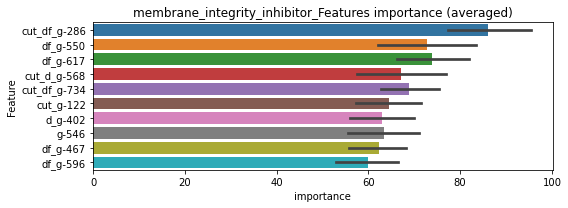

len(train_index) : 2830
len(valid_index) : 944
================================= fold 1/4 membrane_integrity_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 944
================================= fold 2/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00139731	valid_1's binary_logloss: 0.0506902
Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 3/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.00167279	valid_1's binary_logloss: 0.0417566
Training until validation scores don't improve for 30 rounds


len(train_index) : 2831
len(valid_index) : 943
================================= fold 4/4 membrane_integrity_inhibitor=================================


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00149963	valid_1's binary_logloss: 0.030588
Training until validation scores don't improve for 30 rounds


membrane_integrity_inhibitor logloss: 0.0366152384021276
membrane_integrity_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000917835	valid_1's binary_logloss: 0.0234058


mineralocorticoid_receptor_antagonist, len(trt): 25, len(othr): 3281
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000362727	valid_1's binary_logloss: 0.0166181
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000339351	valid_1's binary_logloss: 0.00702886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.00033022	valid_1's binary_logloss: 0.00314204
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012703, Threshold: 0.0030948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0030948, conf_0:0.00217, conf_1:0.00402
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0330948
threshold: 0.0330948, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000348372	valid_1's binary_logloss: 0.013055


positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000354882	valid_1's binary_logloss: 0.0170868
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.00034524	valid_1's binary_logloss: 0.00794762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000323796	valid_1's binary_logloss: 0.00339131
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077619, Threshold: 0.0330948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0330948, conf_0:0.02648, conf_1:0.03971
threshold: 0.0330948, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000387499	valid_1's binary_logloss: 0.0101089


positive_y_label: 655.0/3803, y_label_rate: 0.1722324
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000306826	valid_1's binary_logloss: 0.0126156
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000358406	valid_1's binary_logloss: 0.0108499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000346116	valid_1's binary_logloss: 0.0028682
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0139073, Threshold: 0.0330948, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3803
p_label_rate: 0.0005023 Vs.target_rate: 0.00105
Num_p_label: 2.0, Expected: 4.2, Threshold: 0.0330948, conf_0:0.02979, conf_1:0.03640


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000324428	valid_1's binary_logloss: 0.0110082


threshold: 0.0330948, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/3803, y_label_rate: 0.1722324


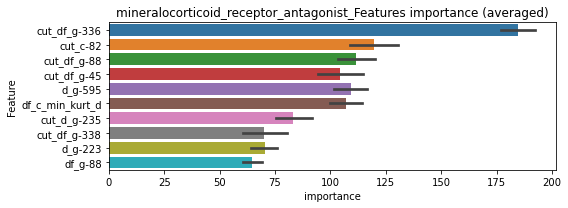

len(train_index) : 2852
len(valid_index) : 951
================================= fold 1/4 mineralocorticoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 2/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000354524	valid_1's binary_logloss: 0.00981865
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 951
================================= fold 3/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000424887	valid_1's binary_logloss: 0.010106
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 950
================================= fold 4/4 mineralocorticoid_receptor_antagonist=================================


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.000363943	valid_1's binary_logloss: 0.00316207
Training until validation scores don't improve for 30 rounds


mineralocorticoid_receptor_antagonist logloss: 0.008352292319493552


Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000412031	valid_1's binary_logloss: 0.0103245


monoacylglycerol_lipase_inhibitor, len(trt): 12, len(othr): 3284
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3284


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000226663	valid_1's binary_logloss: 0.0099098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00022019	valid_1's binary_logloss: 0.00769365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.00021305	valid_1's binary_logloss: 0.000226151
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0005904, Threshold: 0.0013811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0013811, conf_0:0.00097, conf_1:0.00180
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0313811


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000232592	valid_1's binary_logloss: 0.00233237


threshold: 0.0313811, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000229697	valid_1's binary_logloss: 0.00946854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000213143	valid_1's binary_logloss: 0.00797731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000210323	valid_1's binary_logloss: 0.000219567
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044871, Threshold: 0.0313811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.0313811, conf_0:0.02510, conf_1:0.03766
threshold: 0.0313811, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000219362	valid_1's binary_logloss: 0.00218562


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000229697	valid_1's binary_logloss: 0.00946854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000213143	valid_1's binary_logloss: 0.00797731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000210323	valid_1's binary_logloss: 0.000219567
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044871, Threshold: 0.0313811, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0007534 Vs.target_rate: 0.00050
Num_p_label: 3.0, Expected: 2.0, Threshold: 0.0313811, conf_0:0.02824, conf_1:0.03452
threshold: 0.0313811, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000219362	valid_1's binary_logloss: 0.00218562


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


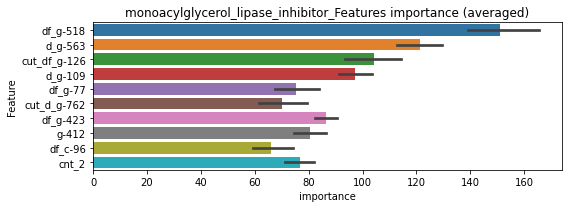

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 monoacylglycerol_lipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000230265	valid_1's binary_logloss: 0.00750523
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[659]	training's binary_logloss: 0.000216337	valid_1's binary_logloss: 0.00577537
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 monoacylglycerol_lipase_inhibitor=================================


Early stopping, best iteration is:
[720]	training's binary_logloss: 0.000218124	valid_1's binary_logloss: 0.000218046
Training until validation scores don't improve for 30 rounds


monoacylglycerol_lipase_inhibitor logloss: 0.0036614848568377305


Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000213271	valid_1's binary_logloss: 0.00114649


monoamine_oxidase_inhibitor, len(trt): 85, len(othr): 3272
target_rate: 0.0035693 → Adj_target_rate: 0.0036661


selected negative label: 3272


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00297799	valid_1's binary_logloss: 0.0786825
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000847318	valid_1's binary_logloss: 0.0534546
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00164307	valid_1's binary_logloss: 0.0560296
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0074067, Threshold: 0.0178240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 144 → Positive_corect_labels: 648/3782
p_label_rate: 0.0100452 Vs.target_rate: 0.00357
Num_p_label: 40.0, Expected: 14.2, Threshold: 0.0178240, conf_0:0.01248, conf_1:0.02317
Num_p_label: 4.0, Expected: 14.2, Adj_threshold_1: 0.0478240
threshold: 0.0478240, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00244963	valid_1's binary_logloss: 0.0687559


positive_y_label: 648.0/3782, y_label_rate: 0.1713379
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00330733	valid_1's binary_logloss: 0.0720038
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00384481	valid_1's binary_logloss: 0.0632923
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[293]	training's binary_logloss: 0.00388271	valid_1's binary_logloss: 0.0695481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.000738155	valid_1's binary_logloss: 0.0446923


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0206265, Threshold: 0.0478240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 634.0/3754
p_label_rate: 0.0025113 Vs.target_rate: 0.00357
Num_p_label: 10.0, Expected: 14.2, Threshold: 0.0478240, conf_0:0.03826, conf_1:0.05739
threshold: 0.0478240, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 634.0/3754, y_label_rate: 0.1688865
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00299154	valid_1's binary_logloss: 0.053978
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00296806	valid_1's binary_logloss: 0.0580436
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00286453	valid_1's binary_logloss: 0.0647656
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000941247	valid_1's binary_logloss: 0.0359834


y_Threshold: 0.0220070, Threshold: 0.0478240, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 624.0/3734
p_label_rate: 0.0022602 Vs.target_rate: 0.00357
Num_p_label: 9.0, Expected: 14.2, Threshold: 0.0478240, conf_0:0.04304, conf_1:0.05261
threshold: 0.0478240, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 624.0/3734, y_label_rate: 0.1671130


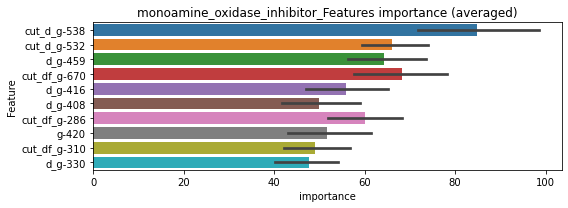

len(train_index) : 2800
len(valid_index) : 934
================================= fold 1/4 monoamine_oxidase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2800
len(valid_index) : 934
================================= fold 2/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[184]	training's binary_logloss: 0.00278958	valid_1's binary_logloss: 0.0523453
Training until validation scores don't improve for 30 rounds


len(train_index) : 2801
len(valid_index) : 933
================================= fold 3/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[167]	training's binary_logloss: 0.00325475	valid_1's binary_logloss: 0.0473229
Training until validation scores don't improve for 30 rounds


len(train_index) : 2801
len(valid_index) : 933
================================= fold 4/4 monoamine_oxidase_inhibitor=================================


Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00346554	valid_1's binary_logloss: 0.0328734
Training until validation scores don't improve for 30 rounds


monoamine_oxidase_inhibitor logloss: 0.04735663255196617
monoamine_oxidase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[109]	training's binary_logloss: 0.00682719	valid_1's binary_logloss: 0.0568796


monopolar_spindle_1_kinase_inhibitor, len(trt): 18, len(othr): 3289
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000306723	valid_1's binary_logloss: 0.00311457
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000287489	valid_1's binary_logloss: 0.00609477
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000276854	valid_1's binary_logloss: 0.00112744
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012377, Threshold: 0.0085776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0085776, conf_0:0.00600, conf_1:0.01115
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_1: 0.0385776
Num_p_label: 8.0, Expected: 3.0, Adj_threshold_2: 0.0685776
Num_p_label: 4.0, Expected: 3.0, Adj_threshold_3: 0.0985776
threshold: 0.0985776, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00040545	valid_1's binary_logloss: 0.0115034


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000280611	valid_1's binary_logloss: 0.0025621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000285007	valid_1's binary_logloss: 0.00447322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000264192	valid_1's binary_logloss: 0.00131371
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149698, Threshold: 0.0985776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0037670 Vs.target_rate: 0.00076
Num_p_label: 15.0, Expected: 3.0, Threshold: 0.0985776, conf_0:0.07886, conf_1:0.11829
Num_p_label: 13.0, Expected: 3.0, Adj_threshold_1: 0.1285776
Num_p_label: 12.0, Expected: 3.0, Adj_threshold_2: 0.1585776
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_3: 0.1885776
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_4: 0.2185776
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_5: 0.2485776


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.000998474	valid_1's binary_logloss: 0.0106455


threshold: 0.2485776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000280611	valid_1's binary_logloss: 0.0025621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[431]	training's binary_logloss: 0.000285007	valid_1's binary_logloss: 0.00447322
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000264192	valid_1's binary_logloss: 0.00131371
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0149698, Threshold: 0.2485776, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0015068 Vs.target_rate: 0.00076
Num_p_label: 6.0, Expected: 3.0, Threshold: 0.2485776, conf_0:0.22372, conf_1:0.27344
threshold: 0.2485776, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[256]	training's binary_logloss: 0.000998474	valid_1's binary_logloss: 0.0106455


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


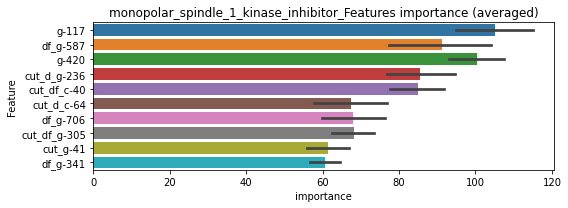

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 monopolar_spindle_1_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[726]	training's binary_logloss: 0.000270133	valid_1's binary_logloss: 0.00249229
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[693]	training's binary_logloss: 0.000267799	valid_1's binary_logloss: 0.00401812
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 monopolar_spindle_1_kinase_inhibitor=================================


Early stopping, best iteration is:
[664]	training's binary_logloss: 0.000279997	valid_1's binary_logloss: 0.00113249
Training until validation scores don't improve for 30 rounds


monopolar_spindle_1_kinase_inhibitor logloss: 0.004355485330951716


Early stopping, best iteration is:
[188]	training's binary_logloss: 0.000882376	valid_1's binary_logloss: 0.00977835


mtor_inhibitor, len(trt): 130, len(othr): 2722
target_rate: 0.0054590 → Adj_target_rate: 0.0052608


mutually exclusive columns: mtor_inhibitor
selected negative label: 2722


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00458545	valid_1's binary_logloss: 0.119498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[379]	training's binary_logloss: 0.00468315	valid_1's binary_logloss: 0.103068
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00803941	valid_1's binary_logloss: 0.138016
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.982, PR-AUC:0.967
y_Threshold: 0.0236902, Threshold: 0.0450320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 166 → Positive_corect_labels: 516/3100
p_label_rate: 0.0100452 Vs.target_rate: 0.00546
Num_p_label: 40.0, Expected: 21.7, Threshold: 0.0450320, conf_0:0.03152, conf_1:0.05854


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00471482	valid_1's binary_logloss: 0.0996347


Num_p_label: 8.0, Expected: 21.7, Adj_threshold_1: 0.0750320
threshold: 0.0750320, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 516.0/3100, y_label_rate: 0.1664516
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00349811	valid_1's binary_logloss: 0.0917753
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00351504	valid_1's binary_logloss: 0.0960498
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.001683	valid_1's binary_logloss: 0.0567116
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.997, PR-AUC:0.994
y_Threshold: 0.0371990, Threshold: 0.0750320, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00284453	valid_1's binary_logloss: 0.0853803


Remove_noisy_data: 24 → Positive_corect_labels: 504.0/3076
p_label_rate: 0.0067805 Vs.target_rate: 0.00546
Num_p_label: 27.0, Expected: 21.7, Threshold: 0.0750320, conf_0:0.06003, conf_1:0.09004
threshold: 0.0750320, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 504.0/3076, y_label_rate: 0.1638492
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[318]	training's binary_logloss: 0.00515271	valid_1's binary_logloss: 0.0992119
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00381284	valid_1's binary_logloss: 0.0628263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00258382	valid_1's binary_logloss: 0.0641079
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.993, PR-AUC:0.987


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.00468656	valid_1's binary_logloss: 0.0946423


y_Threshold: 0.0380892, Threshold: 0.0750320, pos_neg_ratio: 0.8000000
Remove_noisy_data: 42 → Positive_corect_labels: 483.0/3034
p_label_rate: 0.0087896 Vs.target_rate: 0.00546
Num_p_label: 35.0, Expected: 21.7, Threshold: 0.0750320, conf_0:0.06753, conf_1:0.08254
Num_p_label: 22.0, Expected: 21.7, Adj_threshold_1: 0.1050320
threshold: 0.1050320, positive_p_label: 22.0/3982, p_label_rate: 0.0055249
positive_y_label: 483.0/3034, y_label_rate: 0.1591958


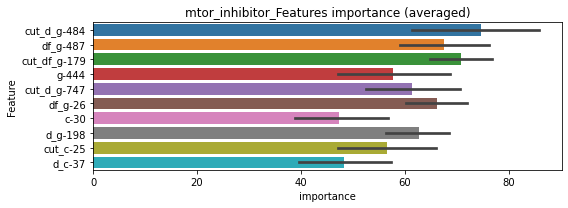

len(train_index) : 2275
len(valid_index) : 759
================================= fold 1/4 mtor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2275
len(valid_index) : 759
================================= fold 2/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[191]	training's binary_logloss: 0.0044538	valid_1's binary_logloss: 0.0794703
Training until validation scores don't improve for 30 rounds


len(train_index) : 2276
len(valid_index) : 758
================================= fold 3/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[213]	training's binary_logloss: 0.00384441	valid_1's binary_logloss: 0.0669904
Training until validation scores don't improve for 30 rounds


len(train_index) : 2276
len(valid_index) : 758
================================= fold 4/4 mtor_inhibitor=================================


Early stopping, best iteration is:
[240]	training's binary_logloss: 0.00319773	valid_1's binary_logloss: 0.0630023
Training until validation scores don't improve for 30 rounds


mtor_inhibitor logloss: 0.07188745351619924
mtor_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00518871	valid_1's binary_logloss: 0.0780832


mucolytic_agent, len(trt): 48, len(othr): 3282
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000660856	valid_1's binary_logloss: 0.0431796
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000644606	valid_1's binary_logloss: 0.0279576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000424553	valid_1's binary_logloss: 0.00507479
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0049344, Threshold: 0.0596882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0596882, conf_0:0.04178, conf_1:0.07759
Num_p_label: 30.0, Expected: 8.0, Adj_threshold_1: 0.0896882
Num_p_label: 27.0, Expected: 8.0, Adj_threshold_2: 0.1196882
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_3: 0.1496882
threshold: 0.1496882, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00333806	valid_1's binary_logloss: 0.0488638


positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000704044	valid_1's binary_logloss: 0.041308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000520681	valid_1's binary_logloss: 0.0278592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[605]	training's binary_logloss: 0.000457103	valid_1's binary_logloss: 0.00416267
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0206317, Threshold: 0.1496882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 648.0/3790


Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000839483	valid_1's binary_logloss: 0.0478677


p_label_rate: 0.0107986 Vs.target_rate: 0.00202
Num_p_label: 43.0, Expected: 8.0, Threshold: 0.1496882, conf_0:0.11975, conf_1:0.17963
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_1: 0.1796882
Num_p_label: 29.0, Expected: 8.0, Adj_threshold_2: 0.2096882
Num_p_label: 24.0, Expected: 8.0, Adj_threshold_3: 0.2396882
Num_p_label: 21.0, Expected: 8.0, Adj_threshold_4: 0.2696882
Num_p_label: 20.0, Expected: 8.0, Adj_threshold_5: 0.2996882
threshold: 0.2996882, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 648.0/3790, y_label_rate: 0.1709763
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000800038	valid_1's binary_logloss: 0.0300186
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.00107947	valid_1's binary_logloss: 0.0313482
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000427011	valid_1's binary_logloss: 0.0119474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000428203	valid_1's binary_logloss: 0.0151327


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0437014, Threshold: 0.2996882, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 642.0/3778
p_label_rate: 0.0097941 Vs.target_rate: 0.00202
Num_p_label: 39.0, Expected: 8.0, Threshold: 0.2996882, conf_0:0.26972, conf_1:0.32966
Num_p_label: 35.0, Expected: 8.0, Adj_threshold_1: 0.3296882
Num_p_label: 26.0, Expected: 8.0, Adj_threshold_2: 0.3596882
Num_p_label: 18.0, Expected: 8.0, Adj_threshold_3: 0.3896882
threshold: 0.3896882, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3778, y_label_rate: 0.1699312


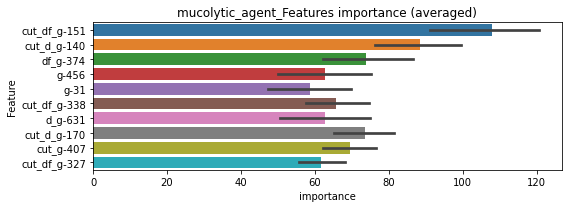

len(train_index) : 2833
len(valid_index) : 945
================================= fold 1/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2833
len(valid_index) : 945
================================= fold 2/4 mucolytic_agent=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000598861	valid_1's binary_logloss: 0.019626
Training until validation scores don't improve for 30 rounds


len(train_index) : 2834
len(valid_index) : 944
================================= fold 3/4 mucolytic_agent=================================


Early stopping, best iteration is:
[383]	training's binary_logloss: 0.000688393	valid_1's binary_logloss: 0.0275606
Training until validation scores don't improve for 30 rounds


len(train_index) : 2834


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000511064	valid_1's binary_logloss: 0.00607249


len(valid_index) : 944
================================= fold 4/4 mucolytic_agent=================================


Training until validation scores don't improve for 30 rounds


mucolytic_agent logloss: 0.016719478044483167


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000554983	valid_1's binary_logloss: 0.0136042


neuropeptide_receptor_antagonist, len(trt): 37, len(othr): 3284
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00256837	valid_1's binary_logloss: 0.0386425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.00038522	valid_1's binary_logloss: 0.0125648
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000636449	valid_1's binary_logloss: 0.00501202
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000406036	valid_1's binary_logloss: 0.0189728


y_Threshold: 0.0039890, Threshold: 0.0112867, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0112867, conf_0:0.00790, conf_1:0.01467
Num_p_label: 3.0, Expected: 6.2, Adj_threshold_1: 0.0412867
threshold: 0.0412867, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00174437	valid_1's binary_logloss: 0.0366681
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.000395387	valid_1's binary_logloss: 0.0125695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[572]	training's binary_logloss: 0.000396237	valid_1's binary_logloss: 0.00538966
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0199228, Threshold: 0.0412867, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[516]	training's binary_logloss: 0.000406032	valid_1's binary_logloss: 0.0184895


Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0412867, conf_0:0.03303, conf_1:0.04954
threshold: 0.0412867, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3802, y_label_rate: 0.1717517
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000432122	valid_1's binary_logloss: 0.023128
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000756013	valid_1's binary_logloss: 0.0156598
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000401234	valid_1's binary_logloss: 0.0197722
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000389351	valid_1's binary_logloss: 0.00293146


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0122922, Threshold: 0.0412867, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3800
p_label_rate: 0.0017579 Vs.target_rate: 0.00155
Num_p_label: 7.0, Expected: 6.2, Threshold: 0.0412867, conf_0:0.03716, conf_1:0.04542
threshold: 0.0412867, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 652.0/3800, y_label_rate: 0.1715789


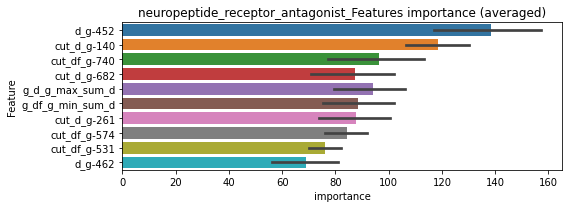

len(train_index) : 2850
len(valid_index) : 950
================================= fold 1/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2850
len(valid_index) : 950
================================= fold 2/4 neuropeptide_receptor_antagonist=================================


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.000847934	valid_1's binary_logloss: 0.0183665
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[670]	training's binary_logloss: 0.00040844	valid_1's binary_logloss: 0.00652968


len(train_index) : 2850
len(valid_index) : 950
================================= fold 3/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000417946	valid_1's binary_logloss: 0.00995993


len(train_index) : 2850
len(valid_index) : 950
================================= fold 4/4 neuropeptide_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


neuropeptide_receptor_antagonist logloss: 0.012441078063434544


Early stopping, best iteration is:
[312]	training's binary_logloss: 0.000792707	valid_1's binary_logloss: 0.0149082
mutually exclusive columns: nfkb_inhibitor


nfkb_inhibitor, len(trt): 832, len(othr): 10016
target_rate: 0.0349374 → Adj_target_rate: 0.0254860


selected negative label: 10016


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[631]	training's binary_logloss: 0.0292313	valid_1's binary_logloss: 0.245147
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[655]	training's binary_logloss: 0.0286198	valid_1's binary_logloss: 0.229094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[649]	training's binary_logloss: 0.0304069	valid_1's binary_logloss: 0.22373
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[606]	training's binary_logloss: 0.0338641	valid_1's binary_logloss: 0.233435


1 / 3, AUC score:0.896, PR-AUC:0.837
y_Threshold: 0.0795529, Threshold: 0.1427830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1289 → Positive_corect_labels: 1559/10730
p_label_rate: 0.0100452 Vs.target_rate: 0.03494
Num_p_label: 40.0, Expected: 139.1, Threshold: 0.1427830, conf_0:0.09995, conf_1:0.18562
threshold: 0.1427830, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1559.0/10730, y_label_rate: 0.1452936
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[922]	training's binary_logloss: 0.0026728	valid_1's binary_logloss: 0.0991737
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[719]	training's binary_logloss: 0.00623512	valid_1's binary_logloss: 0.125581
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[796]	training's binary_logloss: 0.00439237	valid_1's binary_logloss: 0.116492
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[770]	training's binary_logloss: 0.00491243	valid_1's binary_logloss: 0.114093


2 / 3, AUC score:0.987, PR-AUC:0.968
y_Threshold: 0.0506296, Threshold: 0.1427830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 254 → Positive_corect_labels: 1432.0/10476
p_label_rate: 0.0030136 Vs.target_rate: 0.03494
Num_p_label: 12.0, Expected: 139.1, Threshold: 0.1427830, conf_0:0.11423, conf_1:0.17134
threshold: 0.1427830, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 1432.0/10476, y_label_rate: 0.1366934
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00143654	valid_1's binary_logloss: 0.074864
Early stopping, best iteration is:
[1006]	training's binary_logloss: 0.00141137	valid_1's binary_logloss: 0.0748128
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[686]	training's binary_logloss: 0.00461271	valid_1's binary_logloss: 0.0912949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[690]	training's binary_logloss: 0.00437762	valid_1's binary_logloss: 0.100522
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[697]	training's binary_logloss: 0.00435562	valid_1's binary_logloss: 0.0984099


3 / 3, AUC score:0.991, PR-AUC:0.981
y_Threshold: 0.0489213, Threshold: 0.1427830, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 1361.0/10334
p_label_rate: 0.0040181 Vs.target_rate: 0.03494
Num_p_label: 16.0, Expected: 139.1, Threshold: 0.1427830, conf_0:0.12850, conf_1:0.15706
threshold: 0.1427830, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 1361.0/10334, y_label_rate: 0.1317012


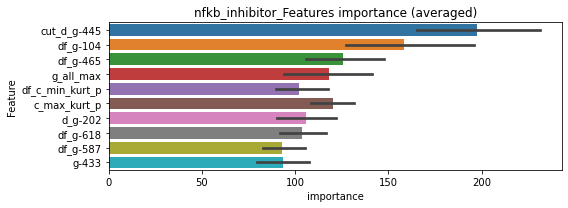

len(train_index) : 7750
len(valid_index) : 2584
================================= fold 1/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 7750
len(valid_index) : 2584


Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00374305	valid_1's binary_logloss: 0.0779804


================================= fold 2/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 7751
len(valid_index) : 2583


Early stopping, best iteration is:
[360]	training's binary_logloss: 0.00305096	valid_1's binary_logloss: 0.0861067


================================= fold 3/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00238253	valid_1's binary_logloss: 0.0846499


len(train_index) : 7751
len(valid_index) : 2583
================================= fold 4/4 nfkb_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00273501	valid_1's binary_logloss: 0.0795566


nfkb_inhibitor logloss: 0.0820733609602641
nfkb_inhibitor is unpredictable(><)!
nicotinic_receptor_agonist, len(trt): 12, len(othr): 3288
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.000259537	valid_1's binary_logloss: 0.00932227
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000248408	valid_1's binary_logloss: 0.00723659
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.00022085	valid_1's binary_logloss: 0.000218676
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0006206, Threshold: 0.0025052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0025052, conf_0:0.00175, conf_1:0.00326
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0325052


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.00021922	valid_1's binary_logloss: 0.00552576


threshold: 0.0325052, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000251152	valid_1's binary_logloss: 0.00673726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000224518	valid_1's binary_logloss: 0.00552862
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000216246	valid_1's binary_logloss: 0.000219381
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0137798, Threshold: 0.0325052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0020090 Vs.target_rate: 0.00050
Num_p_label: 8.0, Expected: 2.0, Threshold: 0.0325052, conf_0:0.02600, conf_1:0.03901
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_1: 0.0625052
threshold: 0.0625052, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[475]	training's binary_logloss: 0.000215157	valid_1's binary_logloss: 0.00431515


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000251152	valid_1's binary_logloss: 0.00673726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000224518	valid_1's binary_logloss: 0.00552862
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000216246	valid_1's binary_logloss: 0.000219381
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0137798, Threshold: 0.0625052, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00050
Num_p_label: 2.0, Expected: 2.0, Threshold: 0.0625052, conf_0:0.05625, conf_1:0.06876
threshold: 0.0625052, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000215157	valid_1's binary_logloss: 0.00431515


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


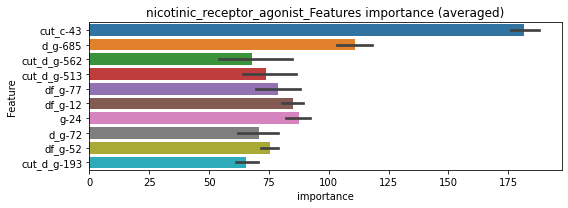

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 nicotinic_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000225469	valid_1's binary_logloss: 0.00544649
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000255278	valid_1's binary_logloss: 0.00292148
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 nicotinic_receptor_agonist=================================


Early stopping, best iteration is:
[805]	training's binary_logloss: 0.000221947	valid_1's binary_logloss: 0.000242506
Training until validation scores don't improve for 30 rounds


nicotinic_receptor_agonist logloss: 0.002967170276766285


Early stopping, best iteration is:
[705]	training's binary_logloss: 0.000227248	valid_1's binary_logloss: 0.003255


nitric_oxide_donor, len(trt): 26, len(othr): 3287
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3287


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000495541	valid_1's binary_logloss: 0.0118897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000345747	valid_1's binary_logloss: 0.0116507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000369749	valid_1's binary_logloss: 0.00448705
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0017125, Threshold: 0.0331448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0331448, conf_0:0.02320, conf_1:0.04309
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_1: 0.0631448
Num_p_label: 7.0, Expected: 4.3, Adj_threshold_2: 0.0931448


Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000322798	valid_1's binary_logloss: 0.00811902


threshold: 0.0931448, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000350031	valid_1's binary_logloss: 0.0114921
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.000405154	valid_1's binary_logloss: 0.00684673
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000357937	valid_1's binary_logloss: 0.00411956
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0277112, Threshold: 0.0931448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0168257 Vs.target_rate: 0.00109
Num_p_label: 67.0, Expected: 4.3, Threshold: 0.0931448, conf_0:0.07452, conf_1:0.11177
Num_p_label: 58.0, Expected: 4.3, Adj_threshold_1: 0.1231448


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000317607	valid_1's binary_logloss: 0.0056619


Num_p_label: 49.0, Expected: 4.3, Adj_threshold_2: 0.1531448
Num_p_label: 41.0, Expected: 4.3, Adj_threshold_3: 0.1831448
Num_p_label: 37.0, Expected: 4.3, Adj_threshold_4: 0.2131448
Num_p_label: 33.0, Expected: 4.3, Adj_threshold_5: 0.2431448
Num_p_label: 24.0, Expected: 4.3, Adj_threshold_6: 0.2731448
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_7: 0.3031448
Num_p_label: 19.0, Expected: 4.3, Adj_threshold_8: 0.3331448
Num_p_label: 18.0, Expected: 4.3, Adj_threshold_9: 0.3631448
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_10: 0.3931448
threshold: 0.3931448, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[476]	training's binary_logloss: 0.000316369	valid_1's binary_logloss: 0.0104512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000334215	valid_1's binary_logloss: 0.00525684
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000321508	valid_1's binary_logloss: 0.00213316
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0253118, Threshold: 0.3931448, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0040181 Vs.target_rate: 0.00109
Num_p_label: 16.0, Expected: 4.3, Threshold: 0.3931448, conf_0:0.35383, conf_1:0.43246
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_1: 0.4231448
Num_p_label: 13.0, Expected: 4.3, Adj_threshold_2: 0.4531448
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_3: 0.4831448


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000334518	valid_1's binary_logloss: 0.0102789


threshold: 0.4831448, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3810, y_label_rate: 0.1721785


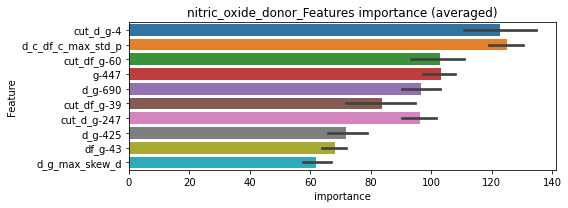

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000378443	valid_1's binary_logloss: 0.00935388
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_donor=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000324988	valid_1's binary_logloss: 0.00569247
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[736]	training's binary_logloss: 0.000319089	valid_1's binary_logloss: 0.00124194


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_donor=================================


Training until validation scores don't improve for 30 rounds


nitric_oxide_donor logloss: 0.006250479036450455


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00038064	valid_1's binary_logloss: 0.00870405


nitric_oxide_production_inhibitor, len(trt): 29, len(othr): 3285
target_rate: 0.0012178 → Adj_target_rate: 0.0014697


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00032735	valid_1's binary_logloss: 0.0133237
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000375658	valid_1's binary_logloss: 0.022576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[540]	training's binary_logloss: 0.00032708	valid_1's binary_logloss: 0.00289926
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011630, Threshold: 0.0025030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00122
Num_p_label: 40.0, Expected: 4.8, Threshold: 0.0025030, conf_0:0.00175, conf_1:0.00325
Num_p_label: 0.0, Expected: 4.8, Adj_threshold_1: 0.0325030


Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000357838	valid_1's binary_logloss: 0.0151771


threshold: 0.0325030, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000388753	valid_1's binary_logloss: 0.0118912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00036372	valid_1's binary_logloss: 0.0183289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000372298	valid_1's binary_logloss: 0.00286194
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077319, Threshold: 0.0325030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00122
Num_p_label: 0.0, Expected: 4.8, Threshold: 0.0325030, conf_0:0.02600, conf_1:0.03900


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000354338	valid_1's binary_logloss: 0.0150001


threshold: 0.0325030, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000388753	valid_1's binary_logloss: 0.0118912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.00036372	valid_1's binary_logloss: 0.0183289
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000372298	valid_1's binary_logloss: 0.00286194
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0077319, Threshold: 0.0325030, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0000000 Vs.target_rate: 0.00122
Num_p_label: 0.0, Expected: 4.8, Threshold: 0.0325030, conf_0:0.02925, conf_1:0.03575


Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000354338	valid_1's binary_logloss: 0.0150001


threshold: 0.0325030, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


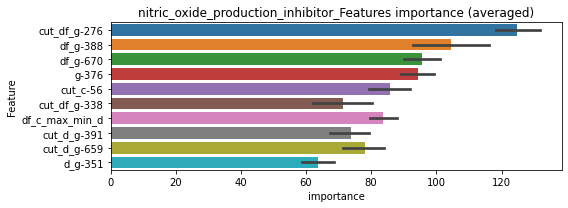

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 nitric_oxide_production_inhibitor=================================


Early stopping, best iteration is:
[558]	training's binary_logloss: 0.000380626	valid_1's binary_logloss: 0.0114486
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[710]	training's binary_logloss: 0.000325275	valid_1's binary_logloss: 0.0127581


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[673]	training's binary_logloss: 0.00034617	valid_1's binary_logloss: 0.00344257


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 nitric_oxide_production_inhibitor=================================


Training until validation scores don't improve for 30 rounds


nitric_oxide_production_inhibitor logloss: 0.010284892789469742


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000402265	valid_1's binary_logloss: 0.0134836


nitric_oxide_synthase_inhibitor, len(trt): 26, len(othr): 3283
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3283


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[475]	training's binary_logloss: 0.00034122	valid_1's binary_logloss: 0.0140749
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000341167	valid_1's binary_logloss: 0.0062534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[566]	training's binary_logloss: 0.000321659	valid_1's binary_logloss: 0.00180394
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014787, Threshold: 0.0163041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0163041, conf_0:0.01141, conf_1:0.02120
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_1: 0.0463041
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_2: 0.0763041
Num_p_label: 8.0, Expected: 4.3, Adj_threshold_3: 0.1063041
threshold: 0.1063041, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[294]	training's binary_logloss: 0.000865095	valid_1's binary_logloss: 0.0225821


positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[478]	training's binary_logloss: 0.000331494	valid_1's binary_logloss: 0.0126258
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[502]	training's binary_logloss: 0.000329981	valid_1's binary_logloss: 0.00625592
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[565]	training's binary_logloss: 0.000321371	valid_1's binary_logloss: 0.00185544
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0108086, Threshold: 0.1063041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0067805 Vs.target_rate: 0.00109
Num_p_label: 27.0, Expected: 4.3, Threshold: 0.1063041, conf_0:0.08504, conf_1:0.12756
Num_p_label: 21.0, Expected: 4.3, Adj_threshold_1: 0.1363041
Num_p_label: 16.0, Expected: 4.3, Adj_threshold_2: 0.1663041
Num_p_label: 15.0, Expected: 4.3, Adj_threshold_3: 0.1963041
Num_p_label: 12.0, Expected: 4.3, Adj_threshold_4: 0.2263041
Num_p_label: 10.0, Expected: 4.3, Adj_threshold_5: 0.2563041


Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000382424	valid_1's binary_logloss: 0.0229897


threshold: 0.2563041, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000346587	valid_1's binary_logloss: 0.0141223
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000346684	valid_1's binary_logloss: 0.0044345
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00030801	valid_1's binary_logloss: 0.00494946
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163463, Threshold: 0.2563041, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.2563041, conf_0:0.23067, conf_1:0.28193
threshold: 0.2563041, positive_p_label: 9.0/3982, p_label_rate: 0.0022602


Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000445884	valid_1's binary_logloss: 0.0139381


positive_y_label: 655.0/3805, y_label_rate: 0.1721419


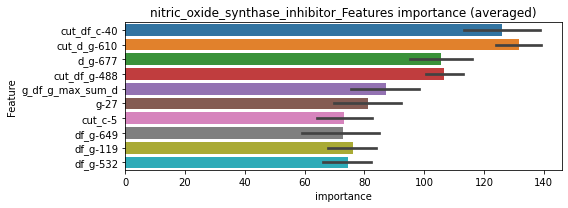

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 nitric_oxide_synthase_inhibitor=================================


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000414367	valid_1's binary_logloss: 0.011917
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 nitric_oxide_synthase_inhibitor=================================


Early stopping, best iteration is:
[625]	training's binary_logloss: 0.000343742	valid_1's binary_logloss: 0.00443433
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[671]	training's binary_logloss: 0.000332608	valid_1's binary_logloss: 0.00338121


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 nitric_oxide_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


nitric_oxide_synthase_inhibitor logloss: 0.007751176160555665


Early stopping, best iteration is:
[355]	training's binary_logloss: 0.000529417	valid_1's binary_logloss: 0.0112655


norepinephrine_reuptake_inhibitor, len(trt): 7, len(othr): 3287
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000154574	valid_1's binary_logloss: 0.000326773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000146794	valid_1's binary_logloss: 0.00265146
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000154315	valid_1's binary_logloss: 0.000282107
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003782, Threshold: 0.0020065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0020065, conf_0:0.00140, conf_1:0.00261
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0320065
threshold: 0.0320065, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000151721	valid_1's binary_logloss: 0.000689444


positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000146917	valid_1's binary_logloss: 0.000343752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000144519	valid_1's binary_logloss: 0.00224512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000147684	valid_1's binary_logloss: 0.00015539
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276434, Threshold: 0.0320065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0027624 Vs.target_rate: 0.00029
Num_p_label: 11.0, Expected: 1.2, Threshold: 0.0320065, conf_0:0.02561, conf_1:0.03841
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_1: 0.0620065
Num_p_label: 5.0, Expected: 1.2, Adj_threshold_2: 0.0920065
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.1220065
Num_p_label: 1.0, Expected: 1.2, Adj_threshold_4: 0.1520065


Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000181053	valid_1's binary_logloss: 0.00146273


threshold: 0.1520065, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000146917	valid_1's binary_logloss: 0.000343752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.000144519	valid_1's binary_logloss: 0.00224512
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000147684	valid_1's binary_logloss: 0.00015539
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0276434, Threshold: 0.1520065, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3812
p_label_rate: 0.0002511 Vs.target_rate: 0.00029
Num_p_label: 1.0, Expected: 1.2, Threshold: 0.1520065, conf_0:0.13681, conf_1:0.16721
threshold: 0.1520065, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[376]	training's binary_logloss: 0.000181053	valid_1's binary_logloss: 0.00146273


positive_y_label: 657.0/3812, y_label_rate: 0.1723505


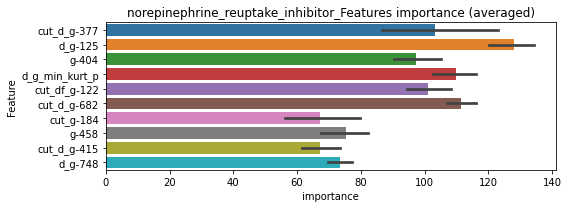

len(train_index) : 2859
len(valid_index) : 953
================================= fold 1/4 norepinephrine_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 2/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[839]	training's binary_logloss: 0.000149873	valid_1's binary_logloss: 0.000458543
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 3/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[741]	training's binary_logloss: 0.000153758	valid_1's binary_logloss: 0.00202241
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 953
================================= fold 4/4 norepinephrine_reuptake_inhibitor=================================


Early stopping, best iteration is:
[867]	training's binary_logloss: 0.000151273	valid_1's binary_logloss: 0.000158366
Training until validation scores don't improve for 30 rounds


norepinephrine_reuptake_inhibitor logloss: 0.0008904697671972672


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000174739	valid_1's binary_logloss: 0.000922561


nrf2_activator, len(trt): 18, len(othr): 3284
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3284


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000272055	valid_1's binary_logloss: 0.0103442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000308606	valid_1's binary_logloss: 0.00745001
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000255877	valid_1's binary_logloss: 0.000299264
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009806, Threshold: 0.0022601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00076


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000276172	valid_1's binary_logloss: 0.00987386


Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0022601, conf_0:0.00158, conf_1:0.00294
Num_p_label: 0.0, Expected: 3.0, Adj_threshold_1: 0.0322601
threshold: 0.0322601, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000266971	valid_1's binary_logloss: 0.00723259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000272315	valid_1's binary_logloss: 0.00503784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000253777	valid_1's binary_logloss: 0.000286332
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0086965, Threshold: 0.0322601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0322601, conf_0:0.02581, conf_1:0.03871


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000304245	valid_1's binary_logloss: 0.0102354


threshold: 0.0322601, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000266971	valid_1's binary_logloss: 0.00723259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000272315	valid_1's binary_logloss: 0.00503784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000253777	valid_1's binary_logloss: 0.000286332
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0086965, Threshold: 0.0322601, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0010045 Vs.target_rate: 0.00076
Num_p_label: 4.0, Expected: 3.0, Threshold: 0.0322601, conf_0:0.02903, conf_1:0.03549
threshold: 0.0322601, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000304245	valid_1's binary_logloss: 0.0102354


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


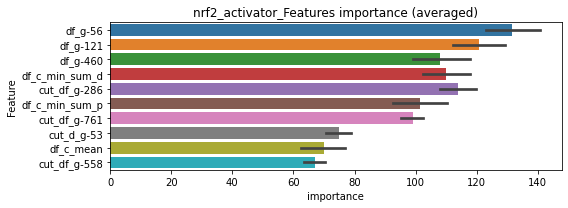

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 nrf2_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 nrf2_activator=================================


Early stopping, best iteration is:
[576]	training's binary_logloss: 0.000278565	valid_1's binary_logloss: 0.00897729
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 nrf2_activator=================================


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000339667	valid_1's binary_logloss: 0.00527039
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 nrf2_activator=================================


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000269589	valid_1's binary_logloss: 0.000281881
Training until validation scores don't improve for 30 rounds


nrf2_activator logloss: 0.005768388448792191


Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000414445	valid_1's binary_logloss: 0.008544


opioid_receptor_agonist, len(trt): 61, len(othr): 3279
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00186517	valid_1's binary_logloss: 0.0506777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000994245	valid_1's binary_logloss: 0.0388357
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.00119187	valid_1's binary_logloss: 0.0327465
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0051635, Threshold: 0.0161342, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000958159	valid_1's binary_logloss: 0.0444733


Remove_noisy_data: 136 → Positive_corect_labels: 653/3798
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0161342, conf_0:0.01129, conf_1:0.02097
Num_p_label: 7.0, Expected: 10.2, Adj_threshold_1: 0.0461342
threshold: 0.0461342, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000697654	valid_1's binary_logloss: 0.0354016
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00223538	valid_1's binary_logloss: 0.0503706
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00175202	valid_1's binary_logloss: 0.0334776
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0221533, Threshold: 0.0461342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 644.0/3780
p_label_rate: 0.0150678 Vs.target_rate: 0.00256
Num_p_label: 60.0, Expected: 10.2, Threshold: 0.0461342, conf_0:0.03691, conf_1:0.05536
Num_p_label: 41.0, Expected: 10.2, Adj_threshold_1: 0.0761342
Num_p_label: 31.0, Expected: 10.2, Adj_threshold_2: 0.1061342
Num_p_label: 20.0, Expected: 10.2, Adj_threshold_3: 0.1361342
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_4: 0.1661342


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00173209	valid_1's binary_logloss: 0.0315744


threshold: 0.1661342, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 644.0/3780, y_label_rate: 0.1703704
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00110987	valid_1's binary_logloss: 0.0352734
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00076121	valid_1's binary_logloss: 0.0193855
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00146702	valid_1's binary_logloss: 0.0270846
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0296812, Threshold: 0.1661342, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 635.0/3762
p_label_rate: 0.0055249 Vs.target_rate: 0.00256
Num_p_label: 22.0, Expected: 10.2, Threshold: 0.1661342, conf_0:0.14952, conf_1:0.18275
Num_p_label: 16.0, Expected: 10.2, Adj_threshold_1: 0.1961342
Num_p_label: 15.0, Expected: 10.2, Adj_threshold_2: 0.2261342
threshold: 0.2261342, positive_p_label: 15.0/3982, p_label_rate: 0.0037670


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00196156	valid_1's binary_logloss: 0.0426103


positive_y_label: 635.0/3762, y_label_rate: 0.1687932


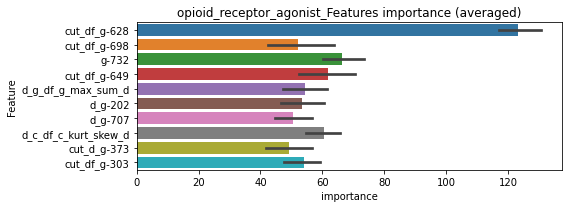

len(train_index) : 2821
len(valid_index) : 941
================================= fold 1/4 opioid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2821
len(valid_index) : 941
================================= fold 2/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[201]	training's binary_logloss: 0.00190956	valid_1's binary_logloss: 0.0262225
Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 940
================================= fold 3/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00117393	valid_1's binary_logloss: 0.0256907
Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 940
================================= fold 4/4 opioid_receptor_agonist=================================


Early stopping, best iteration is:
[342]	training's binary_logloss: 0.000968716	valid_1's binary_logloss: 0.0199181
Training until validation scores don't improve for 30 rounds


opioid_receptor_agonist logloss: 0.025557345528670936


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00240666	valid_1's binary_logloss: 0.0303972


opioid_receptor_antagonist, len(trt): 96, len(othr): 3278
target_rate: 0.0040312 → Adj_target_rate: 0.0040656


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[363]	training's binary_logloss: 0.00279515	valid_1's binary_logloss: 0.0823175
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.00376994	valid_1's binary_logloss: 0.0715919
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[375]	training's binary_logloss: 0.00269486	valid_1's binary_logloss: 0.0550534
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.995, PR-AUC:0.988
y_Threshold: 0.0137418, Threshold: 0.0364225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 160 → Positive_corect_labels: 641/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00403
Num_p_label: 40.0, Expected: 16.1, Threshold: 0.0364225, conf_0:0.02550, conf_1:0.04735
Num_p_label: 12.0, Expected: 16.1, Adj_threshold_1: 0.0664225
threshold: 0.0664225, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[273]	training's binary_logloss: 0.00654854	valid_1's binary_logloss: 0.0868082


positive_y_label: 641.0/3773, y_label_rate: 0.1698913
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00269104	valid_1's binary_logloss: 0.0679709
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[347]	training's binary_logloss: 0.00279023	valid_1's binary_logloss: 0.0595907
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00191908	valid_1's binary_logloss: 0.0564244
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.996
y_Threshold: 0.0296339, Threshold: 0.0664225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 38 → Positive_corect_labels: 622.0/3735
p_label_rate: 0.0208438 Vs.target_rate: 0.00403
Num_p_label: 83.0, Expected: 16.1, Threshold: 0.0664225, conf_0:0.05314, conf_1:0.07971
Num_p_label: 70.0, Expected: 16.1, Adj_threshold_1: 0.0964225
Num_p_label: 60.0, Expected: 16.1, Adj_threshold_2: 0.1264225
Num_p_label: 48.0, Expected: 16.1, Adj_threshold_3: 0.1564225
Num_p_label: 35.0, Expected: 16.1, Adj_threshold_4: 0.1864225
Num_p_label: 30.0, Expected: 16.1, Adj_threshold_5: 0.2164225


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.00304316	valid_1's binary_logloss: 0.0612007


Num_p_label: 24.0, Expected: 16.1, Adj_threshold_6: 0.2464225
threshold: 0.2464225, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 622.0/3735, y_label_rate: 0.1665328
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.00401446	valid_1's binary_logloss: 0.0585895
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00356131	valid_1's binary_logloss: 0.0600745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[581]	training's binary_logloss: 0.000750235	valid_1's binary_logloss: 0.0290828
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[564]	training's binary_logloss: 0.000789306	valid_1's binary_logloss: 0.0392559


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0352159, Threshold: 0.2464225, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 607.0/3705
p_label_rate: 0.0160723 Vs.target_rate: 0.00403
Num_p_label: 64.0, Expected: 16.1, Threshold: 0.2464225, conf_0:0.22178, conf_1:0.27106
Num_p_label: 52.0, Expected: 16.1, Adj_threshold_1: 0.2764225
Num_p_label: 45.0, Expected: 16.1, Adj_threshold_2: 0.3064225
Num_p_label: 43.0, Expected: 16.1, Adj_threshold_3: 0.3364225
Num_p_label: 37.0, Expected: 16.1, Adj_threshold_4: 0.3664225
Num_p_label: 32.0, Expected: 16.1, Adj_threshold_5: 0.3964225
Num_p_label: 28.0, Expected: 16.1, Adj_threshold_6: 0.4264225
Num_p_label: 25.0, Expected: 16.1, Adj_threshold_7: 0.4564225
Num_p_label: 20.0, Expected: 16.1, Adj_threshold_8: 0.4864225
threshold: 0.4864225, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 607.0/3705, y_label_rate: 0.1638327


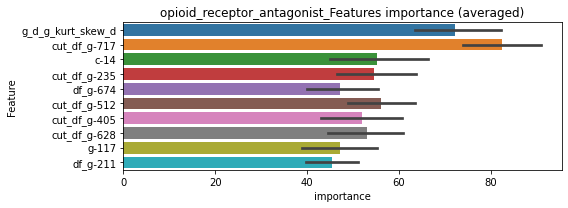

len(train_index) : 2778
len(valid_index) : 927
================================= fold 1/4 opioid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2779
len(valid_index) : 926
================================= fold 2/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[148]	training's binary_logloss: 0.00399266	valid_1's binary_logloss: 0.0449715
Training until validation scores don't improve for 30 rounds


len(train_index) : 2779
len(valid_index) : 926
================================= fold 3/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00103681	valid_1's binary_logloss: 0.0321443
Training until validation scores don't improve for 30 rounds


len(train_index) : 2779
len(valid_index) : 926
================================= fold 4/4 opioid_receptor_antagonist=================================


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00177463	valid_1's binary_logloss: 0.0266487
Training until validation scores don't improve for 30 rounds


opioid_receptor_antagonist logloss: 0.03766417223106356
opioid_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[168]	training's binary_logloss: 0.00339311	valid_1's binary_logloss: 0.0468843


orexin_receptor_antagonist, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000430592	valid_1's binary_logloss: 0.0151548
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000439185	valid_1's binary_logloss: 0.0335908
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000466479	valid_1's binary_logloss: 0.00709358
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00041149	valid_1's binary_logloss: 0.020025


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018359, Threshold: 0.0036698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0036698, conf_0:0.00257, conf_1:0.00477
Num_p_label: 0.0, Expected: 6.2, Adj_threshold_1: 0.0336698
threshold: 0.0336698, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000392623	valid_1's binary_logloss: 0.0132715
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000508005	valid_1's binary_logloss: 0.0311542
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00040372	valid_1's binary_logloss: 0.00699007
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000399941	valid_1's binary_logloss: 0.0181216


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069748, Threshold: 0.0336698, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00155
Num_p_label: 0.0, Expected: 6.2, Threshold: 0.0336698, conf_0:0.02694, conf_1:0.04040
threshold: 0.0336698, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000392623	valid_1's binary_logloss: 0.0132715
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000508005	valid_1's binary_logloss: 0.0311542
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.00040372	valid_1's binary_logloss: 0.00699007
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069748, Threshold: 0.0336698, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[553]	training's binary_logloss: 0.000399941	valid_1's binary_logloss: 0.0181216


Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0000000 Vs.target_rate: 0.00155
Num_p_label: 0.0, Expected: 6.2, Threshold: 0.0336698, conf_0:0.03030, conf_1:0.03704
threshold: 0.0336698, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957


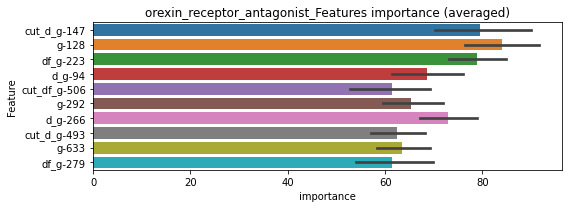

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[667]	training's binary_logloss: 0.000419104	valid_1's binary_logloss: 0.0143091


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 orexin_receptor_antagonist=================================


Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000506769	valid_1's binary_logloss: 0.0299702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[674]	training's binary_logloss: 0.000427438	valid_1's binary_logloss: 0.00432991


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 orexin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


orexin_receptor_antagonist logloss: 0.0165058187039387


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000709015	valid_1's binary_logloss: 0.017414


p38_mapk_inhibitor, len(trt): 62, len(othr): 3286
target_rate: 0.0026035 → Adj_target_rate: 0.0028037


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00128855	valid_1's binary_logloss: 0.0367537
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000602824	valid_1's binary_logloss: 0.0467222
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[590]	training's binary_logloss: 0.000573079	valid_1's binary_logloss: 0.0180749
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0042599, Threshold: 0.0148397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 654/3805


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00113563	valid_1's binary_logloss: 0.0403037


p_label_rate: 0.0100452 Vs.target_rate: 0.00260
Num_p_label: 40.0, Expected: 10.4, Threshold: 0.0148397, conf_0:0.01039, conf_1:0.01929
Num_p_label: 4.0, Expected: 10.4, Adj_threshold_1: 0.0448397
threshold: 0.0448397, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3805, y_label_rate: 0.1718791
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000842969	valid_1's binary_logloss: 0.047777
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000572562	valid_1's binary_logloss: 0.0298938
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.00064644	valid_1's binary_logloss: 0.0252191
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000587387	valid_1's binary_logloss: 0.0312126


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155420, Threshold: 0.0448397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 651.0/3799
p_label_rate: 0.0017579 Vs.target_rate: 0.00260
Num_p_label: 7.0, Expected: 10.4, Threshold: 0.0448397, conf_0:0.03587, conf_1:0.05381
threshold: 0.0448397, positive_p_label: 7.0/3982, p_label_rate: 0.0017579
positive_y_label: 651.0/3799, y_label_rate: 0.1713609
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000847104	valid_1's binary_logloss: 0.0310085
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00108287	valid_1's binary_logloss: 0.037355
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[585]	training's binary_logloss: 0.000539595	valid_1's binary_logloss: 0.0261272
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000677109	valid_1's binary_logloss: 0.0252076


y_Threshold: 0.0130976, Threshold: 0.0448397, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 649.0/3795
p_label_rate: 0.0027624 Vs.target_rate: 0.00260
Num_p_label: 11.0, Expected: 10.4, Threshold: 0.0448397, conf_0:0.04036, conf_1:0.04932
threshold: 0.0448397, positive_p_label: 11.0/3982, p_label_rate: 0.0027624
positive_y_label: 649.0/3795, y_label_rate: 0.1710145


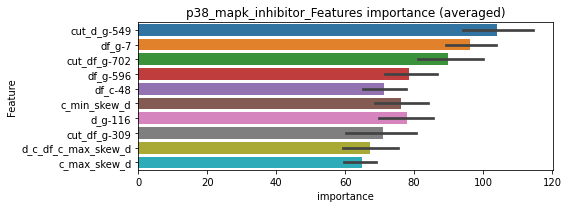

len(train_index) : 2846
len(valid_index) : 949
================================= fold 1/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 2/4 p38_mapk_inhibitor=================================


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000975088	valid_1's binary_logloss: 0.026395
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 949
================================= fold 3/4 p38_mapk_inhibitor=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000977714	valid_1's binary_logloss: 0.0358629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000652044	valid_1's binary_logloss: 0.0218432


len(train_index) : 2847
len(valid_index) : 948
================================= fold 4/4 p38_mapk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


p38_mapk_inhibitor logloss: 0.029202587746099434


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00132553	valid_1's binary_logloss: 0.0327131


p-glycoprotein_inhibitor, len(trt): 24, len(othr): 3286
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000431852	valid_1's binary_logloss: 0.0137203
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00043701	valid_1's binary_logloss: 0.030702
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000331264	valid_1's binary_logloss: 0.00111901
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012076, Threshold: 0.0046965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0046965, conf_0:0.00329, conf_1:0.00611
Num_p_label: 2.0, Expected: 4.0, Adj_threshold_1: 0.0346965


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000331507	valid_1's binary_logloss: 0.0100953


threshold: 0.0346965, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.00037876	valid_1's binary_logloss: 0.0140204
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.0010083	valid_1's binary_logloss: 0.0316669
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.0003062	valid_1's binary_logloss: 0.000948182
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0059346, Threshold: 0.0346965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0032647 Vs.target_rate: 0.00101
Num_p_label: 13.0, Expected: 4.0, Threshold: 0.0346965, conf_0:0.02776, conf_1:0.04164


Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000306168	valid_1's binary_logloss: 0.00847492


Num_p_label: 6.0, Expected: 4.0, Adj_threshold_1: 0.0646965
threshold: 0.0646965, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.000480872	valid_1's binary_logloss: 0.0236982
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000319267	valid_1's binary_logloss: 0.0112725
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000397654	valid_1's binary_logloss: 0.00389995
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0065155, Threshold: 0.0646965, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0646965, conf_0:0.05823, conf_1:0.07117
threshold: 0.0646965, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[460]	training's binary_logloss: 0.000323398	valid_1's binary_logloss: 0.0128581


positive_y_label: 655.0/3807, y_label_rate: 0.1720515


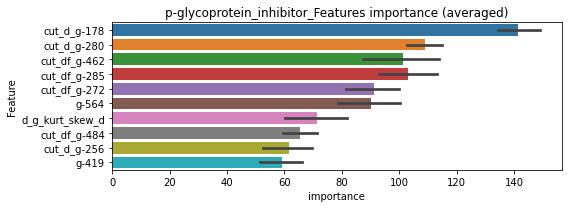

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 p-glycoprotein_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 p-glycoprotein_inhibitor=================================


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000400915	valid_1's binary_logloss: 0.0198476
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 p-glycoprotein_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000488229	valid_1's binary_logloss: 0.0064214
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 p-glycoprotein_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000412555	valid_1's binary_logloss: 0.00607413
Training until validation scores don't improve for 30 rounds


p-glycoprotein_inhibitor logloss: 0.008824025173376285


Early stopping, best iteration is:
[694]	training's binary_logloss: 0.000310497	valid_1's binary_logloss: 0.00294683


parp_inhibitor, len(trt): 61, len(othr): 3283
target_rate: 0.0025615 → Adj_target_rate: 0.0027652


selected negative label: 3283


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[244]	training's binary_logloss: 0.00371736	valid_1's binary_logloss: 0.0754234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000847985	valid_1's binary_logloss: 0.03735
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[602]	training's binary_logloss: 0.000550273	valid_1's binary_logloss: 0.0140114
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0070829, Threshold: 0.0137894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3803
p_label_rate: 0.0100452 Vs.target_rate: 0.00256
Num_p_label: 40.0, Expected: 10.2, Threshold: 0.0137894, conf_0:0.00965, conf_1:0.01793
Num_p_label: 5.0, Expected: 10.2, Adj_threshold_1: 0.0437894


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00170265	valid_1's binary_logloss: 0.0359597


threshold: 0.0437894, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3803, y_label_rate: 0.1719695
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000625288	valid_1's binary_logloss: 0.0367098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00109708	valid_1's binary_logloss: 0.0387578
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000828944	valid_1's binary_logloss: 0.032951
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000568102	valid_1's binary_logloss: 0.036603


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0227199, Threshold: 0.0437894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 16 → Positive_corect_labels: 646.0/3787
p_label_rate: 0.0070316 Vs.target_rate: 0.00256
Num_p_label: 28.0, Expected: 10.2, Threshold: 0.0437894, conf_0:0.03503, conf_1:0.05255
Num_p_label: 17.0, Expected: 10.2, Adj_threshold_1: 0.0737894
Num_p_label: 10.0, Expected: 10.2, Adj_threshold_2: 0.1037894
threshold: 0.1037894, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 646.0/3787, y_label_rate: 0.1705836
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000723816	valid_1's binary_logloss: 0.0300947
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000872782	valid_1's binary_logloss: 0.0392599
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000534235	valid_1's binary_logloss: 0.0240874
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000666102	valid_1's binary_logloss: 0.027147


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0266143, Threshold: 0.1037894, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 639.0/3773
p_label_rate: 0.0052737 Vs.target_rate: 0.00256
Num_p_label: 21.0, Expected: 10.2, Threshold: 0.1037894, conf_0:0.09341, conf_1:0.11417
Num_p_label: 13.0, Expected: 10.2, Adj_threshold_1: 0.1337894
threshold: 0.1337894, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 639.0/3773, y_label_rate: 0.1693613


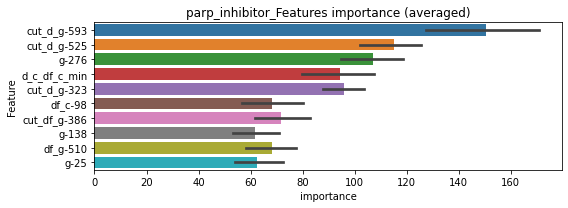

len(train_index) : 2829
len(valid_index) : 944
================================= fold 1/4 parp_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 943
================================= fold 2/4 parp_inhibitor=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00140768	valid_1's binary_logloss: 0.0264313
Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 943
================================= fold 3/4 parp_inhibitor=================================


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.0013595	valid_1's binary_logloss: 0.0311816
Training until validation scores don't improve for 30 rounds


len(train_index) : 2830
len(valid_index) : 943
================================= fold 4/4 parp_inhibitor=================================


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00113823	valid_1's binary_logloss: 0.0195826
Training until validation scores don't improve for 30 rounds


parp_inhibitor logloss: 0.02454216345033391


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000883366	valid_1's binary_logloss: 0.0209712
mutually exclusive columns: pdgfr_inhibitor


pdgfr_inhibitor, len(trt): 297, len(othr): 7157
target_rate: 0.0124717 → Adj_target_rate: 0.0106179


selected negative label: 7157


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[429]	training's binary_logloss: 0.00919547	valid_1's binary_logloss: 0.119769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.0110076	valid_1's binary_logloss: 0.120313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0098824	valid_1's binary_logloss: 0.127165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00615001	valid_1's binary_logloss: 0.106453


1 / 3, AUC score:0.979, PR-AUC:0.959
y_Threshold: 0.0250507, Threshold: 0.0374508, pos_neg_ratio: 0.8000000
Remove_noisy_data: 485 → Positive_corect_labels: 1332/8103
p_label_rate: 0.0100452 Vs.target_rate: 0.01247
Num_p_label: 40.0, Expected: 49.7, Threshold: 0.0374508, conf_0:0.02622, conf_1:0.04869
threshold: 0.0374508, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1332.0/8103, y_label_rate: 0.1643836
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00324151	valid_1's binary_logloss: 0.0728806
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.00423956	valid_1's binary_logloss: 0.0754029
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[517]	training's binary_logloss: 0.00286199	valid_1's binary_logloss: 0.0778892
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.00561349	valid_1's binary_logloss: 0.0792957


2 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0266138, Threshold: 0.0374508, pos_neg_ratio: 0.8000000
Remove_noisy_data: 116 → Positive_corect_labels: 1274.0/7987
p_label_rate: 0.0045203 Vs.target_rate: 0.01247
Num_p_label: 18.0, Expected: 49.7, Threshold: 0.0374508, conf_0:0.02996, conf_1:0.04494
threshold: 0.0374508, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 1274.0/7987, y_label_rate: 0.1595092
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.00339926	valid_1's binary_logloss: 0.06169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.00210291	valid_1's binary_logloss: 0.0535852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.00335085	valid_1's binary_logloss: 0.0532971
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00219663	valid_1's binary_logloss: 0.052155


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0236220, Threshold: 0.0374508, pos_neg_ratio: 0.8000000
Remove_noisy_data: 58 → Positive_corect_labels: 1245.0/7929
p_label_rate: 0.0035158 Vs.target_rate: 0.01247
Num_p_label: 14.0, Expected: 49.7, Threshold: 0.0374508, conf_0:0.03371, conf_1:0.04120
threshold: 0.0374508, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 1245.0/7929, y_label_rate: 0.1570185


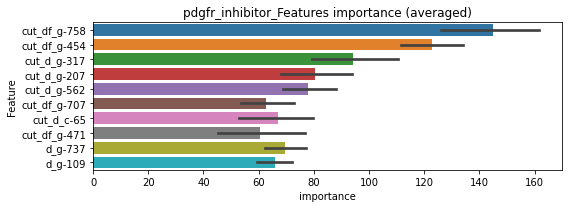

len(train_index) : 5946
len(valid_index) : 1983
================================= fold 1/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5947
len(valid_index) : 1982
================================= fold 2/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00255845	valid_1's binary_logloss: 0.0444188
Training until validation scores don't improve for 30 rounds


len(train_index) : 5947
len(valid_index) : 1982
================================= fold 3/4 pdgfr_inhibitor=================================


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00447807	valid_1's binary_logloss: 0.0595492
Training until validation scores don't improve for 30 rounds


len(train_index) : 5947
len(valid_index) : 1982


Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00171253	valid_1's binary_logloss: 0.0344576


================================= fold 4/4 pdgfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


pdgfr_inhibitor logloss: 0.049663674158536494
pdgfr_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00472635	valid_1's binary_logloss: 0.0602317


pdk_inhibitor, len(trt): 18, len(othr): 3288
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3288


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000267172	valid_1's binary_logloss: 0.00260743
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000272556	valid_1's binary_logloss: 0.00857672
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000358106	valid_1's binary_logloss: 0.00330922
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009638, Threshold: 0.0027558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0027558, conf_0:0.00193, conf_1:0.00358
Num_p_label: 3.0, Expected: 3.0, Adj_threshold_1: 0.0327558


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000283892	valid_1's binary_logloss: 0.00444188


threshold: 0.0327558, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000268302	valid_1's binary_logloss: 0.00239078
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00028087	valid_1's binary_logloss: 0.00856473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000338247	valid_1's binary_logloss: 0.00301597
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0107110, Threshold: 0.0327558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0327558, conf_0:0.02620, conf_1:0.03931


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000264496	valid_1's binary_logloss: 0.00412652


threshold: 0.0327558, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[474]	training's binary_logloss: 0.000268302	valid_1's binary_logloss: 0.00239078
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00028087	valid_1's binary_logloss: 0.00856473
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000338247	valid_1's binary_logloss: 0.00301597
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0107110, Threshold: 0.0327558, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0327558, conf_0:0.02948, conf_1:0.03603


Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000264496	valid_1's binary_logloss: 0.00412652


threshold: 0.0327558, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


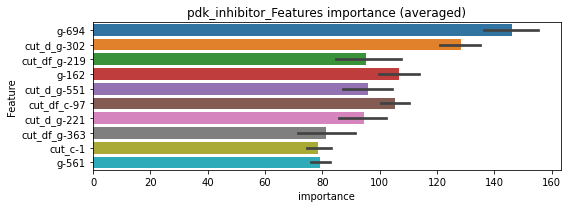

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 pdk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[730]	training's binary_logloss: 0.000275652	valid_1's binary_logloss: 0.00134818
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[698]	training's binary_logloss: 0.000271093	valid_1's binary_logloss: 0.00768429
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 pdk_inhibitor=================================


Early stopping, best iteration is:
[409]	training's binary_logloss: 0.000392692	valid_1's binary_logloss: 0.00311628
Training until validation scores don't improve for 30 rounds


pdk_inhibitor logloss: 0.003899590941184642


Early stopping, best iteration is:
[676]	training's binary_logloss: 0.000282506	valid_1's binary_logloss: 0.0034523
mutually exclusive columns: phosphodiesterase_inhibitor


phosphodiesterase_inhibitor, len(trt): 264, len(othr): 6907
target_rate: 0.0110859 → Adj_target_rate: 0.0096064


selected negative label: 6907


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.0116901	valid_1's binary_logloss: 0.114508
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[285]	training's binary_logloss: 0.0187954	valid_1's binary_logloss: 0.131192
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.0239658	valid_1's binary_logloss: 0.121152
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.976, PR-AUC:0.950
y_Threshold: 0.0332974, Threshold: 0.0462355, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[325]	training's binary_logloss: 0.0148757	valid_1's binary_logloss: 0.112058


Remove_noisy_data: 497 → Positive_corect_labels: 1271/7791
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.0462355, conf_0:0.03236, conf_1:0.06011
threshold: 0.0462355, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1271.0/7791, y_label_rate: 0.1631370
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[303]	training's binary_logloss: 0.00920279	valid_1's binary_logloss: 0.0761126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[290]	training's binary_logloss: 0.0102959	valid_1's binary_logloss: 0.0815503
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.0077466	valid_1's binary_logloss: 0.0659945
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00589336	valid_1's binary_logloss: 0.0712174


2 / 3, AUC score:0.995, PR-AUC:0.985
y_Threshold: 0.0367470, Threshold: 0.0462355, pos_neg_ratio: 0.8000000
Remove_noisy_data: 142 → Positive_corect_labels: 1200.0/7649
p_label_rate: 0.0100452 Vs.target_rate: 0.01109
Num_p_label: 40.0, Expected: 44.1, Threshold: 0.0462355, conf_0:0.03699, conf_1:0.05548
threshold: 0.0462355, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1200.0/7649, y_label_rate: 0.1568833
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00292161	valid_1's binary_logloss: 0.0498249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00426032	valid_1's binary_logloss: 0.05362
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00223632	valid_1's binary_logloss: 0.0327238
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.998, PR-AUC:0.996


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00324734	valid_1's binary_logloss: 0.0324029


y_Threshold: 0.0220349, Threshold: 0.0462355, pos_neg_ratio: 0.8000000
Remove_noisy_data: 48 → Positive_corect_labels: 1176.0/7601
p_label_rate: 0.0012557 Vs.target_rate: 0.01109
Num_p_label: 5.0, Expected: 44.1, Threshold: 0.0462355, conf_0:0.04161, conf_1:0.05086
threshold: 0.0462355, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1176.0/7601, y_label_rate: 0.1547165


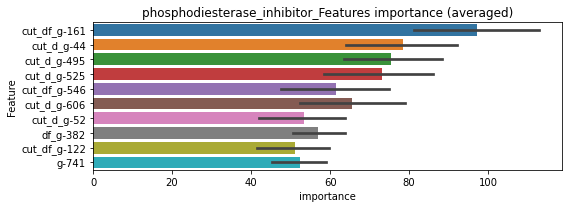

len(train_index) : 5700
len(valid_index) : 1901
================================= fold 1/4 phosphodiesterase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5701
len(valid_index) : 1900
================================= fold 2/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[134]	training's binary_logloss: 0.00463502	valid_1's binary_logloss: 0.0425353
Training until validation scores don't improve for 30 rounds


len(train_index) : 5701
len(valid_index) : 1900
================================= fold 3/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[175]	training's binary_logloss: 0.00290991	valid_1's binary_logloss: 0.0345318
Training until validation scores don't improve for 30 rounds


len(train_index) : 5701
len(valid_index) : 1900
================================= fold 4/4 phosphodiesterase_inhibitor=================================


Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00161324	valid_1's binary_logloss: 0.0213407
Training until validation scores don't improve for 30 rounds


phosphodiesterase_inhibitor logloss: 0.031985904898723015
phosphodiesterase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00161417	valid_1's binary_logloss: 0.0295302


phospholipase_inhibitor, len(trt): 25, len(othr): 3288
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3288


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000318152	valid_1's binary_logloss: 0.0125545
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000386671	valid_1's binary_logloss: 0.0230313
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00071243	valid_1's binary_logloss: 0.00836738
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013946, Threshold: 0.0043190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0043190, conf_0:0.00302, conf_1:0.00561
Num_p_label: 2.0, Expected: 4.2, Adj_threshold_1: 0.0343190


Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00038723	valid_1's binary_logloss: 0.00815636


threshold: 0.0343190, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000409304	valid_1's binary_logloss: 0.00947098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000459038	valid_1's binary_logloss: 0.0226603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000454046	valid_1's binary_logloss: 0.00744095
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0064666, Threshold: 0.0343190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00105
Num_p_label: 5.0, Expected: 4.2, Threshold: 0.0343190, conf_0:0.02746, conf_1:0.04118
threshold: 0.0343190, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000333361	valid_1's binary_logloss: 0.00756746


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000409304	valid_1's binary_logloss: 0.00947098
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[385]	training's binary_logloss: 0.000459038	valid_1's binary_logloss: 0.0226603
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000454046	valid_1's binary_logloss: 0.00744095
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0064666, Threshold: 0.0343190, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00105
Num_p_label: 5.0, Expected: 4.2, Threshold: 0.0343190, conf_0:0.03089, conf_1:0.03775


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000333361	valid_1's binary_logloss: 0.00756746


threshold: 0.0343190, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


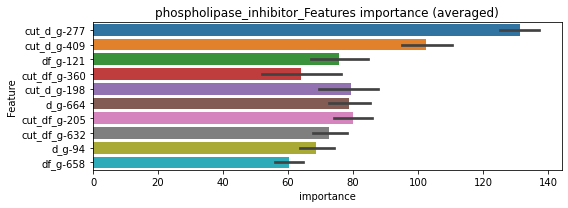

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000410506	valid_1's binary_logloss: 0.00871046


================================= fold 2/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 phospholipase_inhibitor=================================


Early stopping, best iteration is:
[196]	training's binary_logloss: 0.00108373	valid_1's binary_logloss: 0.0188502
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000441871	valid_1's binary_logloss: 0.00667552


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 phospholipase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[644]	training's binary_logloss: 0.000347872	valid_1's binary_logloss: 0.00622361


phospholipase_inhibitor logloss: 0.010114572676290621
pi3k_inhibitor, len(trt): 151, len(othr): 3714
target_rate: 0.0063408 → Adj_target_rate: 0.0059749


mutually exclusive columns: pi3k_inhibitor
selected negative label: 3714


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00562763	valid_1's binary_logloss: 0.114444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[269]	training's binary_logloss: 0.012591	valid_1's binary_logloss: 0.13113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00733393	valid_1's binary_logloss: 0.102218
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.984, PR-AUC:0.965
y_Threshold: 0.0248788, Threshold: 0.0397416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 242 → Positive_corect_labels: 696/4214
p_label_rate: 0.0100452 Vs.target_rate: 0.00634
Num_p_label: 40.0, Expected: 25.2, Threshold: 0.0397416, conf_0:0.02782, conf_1:0.05166
Num_p_label: 2.0, Expected: 25.2, Adj_threshold_1: 0.0697416


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00965291	valid_1's binary_logloss: 0.101418


threshold: 0.0697416, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 696.0/4214, y_label_rate: 0.1651637
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[321]	training's binary_logloss: 0.00483065	valid_1's binary_logloss: 0.0876421
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00670008	valid_1's binary_logloss: 0.0830475
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00415461	valid_1's binary_logloss: 0.0785122
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.995, PR-AUC:0.987
y_Threshold: 0.0285003, Threshold: 0.0697416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 668.0/4158
p_label_rate: 0.0020090 Vs.target_rate: 0.00634
Num_p_label: 8.0, Expected: 25.2, Threshold: 0.0697416, conf_0:0.05579, conf_1:0.08369
threshold: 0.0697416, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00497673	valid_1's binary_logloss: 0.0804426


positive_y_label: 668.0/4158, y_label_rate: 0.1606542
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.00630708	valid_1's binary_logloss: 0.0750773
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00251557	valid_1's binary_logloss: 0.0417235
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[547]	training's binary_logloss: 0.00103451	valid_1's binary_logloss: 0.032935
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0304757, Threshold: 0.0697416, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 656.0/4134
p_label_rate: 0.0012557 Vs.target_rate: 0.00634
Num_p_label: 5.0, Expected: 25.2, Threshold: 0.0697416, conf_0:0.06277, conf_1:0.07672


Early stopping, best iteration is:
[385]	training's binary_logloss: 0.00244948	valid_1's binary_logloss: 0.0579202


threshold: 0.0697416, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/4134, y_label_rate: 0.1586841


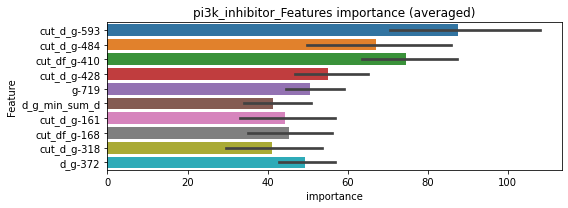

len(train_index) : 3100
len(valid_index) : 1034
================================= fold 1/4 pi3k_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 3100
len(valid_index) : 1034
================================= fold 2/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[154]	training's binary_logloss: 0.0046901	valid_1's binary_logloss: 0.0790175
Training until validation scores don't improve for 30 rounds


len(train_index) : 3101
len(valid_index) : 1033
================================= fold 3/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[203]	training's binary_logloss: 0.00299875	valid_1's binary_logloss: 0.0575766
Training until validation scores don't improve for 30 rounds


len(train_index) : 3101
len(valid_index) : 1033
================================= fold 4/4 pi3k_inhibitor=================================


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00252815	valid_1's binary_logloss: 0.0312085
Training until validation scores don't improve for 30 rounds


pi3k_inhibitor logloss: 0.053714137381076374
pi3k_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[203]	training's binary_logloss: 0.0030422	valid_1's binary_logloss: 0.0470257


pkc_inhibitor, len(trt): 31, len(othr): 3284
target_rate: 0.0013018 → Adj_target_rate: 0.0015554


selected negative label: 3284


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[238]	training's binary_logloss: 0.00204225	valid_1's binary_logloss: 0.0336463
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000437422	valid_1's binary_logloss: 0.0146548
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[387]	training's binary_logloss: 0.000616437	valid_1's binary_logloss: 0.00508472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.00038371	valid_1's binary_logloss: 0.0188937


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0031074, Threshold: 0.0058029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00130
Num_p_label: 40.0, Expected: 5.2, Threshold: 0.0058029, conf_0:0.00406, conf_1:0.00754
Num_p_label: 1.0, Expected: 5.2, Adj_threshold_1: 0.0358029
threshold: 0.0358029, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00110627	valid_1's binary_logloss: 0.0340149
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000443264	valid_1's binary_logloss: 0.0163299
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000500326	valid_1's binary_logloss: 0.00452076
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0099087, Threshold: 0.0358029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0005023 Vs.target_rate: 0.00130
Num_p_label: 2.0, Expected: 5.2, Threshold: 0.0358029, conf_0:0.02864, conf_1:0.04296


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00038064	valid_1's binary_logloss: 0.0180741


threshold: 0.0358029, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000446437	valid_1's binary_logloss: 0.0245107
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000549205	valid_1's binary_logloss: 0.00774855
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000357979	valid_1's binary_logloss: 0.00793303
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0128631, Threshold: 0.0358029, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3806


Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000374066	valid_1's binary_logloss: 0.020092


p_label_rate: 0.0002511 Vs.target_rate: 0.00130
Num_p_label: 1.0, Expected: 5.2, Threshold: 0.0358029, conf_0:0.03222, conf_1:0.03938
threshold: 0.0358029, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


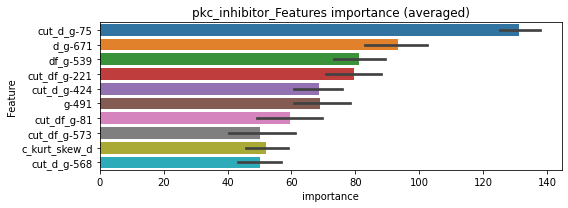

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 pkc_inhibitor=================================


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000488834	valid_1's binary_logloss: 0.0198525
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[643]	training's binary_logloss: 0.000389406	valid_1's binary_logloss: 0.00589395


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[707]	training's binary_logloss: 0.000370053	valid_1's binary_logloss: 0.00684414


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 pkc_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000381148	valid_1's binary_logloss: 0.0147578


pkc_inhibitor logloss: 0.011837660139510537
potassium_channel_activator, len(trt): 55, len(othr): 3279
target_rate: 0.0023096 → Adj_target_rate: 0.0025322


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00114639	valid_1's binary_logloss: 0.0442055
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000922793	valid_1's binary_logloss: 0.02534
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000645988	valid_1's binary_logloss: 0.0239679
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000796234	valid_1's binary_logloss: 0.0437773


y_Threshold: 0.0037075, Threshold: 0.0350505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00231
Num_p_label: 40.0, Expected: 9.2, Threshold: 0.0350505, conf_0:0.02454, conf_1:0.04557
Num_p_label: 19.0, Expected: 9.2, Adj_threshold_1: 0.0650505
threshold: 0.0650505, positive_p_label: 19.0/3982, p_label_rate: 0.0047715
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000610094	valid_1's binary_logloss: 0.0388688
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000909495	valid_1's binary_logloss: 0.0228507
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00052718	valid_1's binary_logloss: 0.0210139
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0230896, Threshold: 0.0650505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 646.0/3784
p_label_rate: 0.0288800 Vs.target_rate: 0.00231
Num_p_label: 115.0, Expected: 9.2, Threshold: 0.0650505, conf_0:0.05204, conf_1:0.07806
Num_p_label: 95.0, Expected: 9.2, Adj_threshold_1: 0.0950505
Num_p_label: 89.0, Expected: 9.2, Adj_threshold_2: 0.1250505
Num_p_label: 81.0, Expected: 9.2, Adj_threshold_3: 0.1550505
Num_p_label: 70.0, Expected: 9.2, Adj_threshold_4: 0.1850505
Num_p_label: 69.0, Expected: 9.2, Adj_threshold_5: 0.2150505


Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00101904	valid_1's binary_logloss: 0.03943


Num_p_label: 63.0, Expected: 9.2, Adj_threshold_6: 0.2450505
Num_p_label: 56.0, Expected: 9.2, Adj_threshold_7: 0.2750505
Num_p_label: 52.0, Expected: 9.2, Adj_threshold_8: 0.3050505
Num_p_label: 47.0, Expected: 9.2, Adj_threshold_9: 0.3350505
Num_p_label: 45.0, Expected: 9.2, Adj_threshold_10: 0.3650505
threshold: 0.3650505, positive_p_label: 45.0/3982, p_label_rate: 0.0113009
positive_y_label: 646.0/3784, y_label_rate: 0.1707188
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.000785652	valid_1's binary_logloss: 0.0329846
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000709989	valid_1's binary_logloss: 0.0318775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.000632864	valid_1's binary_logloss: 0.0214388
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000663951	valid_1's binary_logloss: 0.0176178


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0312087, Threshold: 0.3650505, pos_neg_ratio: 0.8000000
Remove_noisy_data: 14 → Positive_corect_labels: 639.0/3770
p_label_rate: 0.0153189 Vs.target_rate: 0.00231
Num_p_label: 61.0, Expected: 9.2, Threshold: 0.3650505, conf_0:0.32855, conf_1:0.40156
Num_p_label: 60.0, Expected: 9.2, Adj_threshold_1: 0.3950505
Num_p_label: 57.0, Expected: 9.2, Adj_threshold_2: 0.4250505
Num_p_label: 53.0, Expected: 9.2, Adj_threshold_3: 0.4550505
Num_p_label: 49.0, Expected: 9.2, Adj_threshold_4: 0.4850505
Num_p_label: 42.0, Expected: 9.2, Adj_threshold_5: 0.5150505
Num_p_label: 37.0, Expected: 9.2, Adj_threshold_6: 0.5450505
Num_p_label: 36.0, Expected: 9.2, Adj_threshold_7: 0.5750505
Num_p_label: 35.0, Expected: 9.2, Adj_threshold_8: 0.6050505
Num_p_label: 32.0, Expected: 9.2, Adj_threshold_9: 0.6350505
Num_p_label: 26.0, Expected: 9.2, Adj_threshold_10: 0.6650505
threshold: 0.6650505, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_l

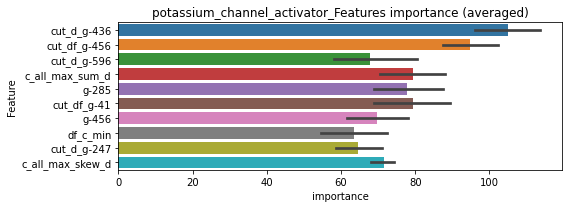

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000566984	valid_1's binary_logloss: 0.0103723


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 potassium_channel_activator=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[364]	training's binary_logloss: 0.000841158	valid_1's binary_logloss: 0.0226002
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 potassium_channel_activator=================================


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000866912	valid_1's binary_logloss: 0.0207004
Training until validation scores don't improve for 30 rounds


potassium_channel_activator logloss: 0.020944251655660648


Early stopping, best iteration is:
[281]	training's binary_logloss: 0.00111927	valid_1's binary_logloss: 0.0301135


potassium_channel_antagonist, len(trt): 98, len(othr): 3273
target_rate: 0.0041152 → Adj_target_rate: 0.0041375


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00205557	valid_1's binary_logloss: 0.0872
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.00545629	valid_1's binary_logloss: 0.0881738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.00189255	valid_1's binary_logloss: 0.0527574
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.994, PR-AUC:0.988
y_Threshold: 0.0129714, Threshold: 0.0208773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 154 → Positive_corect_labels: 643/3773
p_label_rate: 0.0100452 Vs.target_rate: 0.00412
Num_p_label: 40.0, Expected: 16.4, Threshold: 0.0208773, conf_0:0.01461, conf_1:0.02714
Num_p_label: 4.0, Expected: 16.4, Adj_threshold_1: 0.0508773
threshold: 0.0508773, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00655113	valid_1's binary_logloss: 0.0916053


positive_y_label: 643.0/3773, y_label_rate: 0.1704214
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00533288	valid_1's binary_logloss: 0.0921305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00356352	valid_1's binary_logloss: 0.0854629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00237202	valid_1's binary_logloss: 0.0536818
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0269502, Threshold: 0.0508773, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[388]	training's binary_logloss: 0.00212293	valid_1's binary_logloss: 0.0543309


Remove_noisy_data: 48 → Positive_corect_labels: 619.0/3725
p_label_rate: 0.0022602 Vs.target_rate: 0.00412
Num_p_label: 9.0, Expected: 16.4, Threshold: 0.0508773, conf_0:0.04070, conf_1:0.06105
threshold: 0.0508773, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 619.0/3725, y_label_rate: 0.1661745
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.00188785	valid_1's binary_logloss: 0.0506927
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00313227	valid_1's binary_logloss: 0.0470537
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00189964	valid_1's binary_logloss: 0.044424
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0238522, Threshold: 0.0508773, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 608.0/3703
p_label_rate: 0.0027624 Vs.target_rate: 0.00412
Num_p_label: 11.0, Expected: 16.4, Threshold: 0.0508773, conf_0:0.04579, conf_1:0.05597
threshold: 0.0508773, positive_p_label: 11.0/3982, p_label_rate: 0.0027624


Early stopping, best iteration is:
[284]	training's binary_logloss: 0.00403764	valid_1's binary_logloss: 0.0540755


positive_y_label: 608.0/3703, y_label_rate: 0.1641912


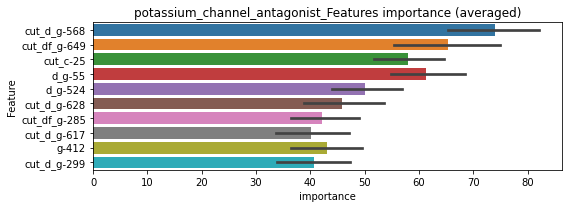

len(train_index) : 2777
len(valid_index) : 926
================================= fold 1/4 potassium_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2777
len(valid_index) : 926
================================= fold 2/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[165]	training's binary_logloss: 0.00351556	valid_1's binary_logloss: 0.058952
Training until validation scores don't improve for 30 rounds


len(train_index) : 2777
len(valid_index) : 926
================================= fold 3/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00415461	valid_1's binary_logloss: 0.0586485
Training until validation scores don't improve for 30 rounds


len(train_index) : 2778
len(valid_index) : 925
================================= fold 4/4 potassium_channel_antagonist=================================


Early stopping, best iteration is:
[233]	training's binary_logloss: 0.00219331	valid_1's binary_logloss: 0.0264099
Training until validation scores don't improve for 30 rounds


potassium_channel_antagonist logloss: 0.04501626125759568
potassium_channel_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[204]	training's binary_logloss: 0.0025914	valid_1's binary_logloss: 0.036045


ppar_receptor_agonist, len(trt): 115, len(othr): 3276
target_rate: 0.0048291 → Adj_target_rate: 0.0047401


selected negative label: 3276


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00837903	valid_1's binary_logloss: 0.114581
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[260]	training's binary_logloss: 0.00962466	valid_1's binary_logloss: 0.100038
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.0029804	valid_1's binary_logloss: 0.0613672
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.990, PR-AUC:0.979
y_Threshold: 0.0229873, Threshold: 0.0435818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 178 → Positive_corect_labels: 632/3753
p_label_rate: 0.0100452 Vs.target_rate: 0.00483
Num_p_label: 40.0, Expected: 19.2, Threshold: 0.0435818, conf_0:0.03051, conf_1:0.05666
Num_p_label: 10.0, Expected: 19.2, Adj_threshold_1: 0.0735818
threshold: 0.0735818, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[268]	training's binary_logloss: 0.00857171	valid_1's binary_logloss: 0.097432


positive_y_label: 632.0/3753, y_label_rate: 0.1683986
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00268665	valid_1's binary_logloss: 0.0725493
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00425142	valid_1's binary_logloss: 0.0950689
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.00202427	valid_1's binary_logloss: 0.0348911
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0283495, Threshold: 0.0735818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 40 → Positive_corect_labels: 612.0/3713
p_label_rate: 0.0040181 Vs.target_rate: 0.00483
Num_p_label: 16.0, Expected: 19.2, Threshold: 0.0735818, conf_0:0.05887, conf_1:0.08830
threshold: 0.0735818, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00307595	valid_1's binary_logloss: 0.067164


positive_y_label: 612.0/3713, y_label_rate: 0.1648263
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00187589	valid_1's binary_logloss: 0.0492428
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[270]	training's binary_logloss: 0.00557535	valid_1's binary_logloss: 0.0800792
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[669]	training's binary_logloss: 0.000697075	valid_1's binary_logloss: 0.0292394
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0311465, Threshold: 0.0735818, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 601.0/3691
p_label_rate: 0.0050226 Vs.target_rate: 0.00483
Num_p_label: 20.0, Expected: 19.2, Threshold: 0.0735818, conf_0:0.06622, conf_1:0.08094
threshold: 0.0735818, positive_p_label: 20.0/3982, p_label_rate: 0.0050226


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.00304799	valid_1's binary_logloss: 0.0567267


positive_y_label: 601.0/3691, y_label_rate: 0.1628285


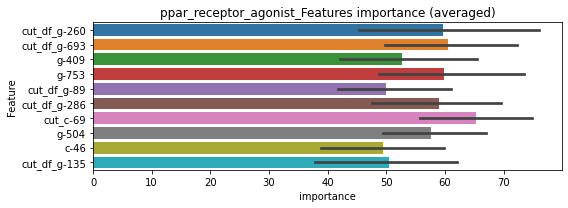

len(train_index) : 2768
len(valid_index) : 923
================================= fold 1/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2768
len(valid_index) : 923
================================= fold 2/4 ppar_receptor_agonist=================================


Early stopping, best iteration is:
[230]	training's binary_logloss: 0.00232557	valid_1's binary_logloss: 0.0654015
Training until validation scores don't improve for 30 rounds


len(train_index) : 2768
len(valid_index) : 923
================================= fold 3/4 ppar_receptor_agonist=================================


Early stopping, best iteration is:
[232]	training's binary_logloss: 0.00242406	valid_1's binary_logloss: 0.0481378
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[641]	training's binary_logloss: 0.000763732	valid_1's binary_logloss: 0.0215868


len(train_index) : 2769
len(valid_index) : 922
================================= fold 4/4 ppar_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


ppar_receptor_agonist logloss: 0.04438750216742096
ppar_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.00144193	valid_1's binary_logloss: 0.0424218


ppar_receptor_antagonist, len(trt): 30, len(othr): 3285
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000428645	valid_1's binary_logloss: 0.00961736
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000463556	valid_1's binary_logloss: 0.0256412
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.000352903	valid_1's binary_logloss: 0.0079621
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013276, Threshold: 0.0024752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0024752, conf_0:0.00173, conf_1:0.00322


Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000348412	valid_1's binary_logloss: 0.0106789


Num_p_label: 0.0, Expected: 5.0, Adj_threshold_1: 0.0324752
threshold: 0.0324752, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000426366	valid_1's binary_logloss: 0.00937174
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[252]	training's binary_logloss: 0.00173986	valid_1's binary_logloss: 0.0272316
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000342966	valid_1's binary_logloss: 0.008215
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0235179, Threshold: 0.0324752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00126
Num_p_label: 0.0, Expected: 5.0, Threshold: 0.0324752, conf_0:0.02598, conf_1:0.03897
threshold: 0.0324752, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000357375	valid_1's binary_logloss: 0.00971989


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[389]	training's binary_logloss: 0.000541278	valid_1's binary_logloss: 0.0217229
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[542]	training's binary_logloss: 0.000337766	valid_1's binary_logloss: 0.00441542
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000337217	valid_1's binary_logloss: 0.0061221
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0137113, Threshold: 0.0324752, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0000000 Vs.target_rate: 0.00126
Num_p_label: 0.0, Expected: 5.0, Threshold: 0.0324752, conf_0:0.02923, conf_1:0.03572
threshold: 0.0324752, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000401752	valid_1's binary_logloss: 0.0201692


positive_y_label: 655.0/3806, y_label_rate: 0.1720967


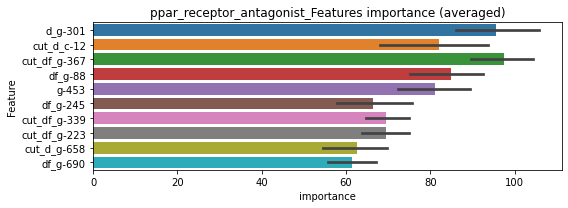

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[668]	training's binary_logloss: 0.000342774	valid_1's binary_logloss: 0.0123543


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[727]	training's binary_logloss: 0.000341476	valid_1's binary_logloss: 0.00485055


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[715]	training's binary_logloss: 0.000338339	valid_1's binary_logloss: 0.00618839


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 ppar_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


ppar_receptor_antagonist logloss: 0.010036526468879405


Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000862167	valid_1's binary_logloss: 0.0167524


progesterone_receptor_agonist, len(trt): 119, len(othr): 3268
target_rate: 0.0049971 → Adj_target_rate: 0.0048799


selected negative label: 3268


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[262]	training's binary_logloss: 0.00994564	valid_1's binary_logloss: 0.124634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00288193	valid_1's binary_logloss: 0.0986369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.00338016	valid_1's binary_logloss: 0.0784876
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.989, PR-AUC:0.976
y_Threshold: 0.0193608, Threshold: 0.1466365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 188 → Positive_corect_labels: 625/3733
p_label_rate: 0.0100452 Vs.target_rate: 0.00500
Num_p_label: 40.0, Expected: 19.9, Threshold: 0.1466365, conf_0:0.10265, conf_1:0.19063
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_1: 0.1766365


Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00766655	valid_1's binary_logloss: 0.0869857


Num_p_label: 24.0, Expected: 19.9, Adj_threshold_2: 0.2066365
threshold: 0.2066365, positive_p_label: 24.0/3982, p_label_rate: 0.0060271
positive_y_label: 625.0/3733, y_label_rate: 0.1674257
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00312827	valid_1's binary_logloss: 0.0746676
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.0053531	valid_1's binary_logloss: 0.075444
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[405]	training's binary_logloss: 0.00228072	valid_1's binary_logloss: 0.0572408
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.992
y_Threshold: 0.0325579, Threshold: 0.2066365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 56 → Positive_corect_labels: 597.0/3677
p_label_rate: 0.0175791 Vs.target_rate: 0.00500
Num_p_label: 70.0, Expected: 19.9, Threshold: 0.2066365, conf_0:0.16531, conf_1:0.24796
Num_p_label: 60.0, Expected: 19.9, Adj_threshold_1: 0.2366365
Num_p_label: 54.0, Expected: 19.9, Adj_threshold_2: 0.2666365
Num_p_label: 49.0, Expected: 19.9, Adj_threshold_3: 0.2966365
Num_p_label: 40.0, Expected: 19.9, Adj_threshold_4: 0.3266365
Num_p_label: 36.0, Expected: 19.9, Adj_threshold_5: 0.3566365
Num_p_label: 31.0, Expected: 19.9, Adj_threshold_6: 0.3866365
Num_p_label: 27.0, Expected: 19.9, Adj_threshold_7: 0.4166365


Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00477925	valid_1's binary_logloss: 0.0837252


threshold: 0.4166365, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 597.0/3677, y_label_rate: 0.1623606
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00287526	valid_1's binary_logloss: 0.0570779
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00222496	valid_1's binary_logloss: 0.058419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00201442	valid_1's binary_logloss: 0.0268299
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0298840, Threshold: 0.4166365, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 586.0/3655
p_label_rate: 0.0102963 Vs.target_rate: 0.00500
Num_p_label: 41.0, Expected: 19.9, Threshold: 0.4166365, conf_0:0.37497, conf_1:0.45830
Num_p_label: 37.0, Expected: 19.9, Adj_threshold_1: 0.4466365
Num_p_label: 35.0, Expected: 19.9, Adj_threshold_2: 0.4766365
Num_p_label: 27.0, Expected: 19.9, Adj_threshold_3: 0.5066365
threshold: 0.5066365, positive_p_label: 27.0/3982, p_label_rate: 0.0067805


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00271953	valid_1's binary_logloss: 0.0509064


positive_y_label: 586.0/3655, y_label_rate: 0.1603283


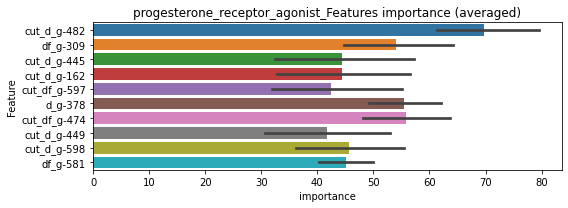

len(train_index) : 2741
len(valid_index) : 914
================================= fold 1/4 progesterone_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2741
len(valid_index) : 914
================================= fold 2/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[193]	training's binary_logloss: 0.00306511	valid_1's binary_logloss: 0.0401037
Training until validation scores don't improve for 30 rounds


len(train_index) : 2741
len(valid_index) : 914
================================= fold 3/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[153]	training's binary_logloss: 0.00406875	valid_1's binary_logloss: 0.062844
Training until validation scores don't improve for 30 rounds


len(train_index) : 2742
len(valid_index) : 913
================================= fold 4/4 progesterone_receptor_agonist=================================


Early stopping, best iteration is:
[341]	training's binary_logloss: 0.00144983	valid_1's binary_logloss: 0.0309373
Training until validation scores don't improve for 30 rounds


progesterone_receptor_agonist logloss: 0.04423391164469981
progesterone_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[262]	training's binary_logloss: 0.0019948	valid_1's binary_logloss: 0.0430493


progesterone_receptor_antagonist, len(trt): 18, len(othr): 3286
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000293706	valid_1's binary_logloss: 0.00379365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000287934	valid_1's binary_logloss: 0.0107616
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000350985	valid_1's binary_logloss: 0.00271125
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012879, Threshold: 0.0036385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0036385, conf_0:0.00255, conf_1:0.00473
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0336385
threshold: 0.0336385, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000298409	valid_1's binary_logloss: 0.00972789


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000259087	valid_1's binary_logloss: 0.00312745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000305267	valid_1's binary_logloss: 0.0090683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000379527	valid_1's binary_logloss: 0.00267781
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097176, Threshold: 0.0336385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0030136 Vs.target_rate: 0.00076
Num_p_label: 12.0, Expected: 3.0, Threshold: 0.0336385, conf_0:0.02691, conf_1:0.04037


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000284071	valid_1's binary_logloss: 0.00832245


Num_p_label: 5.0, Expected: 3.0, Adj_threshold_1: 0.0636385
threshold: 0.0636385, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000259087	valid_1's binary_logloss: 0.00312745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000305267	valid_1's binary_logloss: 0.0090683
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000379527	valid_1's binary_logloss: 0.00267781
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0097176, Threshold: 0.0636385, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3811
p_label_rate: 0.0012557 Vs.target_rate: 0.00076
Num_p_label: 5.0, Expected: 3.0, Threshold: 0.0636385, conf_0:0.05727, conf_1:0.07000
threshold: 0.0636385, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000284071	valid_1's binary_logloss: 0.00832245


positive_y_label: 657.0/3811, y_label_rate: 0.1723957


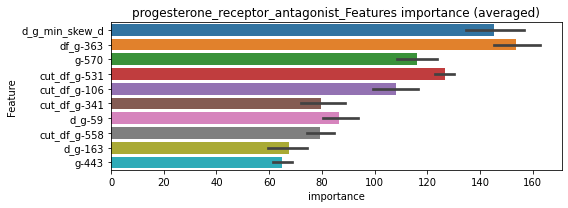

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 progesterone_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[645]	training's binary_logloss: 0.000277348	valid_1's binary_logloss: 0.00225094
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[228]	training's binary_logloss: 0.000672139	valid_1's binary_logloss: 0.00843534
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 progesterone_receptor_antagonist=================================


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000352469	valid_1's binary_logloss: 0.00269615
Training until validation scores don't improve for 30 rounds


progesterone_receptor_antagonist logloss: 0.004795296028228813


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000299195	valid_1's binary_logloss: 0.00579981


prostaglandin_inhibitor, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.000541456	valid_1's binary_logloss: 0.0189483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[279]	training's binary_logloss: 0.00140787	valid_1's binary_logloss: 0.035562
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00146598	valid_1's binary_logloss: 0.0146063
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[538]	training's binary_logloss: 0.000394317	valid_1's binary_logloss: 0.0195839


1 / 3, AUC score:0.999, PR-AUC:0.999
y_Threshold: 0.0030952, Threshold: 0.0081120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0081120, conf_0:0.00568, conf_1:0.01055
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.0381120
Num_p_label: 12.0, Expected: 6.0, Adj_threshold_2: 0.0681120
threshold: 0.0681120, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00173273	valid_1's binary_logloss: 0.0348856
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000585744	valid_1's binary_logloss: 0.0142576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.000478392	valid_1's binary_logloss: 0.00424637
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0114257, Threshold: 0.0681120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0681120, conf_0:0.05449, conf_1:0.08173
threshold: 0.0681120, positive_p_label: 11.0/3982, p_label_rate: 0.0027624


Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000503058	valid_1's binary_logloss: 0.0214503


positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000588944	valid_1's binary_logloss: 0.0277771
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000457967	valid_1's binary_logloss: 0.0109369
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[524]	training's binary_logloss: 0.000394822	valid_1's binary_logloss: 0.00633986
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0094918, Threshold: 0.0681120, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0025113 Vs.target_rate: 0.00151
Num_p_label: 10.0, Expected: 6.0, Threshold: 0.0681120, conf_0:0.06130, conf_1:0.07492


Early stopping, best iteration is:
[393]	training's binary_logloss: 0.000609739	valid_1's binary_logloss: 0.0177296


threshold: 0.0681120, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 653.0/3802, y_label_rate: 0.1717517


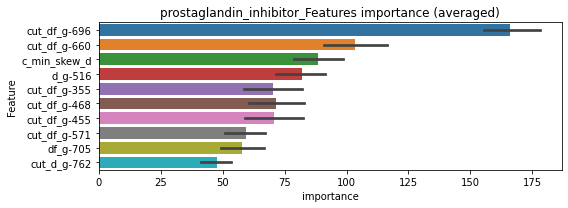

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 prostaglandin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[350]	training's binary_logloss: 0.000655311	valid_1's binary_logloss: 0.0211602
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[252]	training's binary_logloss: 0.000962304	valid_1's binary_logloss: 0.017955
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 prostaglandin_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000522086	valid_1's binary_logloss: 0.0151047
Training until validation scores don't improve for 30 rounds


prostaglandin_inhibitor logloss: 0.015631500877116247


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000668449	valid_1's binary_logloss: 0.00829786


prostanoid_receptor_antagonist, len(trt): 84, len(othr): 3278
target_rate: 0.0035273 → Adj_target_rate: 0.0036294


selected negative label: 3278


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[257]	training's binary_logloss: 0.0064618	valid_1's binary_logloss: 0.0793374
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[346]	training's binary_logloss: 0.00281947	valid_1's binary_logloss: 0.0691631
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.00286523	valid_1's binary_logloss: 0.045505
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.997, PR-AUC:0.992
y_Threshold: 0.0133033, Threshold: 0.0538186, pos_neg_ratio: 0.8000000
Remove_noisy_data: 152 → Positive_corect_labels: 645/3781
p_label_rate: 0.0100452 Vs.target_rate: 0.00353
Num_p_label: 40.0, Expected: 14.0, Threshold: 0.0538186, conf_0:0.03767, conf_1:0.06996
Num_p_label: 19.0, Expected: 14.0, Adj_threshold_1: 0.0838186
threshold: 0.0838186, positive_p_label: 19.0/3982, p_label_rate: 0.0047715


Early stopping, best iteration is:
[328]	training's binary_logloss: 0.00333036	valid_1's binary_logloss: 0.0562674


positive_y_label: 645.0/3781, y_label_rate: 0.1705898
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.00174366	valid_1's binary_logloss: 0.058122
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.00126225	valid_1's binary_logloss: 0.0575155
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[368]	training's binary_logloss: 0.00205276	valid_1's binary_logloss: 0.0427194
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0257605, Threshold: 0.0838186, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00115102	valid_1's binary_logloss: 0.0538361


Remove_noisy_data: 28 → Positive_corect_labels: 631.0/3753
p_label_rate: 0.0153189 Vs.target_rate: 0.00353
Num_p_label: 61.0, Expected: 14.0, Threshold: 0.0838186, conf_0:0.06705, conf_1:0.10058
Num_p_label: 57.0, Expected: 14.0, Adj_threshold_1: 0.1138186
Num_p_label: 55.0, Expected: 14.0, Adj_threshold_2: 0.1438186
Num_p_label: 53.0, Expected: 14.0, Adj_threshold_3: 0.1738186
Num_p_label: 50.0, Expected: 14.0, Adj_threshold_4: 0.2038186
Num_p_label: 47.0, Expected: 14.0, Adj_threshold_5: 0.2338186
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_6: 0.2638186
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_7: 0.2938186
Num_p_label: 33.0, Expected: 14.0, Adj_threshold_8: 0.3238186
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_9: 0.3538186
Num_p_label: 32.0, Expected: 14.0, Adj_threshold_10: 0.3838186
threshold: 0.3838186, positive_p_label: 32.0/3982, p_label_rate: 0.0080362
positive_y_label: 631.0/3753, y_label_rate: 0.1681322
================= Pseudo labeling 3 / 3 ===============

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.00304698	valid_1's binary_logloss: 0.0539499
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00341817	valid_1's binary_logloss: 0.0635836
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.00105762	valid_1's binary_logloss: 0.028823
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0228881, Threshold: 0.3838186, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 622.0/3735
p_label_rate: 0.0118031 Vs.target_rate: 0.00353
Num_p_label: 47.0, Expected: 14.0, Threshold: 0.3838186, conf_0:0.34544, conf_1:0.42220


Early stopping, best iteration is:
[348]	training's binary_logloss: 0.00205405	valid_1's binary_logloss: 0.0290284


Num_p_label: 43.0, Expected: 14.0, Adj_threshold_1: 0.4138186
Num_p_label: 40.0, Expected: 14.0, Adj_threshold_2: 0.4438186
Num_p_label: 39.0, Expected: 14.0, Adj_threshold_3: 0.4738186
Num_p_label: 37.0, Expected: 14.0, Adj_threshold_4: 0.5038186
Num_p_label: 36.0, Expected: 14.0, Adj_threshold_5: 0.5338186
Num_p_label: 31.0, Expected: 14.0, Adj_threshold_6: 0.5638186
Num_p_label: 30.0, Expected: 14.0, Adj_threshold_7: 0.5938186
Num_p_label: 27.0, Expected: 14.0, Adj_threshold_8: 0.6238186
Num_p_label: 24.0, Expected: 14.0, Adj_threshold_9: 0.6538186
Num_p_label: 18.0, Expected: 14.0, Adj_threshold_10: 0.6838186
threshold: 0.6838186, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 622.0/3735, y_label_rate: 0.1665328


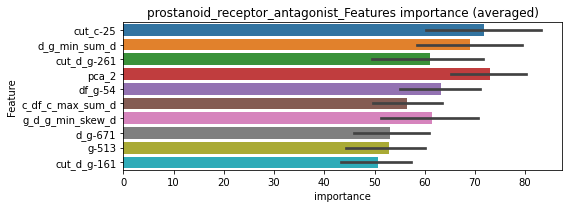

len(train_index) : 2801
len(valid_index) : 934
================================= fold 1/4 prostanoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2801
len(valid_index) : 934
================================= fold 2/4 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[269]	training's binary_logloss: 0.00157383	valid_1's binary_logloss: 0.0436556
Training until validation scores don't improve for 30 rounds


len(train_index) : 2801
len(valid_index) : 934
================================= fold 3/4 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[143]	training's binary_logloss: 0.00395398	valid_1's binary_logloss: 0.0529909
Training until validation scores don't improve for 30 rounds


len(train_index) : 2802
len(valid_index) : 933
================================= fold 4/4 prostanoid_receptor_antagonist=================================


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000892506	valid_1's binary_logloss: 0.0268852
Training until validation scores don't improve for 30 rounds


prostanoid_receptor_antagonist logloss: 0.0366864104970806
prostanoid_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.00188901	valid_1's binary_logloss: 0.0231995
mutually exclusive columns: proteasome_inhibitor


proteasome_inhibitor, len(trt): 726, len(othr): 10229
target_rate: 0.0304863 → Adj_target_rate: 0.0226983


selected negative label: 10229


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.0437514	valid_1's binary_logloss: 0.213619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.0406463	valid_1's binary_logloss: 0.217042
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[420]	training's binary_logloss: 0.0506605	valid_1's binary_logloss: 0.203912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[586]	training's binary_logloss: 0.0298276	valid_1's binary_logloss: 0.207093


1 / 3, AUC score:0.904, PR-AUC:0.847
y_Threshold: 0.0744305, Threshold: 0.1186888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 1254 → Positive_corect_labels: 1623/11020
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1186888, conf_0:0.08308, conf_1:0.15430
threshold: 0.1186888, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1623.0/11020, y_label_rate: 0.1472777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.00945422	valid_1's binary_logloss: 0.10365
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.00763558	valid_1's binary_logloss: 0.107999
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[520]	training's binary_logloss: 0.00922208	valid_1's binary_logloss: 0.101036
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[597]	training's binary_logloss: 0.00626469	valid_1's binary_logloss: 0.0898432


2 / 3, AUC score:0.986, PR-AUC:0.967
y_Threshold: 0.0488839, Threshold: 0.1186888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 262 → Positive_corect_labels: 1492.0/10758
p_label_rate: 0.0072828 Vs.target_rate: 0.03049
Num_p_label: 29.0, Expected: 121.4, Threshold: 0.1186888, conf_0:0.09495, conf_1:0.14243
threshold: 0.1186888, positive_p_label: 29.0/3982, p_label_rate: 0.0072828
positive_y_label: 1492.0/10758, y_label_rate: 0.1386875
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[614]	training's binary_logloss: 0.00266746	valid_1's binary_logloss: 0.0584949
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00462876	valid_1's binary_logloss: 0.0693612
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[578]	training's binary_logloss: 0.00327706	valid_1's binary_logloss: 0.0665635
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[699]	training's binary_logloss: 0.00186172	valid_1's binary_logloss: 0.0563629


3 / 3, AUC score:0.996, PR-AUC:0.990
y_Threshold: 0.0336249, Threshold: 0.1186888, pos_neg_ratio: 0.8000000
Remove_noisy_data: 102 → Positive_corect_labels: 1441.0/10656
p_label_rate: 0.0100452 Vs.target_rate: 0.03049
Num_p_label: 40.0, Expected: 121.4, Threshold: 0.1186888, conf_0:0.10682, conf_1:0.13056
threshold: 0.1186888, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1441.0/10656, y_label_rate: 0.1352290


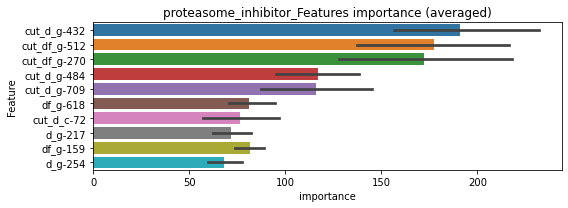

len(train_index) : 7992
len(valid_index) : 2664
================================= fold 1/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 7992
len(valid_index) : 2664
================================= fold 2/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[204]	training's binary_logloss: 0.00450945	valid_1's binary_logloss: 0.0526492
Training until validation scores don't improve for 30 rounds


len(train_index) : 7992
len(valid_index) : 2664
================================= fold 3/4 proteasome_inhibitor=================================


Early stopping, best iteration is:
[279]	training's binary_logloss: 0.0026235	valid_1's binary_logloss: 0.0444815
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[294]	training's binary_logloss: 0.00233702	valid_1's binary_logloss: 0.0542594


len(train_index) : 7992
len(valid_index) : 2664
================================= fold 4/4 proteasome_inhibitor=================================


Training until validation scores don't improve for 30 rounds


proteasome_inhibitor logloss: 0.049335848896248036
proteasome_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[204]	training's binary_logloss: 0.00466654	valid_1's binary_logloss: 0.0459533


protein_kinase_inhibitor, len(trt): 48, len(othr): 3281
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3281


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000601628	valid_1's binary_logloss: 0.0400902
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000683002	valid_1's binary_logloss: 0.032898
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[593]	training's binary_logloss: 0.000460484	valid_1's binary_logloss: 0.00381274
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00054705	valid_1's binary_logloss: 0.0302008


y_Threshold: 0.0026744, Threshold: 0.0057331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3805
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0057331, conf_0:0.00401, conf_1:0.00745
Num_p_label: 1.0, Expected: 8.0, Adj_threshold_1: 0.0357331
threshold: 0.0357331, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3805, y_label_rate: 0.1724047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000451556	valid_1's binary_logloss: 0.0379769
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000643769	valid_1's binary_logloss: 0.0308471
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.00053363	valid_1's binary_logloss: 0.00375981
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0099436, Threshold: 0.0357331, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000532965	valid_1's binary_logloss: 0.0282865


Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3801
p_label_rate: 0.0012557 Vs.target_rate: 0.00202
Num_p_label: 5.0, Expected: 8.0, Threshold: 0.0357331, conf_0:0.02859, conf_1:0.04288
threshold: 0.0357331, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000804011	valid_1's binary_logloss: 0.0336658
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[465]	training's binary_logloss: 0.000608277	valid_1's binary_logloss: 0.0191161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000450736	valid_1's binary_logloss: 0.0176489
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000529568	valid_1's binary_logloss: 0.0281303


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0128171, Threshold: 0.0357331, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 652.0/3797
p_label_rate: 0.0007534 Vs.target_rate: 0.00202
Num_p_label: 3.0, Expected: 8.0, Threshold: 0.0357331, conf_0:0.03216, conf_1:0.03931
threshold: 0.0357331, positive_p_label: 3.0/3982, p_label_rate: 0.0007534
positive_y_label: 652.0/3797, y_label_rate: 0.1717145


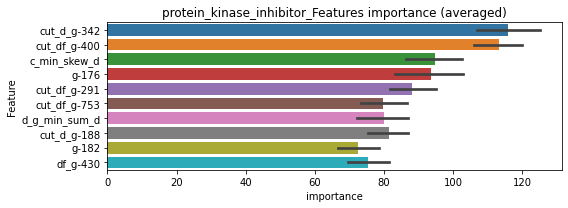

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 protein_kinase_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000780641	valid_1's binary_logloss: 0.0217174
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 protein_kinase_inhibitor=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000770801	valid_1's binary_logloss: 0.0290596
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949


Early stopping, best iteration is:
[548]	training's binary_logloss: 0.00054372	valid_1's binary_logloss: 0.0138154


================================= fold 4/4 protein_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


protein_kinase_inhibitor logloss: 0.0214590907275182


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000794755	valid_1's binary_logloss: 0.0212437


protein_phosphatase_inhibitor, len(trt): 24, len(othr): 3285
target_rate: 0.0010078 → Adj_target_rate: 0.0012513


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000375291	valid_1's binary_logloss: 0.00829387
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000324407	valid_1's binary_logloss: 0.0188597
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000305863	valid_1's binary_logloss: 0.00329002
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013160, Threshold: 0.0036319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00101
Num_p_label: 40.0, Expected: 4.0, Threshold: 0.0036319, conf_0:0.00254, conf_1:0.00472
Num_p_label: 0.0, Expected: 4.0, Adj_threshold_1: 0.0336319


Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000352518	valid_1's binary_logloss: 0.0035204


threshold: 0.0336319, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000366309	valid_1's binary_logloss: 0.00777228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000360735	valid_1's binary_logloss: 0.0150042
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000298082	valid_1's binary_logloss: 0.00223028
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0164484, Threshold: 0.0336319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0336319, conf_0:0.02691, conf_1:0.04036
threshold: 0.0336319, positive_p_label: 5.0/3982, p_label_rate: 0.0012557


Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000314551	valid_1's binary_logloss: 0.00332445


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000366309	valid_1's binary_logloss: 0.00777228
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000360735	valid_1's binary_logloss: 0.0150042
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000298082	valid_1's binary_logloss: 0.00223028
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0164484, Threshold: 0.0336319, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0012557 Vs.target_rate: 0.00101
Num_p_label: 5.0, Expected: 4.0, Threshold: 0.0336319, conf_0:0.03027, conf_1:0.03700


Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000314551	valid_1's binary_logloss: 0.00332445


threshold: 0.0336319, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


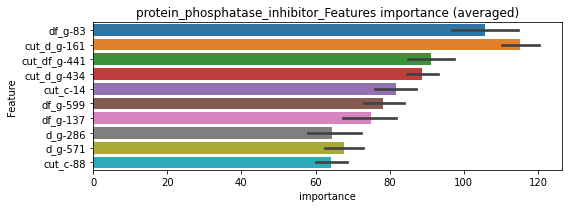

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 protein_phosphatase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000370367	valid_1's binary_logloss: 0.00789858
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000456248	valid_1's binary_logloss: 0.0149342
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 protein_phosphatase_inhibitor=================================


Early stopping, best iteration is:
[676]	training's binary_logloss: 0.00032545	valid_1's binary_logloss: 0.00250054
Training until validation scores don't improve for 30 rounds


protein_phosphatase_inhibitor logloss: 0.0072160076019534575


Early stopping, best iteration is:
[700]	training's binary_logloss: 0.000317404	valid_1's binary_logloss: 0.00351583


protein_synthesis_inhibitor, len(trt): 103, len(othr): 3273
target_rate: 0.0043252 → Adj_target_rate: 0.0043163


selected negative label: 3273


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[219]	training's binary_logloss: 0.0116438	valid_1's binary_logloss: 0.111207
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00307709	valid_1's binary_logloss: 0.0819162
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00286936	valid_1's binary_logloss: 0.060539
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.994, PR-AUC:0.987
y_Threshold: 0.0174860, Threshold: 0.0295518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 158 → Positive_corect_labels: 641/3769
p_label_rate: 0.0100452 Vs.target_rate: 0.00433
Num_p_label: 40.0, Expected: 17.2, Threshold: 0.0295518, conf_0:0.02069, conf_1:0.03842
Num_p_label: 25.0, Expected: 17.2, Adj_threshold_1: 0.0595518
threshold: 0.0595518, positive_p_label: 25.0/3982, p_label_rate: 0.0062783


Early stopping, best iteration is:
[281]	training's binary_logloss: 0.0060557	valid_1's binary_logloss: 0.0782997


positive_y_label: 641.0/3769, y_label_rate: 0.1700716
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00385059	valid_1's binary_logloss: 0.0775334
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.00295323	valid_1's binary_logloss: 0.0619276
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[371]	training's binary_logloss: 0.00251405	valid_1's binary_logloss: 0.0700979
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0214468, Threshold: 0.0595518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 34 → Positive_corect_labels: 624.0/3735
p_label_rate: 0.0065294 Vs.target_rate: 0.00433
Num_p_label: 26.0, Expected: 17.2, Threshold: 0.0595518, conf_0:0.04764, conf_1:0.07146
Num_p_label: 20.0, Expected: 17.2, Adj_threshold_1: 0.0895518


Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00301894	valid_1's binary_logloss: 0.0634527


threshold: 0.0895518, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 624.0/3735, y_label_rate: 0.1670683
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.0044178	valid_1's binary_logloss: 0.0568347
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[323]	training's binary_logloss: 0.00324736	valid_1's binary_logloss: 0.0624543
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00205854	valid_1's binary_logloss: 0.0382518
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.00101837	valid_1's binary_logloss: 0.0542651


3 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0233344, Threshold: 0.0895518, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 613.0/3713
p_label_rate: 0.0050226 Vs.target_rate: 0.00433
Num_p_label: 20.0, Expected: 17.2, Threshold: 0.0895518, conf_0:0.08060, conf_1:0.09851
threshold: 0.0895518, positive_p_label: 20.0/3982, p_label_rate: 0.0050226
positive_y_label: 613.0/3713, y_label_rate: 0.1650956


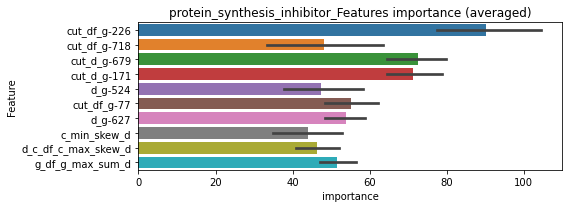

len(train_index) : 2784
len(valid_index) : 929
================================= fold 1/4 protein_synthesis_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2785
len(valid_index) : 928
================================= fold 2/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00198738	valid_1's binary_logloss: 0.0413519
Training until validation scores don't improve for 30 rounds


len(train_index) : 2785
len(valid_index) : 928
================================= fold 3/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00448712	valid_1's binary_logloss: 0.0570777
Training until validation scores don't improve for 30 rounds


len(train_index) : 2785
len(valid_index) : 928
================================= fold 4/4 protein_synthesis_inhibitor=================================


Early stopping, best iteration is:
[166]	training's binary_logloss: 0.00369155	valid_1's binary_logloss: 0.0595787
Training until validation scores don't improve for 30 rounds


protein_synthesis_inhibitor logloss: 0.0503255830901427
protein_synthesis_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00131162	valid_1's binary_logloss: 0.0433037


protein_tyrosine_kinase_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[354]	training's binary_logloss: 0.000442336	valid_1's binary_logloss: 0.0129076
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000308179	valid_1's binary_logloss: 0.0144184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000284356	valid_1's binary_logloss: 0.00172821
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009706, Threshold: 0.0019442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0019442, conf_0:0.00136, conf_1:0.00253
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0319442
threshold: 0.0319442, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000282378	valid_1's binary_logloss: 0.00396483


positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000339319	valid_1's binary_logloss: 0.0180308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000370499	valid_1's binary_logloss: 0.00556986
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00027847	valid_1's binary_logloss: 0.000728546
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0083830, Threshold: 0.0319442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0002511 Vs.target_rate: 0.00080
Num_p_label: 1.0, Expected: 3.2, Threshold: 0.0319442, conf_0:0.02556, conf_1:0.03833


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000343235	valid_1's binary_logloss: 0.00807973


threshold: 0.0319442, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000339319	valid_1's binary_logloss: 0.0180308
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.000370499	valid_1's binary_logloss: 0.00556986
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.00027847	valid_1's binary_logloss: 0.000728546
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0083830, Threshold: 0.0319442, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0002511 Vs.target_rate: 0.00080
Num_p_label: 1.0, Expected: 3.2, Threshold: 0.0319442, conf_0:0.02875, conf_1:0.03514


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000343235	valid_1's binary_logloss: 0.00807973


threshold: 0.0319442, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3811, y_label_rate: 0.1721333


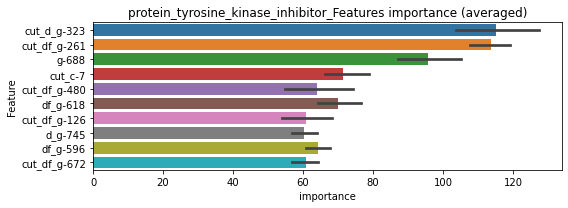

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 protein_tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[334]	training's binary_logloss: 0.000462276	valid_1's binary_logloss: 0.0142849
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[612]	training's binary_logloss: 0.000296159	valid_1's binary_logloss: 0.00433989
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 protein_tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000290873	valid_1's binary_logloss: 0.00092858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000313045	valid_1's binary_logloss: 0.00664208


protein_tyrosine_kinase_inhibitor logloss: 0.006548843226337443
radiopaque_medium, len(trt): 56, len(othr): 3282
target_rate: 0.0023516 → Adj_target_rate: 0.0025713


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000762365	valid_1's binary_logloss: 0.0549113
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000555153	valid_1's binary_logloss: 0.0311852
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[536]	training's binary_logloss: 0.000607218	valid_1's binary_logloss: 0.00565855
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0028674, Threshold: 0.0104496, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3806


Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000952424	valid_1's binary_logloss: 0.0411387


p_label_rate: 0.0100452 Vs.target_rate: 0.00235
Num_p_label: 40.0, Expected: 9.4, Threshold: 0.0104496, conf_0:0.00731, conf_1:0.01358
Num_p_label: 4.0, Expected: 9.4, Adj_threshold_1: 0.0404496
threshold: 0.0404496, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 656.0/3806, y_label_rate: 0.1723594
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.00058628	valid_1's binary_logloss: 0.04864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000553948	valid_1's binary_logloss: 0.0322101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000512071	valid_1's binary_logloss: 0.00630848
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[511]	training's binary_logloss: 0.000610973	valid_1's binary_logloss: 0.036703


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0174068, Threshold: 0.0404496, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3800
p_label_rate: 0.0067805 Vs.target_rate: 0.00235
Num_p_label: 27.0, Expected: 9.4, Threshold: 0.0404496, conf_0:0.03236, conf_1:0.04854
Num_p_label: 18.0, Expected: 9.4, Adj_threshold_1: 0.0704496
threshold: 0.0704496, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 653.0/3800, y_label_rate: 0.1718421
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[313]	training's binary_logloss: 0.00172885	valid_1's binary_logloss: 0.044778
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000519109	valid_1's binary_logloss: 0.0251629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.00070001	valid_1's binary_logloss: 0.0385536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000476471	valid_1's binary_logloss: 0.0125735


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0147485, Threshold: 0.0704496, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 650.0/3794
p_label_rate: 0.0052737 Vs.target_rate: 0.00235
Num_p_label: 21.0, Expected: 9.4, Threshold: 0.0704496, conf_0:0.06340, conf_1:0.07749
threshold: 0.0704496, positive_p_label: 21.0/3982, p_label_rate: 0.0052737
positive_y_label: 650.0/3794, y_label_rate: 0.1713231


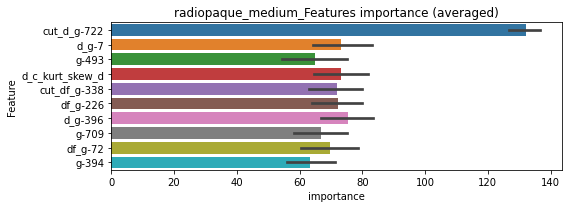

len(train_index) : 2845
len(valid_index) : 949
================================= fold 1/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2845
len(valid_index) : 949
================================= fold 2/4 radiopaque_medium=================================


Early stopping, best iteration is:
[320]	training's binary_logloss: 0.0010285	valid_1's binary_logloss: 0.0277437
Training until validation scores don't improve for 30 rounds


len(train_index) : 2846
len(valid_index) : 948
================================= fold 3/4 radiopaque_medium=================================


Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000960261	valid_1's binary_logloss: 0.035765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000593874	valid_1's binary_logloss: 0.0180975


len(train_index) : 2846
len(valid_index) : 948
================================= fold 4/4 radiopaque_medium=================================


Training until validation scores don't improve for 30 rounds


radiopaque_medium logloss: 0.02680276882486641


Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00100768	valid_1's binary_logloss: 0.0255945


raf_inhibitor, len(trt): 223, len(othr): 3258
target_rate: 0.0093642 → Adj_target_rate: 0.0083226


selected negative label: 3258


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0239803	valid_1's binary_logloss: 0.201533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[221]	training's binary_logloss: 0.0359125	valid_1's binary_logloss: 0.215021
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[275]	training's binary_logloss: 0.0213732	valid_1's binary_logloss: 0.181699
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.929, PR-AUC:0.887
y_Threshold: 0.0586130, Threshold: 0.2980942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 337 → Positive_corect_labels: 548/3572
p_label_rate: 0.0100452 Vs.target_rate: 0.00936
Num_p_label: 40.0, Expected: 37.3, Threshold: 0.2980942, conf_0:0.20867, conf_1:0.38752
threshold: 0.2980942, positive_p_label: 40.0/3982, p_label_rate: 0.0100452


Early stopping, best iteration is:
[268]	training's binary_logloss: 0.0225404	valid_1's binary_logloss: 0.17183


positive_y_label: 548.0/3572, y_label_rate: 0.1534155
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[272]	training's binary_logloss: 0.0103122	valid_1's binary_logloss: 0.115114
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.0095156	valid_1's binary_logloss: 0.104379
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.00397233	valid_1's binary_logloss: 0.0824767
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.992, PR-AUC:0.977
y_Threshold: 0.0509077, Threshold: 0.2980942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 74 → Positive_corect_labels: 511.0/3498
p_label_rate: 0.0301356 Vs.target_rate: 0.00936
Num_p_label: 120.0, Expected: 37.3, Threshold: 0.2980942, conf_0:0.23848, conf_1:0.35771


Early stopping, best iteration is:
[359]	training's binary_logloss: 0.00485821	valid_1's binary_logloss: 0.0934404


Num_p_label: 113.0, Expected: 37.3, Adj_threshold_1: 0.3280942
Num_p_label: 104.0, Expected: 37.3, Adj_threshold_2: 0.3580942
Num_p_label: 95.0, Expected: 37.3, Adj_threshold_3: 0.3880942
Num_p_label: 85.0, Expected: 37.3, Adj_threshold_4: 0.4180942
Num_p_label: 82.0, Expected: 37.3, Adj_threshold_5: 0.4480942
Num_p_label: 75.0, Expected: 37.3, Adj_threshold_6: 0.4780942
Num_p_label: 64.0, Expected: 37.3, Adj_threshold_7: 0.5080942
Num_p_label: 58.0, Expected: 37.3, Adj_threshold_8: 0.5380942
Num_p_label: 48.0, Expected: 37.3, Adj_threshold_9: 0.5680942
threshold: 0.5680942, positive_p_label: 48.0/3982, p_label_rate: 0.0120542
positive_y_label: 511.0/3498, y_label_rate: 0.1460835
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[324]	training's binary_logloss: 0.00427549	valid_1's binary_logloss: 0.0874449
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.0023192	valid_1's binary_logloss: 0.0539922
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[516]	training's binary_logloss: 0.00153461	valid_1's binary_logloss: 0.0366535
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.998, PR-AUC:0.994
y_Threshold: 0.0471509, Threshold: 0.5680942, pos_neg_ratio: 0.8000000
Remove_noisy_data: 30 → Positive_corect_labels: 496.0/3468
p_label_rate: 0.0258664 Vs.target_rate: 0.00936
Num_p_label: 103.0, Expected: 37.3, Threshold: 0.5680942, conf_0:0.51128, conf_1:0.62490
Num_p_label: 97.0, Expected: 37.3, Adj_threshold_1: 0.5980942
Num_p_label: 89.0, Expected: 37.3, Adj_threshold_2: 0.6280942
Num_p_label: 80.0, Expected: 37.3, Adj_threshold_3: 0.6580942
Num_p_label: 72.0, Expected: 37.3, Adj_threshold_4: 0.6880942
Num_p_label: 68.0, Expected: 37.3, Adj_threshold_5: 0.7180942
Num_p_label: 66.0, Expected: 37.3, Adj_threshold_6: 0.7480942
Num_p_label: 64.0, Expected: 37.3, Adj_threshold_7: 0.7780942
Num_p_label: 60.0, Expected: 37.3, Adj_threshold_8: 0.8080942
Num_p_label: 46.0, Expected: 37.3, Adj_threshold_9: 0.8380942


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.00544072	valid_1's binary_logloss: 0.0920869


threshold: 0.8380942, positive_p_label: 46.0/3982, p_label_rate: 0.0115520
positive_y_label: 496.0/3468, y_label_rate: 0.1430219


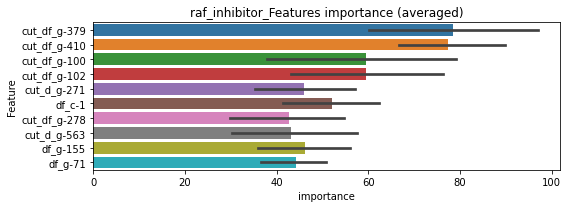

len(train_index) : 2601
len(valid_index) : 867
================================= fold 1/4 raf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2601
len(valid_index) : 867
================================= fold 2/4 raf_inhibitor=================================


Early stopping, best iteration is:
[255]	training's binary_logloss: 0.00271567	valid_1's binary_logloss: 0.0676788
Training until validation scores don't improve for 30 rounds


len(train_index) : 2601
len(valid_index) : 867
================================= fold 3/4 raf_inhibitor=================================


Early stopping, best iteration is:
[305]	training's binary_logloss: 0.00220844	valid_1's binary_logloss: 0.0538226
Training until validation scores don't improve for 30 rounds


len(train_index) : 2601
len(valid_index) : 867
================================= fold 4/4 raf_inhibitor=================================


Early stopping, best iteration is:
[201]	training's binary_logloss: 0.00403266	valid_1's binary_logloss: 0.0481181
Training until validation scores don't improve for 30 rounds


raf_inhibitor logloss: 0.06311160132879369
raf_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[144]	training's binary_logloss: 0.00626421	valid_1's binary_logloss: 0.0828269


ras_gtpase_inhibitor, len(trt): 12, len(othr): 3289
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3289


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000228761	valid_1's binary_logloss: 0.00254321
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000242171	valid_1's binary_logloss: 0.0104776
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[466]	training's binary_logloss: 0.000225671	valid_1's binary_logloss: 0.000393067
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0007334, Threshold: 0.0063013, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0063013, conf_0:0.00441, conf_1:0.00819
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_1: 0.0363013
Num_p_label: 2.0, Expected: 2.0, Adj_threshold_2: 0.0663013


Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000231923	valid_1's binary_logloss: 0.00463714


threshold: 0.0663013, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000213414	valid_1's binary_logloss: 0.00185249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000224411	valid_1's binary_logloss: 0.00854061
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00021517	valid_1's binary_logloss: 0.000230866
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201315, Threshold: 0.0663013, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0115520 Vs.target_rate: 0.00050
Num_p_label: 46.0, Expected: 2.0, Threshold: 0.0663013, conf_0:0.05304, conf_1:0.07956
Num_p_label: 41.0, Expected: 2.0, Adj_threshold_1: 0.0963013
Num_p_label: 36.0, Expected: 2.0, Adj_threshold_2: 0.1263013
Num_p_label: 31.0, Expected: 2.0, Adj_threshold_3: 0.1563013
Num_p_label: 28.0, Expected: 2.0, Adj_threshold_4: 0.1863013
Num_p_label: 27.0, Expected: 2.0, Adj_threshold_5: 0.2163013
Num_p_label: 21.0, Expected: 2.0, Adj_threshold_6: 0.2463013


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000219259	valid_1's binary_logloss: 0.00368719


Num_p_label: 17.0, Expected: 2.0, Adj_threshold_7: 0.2763013
Num_p_label: 17.0, Expected: 2.0, Adj_threshold_8: 0.3063013
Num_p_label: 14.0, Expected: 2.0, Adj_threshold_9: 0.3363013
Num_p_label: 12.0, Expected: 2.0, Adj_threshold_10: 0.3663013
threshold: 0.3663013, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000213414	valid_1's binary_logloss: 0.00185249
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000224411	valid_1's binary_logloss: 0.00854061
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.00021517	valid_1's binary_logloss: 0.000230866
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0201315, Threshold: 0.3663013, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0030136 Vs.target_rate: 0.00050
Num_p_label: 12.0, Expected: 2.0, Threshold: 0.3663013, conf_0:0.32967, conf_1:0.40293
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_1: 0.3963013
Num_p_label: 11.0, Expected: 2.0, Adj_threshold_2: 0.4263013


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000219259	valid_1's binary_logloss: 0.00368719


Num_p_label: 10.0, Expected: 2.0, Adj_threshold_3: 0.4563013
Num_p_label: 8.0, Expected: 2.0, Adj_threshold_4: 0.4863013
Num_p_label: 7.0, Expected: 2.0, Adj_threshold_5: 0.5163013
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_6: 0.5463013
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_7: 0.5763013
Num_p_label: 6.0, Expected: 2.0, Adj_threshold_8: 0.6063013
Num_p_label: 5.0, Expected: 2.0, Adj_threshold_9: 0.6363013
threshold: 0.6363013, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 657.0/3813, y_label_rate: 0.1723053


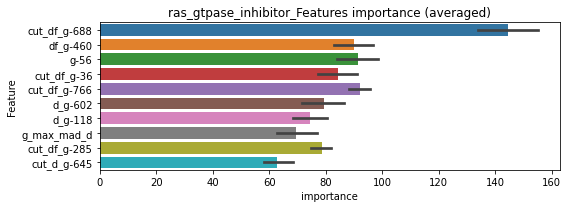

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 ras_gtpase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[704]	training's binary_logloss: 0.000221531	valid_1's binary_logloss: 0.00161743
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[613]	training's binary_logloss: 0.000229363	valid_1's binary_logloss: 0.00502588
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 ras_gtpase_inhibitor=================================


Early stopping, best iteration is:
[634]	training's binary_logloss: 0.00023233	valid_1's binary_logloss: 0.000253086
Training until validation scores don't improve for 30 rounds


ras_gtpase_inhibitor logloss: 0.0023339901364845743


Early stopping, best iteration is:
[615]	training's binary_logloss: 0.000231586	valid_1's binary_logloss: 0.00243751


retinoid_receptor_agonist, len(trt): 67, len(othr): 3277
target_rate: 0.0028135 → Adj_target_rate: 0.0029948


selected negative label: 3277


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00247844	valid_1's binary_logloss: 0.0645764
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[533]	training's binary_logloss: 0.000770506	valid_1's binary_logloss: 0.0317731
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[376]	training's binary_logloss: 0.001626	valid_1's binary_logloss: 0.0389958
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0067037, Threshold: 0.0956248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 138 → Positive_corect_labels: 652/3794


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00235397	valid_1's binary_logloss: 0.0461569


p_label_rate: 0.0100452 Vs.target_rate: 0.00281
Num_p_label: 40.0, Expected: 11.2, Threshold: 0.0956248, conf_0:0.06694, conf_1:0.12431
Num_p_label: 33.0, Expected: 11.2, Adj_threshold_1: 0.1256248
Num_p_label: 27.0, Expected: 11.2, Adj_threshold_2: 0.1556248
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_3: 0.1856248
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_4: 0.2156248
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_5: 0.2456248
Num_p_label: 20.0, Expected: 11.2, Adj_threshold_6: 0.2756248
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_7: 0.3056248
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_8: 0.3356248
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_9: 0.3656248
Num_p_label: 15.0, Expected: 11.2, Adj_threshold_10: 0.3956248
threshold: 0.3956248, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 652.0/3794, y_label_rate: 0.1718503
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.00123529	valid_1's binary_logloss: 0.0468789
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000789185	valid_1's binary_logloss: 0.0400045
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.000745975	valid_1's binary_logloss: 0.0271544
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999


Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00109507	valid_1's binary_logloss: 0.0439181


y_Threshold: 0.0140667, Threshold: 0.3956248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 646.0/3782
p_label_rate: 0.0065294 Vs.target_rate: 0.00281
Num_p_label: 26.0, Expected: 11.2, Threshold: 0.3956248, conf_0:0.31650, conf_1:0.47475
Num_p_label: 24.0, Expected: 11.2, Adj_threshold_1: 0.4256248
Num_p_label: 21.0, Expected: 11.2, Adj_threshold_2: 0.4556248
Num_p_label: 19.0, Expected: 11.2, Adj_threshold_3: 0.4856248
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_4: 0.5156248
Num_p_label: 18.0, Expected: 11.2, Adj_threshold_5: 0.5456248
Num_p_label: 16.0, Expected: 11.2, Adj_threshold_6: 0.5756248
threshold: 0.5756248, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 646.0/3782, y_label_rate: 0.1708091
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000779102	valid_1's binary_logloss: 0.0316118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[392]	training's binary_logloss: 0.0012669	valid_1's binary_logloss: 0.0450727
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00106328	valid_1's binary_logloss: 0.0317757
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0219651, Threshold: 0.5756248, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 640.0/3770
p_label_rate: 0.0042692 Vs.target_rate: 0.00281
Num_p_label: 17.0, Expected: 11.2, Threshold: 0.5756248, conf_0:0.51806, conf_1:0.63319
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_1: 0.6056248
Num_p_label: 17.0, Expected: 11.2, Adj_threshold_2: 0.6356248
Num_p_label: 13.0, Expected: 11.2, Adj_threshold_3: 0.6656248


Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00126161	valid_1's binary_logloss: 0.033335


threshold: 0.6656248, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 640.0/3770, y_label_rate: 0.1697613


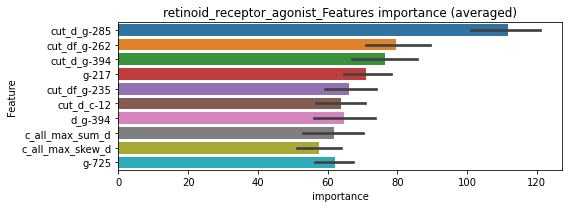

len(train_index) : 2827
len(valid_index) : 943
================================= fold 1/4 retinoid_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2827
len(valid_index) : 943
================================= fold 2/4 retinoid_receptor_agonist=================================


Early stopping, best iteration is:
[287]	training's binary_logloss: 0.00139453	valid_1's binary_logloss: 0.0294318
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 3/4 retinoid_receptor_agonist=================================


Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00186533	valid_1's binary_logloss: 0.044074
Training until validation scores don't improve for 30 rounds


len(train_index) : 2828
len(valid_index) : 942
================================= fold 4/4 retinoid_receptor_agonist=================================


Early stopping, best iteration is:
[374]	training's binary_logloss: 0.00102918	valid_1's binary_logloss: 0.0227173
Training until validation scores don't improve for 30 rounds


retinoid_receptor_agonist logloss: 0.03257655029850761
retinoid_receptor_agonist is unpredictable(><)!


Early stopping, best iteration is:
[340]	training's binary_logloss: 0.0011365	valid_1's binary_logloss: 0.0340742


retinoid_receptor_antagonist, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000151764	valid_1's binary_logloss: 0.0035476
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[423]	training's binary_logloss: 0.000153435	valid_1's binary_logloss: 0.0045625
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000144327	valid_1's binary_logloss: 0.0003516
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004175, Threshold: 0.0014247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0014247, conf_0:0.00100, conf_1:0.00185
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_1: 0.0314247
threshold: 0.0314247, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[467]	training's binary_logloss: 0.000145765	valid_1's binary_logloss: 0.000154619


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000141912	valid_1's binary_logloss: 0.00312481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000150303	valid_1's binary_logloss: 0.00257459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000139175	valid_1's binary_logloss: 0.000134083
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0205467, Threshold: 0.0314247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0012557 Vs.target_rate: 0.00025
Num_p_label: 5.0, Expected: 1.0, Threshold: 0.0314247, conf_0:0.02514, conf_1:0.03771
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0614247
Num_p_label: 2.0, Expected: 1.0, Adj_threshold_2: 0.0914247
threshold: 0.0914247, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000137847	valid_1's binary_logloss: 0.000134789


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000141912	valid_1's binary_logloss: 0.00312481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[419]	training's binary_logloss: 0.000150303	valid_1's binary_logloss: 0.00257459
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000139175	valid_1's binary_logloss: 0.000134083
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0205467, Threshold: 0.0914247, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00025
Num_p_label: 2.0, Expected: 1.0, Threshold: 0.0914247, conf_0:0.08228, conf_1:0.10057
threshold: 0.0914247, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000137847	valid_1's binary_logloss: 0.000134789


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


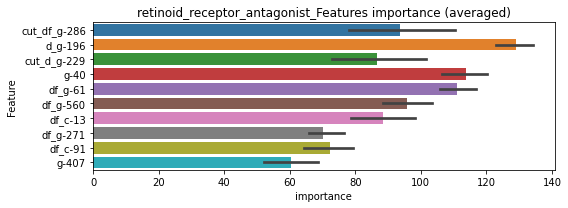

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 retinoid_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[822]	training's binary_logloss: 0.000143424	valid_1's binary_logloss: 0.00233715
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[587]	training's binary_logloss: 0.000167631	valid_1's binary_logloss: 0.00181451
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 retinoid_receptor_antagonist=================================


Early stopping, best iteration is:
[894]	training's binary_logloss: 0.00014329	valid_1's binary_logloss: 0.000141778
Training until validation scores don't improve for 30 rounds


retinoid_receptor_antagonist logloss: 0.0011079934934716282


Early stopping, best iteration is:
[950]	training's binary_logloss: 0.000140245	valid_1's binary_logloss: 0.000137247


rho_associated_kinase_inhibitor, len(trt): 35, len(othr): 3284
target_rate: 0.0014697 → Adj_target_rate: 0.0017245


selected negative label: 3284


N_features:506
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000491643	valid_1's binary_logloss: 0.0345765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000469503	valid_1's binary_logloss: 0.0113434
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[549]	training's binary_logloss: 0.0003992	valid_1's binary_logloss: 0.00348179
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021376, Threshold: 0.0044651, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000390762	valid_1's binary_logloss: 0.0242782


Remove_noisy_data: 132 → Positive_corect_labels: 656/3808
p_label_rate: 0.0100452 Vs.target_rate: 0.00147
Num_p_label: 40.0, Expected: 5.9, Threshold: 0.0044651, conf_0:0.00313, conf_1:0.00580
Num_p_label: 0.0, Expected: 5.9, Adj_threshold_1: 0.0344651
threshold: 0.0344651, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000507502	valid_1's binary_logloss: 0.033556
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000447264	valid_1's binary_logloss: 0.00944483
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000376104	valid_1's binary_logloss: 0.00257615
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0135187, Threshold: 0.0344651, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0010045 Vs.target_rate: 0.00147
Num_p_label: 4.0, Expected: 5.9, Threshold: 0.0344651, conf_0:0.02757, conf_1:0.04136


Early stopping, best iteration is:
[399]	training's binary_logloss: 0.000649615	valid_1's binary_logloss: 0.0223335


threshold: 0.0344651, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[433]	training's binary_logloss: 0.000531739	valid_1's binary_logloss: 0.0220787
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000419564	valid_1's binary_logloss: 0.0101859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.000369189	valid_1's binary_logloss: 0.011372
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000366411	valid_1's binary_logloss: 0.0208928


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0163960, Threshold: 0.0344651, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0012557 Vs.target_rate: 0.00147
Num_p_label: 5.0, Expected: 5.9, Threshold: 0.0344651, conf_0:0.03102, conf_1:0.03791
threshold: 0.0344651, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


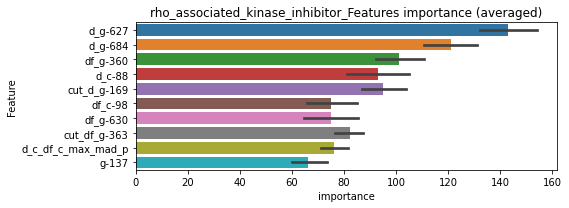

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[473]	training's binary_logloss: 0.000504034	valid_1's binary_logloss: 0.0245812


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 rho_associated_kinase_inhibitor=================================


Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000553628	valid_1's binary_logloss: 0.0129559
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.000405197	valid_1's binary_logloss: 0.00516939


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 rho_associated_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


rho_associated_kinase_inhibitor logloss: 0.014528553071245828


Early stopping, best iteration is:
[555]	training's binary_logloss: 0.000447746	valid_1's binary_logloss: 0.0154076


ribonucleoside_reductase_inhibitor, len(trt): 37, len(othr): 3286
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000384689	valid_1's binary_logloss: 0.0161382
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000542079	valid_1's binary_logloss: 0.0368621
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[579]	training's binary_logloss: 0.000390575	valid_1's binary_logloss: 0.00484842
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021494, Threshold: 0.0053985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0053985, conf_0:0.00378, conf_1:0.00702
Num_p_label: 1.0, Expected: 6.2, Adj_threshold_1: 0.0353985


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00044162	valid_1's binary_logloss: 0.0120477


threshold: 0.0353985, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000607813	valid_1's binary_logloss: 0.0261881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[569]	training's binary_logloss: 0.00037526	valid_1's binary_logloss: 0.00788002
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000386914	valid_1's binary_logloss: 0.00150168
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0109358, Threshold: 0.0353985, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000402279	valid_1's binary_logloss: 0.02321


p_label_rate: 0.0010045 Vs.target_rate: 0.00155
Num_p_label: 4.0, Expected: 6.2, Threshold: 0.0353985, conf_0:0.02832, conf_1:0.04248
threshold: 0.0353985, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.000374555	valid_1's binary_logloss: 0.0186954
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000417886	valid_1's binary_logloss: 0.0110143
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000377977	valid_1's binary_logloss: 0.00938122
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0108332, Threshold: 0.0353985, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000378644	valid_1's binary_logloss: 0.0221044


Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3805
p_label_rate: 0.0010045 Vs.target_rate: 0.00155
Num_p_label: 4.0, Expected: 6.2, Threshold: 0.0353985, conf_0:0.03186, conf_1:0.03894
threshold: 0.0353985, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 654.0/3805, y_label_rate: 0.1718791


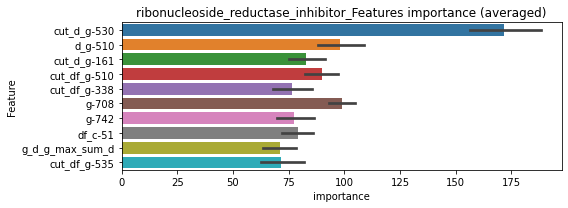

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 ribonucleoside_reductase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 ribonucleoside_reductase_inhibitor=================================


Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000491225	valid_1's binary_logloss: 0.0152706
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 ribonucleoside_reductase_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000667156	valid_1's binary_logloss: 0.00734983
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 ribonucleoside_reductase_inhibitor=================================


Early stopping, best iteration is:
[557]	training's binary_logloss: 0.000450817	valid_1's binary_logloss: 0.00824425
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[639]	training's binary_logloss: 0.000405713	valid_1's binary_logloss: 0.0153296


ribonucleoside_reductase_inhibitor logloss: 0.011549558310820811
rna_polymerase_inhibitor, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[477]	training's binary_logloss: 0.00032827	valid_1's binary_logloss: 0.00802101
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.000750428	valid_1's binary_logloss: 0.0233166
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000328674	valid_1's binary_logloss: 0.00283853
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000328107	valid_1's binary_logloss: 0.00670495


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014235, Threshold: 0.0043050, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0043050, conf_0:0.00301, conf_1:0.00560
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0343050
threshold: 0.0343050, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000359666	valid_1's binary_logloss: 0.00717606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.00110844	valid_1's binary_logloss: 0.0225579
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[500]	training's binary_logloss: 0.000328608	valid_1's binary_logloss: 0.00245072
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211808, Threshold: 0.0343050, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0037670 Vs.target_rate: 0.00105
Num_p_label: 15.0, Expected: 4.2, Threshold: 0.0343050, conf_0:0.02744, conf_1:0.04117
Num_p_label: 4.0, Expected: 4.2, Adj_threshold_1: 0.0643050


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000322294	valid_1's binary_logloss: 0.00547418


threshold: 0.0643050, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000359666	valid_1's binary_logloss: 0.00717606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[267]	training's binary_logloss: 0.00110844	valid_1's binary_logloss: 0.0225579
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000328608	valid_1's binary_logloss: 0.00245072
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0211808, Threshold: 0.0643050, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0010045 Vs.target_rate: 0.00105
Num_p_label: 4.0, Expected: 4.2, Threshold: 0.0643050, conf_0:0.05787, conf_1:0.07074


Early stopping, best iteration is:
[483]	training's binary_logloss: 0.000322294	valid_1's binary_logloss: 0.00547418


threshold: 0.0643050, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


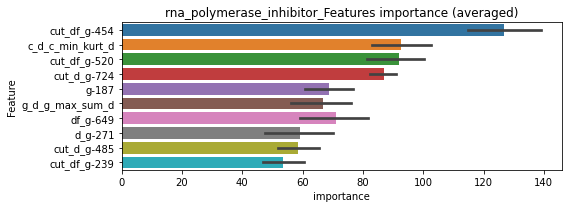

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 rna_polymerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953
================================= fold 2/4 rna_polymerase_inhibitor=================================


Early stopping, best iteration is:
[592]	training's binary_logloss: 0.000351857	valid_1's binary_logloss: 0.00687189
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 rna_polymerase_inhibitor=================================


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000486179	valid_1's binary_logloss: 0.0202415
Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 rna_polymerase_inhibitor=================================


Early stopping, best iteration is:
[660]	training's binary_logloss: 0.000340414	valid_1's binary_logloss: 0.00147904
Training until validation scores don't improve for 30 rounds


rna_polymerase_inhibitor logloss: 0.008189322917334653


Early stopping, best iteration is:
[636]	training's binary_logloss: 0.000337613	valid_1's binary_logloss: 0.00415362
mutually exclusive columns: serotonin_receptor_agonist


serotonin_receptor_agonist, len(trt): 236, len(othr): 5845
target_rate: 0.0099101 → Adj_target_rate: 0.0087332


selected negative label: 5845


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[304]	training's binary_logloss: 0.0160853	valid_1's binary_logloss: 0.125037
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[256]	training's binary_logloss: 0.0214742	valid_1's binary_logloss: 0.147604
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.0114628	valid_1's binary_logloss: 0.116981
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.0153878	valid_1's binary_logloss: 0.118348


1 / 3, AUC score:0.973, PR-AUC:0.948
y_Threshold: 0.0301761, Threshold: 0.0410371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 426 → Positive_corect_labels: 1073/6588
p_label_rate: 0.0100452 Vs.target_rate: 0.00991
Num_p_label: 40.0, Expected: 39.5, Threshold: 0.0410371, conf_0:0.02873, conf_1:0.05335
threshold: 0.0410371, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1073.0/6588, y_label_rate: 0.1628719
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[326]	training's binary_logloss: 0.00695641	valid_1's binary_logloss: 0.0701466
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[322]	training's binary_logloss: 0.00717212	valid_1's binary_logloss: 0.0871455
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[308]	training's binary_logloss: 0.00818864	valid_1's binary_logloss: 0.0742648
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0276726, Threshold: 0.0410371, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[319]	training's binary_logloss: 0.00705567	valid_1's binary_logloss: 0.0835806


Remove_noisy_data: 114 → Positive_corect_labels: 1016.0/6474
p_label_rate: 0.0123054 Vs.target_rate: 0.00991
Num_p_label: 49.0, Expected: 39.5, Threshold: 0.0410371, conf_0:0.03283, conf_1:0.04924
threshold: 0.0410371, positive_p_label: 49.0/3982, p_label_rate: 0.0123054
positive_y_label: 1016.0/6474, y_label_rate: 0.1569354
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00265563	valid_1's binary_logloss: 0.0414265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[332]	training's binary_logloss: 0.00369485	valid_1's binary_logloss: 0.0525941
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[301]	training's binary_logloss: 0.00518734	valid_1's binary_logloss: 0.0540612
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.997, PR-AUC:0.993
y_Threshold: 0.0274605, Threshold: 0.0410371, pos_neg_ratio: 0.8000000
Remove_noisy_data: 76 → Positive_corect_labels: 978.0/6398
p_label_rate: 0.0148167 Vs.target_rate: 0.00991
Num_p_label: 59.0, Expected: 39.5, Threshold: 0.0410371, conf_0:0.03693, conf_1:0.04514
threshold: 0.0410371, positive_p_label: 59.0/3982, p_label_rate: 0.0148167


Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00615675	valid_1's binary_logloss: 0.0524251


positive_y_label: 978.0/6398, y_label_rate: 0.1528603


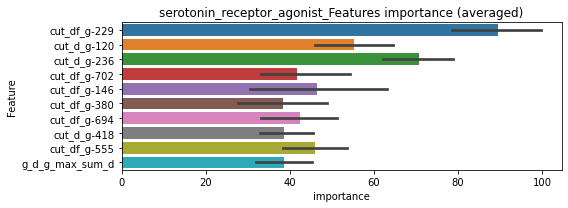

len(train_index) : 4798
len(valid_index) : 1600
================================= fold 1/4 serotonin_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 4798
len(valid_index) : 1600
================================= fold 2/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[150]	training's binary_logloss: 0.00339201	valid_1's binary_logloss: 0.0361147
Training until validation scores don't improve for 30 rounds


len(train_index) : 4799
len(valid_index) : 1599
================================= fold 3/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[200]	training's binary_logloss: 0.00205656	valid_1's binary_logloss: 0.0254161
Training until validation scores don't improve for 30 rounds


len(train_index) : 4799
len(valid_index) : 1599
================================= fold 4/4 serotonin_receptor_agonist=================================


Early stopping, best iteration is:
[231]	training's binary_logloss: 0.00166416	valid_1's binary_logloss: 0.0229444
Training until validation scores don't improve for 30 rounds


serotonin_receptor_agonist logloss: 0.028148670591242004


Early stopping, best iteration is:
[178]	training's binary_logloss: 0.00251353	valid_1's binary_logloss: 0.0281162
mutually exclusive columns: serotonin_receptor_antagonist


serotonin_receptor_antagonist, len(trt): 404, len(othr): 6767
target_rate: 0.0169648 → Adj_target_rate: 0.0137918


selected negative label: 6767


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.0352028	valid_1's binary_logloss: 0.180189
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[295]	training's binary_logloss: 0.032988	valid_1's binary_logloss: 0.197172
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.0295892	valid_1's binary_logloss: 0.17341
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.0234337	valid_1's binary_logloss: 0.165634


1 / 3, AUC score:0.936, PR-AUC:0.895
y_Threshold: 0.0528319, Threshold: 0.0750119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 685 → Positive_corect_labels: 1146/7435
p_label_rate: 0.0100452 Vs.target_rate: 0.01696
Num_p_label: 40.0, Expected: 67.6, Threshold: 0.0750119, conf_0:0.05251, conf_1:0.09752
threshold: 0.0750119, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1146.0/7435, y_label_rate: 0.1541358
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[395]	training's binary_logloss: 0.00700815	valid_1's binary_logloss: 0.0899634
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[349]	training's binary_logloss: 0.0103122	valid_1's binary_logloss: 0.106528
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.00751156	valid_1's binary_logloss: 0.0777861
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.00692338	valid_1's binary_logloss: 0.0878914


2 / 3, AUC score:0.992, PR-AUC:0.979
y_Threshold: 0.0386672, Threshold: 0.0750119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 1073.0/7289
p_label_rate: 0.0020090 Vs.target_rate: 0.01696
Num_p_label: 8.0, Expected: 67.6, Threshold: 0.0750119, conf_0:0.06001, conf_1:0.09001
threshold: 0.0750119, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 1073.0/7289, y_label_rate: 0.1472081
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.00394291	valid_1's binary_logloss: 0.0538075
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00390934	valid_1's binary_logloss: 0.0615115
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00620679	valid_1's binary_logloss: 0.0690657
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.00412117	valid_1's binary_logloss: 0.0666956


3 / 3, AUC score:0.997, PR-AUC:0.989
y_Threshold: 0.0270746, Threshold: 0.0750119, pos_neg_ratio: 0.8000000
Remove_noisy_data: 92 → Positive_corect_labels: 1027.0/7197
p_label_rate: 0.0012557 Vs.target_rate: 0.01696
Num_p_label: 5.0, Expected: 67.6, Threshold: 0.0750119, conf_0:0.06751, conf_1:0.08251
threshold: 0.0750119, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1027.0/7197, y_label_rate: 0.1426983


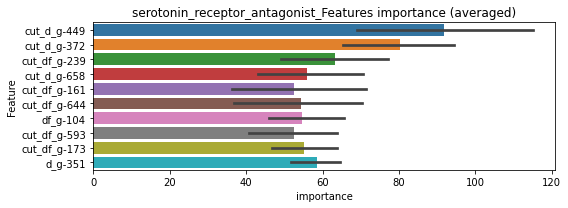

len(train_index) : 5397
len(valid_index) : 1800
================================= fold 1/4 serotonin_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5398
len(valid_index) : 1799
================================= fold 2/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[215]	training's binary_logloss: 0.00286826	valid_1's binary_logloss: 0.0436299
Training until validation scores don't improve for 30 rounds


len(train_index) : 5398
len(valid_index) : 1799
================================= fold 3/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[145]	training's binary_logloss: 0.00573393	valid_1's binary_logloss: 0.0477499
Training until validation scores don't improve for 30 rounds


len(train_index) : 5398
len(valid_index) : 1799
================================= fold 4/4 serotonin_receptor_antagonist=================================


Early stopping, best iteration is:
[201]	training's binary_logloss: 0.00298627	valid_1's binary_logloss: 0.0544835
Training until validation scores don't improve for 30 rounds


serotonin_receptor_antagonist logloss: 0.04666399634902006
serotonin_receptor_antagonist is unpredictable(><)!


Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00235167	valid_1's binary_logloss: 0.0407944


serotonin_reuptake_inhibitor, len(trt): 44, len(othr): 3285
target_rate: 0.0018477 → Adj_target_rate: 0.0020948


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.00058642	valid_1's binary_logloss: 0.0306126
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.00051603	valid_1's binary_logloss: 0.029139
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[510]	training's binary_logloss: 0.000517202	valid_1's binary_logloss: 0.0106234
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000444192	valid_1's binary_logloss: 0.020295


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0025846, Threshold: 0.0395770, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00185
Num_p_label: 40.0, Expected: 7.4, Threshold: 0.0395770, conf_0:0.02770, conf_1:0.05145
Num_p_label: 30.0, Expected: 7.4, Adj_threshold_1: 0.0695770
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_2: 0.0995770
threshold: 0.0995770, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000605087	valid_1's binary_logloss: 0.0292955
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000592732	valid_1's binary_logloss: 0.0276231
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000451957	valid_1's binary_logloss: 0.00996326
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000488029	valid_1's binary_logloss: 0.0183033


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0183456, Threshold: 0.0995770, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0120542 Vs.target_rate: 0.00185
Num_p_label: 48.0, Expected: 7.4, Threshold: 0.0995770, conf_0:0.07966, conf_1:0.11949
Num_p_label: 45.0, Expected: 7.4, Adj_threshold_1: 0.1295770
Num_p_label: 42.0, Expected: 7.4, Adj_threshold_2: 0.1595770
Num_p_label: 42.0, Expected: 7.4, Adj_threshold_3: 0.1895770
Num_p_label: 38.0, Expected: 7.4, Adj_threshold_4: 0.2195770
Num_p_label: 34.0, Expected: 7.4, Adj_threshold_5: 0.2495770
Num_p_label: 31.0, Expected: 7.4, Adj_threshold_6: 0.2795770
Num_p_label: 26.0, Expected: 7.4, Adj_threshold_7: 0.3095770
Num_p_label: 25.0, Expected: 7.4, Adj_threshold_8: 0.3395770
Num_p_label: 19.0, Expected: 7.4, Adj_threshold_9: 0.3695770
Num_p_label: 18.0, Expected: 7.4, Adj_threshold_10: 0.3995770
threshold: 0.3995770, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_la

Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000578284	valid_1's binary_logloss: 0.0364536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000516501	valid_1's binary_logloss: 0.0161219
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[462]	training's binary_logloss: 0.000598536	valid_1's binary_logloss: 0.0063483
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0155718, Threshold: 0.3995770, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 653.0/3802
p_label_rate: 0.0040181 Vs.target_rate: 0.00185
Num_p_label: 16.0, Expected: 7.4, Threshold: 0.3995770, conf_0:0.35962, conf_1:0.43953
threshold: 0.3995770, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00228346	valid_1's binary_logloss: 0.0366829


positive_y_label: 653.0/3802, y_label_rate: 0.1717517


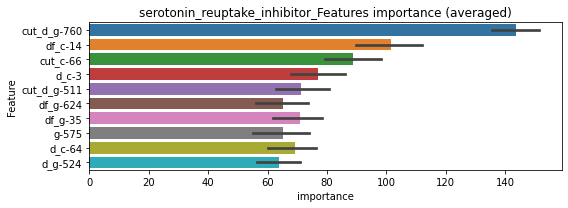

len(train_index) : 2851
len(valid_index) : 951
================================= fold 1/4 serotonin_reuptake_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2851
len(valid_index) : 951
================================= fold 2/4 serotonin_reuptake_inhibitor=================================


Early stopping, best iteration is:
[369]	training's binary_logloss: 0.000722943	valid_1's binary_logloss: 0.0255742
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 3/4 serotonin_reuptake_inhibitor=================================


Early stopping, best iteration is:
[344]	training's binary_logloss: 0.000797438	valid_1's binary_logloss: 0.0232672
Training until validation scores don't improve for 30 rounds


len(train_index) : 2852
len(valid_index) : 950
================================= fold 4/4 serotonin_reuptake_inhibitor=================================


Early stopping, best iteration is:
[365]	training's binary_logloss: 0.000736318	valid_1's binary_logloss: 0.0187571
Training until validation scores don't improve for 30 rounds


serotonin_reuptake_inhibitor logloss: 0.01876156443248669


Early stopping, best iteration is:
[457]	training's binary_logloss: 0.000611597	valid_1's binary_logloss: 0.00743588


sigma_receptor_agonist, len(trt): 36, len(othr): 3285
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000567811	valid_1's binary_logloss: 0.0167536
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00173004	valid_1's binary_logloss: 0.0355691
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.000436358	valid_1's binary_logloss: 0.00780876
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[528]	training's binary_logloss: 0.00039336	valid_1's binary_logloss: 0.0126966


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0027390, Threshold: 0.0184457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0184457, conf_0:0.01291, conf_1:0.02398
Num_p_label: 10.0, Expected: 6.0, Adj_threshold_1: 0.0484457
threshold: 0.0484457, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.000564906	valid_1's binary_logloss: 0.0164012
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.000631088	valid_1's binary_logloss: 0.0328215
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000420068	valid_1's binary_logloss: 0.0083297
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000


Early stopping, best iteration is:
[505]	training's binary_logloss: 0.000409669	valid_1's binary_logloss: 0.0102494


y_Threshold: 0.0143486, Threshold: 0.0484457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0143144 Vs.target_rate: 0.00151
Num_p_label: 57.0, Expected: 6.0, Threshold: 0.0484457, conf_0:0.03876, conf_1:0.05813
Num_p_label: 37.0, Expected: 6.0, Adj_threshold_1: 0.0784457
Num_p_label: 29.0, Expected: 6.0, Adj_threshold_2: 0.1084457
Num_p_label: 22.0, Expected: 6.0, Adj_threshold_3: 0.1384457
Num_p_label: 18.0, Expected: 6.0, Adj_threshold_4: 0.1684457
Num_p_label: 15.0, Expected: 6.0, Adj_threshold_5: 0.1984457
threshold: 0.1984457, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[409]	training's binary_logloss: 0.000519725	valid_1's binary_logloss: 0.0208013
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000456454	valid_1's binary_logloss: 0.00772854
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000524801	valid_1's binary_logloss: 0.0109784
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0157154, Threshold: 0.1984457, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0052737 Vs.target_rate: 0.00151


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.00046437	valid_1's binary_logloss: 0.0254684


Num_p_label: 21.0, Expected: 6.0, Threshold: 0.1984457, conf_0:0.17860, conf_1:0.21829
Num_p_label: 17.0, Expected: 6.0, Adj_threshold_1: 0.2284457
Num_p_label: 13.0, Expected: 6.0, Adj_threshold_2: 0.2584457
threshold: 0.2584457, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


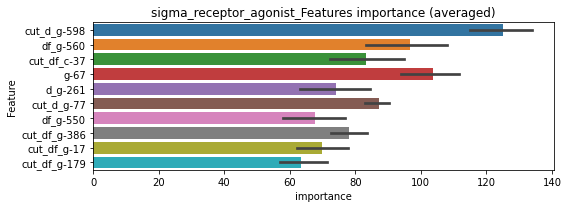

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[356]	training's binary_logloss: 0.000638351	valid_1's binary_logloss: 0.0239165
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[760]	training's binary_logloss: 0.000387034	valid_1's binary_logloss: 0.00438669


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sigma_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sigma_receptor_agonist=================================


Early stopping, best iteration is:
[336]	training's binary_logloss: 0.000702036	valid_1's binary_logloss: 0.00993166
Training until validation scores don't improve for 30 rounds


sigma_receptor_agonist logloss: 0.015414974921367333


Early stopping, best iteration is:
[170]	training's binary_logloss: 0.00163547	valid_1's binary_logloss: 0.0234221


sigma_receptor_antagonist, len(trt): 36, len(othr): 3279
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3279


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[422]	training's binary_logloss: 0.000589281	valid_1's binary_logloss: 0.0246939
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000556261	valid_1's binary_logloss: 0.0185248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000475034	valid_1's binary_logloss: 0.0192226
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0021082, Threshold: 0.0048502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 655/3802
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0048502, conf_0:0.00340, conf_1:0.00631
Num_p_label: 0.0, Expected: 6.0, Adj_threshold_1: 0.0348502


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000626576	valid_1's binary_logloss: 0.0169284


threshold: 0.0348502, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 655.0/3802, y_label_rate: 0.1722777
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.000469422	valid_1's binary_logloss: 0.0252703
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000504926	valid_1's binary_logloss: 0.0168358
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000537926	valid_1's binary_logloss: 0.0187088
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0120077, Threshold: 0.0348502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 653.0/3798
p_label_rate: 0.0027624 Vs.target_rate: 0.00151
Num_p_label: 11.0, Expected: 6.0, Threshold: 0.0348502, conf_0:0.02788, conf_1:0.04182
threshold: 0.0348502, positive_p_label: 11.0/3982, p_label_rate: 0.0027624


Early stopping, best iteration is:
[410]	training's binary_logloss: 0.000606772	valid_1's binary_logloss: 0.0174163


positive_y_label: 653.0/3798, y_label_rate: 0.1719326
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000465895	valid_1's binary_logloss: 0.0242058
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000552679	valid_1's binary_logloss: 0.0263164
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[527]	training's binary_logloss: 0.000403773	valid_1's binary_logloss: 0.0152072
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000404471	valid_1's binary_logloss: 0.00293819


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0091288, Threshold: 0.0348502, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 652.0/3796
p_label_rate: 0.0030136 Vs.target_rate: 0.00151
Num_p_label: 12.0, Expected: 6.0, Threshold: 0.0348502, conf_0:0.03137, conf_1:0.03834
threshold: 0.0348502, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 652.0/3796, y_label_rate: 0.1717597


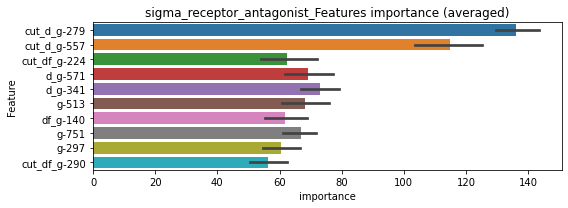

len(train_index) : 2847
len(valid_index) : 949
================================= fold 1/4 sigma_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 2/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00116756	valid_1's binary_logloss: 0.0168433
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 3/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[363]	training's binary_logloss: 0.000679467	valid_1's binary_logloss: 0.020114
Training until validation scores don't improve for 30 rounds


len(train_index) : 2847
len(valid_index) : 949
================================= fold 4/4 sigma_receptor_antagonist=================================


Early stopping, best iteration is:
[370]	training's binary_logloss: 0.000686663	valid_1's binary_logloss: 0.00634563
Training until validation scores don't improve for 30 rounds


sigma_receptor_antagonist logloss: 0.015339621546881111


Early stopping, best iteration is:
[337]	training's binary_logloss: 0.000725955	valid_1's binary_logloss: 0.0180555


smoothened_receptor_antagonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000371409	valid_1's binary_logloss: 0.0100206
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[402]	training's binary_logloss: 0.000402142	valid_1's binary_logloss: 0.0304041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000308087	valid_1's binary_logloss: 0.00111756
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000369889	valid_1's binary_logloss: 0.0119686


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012331, Threshold: 0.0025782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0025782, conf_0:0.00180, conf_1:0.00335
Num_p_label: 0.0, Expected: 4.2, Adj_threshold_1: 0.0325782
threshold: 0.0325782, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.0003319	valid_1's binary_logloss: 0.00849319
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[339]	training's binary_logloss: 0.000583357	valid_1's binary_logloss: 0.0266521
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000304	valid_1's binary_logloss: 0.000677973
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0078320, Threshold: 0.0325782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0325782, conf_0:0.02606, conf_1:0.03909
threshold: 0.0325782, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000520531	valid_1's binary_logloss: 0.0116092


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[348]	training's binary_logloss: 0.000551557	valid_1's binary_logloss: 0.0241485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[463]	training's binary_logloss: 0.000331962	valid_1's binary_logloss: 0.0151859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[543]	training's binary_logloss: 0.000303698	valid_1's binary_logloss: 0.00310785
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[443]	training's binary_logloss: 0.000352106	valid_1's binary_logloss: 0.00826408


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069468, Threshold: 0.0325782, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00105
Num_p_label: 0.0, Expected: 4.2, Threshold: 0.0325782, conf_0:0.02932, conf_1:0.03584
threshold: 0.0325782, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 656.0/3808, y_label_rate: 0.1722689


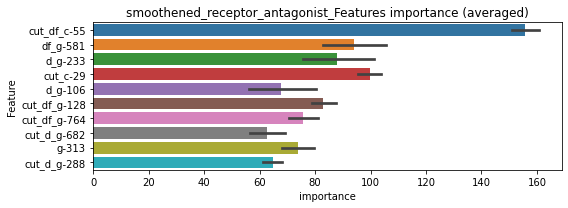

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 smoothened_receptor_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[171]	training's binary_logloss: 0.0012556	valid_1's binary_logloss: 0.0204995
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000347114	valid_1's binary_logloss: 0.0103885
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 smoothened_receptor_antagonist=================================


Early stopping, best iteration is:
[550]	training's binary_logloss: 0.000367845	valid_1's binary_logloss: 0.00299843
Training until validation scores don't improve for 30 rounds


smoothened_receptor_antagonist logloss: 0.010021329507573432


Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000353048	valid_1's binary_logloss: 0.00619884
mutually exclusive columns: sodium_channel_inhibitor


sodium_channel_inhibitor, len(trt): 267, len(othr): 6860
target_rate: 0.0112119 → Adj_target_rate: 0.0096991


selected negative label: 6860


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[274]	training's binary_logloss: 0.0203136	valid_1's binary_logloss: 0.117263
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[242]	training's binary_logloss: 0.0251155	valid_1's binary_logloss: 0.137738
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[302]	training's binary_logloss: 0.0165025	valid_1's binary_logloss: 0.112936
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.972, PR-AUC:0.947
y_Threshold: 0.0324383, Threshold: 0.0447542, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.0163777	valid_1's binary_logloss: 0.122261


Remove_noisy_data: 521 → Positive_corect_labels: 1249/7711
p_label_rate: 0.0100452 Vs.target_rate: 0.01121
Num_p_label: 40.0, Expected: 44.6, Threshold: 0.0447542, conf_0:0.03133, conf_1:0.05818
threshold: 0.0447542, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1249.0/7711, y_label_rate: 0.1619764
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.0100488	valid_1's binary_logloss: 0.0764053
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00706458	valid_1's binary_logloss: 0.0631338
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.0114069	valid_1's binary_logloss: 0.0798756
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.994, PR-AUC:0.984
y_Threshold: 0.0321385, Threshold: 0.0447542, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[303]	training's binary_logloss: 0.0080675	valid_1's binary_logloss: 0.0669923


Remove_noisy_data: 132 → Positive_corect_labels: 1183.0/7579
p_label_rate: 0.0075339 Vs.target_rate: 0.01121
Num_p_label: 30.0, Expected: 44.6, Threshold: 0.0447542, conf_0:0.03580, conf_1:0.05371
threshold: 0.0447542, positive_p_label: 30.0/3982, p_label_rate: 0.0075339
positive_y_label: 1183.0/7579, y_label_rate: 0.1560892
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[317]	training's binary_logloss: 0.0040636	valid_1's binary_logloss: 0.0429606
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00514417	valid_1's binary_logloss: 0.0420293
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.00284009	valid_1's binary_logloss: 0.0389726
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00248612	valid_1's binary_logloss: 0.0379004


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0222357, Threshold: 0.0447542, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 1158.0/7529
p_label_rate: 0.0012557 Vs.target_rate: 0.01121
Num_p_label: 5.0, Expected: 44.6, Threshold: 0.0447542, conf_0:0.04028, conf_1:0.04923
threshold: 0.0447542, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1158.0/7529, y_label_rate: 0.1538053


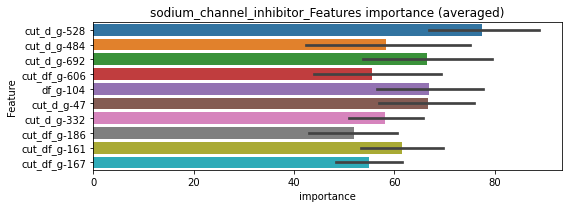

len(train_index) : 5646
len(valid_index) : 1883
================================= fold 1/4 sodium_channel_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5647
len(valid_index) : 1882
================================= fold 2/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[261]	training's binary_logloss: 0.00135463	valid_1's binary_logloss: 0.022332
Training until validation scores don't improve for 30 rounds


len(train_index) : 5647
len(valid_index) : 1882
================================= fold 3/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[131]	training's binary_logloss: 0.00432579	valid_1's binary_logloss: 0.0344251
Training until validation scores don't improve for 30 rounds


len(train_index) : 5647
len(valid_index) : 1882
================================= fold 4/4 sodium_channel_inhibitor=================================


Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00120576	valid_1's binary_logloss: 0.0168758
Training until validation scores don't improve for 30 rounds


sodium_channel_inhibitor logloss: 0.028566563265572227


Early stopping, best iteration is:
[110]	training's binary_logloss: 0.00618879	valid_1's binary_logloss: 0.0406367


sphingosine_receptor_agonist, len(trt): 32, len(othr): 3285
target_rate: 0.0013437 → Adj_target_rate: 0.0015980


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000368473	valid_1's binary_logloss: 0.0103804
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000431834	valid_1's binary_logloss: 0.0361775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000495887	valid_1's binary_logloss: 0.00807386
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016061, Threshold: 0.0030123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00134
Num_p_label: 40.0, Expected: 5.4, Threshold: 0.0030123, conf_0:0.00211, conf_1:0.00392
Num_p_label: 1.0, Expected: 5.4, Adj_threshold_1: 0.0330123


Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000455251	valid_1's binary_logloss: 0.0103596


threshold: 0.0330123, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[529]	training's binary_logloss: 0.000364047	valid_1's binary_logloss: 0.00923273
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[280]	training's binary_logloss: 0.00134422	valid_1's binary_logloss: 0.0364827
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000482323	valid_1's binary_logloss: 0.00709759
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0121682, Threshold: 0.0330123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0002511 Vs.target_rate: 0.00134
Num_p_label: 1.0, Expected: 5.4, Threshold: 0.0330123, conf_0:0.02641, conf_1:0.03961


Early stopping, best iteration is:
[510]	training's binary_logloss: 0.00037402	valid_1's binary_logloss: 0.0100545


threshold: 0.0330123, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[367]	training's binary_logloss: 0.000621618	valid_1's binary_logloss: 0.0317897
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000472064	valid_1's binary_logloss: 0.00693205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000398976	valid_1's binary_logloss: 0.00758283
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000458364	valid_1's binary_logloss: 0.0178547


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0068592, Threshold: 0.0330123, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0002511 Vs.target_rate: 0.00134
Num_p_label: 1.0, Expected: 5.4, Threshold: 0.0330123, conf_0:0.02971, conf_1:0.03631
threshold: 0.0330123, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 654.0/3804, y_label_rate: 0.1719243


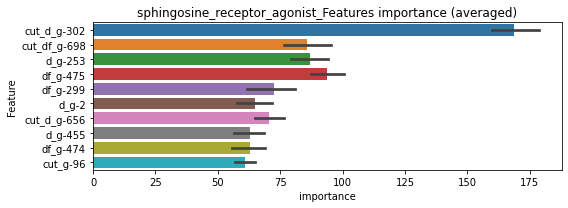

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 sphingosine_receptor_agonist=================================


Early stopping, best iteration is:
[277]	training's binary_logloss: 0.000800251	valid_1's binary_logloss: 0.0238674
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[642]	training's binary_logloss: 0.000378756	valid_1's binary_logloss: 0.00450959


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 sphingosine_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 sphingosine_receptor_agonist=================================


Early stopping, best iteration is:
[452]	training's binary_logloss: 0.000493942	valid_1's binary_logloss: 0.0114223
Training until validation scores don't improve for 30 rounds


sphingosine_receptor_agonist logloss: 0.013800914919834666


Early stopping, best iteration is:
[361]	training's binary_logloss: 0.000606138	valid_1's binary_logloss: 0.0154044


src_inhibitor, len(trt): 71, len(othr): 3283
target_rate: 0.0029814 → Adj_target_rate: 0.0031461


selected negative label: 3283


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[246]	training's binary_logloss: 0.00507603	valid_1's binary_logloss: 0.0838381
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[391]	training's binary_logloss: 0.0014591	valid_1's binary_logloss: 0.0533956
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[512]	training's binary_logloss: 0.000906937	valid_1's binary_logloss: 0.00968568
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0086184, Threshold: 0.0320430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3793
p_label_rate: 0.0100452 Vs.target_rate: 0.00298
Num_p_label: 40.0, Expected: 11.9, Threshold: 0.0320430, conf_0:0.02243, conf_1:0.04166
Num_p_label: 14.0, Expected: 11.9, Adj_threshold_1: 0.0620430


Early stopping, best iteration is:
[345]	training's binary_logloss: 0.00213725	valid_1's binary_logloss: 0.0565343


threshold: 0.0620430, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 649.0/3793, y_label_rate: 0.1711047
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00391512	valid_1's binary_logloss: 0.054988
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[350]	training's binary_logloss: 0.00179881	valid_1's binary_logloss: 0.0403658
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[416]	training's binary_logloss: 0.00120702	valid_1's binary_logloss: 0.0456177
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[499]	training's binary_logloss: 0.000798327	valid_1's binary_logloss: 0.0320007


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0208157, Threshold: 0.0620430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 20 → Positive_corect_labels: 639.0/3773
p_label_rate: 0.0118031 Vs.target_rate: 0.00298
Num_p_label: 47.0, Expected: 11.9, Threshold: 0.0620430, conf_0:0.04963, conf_1:0.07445
Num_p_label: 29.0, Expected: 11.9, Adj_threshold_1: 0.0920430
Num_p_label: 19.0, Expected: 11.9, Adj_threshold_2: 0.1220430
Num_p_label: 15.0, Expected: 11.9, Adj_threshold_3: 0.1520430
threshold: 0.1520430, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 639.0/3773, y_label_rate: 0.1693613
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[492]	training's binary_logloss: 0.000766649	valid_1's binary_logloss: 0.0367454
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000766853	valid_1's binary_logloss: 0.0338442
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[627]	training's binary_logloss: 0.000540734	valid_1's binary_logloss: 0.0156369
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156907, Threshold: 0.1520430, pos_neg_ratio: 0.8000000
Remove_noisy_data: 10 → Positive_corect_labels: 634.0/3763
p_label_rate: 0.0042692 Vs.target_rate: 0.00298
Num_p_label: 17.0, Expected: 11.9, Threshold: 0.1520430, conf_0:0.13684, conf_1:0.16725


Early stopping, best iteration is:
[377]	training's binary_logloss: 0.00124516	valid_1's binary_logloss: 0.0484568


threshold: 0.1520430, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 634.0/3763, y_label_rate: 0.1684826


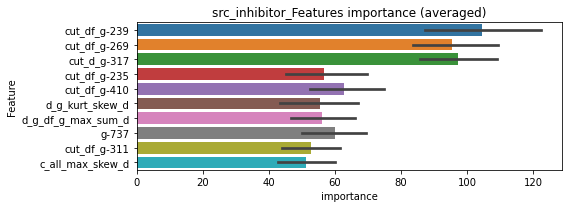

len(train_index) : 2822
len(valid_index) : 941
================================= fold 1/4 src_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 941
================================= fold 2/4 src_inhibitor=================================


Early stopping, best iteration is:
[288]	training's binary_logloss: 0.00135335	valid_1's binary_logloss: 0.0342553
Training until validation scores don't improve for 30 rounds


len(train_index) : 2822
len(valid_index) : 941
================================= fold 3/4 src_inhibitor=================================


Early stopping, best iteration is:
[367]	training's binary_logloss: 0.00103304	valid_1's binary_logloss: 0.0240805
Training until validation scores don't improve for 30 rounds


len(train_index) : 2823
len(valid_index) : 940
================================= fold 4/4 src_inhibitor=================================


Early stopping, best iteration is:
[291]	training's binary_logloss: 0.00130831	valid_1's binary_logloss: 0.038689
Training until validation scores don't improve for 30 rounds


src_inhibitor logloss: 0.03216909130253001
src_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00115386	valid_1's binary_logloss: 0.031651


steroid, len(trt): 79, len(othr): 3282
target_rate: 0.0033174 → Adj_target_rate: 0.0034449


selected negative label: 3282


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[292]	training's binary_logloss: 0.00409631	valid_1's binary_logloss: 0.0715695
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00167303	valid_1's binary_logloss: 0.0554524
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.00107124	valid_1's binary_logloss: 0.032979
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.998, PR-AUC:0.993
y_Threshold: 0.0113429, Threshold: 0.2275132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 649/3792
p_label_rate: 0.0100452 Vs.target_rate: 0.00332
Num_p_label: 40.0, Expected: 13.2, Threshold: 0.2275132, conf_0:0.15926, conf_1:0.29577
Num_p_label: 34.0, Expected: 13.2, Adj_threshold_1: 0.2575132
Num_p_label: 26.0, Expected: 13.2, Adj_threshold_2: 0.2875132
Num_p_label: 23.0, Expected: 13.2, Adj_threshold_3: 0.3175132
Num_p_label: 16.0, Expected: 13.2, Adj_threshold_4: 0.3475132
threshold: 0.3475132, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00590528	valid_1's binary_logloss: 0.0759097


positive_y_label: 649.0/3792, y_label_rate: 0.1711498
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.00159544	valid_1's binary_logloss: 0.0595925
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[406]	training's binary_logloss: 0.00152973	valid_1's binary_logloss: 0.0482826
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[396]	training's binary_logloss: 0.00171022	valid_1's binary_logloss: 0.0550438
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.998
y_Threshold: 0.0218048, Threshold: 0.3475132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 28 → Positive_corect_labels: 635.0/3764


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.00151955	valid_1's binary_logloss: 0.0428744


p_label_rate: 0.0150678 Vs.target_rate: 0.00332
Num_p_label: 60.0, Expected: 13.2, Threshold: 0.3475132, conf_0:0.27801, conf_1:0.41702
Num_p_label: 55.0, Expected: 13.2, Adj_threshold_1: 0.3775132
Num_p_label: 52.0, Expected: 13.2, Adj_threshold_2: 0.4075132
Num_p_label: 50.0, Expected: 13.2, Adj_threshold_3: 0.4375132
Num_p_label: 42.0, Expected: 13.2, Adj_threshold_4: 0.4675132
Num_p_label: 37.0, Expected: 13.2, Adj_threshold_5: 0.4975132
Num_p_label: 33.0, Expected: 13.2, Adj_threshold_6: 0.5275132
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_7: 0.5575132
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_8: 0.5875132
Num_p_label: 17.0, Expected: 13.2, Adj_threshold_9: 0.6175132
threshold: 0.6175132, positive_p_label: 17.0/3982, p_label_rate: 0.0042692
positive_y_label: 635.0/3764, y_label_rate: 0.1687035
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[498]	training's binary_logloss: 0.000864184	valid_1's binary_logloss: 0.0351896
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00182818	valid_1's binary_logloss: 0.0484864
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[412]	training's binary_logloss: 0.0012889	valid_1's binary_logloss: 0.0391004
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0254086, Threshold: 0.6175132, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 626.0/3746
p_label_rate: 0.0097941 Vs.target_rate: 0.00332
Num_p_label: 39.0, Expected: 13.2, Threshold: 0.6175132, conf_0:0.55576, conf_1:0.67926
Num_p_label: 35.0, Expected: 13.2, Adj_threshold_1: 0.6475132
Num_p_label: 28.0, Expected: 13.2, Adj_threshold_2: 0.6775132
Num_p_label: 25.0, Expected: 13.2, Adj_threshold_3: 0.7075132
Num_p_label: 21.0, Expected: 13.2, Adj_threshold_4: 0.7375132


Early stopping, best iteration is:
[372]	training's binary_logloss: 0.0016793	valid_1's binary_logloss: 0.0433782


Num_p_label: 14.0, Expected: 13.2, Adj_threshold_5: 0.7675132
threshold: 0.7675132, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 626.0/3746, y_label_rate: 0.1671116


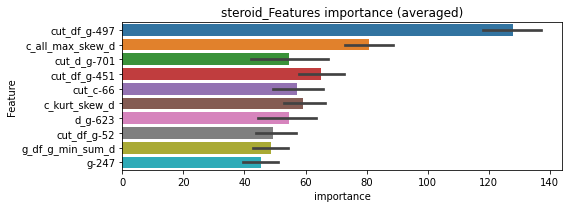

len(train_index) : 2809
len(valid_index) : 937
================================= fold 1/4 steroid=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2809
len(valid_index) : 937
================================= fold 2/4 steroid=================================


Early stopping, best iteration is:
[281]	training's binary_logloss: 0.00147881	valid_1's binary_logloss: 0.0430888
Training until validation scores don't improve for 30 rounds


len(train_index) : 2810
len(valid_index) : 936
================================= fold 3/4 steroid=================================


Early stopping, best iteration is:
[197]	training's binary_logloss: 0.00248845	valid_1's binary_logloss: 0.0387055
Training until validation scores don't improve for 30 rounds


len(train_index) : 2810
len(valid_index) : 936
================================= fold 4/4 steroid=================================


Early stopping, best iteration is:
[290]	training's binary_logloss: 0.0014647	valid_1's binary_logloss: 0.0273915
Training until validation scores don't improve for 30 rounds


steroid logloss: 0.035883474682126416
steroid is unpredictable(><)!


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.00129004	valid_1's binary_logloss: 0.0343374


syk_inhibitor, len(trt): 19, len(othr): 3283
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3283


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[261]	training's binary_logloss: 0.000925673	valid_1's binary_logloss: 0.0240411
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000280086	valid_1's binary_logloss: 0.00408112
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000281182	valid_1's binary_logloss: 0.00118917
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014646, Threshold: 0.0032469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0032469, conf_0:0.00227, conf_1:0.00422
Num_p_label: 1.0, Expected: 3.2, Adj_threshold_1: 0.0332469


Early stopping, best iteration is:
[429]	training's binary_logloss: 0.000312786	valid_1's binary_logloss: 0.00776505


threshold: 0.0332469, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[229]	training's binary_logloss: 0.00143584	valid_1's binary_logloss: 0.0230745
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000275717	valid_1's binary_logloss: 0.00285236
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00028116	valid_1's binary_logloss: 0.000620278
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0089683, Threshold: 0.0332469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0012557 Vs.target_rate: 0.00080
Num_p_label: 5.0, Expected: 3.2, Threshold: 0.0332469, conf_0:0.02660, conf_1:0.03990


Early stopping, best iteration is:
[391]	training's binary_logloss: 0.000361631	valid_1's binary_logloss: 0.00777784


threshold: 0.0332469, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3805, y_label_rate: 0.1721419
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.000357926	valid_1's binary_logloss: 0.0161292
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[400]	training's binary_logloss: 0.000344675	valid_1's binary_logloss: 0.0054161
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000277462	valid_1's binary_logloss: 0.00184895
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0116174, Threshold: 0.0332469, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3805
p_label_rate: 0.0010045 Vs.target_rate: 0.00080
Num_p_label: 4.0, Expected: 3.2, Threshold: 0.0332469, conf_0:0.02992, conf_1:0.03657


Early stopping, best iteration is:
[390]	training's binary_logloss: 0.000362573	valid_1's binary_logloss: 0.00664076


threshold: 0.0332469, positive_p_label: 4.0/3982, p_label_rate: 0.0010045
positive_y_label: 655.0/3805, y_label_rate: 0.1721419


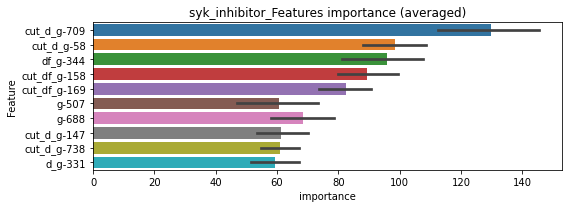

len(train_index) : 2853
len(valid_index) : 952
================================= fold 1/4 syk_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 2/4 syk_inhibitor=================================


Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00041436	valid_1's binary_logloss: 0.0133832
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 3/4 syk_inhibitor=================================


Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000317635	valid_1's binary_logloss: 0.00437738
Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 951
================================= fold 4/4 syk_inhibitor=================================


Early stopping, best iteration is:
[673]	training's binary_logloss: 0.000296194	valid_1's binary_logloss: 0.00155614
Training until validation scores don't improve for 30 rounds


syk_inhibitor logloss: 0.006378552169681731


Early stopping, best iteration is:
[328]	training's binary_logloss: 0.000483774	valid_1's binary_logloss: 0.00619011


tachykinin_antagonist, len(trt): 60, len(othr): 3281
target_rate: 0.0025195 → Adj_target_rate: 0.0027266


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[264]	training's binary_logloss: 0.0032729	valid_1's binary_logloss: 0.068178
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000581302	valid_1's binary_logloss: 0.0344256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000600921	valid_1's binary_logloss: 0.0116105
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000711636	valid_1's binary_logloss: 0.0337952


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0053926, Threshold: 0.0096737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3801
p_label_rate: 0.0100452 Vs.target_rate: 0.00252
Num_p_label: 40.0, Expected: 10.0, Threshold: 0.0096737, conf_0:0.00677, conf_1:0.01258
Num_p_label: 0.0, Expected: 10.0, Adj_threshold_1: 0.0396737
threshold: 0.0396737, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 654.0/3801, y_label_rate: 0.1720600
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[344]	training's binary_logloss: 0.00146873	valid_1's binary_logloss: 0.0438989
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.0010284	valid_1's binary_logloss: 0.0344205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[526]	training's binary_logloss: 0.000609628	valid_1's binary_logloss: 0.0248557
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0166535, Threshold: 0.0396737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 12 → Positive_corect_labels: 648.0/3789
p_label_rate: 0.0005023 Vs.target_rate: 0.00252
Num_p_label: 2.0, Expected: 10.0, Threshold: 0.0396737, conf_0:0.03174, conf_1:0.04761


Early stopping, best iteration is:
[379]	training's binary_logloss: 0.0012023	valid_1's binary_logloss: 0.0368478


threshold: 0.0396737, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 648.0/3789, y_label_rate: 0.1710214
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00186469	valid_1's binary_logloss: 0.0363523
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[359]	training's binary_logloss: 0.0013501	valid_1's binary_logloss: 0.0375256
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[556]	training's binary_logloss: 0.000552261	valid_1's binary_logloss: 0.019075
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0242463, Threshold: 0.0396737, pos_neg_ratio: 0.8000000
Remove_noisy_data: 6 → Positive_corect_labels: 645.0/3783
p_label_rate: 0.0010045 Vs.target_rate: 0.00252
Num_p_label: 4.0, Expected: 10.0, Threshold: 0.0396737, conf_0:0.03571, conf_1:0.04364
threshold: 0.0396737, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[327]	training's binary_logloss: 0.00161191	valid_1's binary_logloss: 0.0337735


positive_y_label: 645.0/3783, y_label_rate: 0.1704996


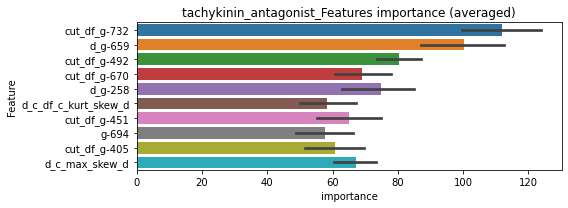

len(train_index) : 2837
len(valid_index) : 946
================================= fold 1/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[265]	training's binary_logloss: 0.00131625	valid_1's binary_logloss: 0.0322964


len(train_index) : 2837
len(valid_index) : 946
================================= fold 2/4 tachykinin_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2837
len(valid_index) : 946
================================= fold 3/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[258]	training's binary_logloss: 0.00137791	valid_1's binary_logloss: 0.0308797
Training until validation scores don't improve for 30 rounds


len(train_index) : 2838
len(valid_index) : 945
================================= fold 4/4 tachykinin_antagonist=================================


Early stopping, best iteration is:
[458]	training's binary_logloss: 0.000733592	valid_1's binary_logloss: 0.0162841
Training until validation scores don't improve for 30 rounds


tachykinin_antagonist logloss: 0.027429344779054805


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.00114024	valid_1's binary_logloss: 0.0302602


tgf-beta_receptor_inhibitor, len(trt): 30, len(othr): 3286
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3286


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[470]	training's binary_logloss: 0.0004393	valid_1's binary_logloss: 0.0133829
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000449555	valid_1's binary_logloss: 0.0269013
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[534]	training's binary_logloss: 0.00037852	valid_1's binary_logloss: 0.00242997
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016303, Threshold: 0.0052165, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0052165, conf_0:0.00365, conf_1:0.00678
Num_p_label: 0.0, Expected: 5.0, Adj_threshold_1: 0.0352165


Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000537629	valid_1's binary_logloss: 0.0190151


threshold: 0.0352165, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.000486468	valid_1's binary_logloss: 0.0139182
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[434]	training's binary_logloss: 0.00045661	valid_1's binary_logloss: 0.0270645
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[539]	training's binary_logloss: 0.000379993	valid_1's binary_logloss: 0.00198025
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[464]	training's binary_logloss: 0.000427742	valid_1's binary_logloss: 0.0173415


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0079298, Threshold: 0.0352165, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0012557 Vs.target_rate: 0.00126
Num_p_label: 5.0, Expected: 5.0, Threshold: 0.0352165, conf_0:0.02817, conf_1:0.04226
threshold: 0.0352165, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 655.0/3807, y_label_rate: 0.1720515
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.000586001	valid_1's binary_logloss: 0.0331866
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000390423	valid_1's binary_logloss: 0.00694598
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[531]	training's binary_logloss: 0.000370317	valid_1's binary_logloss: 0.00482257
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0127170, Threshold: 0.0352165, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0020090 Vs.target_rate: 0.00126
Num_p_label: 8.0, Expected: 5.0, Threshold: 0.0352165, conf_0:0.03169, conf_1:0.03874
threshold: 0.0352165, positive_p_label: 8.0/3982, p_label_rate: 0.0020090


Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000383763	valid_1's binary_logloss: 0.0162606


positive_y_label: 655.0/3807, y_label_rate: 0.1720515


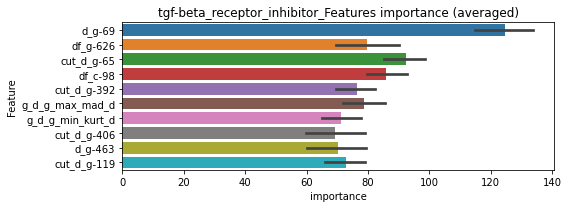

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 tgf-beta_receptor_inhibitor=================================


Early stopping, best iteration is:
[243]	training's binary_logloss: 0.000968126	valid_1's binary_logloss: 0.0242383
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 tgf-beta_receptor_inhibitor=================================


Early stopping, best iteration is:
[450]	training's binary_logloss: 0.000525975	valid_1's binary_logloss: 0.00638914
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951


Early stopping, best iteration is:
[620]	training's binary_logloss: 0.000402967	valid_1's binary_logloss: 0.00649275


================================= fold 4/4 tgf-beta_receptor_inhibitor=================================


Training until validation scores don't improve for 30 rounds


tgf-beta_receptor_inhibitor logloss: 0.01306188261834874


Early stopping, best iteration is:
[547]	training's binary_logloss: 0.000428601	valid_1's binary_logloss: 0.0151295


thrombin_inhibitor, len(trt): 19, len(othr): 3288
target_rate: 0.0007979 → Adj_target_rate: 0.0010260


selected negative label: 3288


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[418]	training's binary_logloss: 0.000323643	valid_1's binary_logloss: 0.0116957
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000339699	valid_1's binary_logloss: 0.015176
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000284005	valid_1's binary_logloss: 0.000398242
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0011047, Threshold: 0.0027301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00080
Num_p_label: 40.0, Expected: 3.2, Threshold: 0.0027301, conf_0:0.00191, conf_1:0.00355
Num_p_label: 0.0, Expected: 3.2, Adj_threshold_1: 0.0327301
threshold: 0.0327301, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.000306719	valid_1's binary_logloss: 0.00730068


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[358]	training's binary_logloss: 0.000431194	valid_1's binary_logloss: 0.0120131
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000319652	valid_1's binary_logloss: 0.0135287
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000284606	valid_1's binary_logloss: 0.000420063
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0062744, Threshold: 0.0327301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0005023 Vs.target_rate: 0.00080
Num_p_label: 2.0, Expected: 3.2, Threshold: 0.0327301, conf_0:0.02618, conf_1:0.03928
threshold: 0.0327301, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[425]	training's binary_logloss: 0.00031344	valid_1's binary_logloss: 0.00691215


positive_y_label: 656.0/3811, y_label_rate: 0.1721333
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[446]	training's binary_logloss: 0.000283854	valid_1's binary_logloss: 0.00834576
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[414]	training's binary_logloss: 0.000320329	valid_1's binary_logloss: 0.00841467
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[479]	training's binary_logloss: 0.000279094	valid_1's binary_logloss: 0.000715315
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0085387, Threshold: 0.0327301, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3811
p_label_rate: 0.0007534 Vs.target_rate: 0.00080
Num_p_label: 3.0, Expected: 3.2, Threshold: 0.0327301, conf_0:0.02946, conf_1:0.03600
threshold: 0.0327301, positive_p_label: 3.0/3982, p_label_rate: 0.0007534


Early stopping, best iteration is:
[349]	training's binary_logloss: 0.000440902	valid_1's binary_logloss: 0.0127307


positive_y_label: 656.0/3811, y_label_rate: 0.1721333


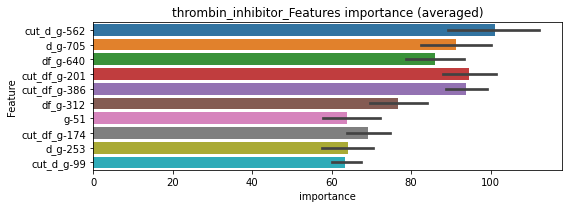

len(train_index) : 2858
len(valid_index) : 953
================================= fold 1/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[623]	training's binary_logloss: 0.000293047	valid_1's binary_logloss: 0.0075001


len(train_index) : 2858
len(valid_index) : 953
================================= fold 2/4 thrombin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 953
================================= fold 3/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000364487	valid_1's binary_logloss: 0.00699641
Training until validation scores don't improve for 30 rounds


len(train_index) : 2859
len(valid_index) : 952
================================= fold 4/4 thrombin_inhibitor=================================


Early stopping, best iteration is:
[668]	training's binary_logloss: 0.00029579	valid_1's binary_logloss: 0.0004711
Training until validation scores don't improve for 30 rounds


thrombin_inhibitor logloss: 0.006575408018075515


Early stopping, best iteration is:
[416]	training's binary_logloss: 0.000388483	valid_1's binary_logloss: 0.011339


thymidylate_synthase_inhibitor, len(trt): 37, len(othr): 3285
target_rate: 0.0015537 → Adj_target_rate: 0.0018079


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000511895	valid_1's binary_logloss: 0.0237537
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[439]	training's binary_logloss: 0.00050777	valid_1's binary_logloss: 0.038118
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000545426	valid_1's binary_logloss: 0.00945958
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[454]	training's binary_logloss: 0.000494173	valid_1's binary_logloss: 0.0214051


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0018009, Threshold: 0.0084499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00155
Num_p_label: 40.0, Expected: 6.2, Threshold: 0.0084499, conf_0:0.00591, conf_1:0.01098
Num_p_label: 8.0, Expected: 6.2, Adj_threshold_1: 0.0384499
threshold: 0.0384499, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000507047	valid_1's binary_logloss: 0.0216784
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000461498	valid_1's binary_logloss: 0.0344344
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[598]	training's binary_logloss: 0.000391781	valid_1's binary_logloss: 0.00631668
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0095350, Threshold: 0.0384499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0067805 Vs.target_rate: 0.00155
Num_p_label: 27.0, Expected: 6.2, Threshold: 0.0384499, conf_0:0.03076, conf_1:0.04614
Num_p_label: 21.0, Expected: 6.2, Adj_threshold_1: 0.0684499
Num_p_label: 16.0, Expected: 6.2, Adj_threshold_2: 0.0984499
Num_p_label: 13.0, Expected: 6.2, Adj_threshold_3: 0.1284499


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000509788	valid_1's binary_logloss: 0.0179972


threshold: 0.1284499, positive_p_label: 13.0/3982, p_label_rate: 0.0032647
positive_y_label: 655.0/3806, y_label_rate: 0.1720967
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[436]	training's binary_logloss: 0.000491365	valid_1's binary_logloss: 0.0286146
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[496]	training's binary_logloss: 0.0004305	valid_1's binary_logloss: 0.0159272
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.00042574	valid_1's binary_logloss: 0.0138594
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0100832, Threshold: 0.1284499, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 654.0/3804
p_label_rate: 0.0030136 Vs.target_rate: 0.00155
Num_p_label: 12.0, Expected: 6.2, Threshold: 0.1284499, conf_0:0.11560, conf_1:0.14129
threshold: 0.1284499, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[259]	training's binary_logloss: 0.00186433	valid_1's binary_logloss: 0.0335657


positive_y_label: 654.0/3804, y_label_rate: 0.1719243


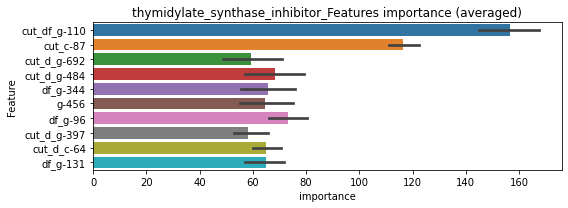

len(train_index) : 2853
len(valid_index) : 951
================================= fold 1/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[583]	training's binary_logloss: 0.000434626	valid_1's binary_logloss: 0.0187874


len(train_index) : 2853
len(valid_index) : 951
================================= fold 2/4 thymidylate_synthase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 3/4 thymidylate_synthase_inhibitor=================================


Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000492306	valid_1's binary_logloss: 0.0124753
Training until validation scores don't improve for 30 rounds


len(train_index) : 2853
len(valid_index) : 951
================================= fold 4/4 thymidylate_synthase_inhibitor=================================


Early stopping, best iteration is:
[417]	training's binary_logloss: 0.000588798	valid_1's binary_logloss: 0.0138118
Training until validation scores don't improve for 30 rounds


thymidylate_synthase_inhibitor logloss: 0.016352247677911977


Early stopping, best iteration is:
[285]	training's binary_logloss: 0.00086532	valid_1's binary_logloss: 0.0203345


tlr_agonist, len(trt): 30, len(othr): 3287
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3287


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000361919	valid_1's binary_logloss: 0.0112169
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.000455843	valid_1's binary_logloss: 0.02811
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[560]	training's binary_logloss: 0.000344927	valid_1's binary_logloss: 0.00530539
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0012953, Threshold: 0.0112327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3812
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0112327, conf_0:0.00786, conf_1:0.01460
Num_p_label: 25.0, Expected: 5.0, Adj_threshold_1: 0.0412327


Early stopping, best iteration is:
[538]	training's binary_logloss: 0.00034647	valid_1's binary_logloss: 0.0132727


Num_p_label: 20.0, Expected: 5.0, Adj_threshold_2: 0.0712327
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_3: 0.1012327
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_4: 0.1312327
threshold: 0.1312327, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 657.0/3812, y_label_rate: 0.1723505
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[561]	training's binary_logloss: 0.000331485	valid_1's binary_logloss: 0.007733
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.000644457	valid_1's binary_logloss: 0.0270654
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.000362705	valid_1's binary_logloss: 0.00470973
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0193478, Threshold: 0.1312327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3810
p_label_rate: 0.0082873 Vs.target_rate: 0.00126
Num_p_label: 33.0, Expected: 5.0, Threshold: 0.1312327, conf_0:0.10499, conf_1:0.15748
Num_p_label: 29.0, Expected: 5.0, Adj_threshold_1: 0.1612327
Num_p_label: 24.0, Expected: 5.0, Adj_threshold_2: 0.1912327
Num_p_label: 23.0, Expected: 5.0, Adj_threshold_3: 0.2212327
Num_p_label: 22.0, Expected: 5.0, Adj_threshold_4: 0.2512327
Num_p_label: 21.0, Expected: 5.0, Adj_threshold_5: 0.2812327


Early stopping, best iteration is:
[559]	training's binary_logloss: 0.000339138	valid_1's binary_logloss: 0.00921681


Num_p_label: 21.0, Expected: 5.0, Adj_threshold_6: 0.3112327
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_7: 0.3412327
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_8: 0.3712327
Num_p_label: 15.0, Expected: 5.0, Adj_threshold_9: 0.4012327
Num_p_label: 14.0, Expected: 5.0, Adj_threshold_10: 0.4312327
threshold: 0.4312327, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3810, y_label_rate: 0.1721785
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[515]	training's binary_logloss: 0.000351259	valid_1's binary_logloss: 0.0145352
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000417794	valid_1's binary_logloss: 0.0104022
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[530]	training's binary_logloss: 0.000353134	valid_1's binary_logloss: 0.00148149
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0099720, Threshold: 0.4312327, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 654.0/3806
p_label_rate: 0.0045203 Vs.target_rate: 0.00126
Num_p_label: 18.0, Expected: 5.0, Threshold: 0.4312327, conf_0:0.38811, conf_1:0.47436
Num_p_label: 17.0, Expected: 5.0, Adj_threshold_1: 0.4612327
Num_p_label: 16.0, Expected: 5.0, Adj_threshold_2: 0.4912327
Num_p_label: 12.0, Expected: 5.0, Adj_threshold_3: 0.5212327


Early stopping, best iteration is:
[415]	training's binary_logloss: 0.000469348	valid_1's binary_logloss: 0.0294241


threshold: 0.5212327, positive_p_label: 12.0/3982, p_label_rate: 0.0030136
positive_y_label: 654.0/3806, y_label_rate: 0.1718339


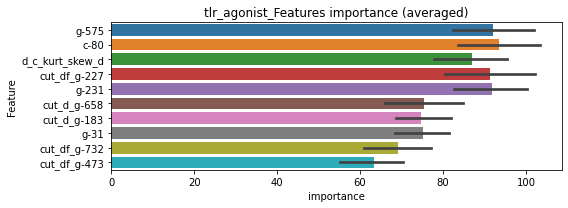

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 tlr_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 tlr_agonist=================================


Early stopping, best iteration is:
[306]	training's binary_logloss: 0.000676818	valid_1's binary_logloss: 0.0191178
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 tlr_agonist=================================


Early stopping, best iteration is:
[563]	training's binary_logloss: 0.000398997	valid_1's binary_logloss: 0.00454076
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 tlr_agonist=================================


Early stopping, best iteration is:
[575]	training's binary_logloss: 0.000391996	valid_1's binary_logloss: 0.00442164
Training until validation scores don't improve for 30 rounds


tlr_agonist logloss: 0.008543570131347378


Early stopping, best iteration is:
[544]	training's binary_logloss: 0.000401394	valid_1's binary_logloss: 0.00608722


tlr_antagonist, len(trt): 7, len(othr): 3288
target_rate: 0.0002939 → Adj_target_rate: 0.0004391


selected negative label: 3288


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000164971	valid_1's binary_logloss: 0.00126481
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000178067	valid_1's binary_logloss: 0.00618936
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000163994	valid_1's binary_logloss: 0.000196226
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0004901, Threshold: 0.0011115, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3813


Early stopping, best iteration is:
[521]	training's binary_logloss: 0.000157867	valid_1's binary_logloss: 0.000464855


p_label_rate: 0.0100452 Vs.target_rate: 0.00029
Num_p_label: 40.0, Expected: 1.2, Threshold: 0.0011115, conf_0:0.00078, conf_1:0.00144
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_1: 0.0311115
threshold: 0.0311115, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000157096	valid_1's binary_logloss: 0.000663539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000162671	valid_1's binary_logloss: 0.00497074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000159104	valid_1's binary_logloss: 0.000154689
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156502, Threshold: 0.0311115, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0017579 Vs.target_rate: 0.00029
Num_p_label: 7.0, Expected: 1.2, Threshold: 0.0311115, conf_0:0.02489, conf_1:0.03733
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_1: 0.0611115
Num_p_label: 4.0, Expected: 1.2, Adj_threshold_2: 0.0911115
Num_p_label: 3.0, Expected: 1.2, Adj_threshold_3: 0.1211115
Num_p_label: 2.0, Expected: 1.2, Adj_threshold_4: 0.1511115


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000152713	valid_1's binary_logloss: 0.000356438


threshold: 0.1511115, positive_p_label: 2.0/3982, p_label_rate: 0.0005023
positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[487]	training's binary_logloss: 0.000157096	valid_1's binary_logloss: 0.000663539
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000162671	valid_1's binary_logloss: 0.00497074
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[493]	training's binary_logloss: 0.000159104	valid_1's binary_logloss: 0.000154689
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0156502, Threshold: 0.1511115, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0005023 Vs.target_rate: 0.00029
Num_p_label: 2.0, Expected: 1.2, Threshold: 0.1511115, conf_0:0.13600, conf_1:0.16622
threshold: 0.1511115, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[528]	training's binary_logloss: 0.000152713	valid_1's binary_logloss: 0.000356438


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


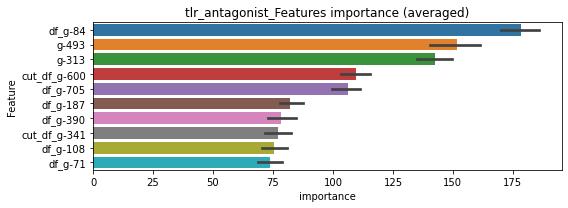

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tlr_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tlr_antagonist=================================


[1000]	training's binary_logloss: 0.000155819	valid_1's binary_logloss: 0.000520646
Early stopping, best iteration is:
[977]	training's binary_logloss: 0.000156036	valid_1's binary_logloss: 0.000520448
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 3/4 tlr_antagonist=================================


Early stopping, best iteration is:
[780]	training's binary_logloss: 0.000164346	valid_1's binary_logloss: 0.00473508
Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tlr_antagonist=================================


Early stopping, best iteration is:
[929]	training's binary_logloss: 0.000158507	valid_1's binary_logloss: 0.000151187
Training until validation scores don't improve for 30 rounds


tlr_antagonist logloss: 0.001475136200749998


[1000]	training's binary_logloss: 0.000155095	valid_1's binary_logloss: 0.000494905
Early stopping, best iteration is:
[972]	training's binary_logloss: 0.000155488	valid_1's binary_logloss: 0.000494592


tnf_inhibitor, len(trt): 36, len(othr): 3286
target_rate: 0.0015117 → Adj_target_rate: 0.0017663


selected negative label: 3286


N_features:503
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000613272	valid_1's binary_logloss: 0.024472
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[440]	training's binary_logloss: 0.000494868	valid_1's binary_logloss: 0.0248485
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000519049	valid_1's binary_logloss: 0.00545517
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0022828, Threshold: 0.0076396, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00151
Num_p_label: 40.0, Expected: 6.0, Threshold: 0.0076396, conf_0:0.00535, conf_1:0.00993
Num_p_label: 8.0, Expected: 6.0, Adj_threshold_1: 0.0376396


Early stopping, best iteration is:
[491]	training's binary_logloss: 0.000432516	valid_1's binary_logloss: 0.0201821


threshold: 0.0376396, positive_p_label: 8.0/3982, p_label_rate: 0.0020090
positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[404]	training's binary_logloss: 0.000593884	valid_1's binary_logloss: 0.0211392
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000479551	valid_1's binary_logloss: 0.0237393
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000437657	valid_1's binary_logloss: 0.00379149
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0122193, Threshold: 0.0376396, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0080362 Vs.target_rate: 0.00151
Num_p_label: 32.0, Expected: 6.0, Threshold: 0.0376396, conf_0:0.03011, conf_1:0.04517
Num_p_label: 19.0, Expected: 6.0, Adj_threshold_1: 0.0676396
Num_p_label: 16.0, Expected: 6.0, Adj_threshold_2: 0.0976396


Early stopping, best iteration is:
[398]	training's binary_logloss: 0.000623444	valid_1's binary_logloss: 0.0181045


Num_p_label: 14.0, Expected: 6.0, Adj_threshold_3: 0.1276396
threshold: 0.1276396, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000498575	valid_1's binary_logloss: 0.0238712
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000537608	valid_1's binary_logloss: 0.0160975
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[577]	training's binary_logloss: 0.00038194	valid_1's binary_logloss: 0.00258677
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0132700, Threshold: 0.1276396, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3807
p_label_rate: 0.0035158 Vs.target_rate: 0.00151
Num_p_label: 14.0, Expected: 6.0, Threshold: 0.1276396, conf_0:0.11488, conf_1:0.14040


Early stopping, best iteration is:
[358]	training's binary_logloss: 0.00075544	valid_1's binary_logloss: 0.0265442


threshold: 0.1276396, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 655.0/3807, y_label_rate: 0.1720515


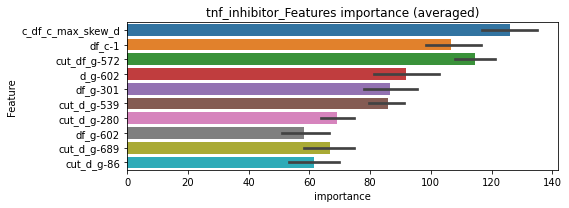

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 tnf_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[257]	training's binary_logloss: 0.000935452	valid_1's binary_logloss: 0.0256323
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000454205	valid_1's binary_logloss: 0.00763908
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 tnf_inhibitor=================================


Early stopping, best iteration is:
[362]	training's binary_logloss: 0.000652783	valid_1's binary_logloss: 0.012341
Training until validation scores don't improve for 30 rounds


tnf_inhibitor logloss: 0.014071167552864165


Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000444349	valid_1's binary_logloss: 0.0106688


topoisomerase_inhibitor, len(trt): 127, len(othr): 3276
target_rate: 0.0053330 → Adj_target_rate: 0.0051574


selected negative label: 3276


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[253]	training's binary_logloss: 0.011197	valid_1's binary_logloss: 0.134259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[297]	training's binary_logloss: 0.00770389	valid_1's binary_logloss: 0.100885
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[666]	training's binary_logloss: 0.00103102	valid_1's binary_logloss: 0.0462632
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.992, PR-AUC:0.979
y_Threshold: 0.0235064, Threshold: 0.0844302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 184 → Positive_corect_labels: 629/3747
p_label_rate: 0.0100452 Vs.target_rate: 0.00533
Num_p_label: 40.0, Expected: 21.2, Threshold: 0.0844302, conf_0:0.05910, conf_1:0.10976
Num_p_label: 21.0, Expected: 21.2, Adj_threshold_1: 0.1144302
threshold: 0.1144302, positive_p_label: 21.0/3982, p_label_rate: 0.0052737


Early stopping, best iteration is:
[307]	training's binary_logloss: 0.00696335	valid_1's binary_logloss: 0.0997568


positive_y_label: 629.0/3747, y_label_rate: 0.1678676
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[283]	training's binary_logloss: 0.00640249	valid_1's binary_logloss: 0.0837533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[333]	training's binary_logloss: 0.00395725	valid_1's binary_logloss: 0.0871881
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.00160573	valid_1's binary_logloss: 0.0490254
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:0.998, PR-AUC:0.990


Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00204389	valid_1's binary_logloss: 0.0628956


y_Threshold: 0.0366505, Threshold: 0.1144302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 597.0/3683
p_label_rate: 0.0183325 Vs.target_rate: 0.00533
Num_p_label: 73.0, Expected: 21.2, Threshold: 0.1144302, conf_0:0.09154, conf_1:0.13732
Num_p_label: 59.0, Expected: 21.2, Adj_threshold_1: 0.1444302
Num_p_label: 44.0, Expected: 21.2, Adj_threshold_2: 0.1744302
Num_p_label: 31.0, Expected: 21.2, Adj_threshold_3: 0.2044302
threshold: 0.2044302, positive_p_label: 31.0/3982, p_label_rate: 0.0077850
positive_y_label: 597.0/3683, y_label_rate: 0.1620961
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[381]	training's binary_logloss: 0.00201878	valid_1's binary_logloss: 0.05858
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00134037	valid_1's binary_logloss: 0.0542046
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[468]	training's binary_logloss: 0.00133127	valid_1's binary_logloss: 0.0368751
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:0.999, PR-AUC:0.997
y_Threshold: 0.0309310, Threshold: 0.2044302, pos_neg_ratio: 0.8000000
Remove_noisy_data: 32 → Positive_corect_labels: 581.0/3651
p_label_rate: 0.0198393 Vs.target_rate: 0.00533
Num_p_label: 79.0, Expected: 21.2, Threshold: 0.2044302, conf_0:0.18399, conf_1:0.22487


Early stopping, best iteration is:
[373]	training's binary_logloss: 0.00234014	valid_1's binary_logloss: 0.0487982


Num_p_label: 75.0, Expected: 21.2, Adj_threshold_1: 0.2344302
Num_p_label: 65.0, Expected: 21.2, Adj_threshold_2: 0.2644302
Num_p_label: 59.0, Expected: 21.2, Adj_threshold_3: 0.2944302
Num_p_label: 51.0, Expected: 21.2, Adj_threshold_4: 0.3244302
Num_p_label: 43.0, Expected: 21.2, Adj_threshold_5: 0.3544302
Num_p_label: 34.0, Expected: 21.2, Adj_threshold_6: 0.3844302
Num_p_label: 27.0, Expected: 21.2, Adj_threshold_7: 0.4144302
threshold: 0.4144302, positive_p_label: 27.0/3982, p_label_rate: 0.0067805
positive_y_label: 581.0/3651, y_label_rate: 0.1591345


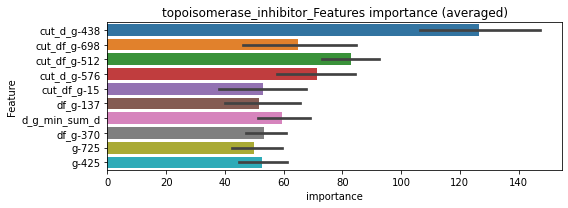

len(train_index) : 2738
len(valid_index) : 913
================================= fold 1/4 topoisomerase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2738
len(valid_index) : 913
================================= fold 2/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[158]	training's binary_logloss: 0.00416207	valid_1's binary_logloss: 0.0532449
Training until validation scores don't improve for 30 rounds


len(train_index) : 2738
len(valid_index) : 913
================================= fold 3/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[372]	training's binary_logloss: 0.00130733	valid_1's binary_logloss: 0.0325249
Training until validation scores don't improve for 30 rounds


len(train_index) : 2739
len(valid_index) : 912
================================= fold 4/4 topoisomerase_inhibitor=================================


Early stopping, best iteration is:
[412]	training's binary_logloss: 0.00116383	valid_1's binary_logloss: 0.021884
Training until validation scores don't improve for 30 rounds


topoisomerase_inhibitor logloss: 0.038211144216178834
topoisomerase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00215528	valid_1's binary_logloss: 0.0451985


transient_receptor_potential_channel_antagonist, len(trt): 18, len(othr): 3285
target_rate: 0.0007559 → Adj_target_rate: 0.0009799


selected negative label: 3285


N_features:501
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[461]	training's binary_logloss: 0.000280502	valid_1's binary_logloss: 0.00478544
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[401]	training's binary_logloss: 0.000327028	valid_1's binary_logloss: 0.0121132
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[471]	training's binary_logloss: 0.000280768	valid_1's binary_logloss: 0.00211238
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0009939, Threshold: 0.0054995, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00076
Num_p_label: 40.0, Expected: 3.0, Threshold: 0.0054995, conf_0:0.00385, conf_1:0.00715
Num_p_label: 2.0, Expected: 3.0, Adj_threshold_1: 0.0354995
threshold: 0.0354995, positive_p_label: 2.0/3982, p_label_rate: 0.0005023


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000295626	valid_1's binary_logloss: 0.00909457


positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000265659	valid_1's binary_logloss: 0.00353138
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.00026886	valid_1's binary_logloss: 0.00982765
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[494]	training's binary_logloss: 0.000267436	valid_1's binary_logloss: 0.00138705
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1049998, Threshold: 0.0354995, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0223506 Vs.target_rate: 0.00076
Num_p_label: 89.0, Expected: 3.0, Threshold: 0.0354995, conf_0:0.02840, conf_1:0.04260
Num_p_label: 63.0, Expected: 3.0, Adj_threshold_1: 0.0654995
Num_p_label: 50.0, Expected: 3.0, Adj_threshold_2: 0.0954995


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000277919	valid_1's binary_logloss: 0.00750079


Num_p_label: 41.0, Expected: 3.0, Adj_threshold_3: 0.1254995
Num_p_label: 36.0, Expected: 3.0, Adj_threshold_4: 0.1554995
Num_p_label: 31.0, Expected: 3.0, Adj_threshold_5: 0.1854995
Num_p_label: 26.0, Expected: 3.0, Adj_threshold_6: 0.2154995
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_7: 0.2454995
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_8: 0.2754995
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_9: 0.3054995
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_10: 0.3354995
threshold: 0.3354995, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[426]	training's binary_logloss: 0.000281826	valid_1's binary_logloss: 0.0101728
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000269246	valid_1's binary_logloss: 0.00622474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.00026334	valid_1's binary_logloss: 0.000327306
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0737230, Threshold: 0.3354995, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 655.0/3806
p_label_rate: 0.0070316 Vs.target_rate: 0.00076
Num_p_label: 28.0, Expected: 3.0, Threshold: 0.3354995, conf_0:0.30195, conf_1:0.36905
Num_p_label: 24.0, Expected: 3.0, Adj_threshold_1: 0.3654995
Num_p_label: 23.0, Expected: 3.0, Adj_threshold_2: 0.3954995
Num_p_label: 22.0, Expected: 3.0, Adj_threshold_3: 0.4254995
Num_p_label: 21.0, Expected: 3.0, Adj_threshold_4: 0.4554995
Num_p_label: 20.0, Expected: 3.0, Adj_threshold_5: 0.4854995
Num_p_label: 18.0, Expected: 3.0, Adj_threshold_6: 0.5154995


Early stopping, best iteration is:
[469]	training's binary_logloss: 0.000259639	valid_1's binary_logloss: 0.00531671


Num_p_label: 16.0, Expected: 3.0, Adj_threshold_7: 0.5454995
Num_p_label: 10.0, Expected: 3.0, Adj_threshold_8: 0.5754995
Num_p_label: 9.0, Expected: 3.0, Adj_threshold_9: 0.6054995
Num_p_label: 6.0, Expected: 3.0, Adj_threshold_10: 0.6354995
threshold: 0.6354995, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 655.0/3806, y_label_rate: 0.1720967


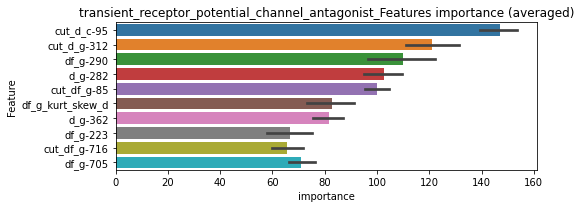

len(train_index) : 2854
len(valid_index) : 952
================================= fold 1/4 transient_receptor_potential_channel_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2854
len(valid_index) : 952
================================= fold 2/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[459]	training's binary_logloss: 0.00033209	valid_1's binary_logloss: 0.00945674
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 3/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[803]	training's binary_logloss: 0.000263773	valid_1's binary_logloss: 0.000958204
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 951
================================= fold 4/4 transient_receptor_potential_channel_antagonist=================================


Early stopping, best iteration is:
[657]	training's binary_logloss: 0.000276528	valid_1's binary_logloss: 0.00139213
Training until validation scores don't improve for 30 rounds


transient_receptor_potential_channel_antagonist logloss: 0.0031896039011233375


Early stopping, best iteration is:
[702]	training's binary_logloss: 0.000272151	valid_1's binary_logloss: 0.000946874


tropomyosin_receptor_kinase_inhibitor, len(trt): 6, len(othr): 3289
target_rate: 0.0002520 → Adj_target_rate: 0.0003851


selected negative label: 3289


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[386]	training's binary_logloss: 0.000172919	valid_1's binary_logloss: 0.00174248
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[486]	training's binary_logloss: 0.000146275	valid_1's binary_logloss: 0.000241385
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.000146066	valid_1's binary_logloss: 0.000168775
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0003956, Threshold: 0.0013217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 133 → Positive_corect_labels: 657/3813
p_label_rate: 0.0100452 Vs.target_rate: 0.00025
Num_p_label: 40.0, Expected: 1.0, Threshold: 0.0013217, conf_0:0.00093, conf_1:0.00172
Num_p_label: 0.0, Expected: 1.0, Adj_threshold_1: 0.0313217
threshold: 0.0313217, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000148666	valid_1's binary_logloss: 0.000934824


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000149807	valid_1's binary_logloss: 0.000717271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000141294	valid_1's binary_logloss: 0.000174395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000141451	valid_1's binary_logloss: 0.000147762
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1244684, Threshold: 0.0313217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0022602 Vs.target_rate: 0.00025
Num_p_label: 9.0, Expected: 1.0, Threshold: 0.0313217, conf_0:0.02506, conf_1:0.03759
Num_p_label: 3.0, Expected: 1.0, Adj_threshold_1: 0.0613217
Num_p_label: 1.0, Expected: 1.0, Adj_threshold_2: 0.0913217
threshold: 0.0913217, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000141181	valid_1's binary_logloss: 0.000280315


positive_y_label: 657.0/3813, y_label_rate: 0.1723053
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[430]	training's binary_logloss: 0.000149807	valid_1's binary_logloss: 0.000717271
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[508]	training's binary_logloss: 0.000141294	valid_1's binary_logloss: 0.000174395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[519]	training's binary_logloss: 0.000141451	valid_1's binary_logloss: 0.000147762
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.1244684, Threshold: 0.0913217, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3813
p_label_rate: 0.0002511 Vs.target_rate: 0.00025
Num_p_label: 1.0, Expected: 1.0, Threshold: 0.0913217, conf_0:0.08219, conf_1:0.10045
threshold: 0.0913217, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[514]	training's binary_logloss: 0.000141181	valid_1's binary_logloss: 0.000280315


positive_y_label: 657.0/3813, y_label_rate: 0.1723053


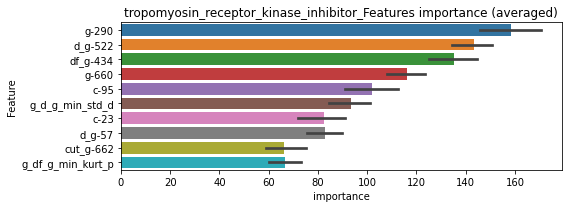

len(train_index) : 2859
len(valid_index) : 954
================================= fold 1/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2860
len(valid_index) : 953
================================= fold 2/4 tropomyosin_receptor_kinase_inhibitor=================================


Early stopping, best iteration is:
[888]	training's binary_logloss: 0.000144803	valid_1's binary_logloss: 0.00139092
Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.00014323	valid_1's binary_logloss: 0.000230879


len(train_index) : 2860
len(valid_index) : 953


Early stopping, best iteration is:
[1096]	training's binary_logloss: 0.000141153	valid_1's binary_logloss: 0.000227917


================================= fold 3/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000143462	valid_1's binary_logloss: 0.000149609
Early stopping, best iteration is:
[995]	training's binary_logloss: 0.000143462	valid_1's binary_logloss: 0.000149609


len(train_index) : 2860
len(valid_index) : 953
================================= fold 4/4 tropomyosin_receptor_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds
[1000]	training's binary_logloss: 0.000143389	valid_1's binary_logloss: 0.00021937


Early stopping, best iteration is:
[1121]	training's binary_logloss: 0.000140883	valid_1's binary_logloss: 0.000216347


tropomyosin_receptor_kinase_inhibitor logloss: 0.0004964336154875351
trpv_agonist, len(trt): 25, len(othr): 3285
target_rate: 0.0010498 → Adj_target_rate: 0.0012955


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000447166	valid_1's binary_logloss: 0.00833545
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[427]	training's binary_logloss: 0.00039273	valid_1's binary_logloss: 0.0166435
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[341]	training's binary_logloss: 0.000689305	valid_1's binary_logloss: 0.00787562
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0016281, Threshold: 0.0051637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00105
Num_p_label: 40.0, Expected: 4.2, Threshold: 0.0051637, conf_0:0.00361, conf_1:0.00671
Num_p_label: 1.0, Expected: 4.2, Adj_threshold_1: 0.0351637


Early stopping, best iteration is:
[442]	training's binary_logloss: 0.000396619	valid_1's binary_logloss: 0.00599172


threshold: 0.0351637, positive_p_label: 1.0/3982, p_label_rate: 0.0002511
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000335143	valid_1's binary_logloss: 0.00648663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00035214	valid_1's binary_logloss: 0.013601
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000451499	valid_1's binary_logloss: 0.00684799
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153977, Threshold: 0.0351637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0035158 Vs.target_rate: 0.00105
Num_p_label: 14.0, Expected: 4.2, Threshold: 0.0351637, conf_0:0.02813, conf_1:0.04220
Num_p_label: 6.0, Expected: 4.2, Adj_threshold_1: 0.0651637


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000333032	valid_1's binary_logloss: 0.00471702


threshold: 0.0651637, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000335143	valid_1's binary_logloss: 0.00648663
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.00035214	valid_1's binary_logloss: 0.013601
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000451499	valid_1's binary_logloss: 0.00684799
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0153977, Threshold: 0.0651637, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 657.0/3810
p_label_rate: 0.0015068 Vs.target_rate: 0.00105
Num_p_label: 6.0, Expected: 4.2, Threshold: 0.0651637, conf_0:0.05865, conf_1:0.07168


Early stopping, best iteration is:
[507]	training's binary_logloss: 0.000333032	valid_1's binary_logloss: 0.00471702


threshold: 0.0651637, positive_p_label: 6.0/3982, p_label_rate: 0.0015068
positive_y_label: 657.0/3810, y_label_rate: 0.1724409


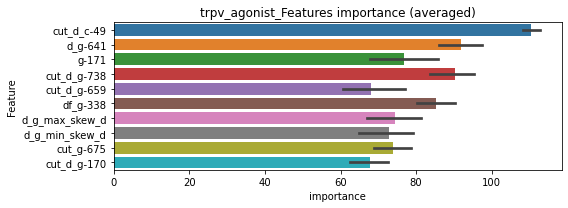

len(train_index) : 2857
len(valid_index) : 953
================================= fold 1/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 953


Early stopping, best iteration is:
[651]	training's binary_logloss: 0.000346869	valid_1's binary_logloss: 0.00552218


================================= fold 2/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2858
len(valid_index) : 952
================================= fold 3/4 trpv_agonist=================================


Early stopping, best iteration is:
[545]	training's binary_logloss: 0.000375887	valid_1's binary_logloss: 0.0122978
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[456]	training's binary_logloss: 0.000446567	valid_1's binary_logloss: 0.00722919


len(train_index) : 2858
len(valid_index) : 952
================================= fold 4/4 trpv_agonist=================================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[656]	training's binary_logloss: 0.000350885	valid_1's binary_logloss: 0.00322315


trpv_agonist logloss: 0.007069134902631962
trpv_antagonist, len(trt): 48, len(othr): 3284
target_rate: 0.0020156 → Adj_target_rate: 0.0022556


selected negative label: 3284


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[286]	training's binary_logloss: 0.0017153	valid_1's binary_logloss: 0.0553094
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[413]	training's binary_logloss: 0.000788399	valid_1's binary_logloss: 0.0313142
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[546]	training's binary_logloss: 0.000500708	valid_1's binary_logloss: 0.00632884
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0034872, Threshold: 0.0099690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 136 → Positive_corect_labels: 654/3804
p_label_rate: 0.0100452 Vs.target_rate: 0.00202
Num_p_label: 40.0, Expected: 8.0, Threshold: 0.0099690, conf_0:0.00698, conf_1:0.01296
Num_p_label: 4.0, Expected: 8.0, Adj_threshold_1: 0.0399690
threshold: 0.0399690, positive_p_label: 4.0/3982, p_label_rate: 0.0010045


Early stopping, best iteration is:
[351]	training's binary_logloss: 0.00113068	valid_1's binary_logloss: 0.0431906


positive_y_label: 654.0/3804, y_label_rate: 0.1719243
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[513]	training's binary_logloss: 0.00048079	valid_1's binary_logloss: 0.0307462
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000526413	valid_1's binary_logloss: 0.0202918
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000538422	valid_1's binary_logloss: 0.0259752
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[314]	training's binary_logloss: 0.00134209	valid_1's binary_logloss: 0.0393804


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0113217, Threshold: 0.0399690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 650.0/3796
p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, Expected: 8.0, Threshold: 0.0399690, conf_0:0.03198, conf_1:0.04796
threshold: 0.0399690, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 650.0/3796, y_label_rate: 0.1712329
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[449]	training's binary_logloss: 0.000576986	valid_1's binary_logloss: 0.0261687
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000478502	valid_1's binary_logloss: 0.0232629
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000494755	valid_1's binary_logloss: 0.0166124
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0100174, Threshold: 0.0399690, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 648.0/3792


Early stopping, best iteration is:
[477]	training's binary_logloss: 0.000526596	valid_1's binary_logloss: 0.022162


p_label_rate: 0.0035158 Vs.target_rate: 0.00202
Num_p_label: 14.0, Expected: 8.0, Threshold: 0.0399690, conf_0:0.03597, conf_1:0.04397
threshold: 0.0399690, positive_p_label: 14.0/3982, p_label_rate: 0.0035158
positive_y_label: 648.0/3792, y_label_rate: 0.1708861


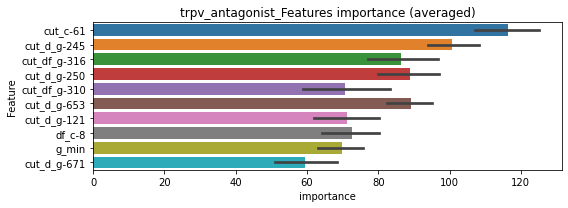

len(train_index) : 2844
len(valid_index) : 948
================================= fold 1/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 2/4 trpv_antagonist=================================


Early stopping, best iteration is:
[282]	training's binary_logloss: 0.0010167	valid_1's binary_logloss: 0.0284255
Training until validation scores don't improve for 30 rounds


len(train_index) : 2844
len(valid_index) : 948
================================= fold 3/4 trpv_antagonist=================================


Early stopping, best iteration is:
[300]	training's binary_logloss: 0.000947944	valid_1's binary_logloss: 0.0253501
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[713]	training's binary_logloss: 0.000438882	valid_1's binary_logloss: 0.01093


len(train_index) : 2844
len(valid_index) : 948
================================= fold 4/4 trpv_antagonist=================================


Training until validation scores don't improve for 30 rounds


trpv_antagonist logloss: 0.021018659856730012


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.00122964	valid_1's binary_logloss: 0.019369
mutually exclusive columns: tubulin_inhibitor


tubulin_inhibitor, len(trt): 316, len(othr): 7122
target_rate: 0.0132695 → Adj_target_rate: 0.0111926


selected negative label: 7122


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[335]	training's binary_logloss: 0.0177322	valid_1's binary_logloss: 0.137205
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.011966	valid_1's binary_logloss: 0.114961
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[343]	training's binary_logloss: 0.0167579	valid_1's binary_logloss: 0.131142
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.973, PR-AUC:0.947
y_Threshold: 0.0361406, Threshold: 0.0523160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 538 → Positive_corect_labels: 1298/8008


Early stopping, best iteration is:
[299]	training's binary_logloss: 0.0214884	valid_1's binary_logloss: 0.139155


p_label_rate: 0.0100452 Vs.target_rate: 0.01327
Num_p_label: 40.0, Expected: 52.8, Threshold: 0.0523160, conf_0:0.03662, conf_1:0.06801
threshold: 0.0523160, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 1298.0/8008, y_label_rate: 0.1620879
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[424]	training's binary_logloss: 0.00449766	valid_1's binary_logloss: 0.0842474
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[382]	training's binary_logloss: 0.00602629	valid_1's binary_logloss: 0.0922775
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[428]	training's binary_logloss: 0.00480747	valid_1's binary_logloss: 0.0721543
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[364]	training's binary_logloss: 0.00725249	valid_1's binary_logloss: 0.0829355


2 / 3, AUC score:0.995, PR-AUC:0.984
y_Threshold: 0.0312830, Threshold: 0.0523160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 146 → Positive_corect_labels: 1225.0/7862
p_label_rate: 0.0040181 Vs.target_rate: 0.01327
Num_p_label: 16.0, Expected: 52.8, Threshold: 0.0523160, conf_0:0.04185, conf_1:0.06278
threshold: 0.0523160, positive_p_label: 16.0/3982, p_label_rate: 0.0040181
positive_y_label: 1225.0/7862, y_label_rate: 0.1558128
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[357]	training's binary_logloss: 0.0047165	valid_1's binary_logloss: 0.0625819
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.00241214	valid_1's binary_logloss: 0.0507167
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[472]	training's binary_logloss: 0.00218813	valid_1's binary_logloss: 0.0443172
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[384]	training's binary_logloss: 0.00391481	valid_1's binary_logloss: 0.0544496


3 / 3, AUC score:0.999, PR-AUC:0.996
y_Threshold: 0.0213470, Threshold: 0.0523160, pos_neg_ratio: 0.8000000
Remove_noisy_data: 64 → Positive_corect_labels: 1193.0/7798
p_label_rate: 0.0012557 Vs.target_rate: 0.01327
Num_p_label: 5.0, Expected: 52.8, Threshold: 0.0523160, conf_0:0.04708, conf_1:0.05755
threshold: 0.0523160, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 1193.0/7798, y_label_rate: 0.1529879


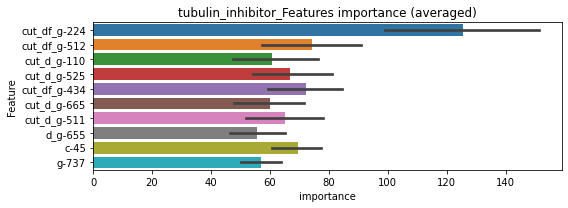

len(train_index) : 5848
len(valid_index) : 1950
================================= fold 1/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5848
len(valid_index) : 1950
================================= fold 2/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[180]	training's binary_logloss: 0.00349641	valid_1's binary_logloss: 0.0564912
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[239]	training's binary_logloss: 0.00218639	valid_1's binary_logloss: 0.0340722


len(train_index) : 5849
len(valid_index) : 1949
================================= fold 3/4 tubulin_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 5849
len(valid_index) : 1949
================================= fold 4/4 tubulin_inhibitor=================================


Early stopping, best iteration is:
[189]	training's binary_logloss: 0.00336006	valid_1's binary_logloss: 0.033044
Training until validation scores don't improve for 30 rounds


tubulin_inhibitor logloss: 0.040940354088452056
tubulin_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[241]	training's binary_logloss: 0.00221221	valid_1's binary_logloss: 0.0401496


tyrosine_kinase_inhibitor, len(trt): 73, len(othr): 3281
target_rate: 0.0030654 → Adj_target_rate: 0.0032212


selected negative label: 3281


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[276]	training's binary_logloss: 0.00404459	valid_1's binary_logloss: 0.07929
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[325]	training's binary_logloss: 0.00264367	valid_1's binary_logloss: 0.0623859
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[608]	training's binary_logloss: 0.000690012	valid_1's binary_logloss: 0.0213473
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.998, PR-AUC:0.995
y_Threshold: 0.0090076, Threshold: 0.0599252, pos_neg_ratio: 0.8000000


Early stopping, best iteration is:
[432]	training's binary_logloss: 0.00125592	valid_1's binary_logloss: 0.0544576


Remove_noisy_data: 142 → Positive_corect_labels: 651/3795
p_label_rate: 0.0100452 Vs.target_rate: 0.00307
Num_p_label: 40.0, Expected: 12.2, Threshold: 0.0599252, conf_0:0.04195, conf_1:0.07790
Num_p_label: 27.0, Expected: 12.2, Adj_threshold_1: 0.0899252
Num_p_label: 15.0, Expected: 12.2, Adj_threshold_2: 0.1199252
threshold: 0.1199252, positive_p_label: 15.0/3982, p_label_rate: 0.0037670
positive_y_label: 651.0/3795, y_label_rate: 0.1715415
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[485]	training's binary_logloss: 0.000944691	valid_1's binary_logloss: 0.0543245
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[315]	training's binary_logloss: 0.00246519	valid_1's binary_logloss: 0.0655886
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[541]	training's binary_logloss: 0.00073834	valid_1's binary_logloss: 0.0380737
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[587]	training's binary_logloss: 0.00066774	valid_1's binary_logloss: 0.0278754


2 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0174214, Threshold: 0.1199252, pos_neg_ratio: 0.8000000
Remove_noisy_data: 18 → Positive_corect_labels: 642.0/3777
p_label_rate: 0.0128076 Vs.target_rate: 0.00307
Num_p_label: 51.0, Expected: 12.2, Threshold: 0.1199252, conf_0:0.09594, conf_1:0.14391
Num_p_label: 43.0, Expected: 12.2, Adj_threshold_1: 0.1499252
Num_p_label: 35.0, Expected: 12.2, Adj_threshold_2: 0.1799252
Num_p_label: 30.0, Expected: 12.2, Adj_threshold_3: 0.2099252
Num_p_label: 26.0, Expected: 12.2, Adj_threshold_4: 0.2399252
Num_p_label: 22.0, Expected: 12.2, Adj_threshold_5: 0.2699252
Num_p_label: 19.0, Expected: 12.2, Adj_threshold_6: 0.2999252
Num_p_label: 18.0, Expected: 12.2, Adj_threshold_7: 0.3299252
threshold: 0.3299252, positive_p_label: 18.0/3982, p_label_rate: 0.0045203
positive_y_label: 642.0/3777, y_label_rate: 0.1699762
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[296]	training's binary_logloss: 0.00276714	valid_1's binary_logloss: 0.057692
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[331]	training's binary_logloss: 0.00201015	valid_1's binary_logloss: 0.0559005
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[551]	training's binary_logloss: 0.000682198	valid_1's binary_logloss: 0.0157432
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0205054, Threshold: 0.3299252, pos_neg_ratio: 0.8000000
Remove_noisy_data: 24 → Positive_corect_labels: 630.0/3753
p_label_rate: 0.0040181 Vs.target_rate: 0.00307
Num_p_label: 16.0, Expected: 12.2, Threshold: 0.3299252, conf_0:0.29693, conf_1:0.36292
threshold: 0.3299252, positive_p_label: 16.0/3982, p_label_rate: 0.0040181


Early stopping, best iteration is:
[378]	training's binary_logloss: 0.00143595	valid_1's binary_logloss: 0.0431309


positive_y_label: 630.0/3753, y_label_rate: 0.1678657


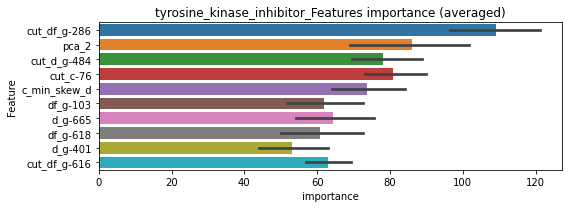

len(train_index) : 2814
len(valid_index) : 939
================================= fold 1/4 tyrosine_kinase_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 2/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[282]	training's binary_logloss: 0.00136972	valid_1's binary_logloss: 0.0381248
Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 3/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[420]	training's binary_logloss: 0.000871328	valid_1's binary_logloss: 0.0205897
Training until validation scores don't improve for 30 rounds


len(train_index) : 2815
len(valid_index) : 938
================================= fold 4/4 tyrosine_kinase_inhibitor=================================


Early stopping, best iteration is:
[247]	training's binary_logloss: 0.0016811	valid_1's binary_logloss: 0.0257367
Training until validation scores don't improve for 30 rounds


tyrosine_kinase_inhibitor logloss: 0.030747020821634673
tyrosine_kinase_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[253]	training's binary_logloss: 0.00158293	valid_1's binary_logloss: 0.038529


ubiquitin_specific_protease_inhibitor, len(trt): 12, len(othr): 3285
target_rate: 0.0005039 → Adj_target_rate: 0.0006942


selected negative label: 3285


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000236225	valid_1's binary_logloss: 0.00530916
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000227999	valid_1's binary_logloss: 0.00345918
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[501]	training's binary_logloss: 0.000221128	valid_1's binary_logloss: 0.000235946
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0007655, Threshold: 0.0014126, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3810
p_label_rate: 0.0100452 Vs.target_rate: 0.00050
Num_p_label: 40.0, Expected: 2.0, Threshold: 0.0014126, conf_0:0.00099, conf_1:0.00184
Num_p_label: 0.0, Expected: 2.0, Adj_threshold_1: 0.0314126


Early stopping, best iteration is:
[309]	training's binary_logloss: 0.000457665	valid_1's binary_logloss: 0.0135641


threshold: 0.0314126, positive_p_label: 0.0/3982, p_label_rate: 0.0000000
positive_y_label: 657.0/3810, y_label_rate: 0.1724409
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[425]	training's binary_logloss: 0.000245131	valid_1's binary_logloss: 0.00511397
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000221751	valid_1's binary_logloss: 0.0036795
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[480]	training's binary_logloss: 0.000224323	valid_1's binary_logloss: 0.000237704
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0044012, Threshold: 0.0314126, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, Expected: 2.0, Threshold: 0.0314126, conf_0:0.02513, conf_1:0.03770
threshold: 0.0314126, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[368]	training's binary_logloss: 0.000305877	valid_1's binary_logloss: 0.0129061


positive_y_label: 656.0/3808, y_label_rate: 0.1722689
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[481]	training's binary_logloss: 0.000217675	valid_1's binary_logloss: 0.00272011
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[263]	training's binary_logloss: 0.000693895	valid_1's binary_logloss: 0.0146184
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[490]	training's binary_logloss: 0.000220579	valid_1's binary_logloss: 0.000230479
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0069278, Threshold: 0.0314126, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3808
p_label_rate: 0.0000000 Vs.target_rate: 0.00050
Num_p_label: 0.0, Expected: 2.0, Threshold: 0.0314126, conf_0:0.02827, conf_1:0.03455
threshold: 0.0314126, positive_p_label: 0.0/3982, p_label_rate: 0.0000000


Early stopping, best iteration is:
[317]	training's binary_logloss: 0.000444649	valid_1's binary_logloss: 0.00285475


positive_y_label: 656.0/3808, y_label_rate: 0.1722689


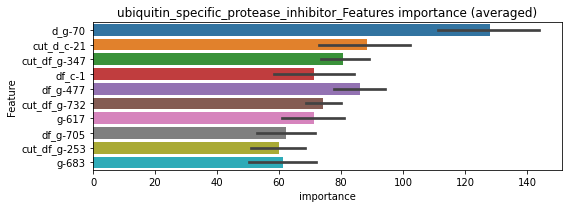

len(train_index) : 2856
len(valid_index) : 952
================================= fold 1/4 ubiquitin_specific_protease_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 2/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[696]	training's binary_logloss: 0.000229244	valid_1's binary_logloss: 0.00174025
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 3/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[246]	training's binary_logloss: 0.000530706	valid_1's binary_logloss: 0.0134547
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 952
================================= fold 4/4 ubiquitin_specific_protease_inhibitor=================================


Early stopping, best iteration is:
[753]	training's binary_logloss: 0.000229892	valid_1's binary_logloss: 0.000241348
Training until validation scores don't improve for 30 rounds


ubiquitin_specific_protease_inhibitor logloss: 0.004501412747230469


Early stopping, best iteration is:
[604]	training's binary_logloss: 0.000250162	valid_1's binary_logloss: 0.00256931
mutually exclusive columns: vegfr_inhibitor


vegfr_inhibitor, len(trt): 170, len(othr): 4633
target_rate: 0.0071387 → Adj_target_rate: 0.0066081


selected negative label: 4633


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[369]	training's binary_logloss: 0.00579755	valid_1's binary_logloss: 0.0991265
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.00739587	valid_1's binary_logloss: 0.110146
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[307]	training's binary_logloss: 0.0101035	valid_1's binary_logloss: 0.107359
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:0.983, PR-AUC:0.972


Early stopping, best iteration is:
[352]	training's binary_logloss: 0.00684932	valid_1's binary_logloss: 0.0842619


y_Threshold: 0.0199014, Threshold: 0.0307928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 270 → Positive_corect_labels: 884/5289
p_label_rate: 0.0100452 Vs.target_rate: 0.00714
Num_p_label: 40.0, Expected: 28.4, Threshold: 0.0307928, conf_0:0.02155, conf_1:0.04003
threshold: 0.0307928, positive_p_label: 40.0/3982, p_label_rate: 0.0100452
positive_y_label: 884.0/5289, y_label_rate: 0.1671393
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[380]	training's binary_logloss: 0.00375826	valid_1's binary_logloss: 0.0648762
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[361]	training's binary_logloss: 0.00454161	valid_1's binary_logloss: 0.0850328
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[353]	training's binary_logloss: 0.00488296	valid_1's binary_logloss: 0.0723305
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[399]	training's binary_logloss: 0.00339986	valid_1's binary_logloss: 0.072328


2 / 3, AUC score:0.996, PR-AUC:0.992
y_Threshold: 0.0300302, Threshold: 0.0307928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 50 → Positive_corect_labels: 859.0/5239
p_label_rate: 0.0102963 Vs.target_rate: 0.00714
Num_p_label: 41.0, Expected: 28.4, Threshold: 0.0307928, conf_0:0.02463, conf_1:0.03695
threshold: 0.0307928, positive_p_label: 41.0/3982, p_label_rate: 0.0102963
positive_y_label: 859.0/5239, y_label_rate: 0.1639626
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[410]	training's binary_logloss: 0.00269387	valid_1's binary_logloss: 0.0486571
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[397]	training's binary_logloss: 0.00273769	valid_1's binary_logloss: 0.0551041
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[407]	training's binary_logloss: 0.00257872	valid_1's binary_logloss: 0.0558449
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[362]	training's binary_logloss: 0.00350592	valid_1's binary_logloss: 0.0662512


3 / 3, AUC score:0.999, PR-AUC:0.998
y_Threshold: 0.0253524, Threshold: 0.0307928, pos_neg_ratio: 0.8000000
Remove_noisy_data: 22 → Positive_corect_labels: 848.0/5217
p_label_rate: 0.0065294 Vs.target_rate: 0.00714
Num_p_label: 26.0, Expected: 28.4, Threshold: 0.0307928, conf_0:0.02771, conf_1:0.03387
threshold: 0.0307928, positive_p_label: 26.0/3982, p_label_rate: 0.0065294
positive_y_label: 848.0/5217, y_label_rate: 0.1625455


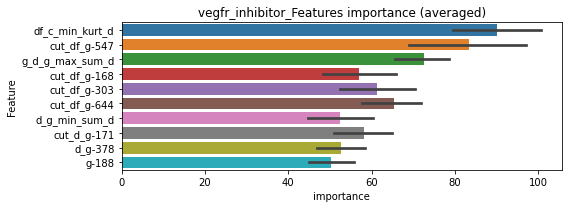

len(train_index) : 3912
len(valid_index) : 1305
================================= fold 1/4 vegfr_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 3913
len(valid_index) : 1304
================================= fold 2/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[176]	training's binary_logloss: 0.00418651	valid_1's binary_logloss: 0.0468377
Training until validation scores don't improve for 30 rounds


len(train_index) : 3913
len(valid_index) : 1304
================================= fold 3/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[186]	training's binary_logloss: 0.00377431	valid_1's binary_logloss: 0.0545507
Training until validation scores don't improve for 30 rounds


len(train_index) : 3913
len(valid_index) : 1304
================================= fold 4/4 vegfr_inhibitor=================================


Early stopping, best iteration is:
[162]	training's binary_logloss: 0.00467724	valid_1's binary_logloss: 0.0616072
Training until validation scores don't improve for 30 rounds


vegfr_inhibitor logloss: 0.05446956730007936
vegfr_inhibitor is unpredictable(><)!


Early stopping, best iteration is:
[174]	training's binary_logloss: 0.00432486	valid_1's binary_logloss: 0.0548885


vitamin_b, len(trt): 26, len(othr): 3286
target_rate: 0.0010918 → Adj_target_rate: 0.0013394


selected negative label: 3286


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[489]	training's binary_logloss: 0.000323883	valid_1's binary_logloss: 0.00970925
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[495]	training's binary_logloss: 0.000317316	valid_1's binary_logloss: 0.012044
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[448]	training's binary_logloss: 0.000372167	valid_1's binary_logloss: 0.00654027
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0013450, Threshold: 0.0033009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 657/3811
p_label_rate: 0.0100452 Vs.target_rate: 0.00109
Num_p_label: 40.0, Expected: 4.3, Threshold: 0.0033009, conf_0:0.00231, conf_1:0.00429
Num_p_label: 1.0, Expected: 4.3, Adj_threshold_1: 0.0333009
threshold: 0.0333009, positive_p_label: 1.0/3982, p_label_rate: 0.0002511


Early stopping, best iteration is:
[408]	training's binary_logloss: 0.000425141	valid_1's binary_logloss: 0.0127169


positive_y_label: 657.0/3811, y_label_rate: 0.1723957
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.00031432	valid_1's binary_logloss: 0.0100077
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[522]	training's binary_logloss: 0.000298773	valid_1's binary_logloss: 0.0112533
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[451]	training's binary_logloss: 0.000358695	valid_1's binary_logloss: 0.00767583
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0111711, Threshold: 0.0333009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 2 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0030136 Vs.target_rate: 0.00109
Num_p_label: 12.0, Expected: 4.3, Threshold: 0.0333009, conf_0:0.02664, conf_1:0.03996
Num_p_label: 6.0, Expected: 4.3, Adj_threshold_1: 0.0633009
threshold: 0.0633009, positive_p_label: 6.0/3982, p_label_rate: 0.0015068


Early stopping, best iteration is:
[438]	training's binary_logloss: 0.000364711	valid_1's binary_logloss: 0.0121806


positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[455]	training's binary_logloss: 0.000332961	valid_1's binary_logloss: 0.0148993
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[506]	training's binary_logloss: 0.000303915	valid_1's binary_logloss: 0.010428
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[459]	training's binary_logloss: 0.000338315	valid_1's binary_logloss: 0.00328763
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[447]	training's binary_logloss: 0.000342166	valid_1's binary_logloss: 0.0109398


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0150782, Threshold: 0.0633009, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3809
p_label_rate: 0.0022602 Vs.target_rate: 0.00109
Num_p_label: 9.0, Expected: 4.3, Threshold: 0.0633009, conf_0:0.05697, conf_1:0.06963
threshold: 0.0633009, positive_p_label: 9.0/3982, p_label_rate: 0.0022602
positive_y_label: 656.0/3809, y_label_rate: 0.1722237


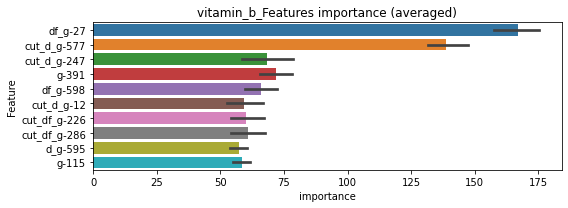

len(train_index) : 2856
len(valid_index) : 953
================================= fold 1/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 2/4 vitamin_b=================================


Early stopping, best iteration is:
[342]	training's binary_logloss: 0.000536518	valid_1's binary_logloss: 0.0140879
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[687]	training's binary_logloss: 0.000316727	valid_1's binary_logloss: 0.00615811


len(train_index) : 2857
len(valid_index) : 952
================================= fold 3/4 vitamin_b=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2857
len(valid_index) : 952
================================= fold 4/4 vitamin_b=================================


Early stopping, best iteration is:
[552]	training's binary_logloss: 0.000363488	valid_1's binary_logloss: 0.00289969
Training until validation scores don't improve for 30 rounds


Early stopping, best iteration is:
[619]	training's binary_logloss: 0.000327883	valid_1's binary_logloss: 0.00954854


vitamin_b logloss: 0.008176718563388946
vitamin_d_receptor_agonist, len(trt): 39, len(othr): 3286
target_rate: 0.0016377 → Adj_target_rate: 0.0018906


selected negative label: 3286


N_features:508
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[330]	training's binary_logloss: 0.0010378	valid_1's binary_logloss: 0.0342395
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[217]	training's binary_logloss: 0.00327673	valid_1's binary_logloss: 0.0412193
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[509]	training's binary_logloss: 0.000466221	valid_1's binary_logloss: 0.00732765
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:0.999
y_Threshold: 0.0043445, Threshold: 0.0113423, pos_neg_ratio: 0.8000000
Remove_noisy_data: 134 → Positive_corect_labels: 656/3809
p_label_rate: 0.0100452 Vs.target_rate: 0.00164
Num_p_label: 40.0, Expected: 6.5, Threshold: 0.0113423, conf_0:0.00794, conf_1:0.01474


Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000565311	valid_1's binary_logloss: 0.017863


Num_p_label: 5.0, Expected: 6.5, Adj_threshold_1: 0.0413423
threshold: 0.0413423, positive_p_label: 5.0/3982, p_label_rate: 0.0012557
positive_y_label: 656.0/3809, y_label_rate: 0.1722237
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000538692	valid_1's binary_logloss: 0.0335517
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[537]	training's binary_logloss: 0.000412924	valid_1's binary_logloss: 0.0137513
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[437]	training's binary_logloss: 0.000578654	valid_1's binary_logloss: 0.00595491
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0127309, Threshold: 0.0413423, pos_neg_ratio: 0.8000000
Remove_noisy_data: 8 → Positive_corect_labels: 652.0/3801
p_label_rate: 0.0030136 Vs.target_rate: 0.00164
Num_p_label: 12.0, Expected: 6.5, Threshold: 0.0413423, conf_0:0.03307, conf_1:0.04961
threshold: 0.0413423, positive_p_label: 12.0/3982, p_label_rate: 0.0030136


Early stopping, best iteration is:
[302]	training's binary_logloss: 0.00132123	valid_1's binary_logloss: 0.0323498


positive_y_label: 652.0/3801, y_label_rate: 0.1715338
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[383]	training's binary_logloss: 0.00067868	valid_1's binary_logloss: 0.0216906
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[435]	training's binary_logloss: 0.000543605	valid_1's binary_logloss: 0.0148259
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[504]	training's binary_logloss: 0.000426068	valid_1's binary_logloss: 0.0144286
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0139520, Threshold: 0.0413423, pos_neg_ratio: 0.8000000
Remove_noisy_data: 4 → Positive_corect_labels: 650.0/3797
p_label_rate: 0.0025113 Vs.target_rate: 0.00164
Num_p_label: 10.0, Expected: 6.5, Threshold: 0.0413423, conf_0:0.03721, conf_1:0.04548
threshold: 0.0413423, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[397]	training's binary_logloss: 0.000608833	valid_1's binary_logloss: 0.0235462


positive_y_label: 650.0/3797, y_label_rate: 0.1711878


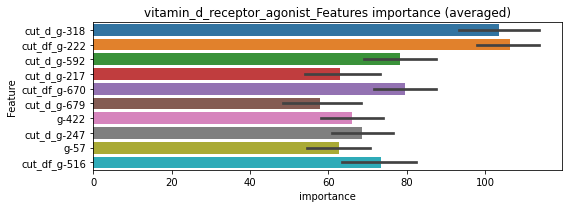

len(train_index) : 2847
len(valid_index) : 950
================================= fold 1/4 vitamin_d_receptor_agonist=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 2/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[549]	training's binary_logloss: 0.000467972	valid_1's binary_logloss: 0.0165775
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 3/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[366]	training's binary_logloss: 0.000673624	valid_1's binary_logloss: 0.0172775
Training until validation scores don't improve for 30 rounds


len(train_index) : 2848
len(valid_index) : 949
================================= fold 4/4 vitamin_d_receptor_agonist=================================


Early stopping, best iteration is:
[251]	training's binary_logloss: 0.00107733	valid_1's binary_logloss: 0.0131907
Training until validation scores don't improve for 30 rounds


vitamin_d_receptor_agonist logloss: 0.015515141550644767


Early stopping, best iteration is:
[263]	training's binary_logloss: 0.00097797	valid_1's binary_logloss: 0.0150138


wnt_inhibitor, len(trt): 30, len(othr): 3283
target_rate: 0.0012598 → Adj_target_rate: 0.0015127


selected negative label: 3283


N_features:502
================= Pseudo labeling 1 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[421]	training's binary_logloss: 0.000452576	valid_1's binary_logloss: 0.022419
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000419273	valid_1's binary_logloss: 0.0132628
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[411]	training's binary_logloss: 0.000528483	valid_1's binary_logloss: 0.00503795
Training until validation scores don't improve for 30 rounds


1 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0014458, Threshold: 0.0060387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 132 → Positive_corect_labels: 656/3807
p_label_rate: 0.0100452 Vs.target_rate: 0.00126
Num_p_label: 40.0, Expected: 5.0, Threshold: 0.0060387, conf_0:0.00423, conf_1:0.00785
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.0360387


Early stopping, best iteration is:
[445]	training's binary_logloss: 0.000433326	valid_1's binary_logloss: 0.0195044


threshold: 0.0360387, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 2 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000407607	valid_1's binary_logloss: 0.0206785
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000424979	valid_1's binary_logloss: 0.0124619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000539042	valid_1's binary_logloss: 0.00554227
Training until validation scores don't improve for 30 rounds


2 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0083684, Threshold: 0.0360387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0035158 Vs.target_rate: 0.00126
Num_p_label: 14.0, Expected: 5.0, Threshold: 0.0360387, conf_0:0.02883, conf_1:0.04325
Num_p_label: 10.0, Expected: 5.0, Adj_threshold_1: 0.0660387


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000427217	valid_1's binary_logloss: 0.0186613


threshold: 0.0660387, positive_p_label: 10.0/3982, p_label_rate: 0.0025113
positive_y_label: 656.0/3807, y_label_rate: 0.1723142
================= Pseudo labeling 3 / 3 =================


Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000407607	valid_1's binary_logloss: 0.0206785
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[444]	training's binary_logloss: 0.000424979	valid_1's binary_logloss: 0.0124619
Training until validation scores don't improve for 30 rounds
Early stopping, best iteration is:
[403]	training's binary_logloss: 0.000539042	valid_1's binary_logloss: 0.00554227
Training until validation scores don't improve for 30 rounds


3 / 3, AUC score:1.000, PR-AUC:1.000
y_Threshold: 0.0083684, Threshold: 0.0660387, pos_neg_ratio: 0.8000000
Remove_noisy_data: 0 → Positive_corect_labels: 656.0/3807
p_label_rate: 0.0025113 Vs.target_rate: 0.00126
Num_p_label: 10.0, Expected: 5.0, Threshold: 0.0660387, conf_0:0.05943, conf_1:0.07264
threshold: 0.0660387, positive_p_label: 10.0/3982, p_label_rate: 0.0025113


Early stopping, best iteration is:
[441]	training's binary_logloss: 0.000427217	valid_1's binary_logloss: 0.0186613


positive_y_label: 656.0/3807, y_label_rate: 0.1723142


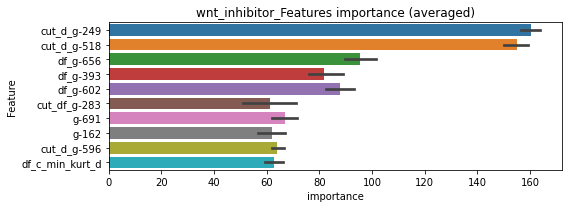

len(train_index) : 2855
len(valid_index) : 952
================================= fold 1/4 wnt_inhibitor=================================


Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 2/4 wnt_inhibitor=================================


Early stopping, best iteration is:
[316]	training's binary_logloss: 0.000679494	valid_1's binary_logloss: 0.0158597
Training until validation scores don't improve for 30 rounds


len(train_index) : 2855
len(valid_index) : 952
================================= fold 3/4 wnt_inhibitor=================================


Early stopping, best iteration is:
[503]	training's binary_logloss: 0.000442464	valid_1's binary_logloss: 0.0110384
Training until validation scores don't improve for 30 rounds


len(train_index) : 2856
len(valid_index) : 951
================================= fold 4/4 wnt_inhibitor=================================


Early stopping, best iteration is:
[453]	training's binary_logloss: 0.000497851	valid_1's binary_logloss: 0.00551922
Training until validation scores don't improve for 30 rounds


wnt_inhibitor logloss: 0.012933198267840946


Early stopping, best iteration is:
[349]	training's binary_logloss: 0.00062669	valid_1's binary_logloss: 0.0193222



CV:0.021811977386032005


In [53]:
unpredictable = RUN()

In [54]:
unpredictable

['acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_antagonist',
 'akt_inhibitor',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'anti-inflammatory',
 'antioxidant',
 'atpase_inhibitor',
 'aurora_kinase_inhibitor',
 'bacterial_50s_ribosomal_subunit_inhibitor',
 'bacterial_dna_gyrase_inhibitor',
 'bacterial_dna_inhibitor',
 'benzodiazepine_receptor_agonist',
 'bromodomain_inhibitor',
 'calcium_channel_blocker',
 'cannabinoid_receptor_antagonist',
 'cc_chemokine_receptor_antagonist',
 'cdk_inhibitor',
 'cholinergic_receptor_antagonist',
 'cyclooxygenase_inhibitor',
 'cytochrome_p450_inhibitor',
 'dna_inhibitor',
 'dopamine_receptor_agonist',
 'egfr_inhibitor',
 'estrogen_receptor_agonist',
 'flt3_inhibitor',
 'gaba_receptor_agonist',
 'gaba_receptor_antagonist',
 'glucocorticoid_receptor_agonist',
 'hcv_inhibitor',
 'hdac_inhibitor',
 'histamine_receptor_agonist',
 'histamine_receptor_antagonist',
 'hiv_inhibitor',
 'hmgcr_inhibitor',
